## 에어비앤비 데이터 정리
### Inside_Airbnb 데이터 정보 : <a href = 'https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846'>Inside Airbnb Data Dictionary</a>



In [42]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np

## 데이터 살펴보기

### reviews.csv.gz : 리뷰

In [2]:
!pip install xlsxwriter


  Obtaining dependency information for xlsxwriter from https://files.pythonhosted.org/packages/37/94/25d3ec8587974de7ebd790232aa3155abfe44ed23df7ccaa4645977a1cbe/XlsxWriter-3.1.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 1.9 MB/s eta 0:00:00 0:00:01


In [13]:
# colab
# base_path = '/content/drive/MyDrive/Colab Notebooks/Data Project/Data/'

#vscode 
base_path = '../data/'
review_gz = pd.read_csv(base_path+'reviews.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
review_gz.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...



#### neighbourhoods.geojson

In [4]:
import json, pandas as pd

In [5]:
with open(base_path+'neighbourhoods.geojson') as f:
    json_f = json.loads(f.read()) # json 라이브러리 이용

df = pd.DataFrame(json_f)
df = pd.read_json(base_path+'neighbourhoods.geojson') # pd.read_json 이용


In [6]:
df.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


#### reviews.csv

In [7]:
review = pd.read_csv(base_path+'reviews.csv')
review

,listing_id,date
0,197677,2011-09-21
1,197677,2011-10-14
2,197677,2011-11-21
3,197677,2011-11-30
4,197677,2012-01-09
...,...,...
407707,915528151021700798,2023-06-26
407708,918757671248742571,2023-06-27
407709,913660262216995906,2023-06-21
407710,914001948186290663,2023-06-25


#### neighbourhoods.csv

In [8]:
neighbor = pd.read_csv(base_path+'neighbourhoods.csv')
neighbor

,neighbourhood_group,neighbourhood
0,NaN,Adachi Ku
1,NaN,Akiruno Shi
2,NaN,Akishima Shi
3,NaN,Aogashima Mura
4,NaN,Arakawa Ku
...,...,...
57,NaN,Tachikawa Shi
58,NaN,Taito Ku
59,NaN,Tama Shi
60,NaN,Toshima Ku


### 가장 정보가 많은 데이터 

#### listings.csv.gz



In [4]:
listing_gz = pd.read_csv(base_path+'listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
listing_gz.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230629055629,2023-06-29,city scrape,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.21
1,776070,https://www.airbnb.com/rooms/776070,20230629055629,2023-06-29,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.83,4.91,NaN,f,1,0,1,0,1.89
2,905944,https://www.airbnb.com/rooms/905944,20230629055629,2023-06-29,city scrape,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.90,4.77,4.77,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.49
3,1016831,https://www.airbnb.com/rooms/1016831,20230629055629,2023-06-29,city scrape,Home in Setagaya · ★4.94 · 1 bedroom · 2 beds ...,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.89,NaN,f,1,0,1,0,1.96
4,1196177,https://www.airbnb.com/rooms/1196177,20230629055629,2023-06-29,city scrape,Home in 足立区 · ★4.71 · 1 bedroom · 1.5 shared b...,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.88,4.67,4.75,NaN,f,1,0,1,0,0.79


In [5]:
listing_gz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11177 non-null  int64  
 1   listing_url                                   11177 non-null  object 
 2   scrape_id                                     11177 non-null  int64  
 3   last_scraped                                  11177 non-null  object 
 4   source                                        11177 non-null  object 
 5   name                                          11177 non-null  object 
 6   description                                   11176 non-null  object 
 7   neighborhood_overview                         7721 non-null   object 
 8   picture_url                                   11177 non-null  object 
 9   host_id                                       11177 non-null 

In [6]:
listing_gz[['description', 'neighborhood_overview', 'host_about']]

,description,neighborhood_overview,host_about
0,<b>The space</b><br />We are happy to welcome ...,NaN,Would love to travel all over the world and me...
1,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,Love culture/foods/anime and to know about oth...
2,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,A host backed up by a team of professional cle...
3,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,"Hi there, I am Wakana! I am an openminded, fri..."
4,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,出身地 東京\r\n好きなこと 旅行、テニス\r\n\r\nA host is the hu...
...,...,...,...
11172,Higashi Shinjuku station 1 mins on foot.<br />...,NaN,NaN
11173,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...
11174,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...
11175,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...


In [189]:
listing_gz.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [201]:
input_data = listing_gz[['neighbourhood', 'price','amenities', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'review_scores_rating', 'review_scores_accuracy']]
input_data

,neighbourhood,price,amenities,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,review_scores_rating,review_scores_accuracy
0,NaN,"$11,000.00","[""Dryer"", ""Free washer \u2013 In unit"", ""Smoke...",Entire home/apt,2,1 bath,1.0,2.0,"[""Dryer"", ""Free washer \u2013 In unit"", ""Smoke...",4.78,4.74
1,"Kita-ku, Tokyo, Japan","$7,208.00","[""Smoke alarm"", ""Shampoo"", ""Air conditioning"",...",Private room,1,1 shared bath,NaN,1.0,"[""Smoke alarm"", ""Shampoo"", ""Air conditioning"",...",4.98,4.96
2,"Shibuya, Tokyo, Japan","$23,066.00","[""Private patio or balcony"", ""Room-darkening s...",Entire home/apt,6,1 bath,2.0,4.0,"[""Private patio or balcony"", ""Room-darkening s...",4.76,4.78
3,"Setagaya, Tokyo, Japan","$16,000.00","[""Stainless steel gas stove"", ""Hot water kettl...",Private room,2,1 shared bath,NaN,2.0,"[""Stainless steel gas stove"", ""Hot water kettl...",4.94,4.93
4,"足立区, 東京都, Japan","$10,000.00","[""Hot water kettle"", ""Room-darkening shades"", ...",Private room,4,1.5 shared baths,NaN,NaN,"[""Hot water kettle"", ""Room-darkening shades"", ...",4.71,4.87
...,...,...,...,...,...,...,...,...,...,...,...
11172,NaN,"$12,000.00","[""Wifi"", ""TV"", ""Air conditioning"", ""Washer"", ""...",Entire home/apt,4,1 bath,1.0,3.0,"[""Wifi"", ""TV"", ""Air conditioning"", ""Washer"", ""...",NaN,NaN
11173,NaN,"$16,000.00","[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",Entire home/apt,3,1 bath,1.0,2.0,"[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",NaN,NaN
11174,NaN,"$16,000.00","[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",Entire home/apt,4,1 bath,1.0,2.0,"[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",NaN,NaN
11175,NaN,"$40,000.00","[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",Entire home/apt,9,1 bath,3.0,6.0,"[""Fire extinguisher"", ""First aid kit"", ""Wifi"",...",NaN,NaN


In [204]:
listing_gz.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

#### listings.csv

In [187]:
listings = pd.read_csv(base_path+'listings.csv')
listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
11172,922873759575839340,Rental unit in Shinjuku City · ★New · 1 bedroo...,294322772,鈴木,NaN,Shinjuku Ku,35.697773,139.706543,Entire home/apt,12000,2,0,NaN,NaN,10,113,0,Hotels and Inns Business Act | 新宿区保健所 | 31新保衛環...
11173,922998222764343634,Rental unit in Shinjuku City · ★New · 1 bedroo...,518343589,Yingzi,NaN,Shinjuku Ku,35.698980,139.694320,Entire home/apt,16000,2,0,NaN,NaN,12,254,0,Hotels and Inns Business Act | 新宿区保健所 | 2新保衛環第94号
11174,923008447744339896,Rental unit in Shinjuku City · ★New · 1 bedroo...,518343589,Yingzi,NaN,Shinjuku Ku,35.700080,139.695020,Entire home/apt,16000,2,0,NaN,NaN,12,261,0,Hotels and Inns Business Act | 新宿区保健所 | 2新保衛環第94号
11175,923011844205437846,Rental unit in Shinjuku City · ★New · 3 bedroo...,518343589,Yingzi,NaN,Shinjuku Ku,35.699860,139.693340,Entire home/apt,40000,2,0,NaN,NaN,12,194,0,Hotels and Inns Business Act | 新宿区保健所 | 2新保衛環第94号
11176,923132709196905769,Rental unit in Shinjuku City · ★New · 1 bedroo...,518119710,伊藤,NaN,Shinjuku Ku,35.698123,139.706093,Entire home/apt,15000,2,0,NaN,NaN,3,350,0,Hotels and Inns Business Act | 新宿区保健所 | 31新保衛環...


#### calendar.csv.gz

In [13]:
calendar_gz = pd.read_csv(base_path+'calendar.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
calendar_gz.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,197677,2023-06-29,f,"$11,000.00","$11,000.00",3.0,1125.0
1,197677,2023-06-30,f,"$11,000.00","$11,000.00",3.0,1125.0
2,197677,2023-07-01,f,"$11,000.00","$11,000.00",3.0,1125.0
3,197677,2023-07-02,f,"$11,000.00","$11,000.00",3.0,1125.0
4,197677,2023-07-03,f,"$11,000.00","$11,000.00",3.0,1125.0


In [14]:
listing_gz.iloc[0,:]

id                                                                           197677
listing_url                                     https://www.airbnb.com/rooms/197677
scrape_id                                                            20230629055629
last_scraped                                                             2023-06-29
source                                                                  city scrape
                                                               ...                 
calculated_host_listings_count                                                    1
calculated_host_listings_count_entire_homes                                       1
calculated_host_listings_count_private_rooms                                      0
calculated_host_listings_count_shared_rooms                                       0
reviews_per_month                                                              1.21
Name: 0, Length: 75, dtype: object

## 에어비앤비 주요 지역 탐색

### 주요지역 추출에 도움이 될만한 컬럼 선택

- listing_gz :  latitude, longitude, neighbourhood_cleansed

- listings :  latitude, longitude, **neighbourhood**


In [18]:
listing_gz.loc[0,['latitude', 'longitude', 'neighbourhood', 'neighbourhood_cleansed']]

latitude                   35.71707
longitude                 139.82608
neighbourhood                   NaN
neighbourhood_cleansed    Sumida Ku
Name: 0, dtype: object

In [21]:
listings.loc[0,['latitude', 'longitude', 'neighbourhood']]

latitude          35.71707
longitude        139.82608
neighbourhood    Sumida Ku
Name: 0, dtype: object

In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11177 entries, 0 to 11176
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11177 non-null  int64  
 1   name                            11177 non-null  object 
 2   host_id                         11177 non-null  int64  
 3   host_name                       11177 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11177 non-null  object 
 6   latitude                        11177 non-null  float64
 7   longitude                       11177 non-null  float64
 8   room_type                       11177 non-null  object 
 9   price                           11177 non-null  int64  
 10  minimum_nights                  11177 non-null  int64  
 11  number_of_reviews               11177 non-null  int64  
 12  last_review                     

In [22]:
print(len(listings['neighbourhood'].unique()))
listings['neighbourhood'].unique()

46


array(['Sumida Ku', 'Kita Ku', 'Edogawa Ku', 'Shibuya Ku', 'Arakawa Ku',
       'Setagaya Ku', 'Machida Shi', 'Adachi Ku', 'Toshima Ku',
       'Katsushika Ku', 'Shinjuku Ku', 'Meguro Ku', 'Suginami Ku',
       'Ota Ku', 'Higashimurayama Shi', 'Shinagawa Ku', 'Taito Ku',
       'Nakano Ku', 'Koto Ku', 'Kokubunji Shi', 'Akishima Shi',
       'Bunkyo Ku', 'Hino Shi', 'Mitaka Shi', 'Itabashi Ku', 'Minato Ku',
       'Hachioji Shi', 'Nerima Ku', 'Fuchu Shi', 'Chuo Ku', 'Kodaira Shi',
       'Tama Shi', 'Komae Shi', 'Chofu Shi', 'Chiyoda Ku', 'Akiruno Shi',
       'Nishitokyo Shi', 'Koganei Shi', 'Fussa Shi', 'Ome Shi',
       'Hamura Shi', 'Tachikawa Shi', 'Musashino Shi',
       'Musashimurayama Shi', 'Kunitachi Shi', 'Okutama Machi'],
      dtype=object)

In [23]:
listings['neighbourhood'].value_counts()

Shinjuku Ku            2278
Taito Ku               1597
Sumida Ku              1290
Toshima Ku             1002
Shibuya Ku              660
Minato Ku               409
Setagaya Ku             394
Ota Ku                  360
Nakano Ku               316
Chuo Ku                 290
Kita Ku                 279
Katsushika Ku           248
Suginami Ku             241
Koto Ku                 218
Edogawa Ku              209
Bunkyo Ku               208
Arakawa Ku              198
Itabashi Ku             181
Shinagawa Ku            172
Chiyoda Ku              160
Adachi Ku                94
Meguro Ku                69
Nerima Ku                65
Fuchu Shi                33
Hachioji Shi             23
Hino Shi                 18
Kokubunji Shi            17
Machida Shi              17
Ome Shi                  14
Chofu Shi                13
Musashino Shi            12
Akiruno Shi              11
Koganei Shi              10
Mitaka Shi               10
Higashimurayama Shi       9
Tama Shi            

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


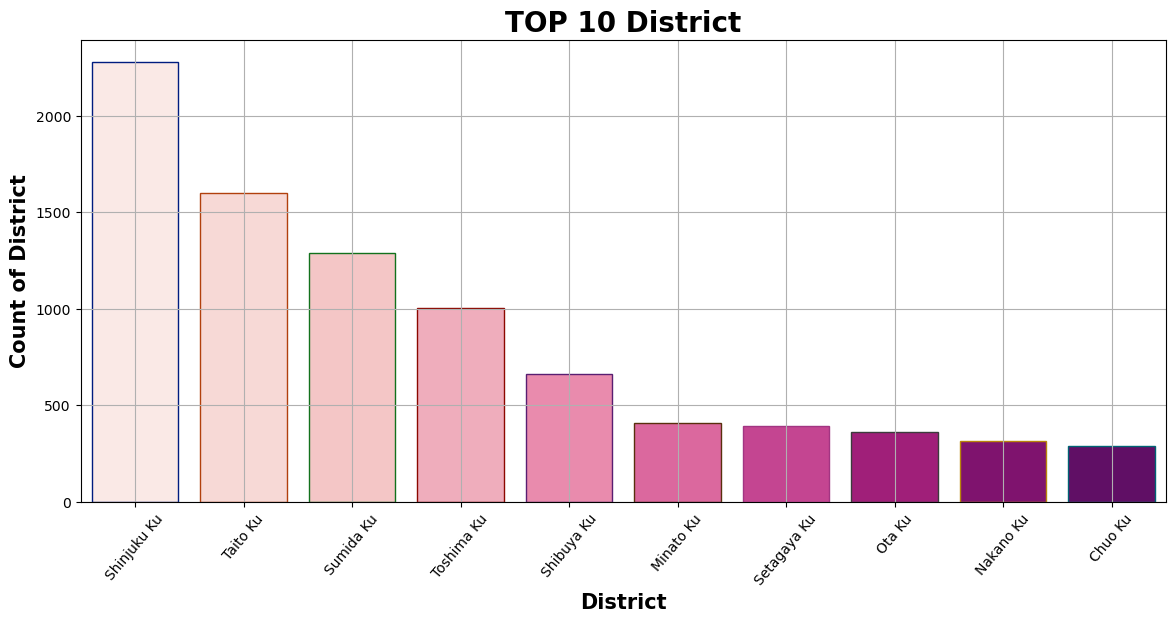

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x='neighbourhood',data=listings,
              order=listings['neighbourhood'].value_counts().head(10).index,
              palette='RdPu',
              edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=50)
plt.ylabel('Count of District', weight='bold',size = 15)
plt.xlabel('District', weight='bold', size = 15)
plt.title('TOP 10 District', weight='bold' ,size = 20)
plt.grid(True)
plt.show()

In [36]:
import geopandas as gpd
import folium
import json

In [85]:
neighbor_cnt = listings['neighbourhood'].value_counts()

### 도쿄 지역 에어비앤비 분포 시각화

In [84]:
# GeoJSON 파일 로드

geojson_path = base_path + 'neighbourhoods.geojson'
# gdf = gpd.read_file(geojson_path)
# gdf

with open(geojson_path) as f:
    geo_data = json.load(f)

# Folium 맵 생성
map = folium.Map(location=[35.6894875,139.6917064], zoom_start=11, width='80%', height='80%')

# Choropleth 레이어 추가
folium.Choropleth(
    geo_data=geo_data,
    data=neighbor_cnt,
    columns=[neighbor_cnt.index, neighbor_cnt.values],
    key_on='feature.properties.neighbourhood',
    fill_color='YlGnBu',
    fill_opacity=0.5,
    legend_name='Airbnb density scale'
).add_to(map)


# 동네 이름 표시
for feature in geo_data['features']:
    neighborhood = feature['properties']['neighbourhood']
    coordinates = feature['geometry']['coordinates'][0][0]  # 동네의 경계 좌표 가져오기
    center = [sum(coord[1] for coord in coordinates) / len(coordinates),
              sum(coord[0] for coord in coordinates) / len(coordinates)]  # 중심 좌표 계산
    icon = folium.Icon(icon='home', color='gray')  # 아이콘 선택 (여기서는 구름 아이콘)

    folium.Marker(location=center, popup=neighborhood, icon=icon).add_to(map)
    


# 타일셋 추가
folium.TileLayer('Stamen Toner').add_to(map)

# 맵 출력
map.save('map.html')

map

### 에어비앤비 지역 관련 컬럼 

In [102]:
listing_gz[['neighbourhood_cleansed','host_neighbourhood','neighborhood_overview']]

,neighbourhood_cleansed,host_neighbourhood,neighborhood_overview
0,Sumida Ku,Sumida District,NaN
1,Kita Ku,Kita District,We love Nishinippori because is nearer to Toky...
2,Shibuya Ku,Shibuya District,Hatagaya is a great neighborhood located 4 min...
3,Setagaya Ku,Shimokitazawa,The location is walkable distance to famous Sh...
4,Adachi Ku,Adachi District,There are shopping mall near Senjuohashi stati...
...,...,...,...
11172,Shinjuku Ku,NaN,NaN
11173,Shinjuku Ku,NaN,NaN
11174,Shinjuku Ku,NaN,NaN
11175,Shinjuku Ku,NaN,NaN


#### 에어비앤비 동네 후기

In [97]:
listing_gz['neighborhood_overview']

0                                                      NaN
1        We love Nishinippori because is nearer to Toky...
2        Hatagaya is a great neighborhood located 4 min...
3        The location is walkable distance to famous Sh...
4        There are shopping mall near Senjuohashi stati...
                               ...                        
11172                                                  NaN
11173                                                  NaN
11174                                                  NaN
11175                                                  NaN
11176                                                  NaN
Name: neighborhood_overview, Length: 11177, dtype: object

In [108]:
listing_gz['neighborhood_overview'].isnull().sum() # 11177 중 3456 널값 
listing_gz['neighborhood_overview'].isnull().groupby(listing_gz['neighbourhood_cleansed']).sum().sort_values(ascending=False)

neighbourhood_cleansed
Shinjuku Ku            723
Taito Ku               492
Sumida Ku              346
Toshima Ku             342
Shibuya Ku             168
Kita Ku                118
Minato Ku              115
Setagaya Ku            101
Nakano Ku               97
Ota Ku                  94
Arakawa Ku              85
Katsushika Ku           85
Chuo Ku                 84
Edogawa Ku              82
Shinagawa Ku            80
Itabashi Ku             77
Suginami Ku             58
Bunkyo Ku               56
Chiyoda Ku              56
Koto Ku                 50
Adachi Ku               34
Fuchu Shi               26
Nerima Ku               21
Meguro Ku               12
Kokubunji Shi            8
Tachikawa Shi            6
Ome Shi                  5
Kunitachi Shi            3
Hamura Shi               3
Akiruno Shi              3
Machida Shi              3
Mitaka Shi               3
Musashimurayama Shi      3
Musashino Shi            3
Chofu Shi                3
Tama Shi                 2
Komae

### 입력, 출력 데이터 정리


#### 입력 데이터 

- 지역 : 도쿄 -  시/구 , 동/읍/면,  
- 가격 : 범위 (한국 기준)
- 룸 타입 : Private room, Entire, home, apt (room_type)
- 수용 인원 : (accommodates)
- 화장실 : (bathrooms_text) 
- 침실 (bedrooms )
- 침대 개수 (beds)
- 별점(review_scores_rating) : 범위 
#### 출력 데이터 


<b>에어비앤비에서 제공하는 데이터</b>
- 에어비앤비 링크 (description)
- 고객이 작성한 숙소 설명 (description) #
- 호스트가 작성한 숙소 설명 (neighborhood_overview)
- 호스트 설명 (host_about)
- 호스트신원 여부 (host_identity_verified)
- 정확한 가격 (price)
- 최소 숙박일 수 (minimum_nights)
- 캘린더가 마지막으로 업데이트 된 날 (calendar_updated)
- 30일간 리뷰 수 (number_of_reviews_l30d)
- 목록의 마지막 리뷰 날짜 (last_review)
- 전체 평점 점수 (review_scores_rating)
---------------------

<b>딥러닝을 통해 제공할 데이터 </b>
- 치안 정보 : 오시마랜드와 절도관련 오픈데이터 이용 (ex 주변 3날치기가 빈번하게 발생, 투신 자살 이슈가 있는 아파트) 
- 에어비앤비 치안 포함 별점 : 치안 정보를 포함한 알고리즘 생성 

In [5]:
import pandas as pd

base_path = '../data/'

listing_gz = pd.read_csv(base_path+'listings.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
listing_gz.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230629055629,2023-06-29,city scrape,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.21
1,776070,https://www.airbnb.com/rooms/776070,20230629055629,2023-06-29,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.83,4.91,NaN,f,1,0,1,0,1.89
2,905944,https://www.airbnb.com/rooms/905944,20230629055629,2023-06-29,city scrape,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.90,4.77,4.77,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.49
3,1016831,https://www.airbnb.com/rooms/1016831,20230629055629,2023-06-29,city scrape,Home in Setagaya · ★4.94 · 1 bedroom · 2 beds ...,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.89,NaN,f,1,0,1,0,1.96
4,1196177,https://www.airbnb.com/rooms/1196177,20230629055629,2023-06-29,city scrape,Home in 足立区 · ★4.71 · 1 bedroom · 1.5 shared b...,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.88,4.67,4.75,NaN,f,1,0,1,0,0.79


In [24]:
input_cols = ['neighbourhood_cleansed', 'price', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms' , 'beds', 'review_scores_rating', 'latitude', 'longitude']
airbnb_df = listing_gz[input_cols]
airbnb_df.head()

,neighbourhood_cleansed,price,room_type,accommodates,bathrooms_text,bedrooms,beds,review_scores_rating,latitude,longitude
0,Sumida Ku,"$11,000.00",Entire home/apt,2,1 bath,1.0,2.0,4.78,35.717070,139.826080
1,Kita Ku,"$7,208.00",Private room,1,1 shared bath,NaN,1.0,4.98,35.738440,139.769170
2,Shibuya Ku,"$23,066.00",Entire home/apt,6,1 bath,2.0,4.0,4.76,35.678780,139.678470
3,Setagaya Ku,"$16,000.00",Private room,2,1 shared bath,NaN,2.0,4.94,35.658000,139.671340
4,Adachi Ku,"$10,000.00",Private room,4,1.5 shared baths,NaN,NaN,4.71,35.744731,139.797384


### 오시마랜드 데이터

In [11]:
import pandas as pd
oshima_yun = pd.read_csv('../../Oshimaland_data/yunyoung/selenium_tokyo_data.csv', index_col=0)
oshima_ji = pd.read_csv('../../Oshimaland_data/jieun/oshimaland_dataset_final.csv')

In [12]:
oshima_yun.tail()

,district,date,address,content
298,羽村市,2005,東京都羽村市緑ヶ丘五丁目1-50,駐車スペース横の部屋で住民男性が首吊り自殺
299,武蔵村山市,不明,東京都羽村市羽中一丁目3-37,告知事項
300,昭島市,平成24年,東京都武蔵村山市中央一丁目24-3ハウスオブブーケA 1階,死体発見
301,福生市,令和2年9月7日,東京都昭島市田中町一丁目34-9,火災による死亡
302,福生市,2016年,東京都福生市志茂156-1,通路から駐車場へ男性が飛び下り自殺


In [13]:
oshima_ji.tail()

,info,address,occurred_date,recorded_date
565,死体発見,東京都武蔵野市西久保三丁目75都築荘101,平成28年2月23日,平成28年3月2日
566,5階 角部屋\r\n告知事項有り,東京都国分寺市戸倉一丁目825 PlaceK,令和4年10月6日,令和4年10月7日
567,6階 角部屋\r\n告知事項有り,東京都国分寺市戸倉一丁目825 PlaceK,令和4年10月6日,令和4年10月7日
568,206号室、506号室\r\n告知事項あり,東京都国分寺市戸倉一丁目825 プレイスK,令和4年7月30日,令和4年7月30日
569,606号室\r\n告知事項あり,東京都国分寺市戸倉一丁目825 プレイスK,令和4年7月30日,令和4年7月31日


In [14]:
oshima_yun = oshima_yun.reindex(columns=['district', 'address', 'content', 'date'])
oshima_yun.rename(columns={'content': 'info'}, inplace=True)
oshima_yun.head()

,district,address,info,date
0,新宿区,東京都新宿区新宿三丁目22-7指田ビル地下1階,死体発見,平成24年11月5日
1,新宿区,東京都新宿区新宿三丁目22-7指田ビル地下1階,死体発見,平成24年11月5日
2,新宿区,東京都新宿区西新宿一丁目3-9,飛び降り自殺,令和4年
3,新宿区,NaN,NaN,NaN
4,新宿区,東京都新宿区歌舞伎町一丁目27-5 中台ビル,2階サウナロイヤル 死体発見,平成20年1月5日


In [15]:
oshima_ji_rename = oshima_ji.reindex(columns=[ 'address', 'info', 'occurred_date'])
oshima_ji_rename.rename(columns={'occurred_date': 'date'}, inplace=True)
oshima_ji_rename.head()

,address,info,date
0,東京都新宿区歌舞伎町一丁目202,819号室で女性死亡,平成30年5月23日
1,東京都新宿区歌舞伎町一丁目202アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月18日
2,東京都新宿区西新宿七丁目1813,告知事項あり\r\n※管理会社に直接確認済み\r\n\r\nハイム大成ビル 403号室\r\...,1年以内
3,東京都新宿区西新宿七丁目1713パレステュディオ新宿WEST,１４Ｆから女性が飛び降り自殺,令和元年9月23日
4,東京都新宿区西新宿七丁目2231,事故死,2016


#### 중복데이터 확인

In [16]:
oshima_yun.duplicated().sum()

44

In [17]:
oshima_yun = oshima_yun.drop_duplicates()
oshima_yun.reset_index(drop=True, inplace=True)
oshima_yun

,district,address,info,date
0,新宿区,東京都新宿区新宿三丁目22-7指田ビル地下1階,死体発見,平成24年11月5日
1,新宿区,東京都新宿区西新宿一丁目3-9,飛び降り自殺,令和4年
2,新宿区,NaN,NaN,NaN
3,新宿区,東京都新宿区歌舞伎町一丁目27-5 中台ビル,2階サウナロイヤル 死体発見,平成20年1月5日
4,新宿区,東京都新宿区歌舞伎町二丁目39-6,NaN,NaN
...,...,...,...,...
254,羽村市,東京都羽村市緑ヶ丘五丁目1-50,駐車スペース横の部屋で住民男性が首吊り自殺,2005
255,武蔵村山市,東京都羽村市羽中一丁目3-37,告知事項,不明
256,昭島市,東京都武蔵村山市中央一丁目24-3ハウスオブブーケA 1階,死体発見,平成24年
257,福生市,東京都昭島市田中町一丁目34-9,火災による死亡,令和2年9月7日


In [18]:
oshima_ji_rename.duplicated().sum()

4

In [19]:
oshima_ji_rename = oshima_ji_rename.drop_duplicates()
oshima_ji_rename.reset_index(drop=True, inplace=True)
oshima_ji_rename

,address,info,date
0,東京都新宿区歌舞伎町一丁目202,819号室で女性死亡,平成30年5月23日
1,東京都新宿区歌舞伎町一丁目202アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月18日
2,東京都新宿区西新宿七丁目1813,告知事項あり\r\n※管理会社に直接確認済み\r\n\r\nハイム大成ビル 403号室\r\...,1年以内
3,東京都新宿区西新宿七丁目1713パレステュディオ新宿WEST,１４Ｆから女性が飛び降り自殺,令和元年9月23日
4,東京都新宿区西新宿七丁目2231,事故死,2016
...,...,...,...
561,東京都武蔵野市緑町二丁目34都営武蔵野緑町二丁目第2アパート4号棟,【青酸カリによる死者が出たそうです】\r\n4号棟の自治会役員の方の証言で、団地内で青酸カリ...,不明
562,東京都武蔵野市緑町二丁目64 都営武蔵野緑町2丁目第3アパート4号棟,死体発見,平成17年12月28日
563,東京都武蔵野市西久保三丁目128 アネシスヴィーゼ205号室,告知事項あり,不明
564,東京都武蔵野市西久保三丁目1118,不審死,2022年11月


#### 결측치 확인 

In [20]:
oshima_yun.isnull().sum()

district     0
address      6
info        10
date        12
dtype: int64

In [21]:
oshima_yun.dropna(subset=['info'], inplace=True)
print(oshima_yun.isnull().sum())
oshima_yun

district    0
address     0
info        0
date        4
dtype: int64


,district,address,info,date
0,新宿区,東京都新宿区新宿三丁目22-7指田ビル地下1階,死体発見,平成24年11月5日
1,新宿区,東京都新宿区西新宿一丁目3-9,飛び降り自殺,令和4年
3,新宿区,東京都新宿区歌舞伎町一丁目27-5 中台ビル,2階サウナロイヤル 死体発見,平成20年1月5日
5,新宿区,東京都新宿区歌舞伎町一丁目20-2アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月11日
6,新宿区,東京都新宿区西新宿七丁目5-9プロスペクト・アクス・ザ・タワー新宿2008,首吊り自殺,平成27年9月26日
...,...,...,...,...
254,羽村市,東京都羽村市緑ヶ丘五丁目1-50,駐車スペース横の部屋で住民男性が首吊り自殺,2005
255,武蔵村山市,東京都羽村市羽中一丁目3-37,告知事項,不明
256,昭島市,東京都武蔵村山市中央一丁目24-3ハウスオブブーケA 1階,死体発見,平成24年
257,福生市,東京都昭島市田中町一丁目34-9,火災による死亡,令和2年9月7日


In [22]:
oshima_ji_rename.isnull().sum()

address    0
info       0
date       3
dtype: int64

#### district 컬럼 생성

In [23]:
jp_district_list = [
    '新宿区', '台東区', '墨田区', '豊島区', '渋谷区',
    '港区', '世田谷区', '大田区', '中野区', '中央区',
    '北区', '葛飾区', '杉並区', '江東区', '江戸川区',
    '文京区', '荒川区', '板橋区', '品川区', '千代田区',
    '足立区', '目黒区', '練馬区', '府中市', '八王子市',
    '日野市', '国分寺市', '町田市', '青梅市', '調布市',
    '武蔵野市', 'あきる野市', '三鷹市', '小金井市', '東村山市',
    '多摩市', '国立市', '狛江市', '西東京市', '立川市',
    '小平市', '羽村市', '武蔵村山市', '奥多摩町', '昭島市',
    '福生市'
]

In [24]:
oshima_ji_rename = oshima_ji_rename.reindex(columns = ['district', 'address', 'info', 'date'])
oshima_ji_rename

,district,address,info,date
0,NaN,東京都新宿区歌舞伎町一丁目202,819号室で女性死亡,平成30年5月23日
1,NaN,東京都新宿区歌舞伎町一丁目202アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月18日
2,NaN,東京都新宿区西新宿七丁目1813,告知事項あり\r\n※管理会社に直接確認済み\r\n\r\nハイム大成ビル 403号室\r\...,1年以内
3,NaN,東京都新宿区西新宿七丁目1713パレステュディオ新宿WEST,１４Ｆから女性が飛び降り自殺,令和元年9月23日
4,NaN,東京都新宿区西新宿七丁目2231,事故死,2016
...,...,...,...,...
561,NaN,東京都武蔵野市緑町二丁目34都営武蔵野緑町二丁目第2アパート4号棟,【青酸カリによる死者が出たそうです】\r\n4号棟の自治会役員の方の証言で、団地内で青酸カリ...,不明
562,NaN,東京都武蔵野市緑町二丁目64 都営武蔵野緑町2丁目第3アパート4号棟,死体発見,平成17年12月28日
563,NaN,東京都武蔵野市西久保三丁目128 アネシスヴィーゼ205号室,告知事項あり,不明
564,NaN,東京都武蔵野市西久保三丁目1118,不審死,2022年11月


In [25]:
oshima_ji_rename['district'] = oshima_ji_rename['address'].apply(lambda x: next((district for district in jp_district_list if district in x), x))
oshima_ji_rename.reindex(columns=['district', 'address', 'info', 'occurred_date'])
oshima_ji_rename

,district,address,info,date
0,新宿区,東京都新宿区歌舞伎町一丁目202,819号室で女性死亡,平成30年5月23日
1,新宿区,東京都新宿区歌舞伎町一丁目202アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月18日
2,新宿区,東京都新宿区西新宿七丁目1813,告知事項あり\r\n※管理会社に直接確認済み\r\n\r\nハイム大成ビル 403号室\r\...,1年以内
3,新宿区,東京都新宿区西新宿七丁目1713パレステュディオ新宿WEST,１４Ｆから女性が飛び降り自殺,令和元年9月23日
4,新宿区,東京都新宿区西新宿七丁目2231,事故死,2016
...,...,...,...,...
561,武蔵野市,東京都武蔵野市緑町二丁目34都営武蔵野緑町二丁目第2アパート4号棟,【青酸カリによる死者が出たそうです】\r\n4号棟の自治会役員の方の証言で、団地内で青酸カリ...,不明
562,武蔵野市,東京都武蔵野市緑町二丁目64 都営武蔵野緑町2丁目第3アパート4号棟,死体発見,平成17年12月28日
563,武蔵野市,東京都武蔵野市西久保三丁目128 アネシスヴィーゼ205号室,告知事項あり,不明
564,武蔵野市,東京都武蔵野市西久保三丁目1118,不審死,2022年11月


In [26]:
# 공통 컬럼 
same_oshima = oshima_yun.merge(oshima_ji_rename, how='inner')
same_oshima

,district,address,info,date
0,新宿区,東京都新宿区歌舞伎町二丁目18,不動産業者より告知物件との報告有,2022年5月頃
1,新宿区,東京都新宿区歌舞伎町二丁目5パークネット歌舞伎町第3駐車場,死体遺棄,平成29年2月15日
2,新宿区,東京都新宿区歌舞伎町二丁目9−１５,401号、病死,26年5月
3,文京区,東京都文京区後楽一丁目3 東京ドームシティ,ジオポリス北側トンネル通路 ペルー人男性、病死,平成20年10月15日
4,東村山市,東京都東村山市本町四丁目4都営東村山本町アパート9号棟4階東から5番目の部屋,死体発見,令和元年11月29日


In [27]:
# 데이터 합치기 

combined_df = pd.concat([oshima_yun, oshima_ji_rename], ignore_index=True)
combined_df

,district,address,info,date
0,新宿区,東京都新宿区新宿三丁目22-7指田ビル地下1階,死体発見,平成24年11月5日
1,新宿区,東京都新宿区西新宿一丁目3-9,飛び降り自殺,令和4年
2,新宿区,東京都新宿区歌舞伎町一丁目27-5 中台ビル,2階サウナロイヤル 死体発見,平成20年1月5日
3,新宿区,東京都新宿区歌舞伎町一丁目20-2アパホテル新宿歌舞伎町タワー↓,飛び降り自殺,令和3年5月11日
4,新宿区,東京都新宿区西新宿七丁目5-9プロスペクト・アクス・ザ・タワー新宿2008,首吊り自殺,平成27年9月26日
...,...,...,...,...
810,武蔵野市,東京都武蔵野市緑町二丁目34都営武蔵野緑町二丁目第2アパート4号棟,【青酸カリによる死者が出たそうです】\r\n4号棟の自治会役員の方の証言で、団地内で青酸カリ...,不明
811,武蔵野市,東京都武蔵野市緑町二丁目64 都営武蔵野緑町2丁目第3アパート4号棟,死体発見,平成17年12月28日
812,武蔵野市,東京都武蔵野市西久保三丁目128 アネシスヴィーゼ205号室,告知事項あり,不明
813,武蔵野市,東京都武蔵野市西久保三丁目1118,不審死,2022年11月


### EDA 추가 -230825

- Dataset_Processing 폴더에서 위도 경도 정보가 추가됨 에어비앤미 데이터 가져오기

In [13]:
import pandas as pd 

airbnb_data= pd.read_csv('../../Dataset_Processing/yunyoung/data/airbnb_data_add_latlng.csv', index_col=0)
airbnb_data

,neighbourhood_cleansed,price,room_type,accommodates,bathrooms_text,bedrooms,beds,review_scores_rating,latitude,longitude,full name
0,Sumida Ku,"$11,000.00",Entire home/apt,2,1 bath,1.0,2.0,4.78,35.717070,139.826080,東京都 墨田区 八広 二丁目
1,Kita Ku,"$7,208.00",Private room,1,1 shared bath,NaN,1.0,4.98,35.738440,139.769170,東京都 北区 田端新町 一丁目
2,Shibuya Ku,"$23,066.00",Entire home/apt,6,1 bath,2.0,4.0,4.76,35.678780,139.678470,東京都 渋谷区 幡ケ谷 二丁目
3,Setagaya Ku,"$16,000.00",Private room,2,1 shared bath,NaN,2.0,4.94,35.658000,139.671340,東京都 世田谷区 代沢 二丁目
4,Adachi Ku,"$10,000.00",Private room,4,1.5 shared baths,NaN,NaN,4.71,35.744731,139.797384,東京都 足立区 千住河原町
...,...,...,...,...,...,...,...,...,...,...,...
11172,Shinjuku Ku,"$12,000.00",Entire home/apt,4,1 bath,1.0,3.0,NaN,35.697773,139.706543,東京都 新宿区 大久保 一丁目
11173,Shinjuku Ku,"$16,000.00",Entire home/apt,3,1 bath,1.0,2.0,NaN,35.698980,139.694320,東京都 新宿区 北新宿 一丁目
11174,Shinjuku Ku,"$16,000.00",Entire home/apt,4,1 bath,1.0,2.0,NaN,35.700080,139.695020,東京都 新宿区 北新宿 一丁目
11175,Shinjuku Ku,"$40,000.00",Entire home/apt,9,1 bath,3.0,6.0,NaN,35.699860,139.693340,東京都 新宿区 北新宿 一丁目


### 결측치 확인 
- 각 컬럼들은 입력 데이터 이므로 결픅피가 있는 데이터는 제거해준다. 

In [14]:
airbnb_data.isna().sum()

neighbourhood_cleansed       0
price                        0
room_type                    0
accommodates                 0
bathrooms_text              25
bedrooms                  1940
beds                       461
review_scores_rating      1252
latitude                     0
longitude                    0
full name                    0
dtype: int64

### 결측치 제거 후 11177 -> 7863 데이터만 존재

In [15]:
airbnb_data.dropna(inplace = True)
airbnb_data.reset_index(drop=True, inplace=True)
airbnb_data

,neighbourhood_cleansed,price,room_type,accommodates,bathrooms_text,bedrooms,beds,review_scores_rating,latitude,longitude,full name
0,Sumida Ku,"$11,000.00",Entire home/apt,2,1 bath,1.0,2.0,4.78,35.717070,139.826080,東京都 墨田区 八広 二丁目
1,Shibuya Ku,"$23,066.00",Entire home/apt,6,1 bath,2.0,4.0,4.76,35.678780,139.678470,東京都 渋谷区 幡ケ谷 二丁目
2,Shibuya Ku,"$54,782.00",Entire home/apt,3,1 bath,1.0,1.0,4.96,35.651110,139.721650,東京都 渋谷区 広尾 五丁目
3,Katsushika Ku,"$16,000.00",Entire home/apt,4,2 baths,2.0,4.0,4.93,35.739870,139.851760,東京都 葛飾区 立石 七丁目
4,Shinjuku Ku,"$39,143.00",Entire home/apt,2,1 bath,1.0,1.0,4.91,35.702630,139.741470,東京都 新宿区 津久戸町
...,...,...,...,...,...,...,...,...,...,...,...
7858,Shinjuku Ku,"$16,429.00",Entire home/apt,4,1.5 baths,2.0,3.0,5.00,35.703653,139.701290,東京都 新宿区 百人町 二丁目
7859,Toshima Ku,"$9,510.00",Entire home/apt,3,1 bath,1.0,1.0,5.00,35.730016,139.727183,東京都 豊島区 南大塚 三丁目
7860,Musashino Shi,"$8,786.00",Entire home/apt,3,1 bath,1.0,3.0,5.00,35.700494,139.581260,東京都 武蔵野市 吉祥寺南町 一丁目
7861,Shinjuku Ku,"$11,429.00",Entire home/apt,3,1 bath,1.0,1.0,5.00,35.697948,139.704500,東京都 新宿区 歌舞伎町 二丁目


In [16]:
airbnb_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room'], dtype=object)

In [17]:
airbnb_data.columns

Index(['neighbourhood_cleansed', 'price', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'review_scores_rating',
       'latitude', 'longitude', 'full name'],
      dtype='object')

In [18]:
from collections import Counter

neighbourhood_counts = Counter(airbnb_data['neighbourhood_cleansed'])
print('neighbourhood_counts : ',neighbourhood_counts)

room_type_counts = Counter(airbnb_data['room_type'])
print('room_type_counts : ',room_type_counts)

accommodates_counts = Counter(airbnb_data['accommodates'])
print('accommodates_counts : ',accommodates_counts)

bathrooms_counts = Counter(airbnb_data['bathrooms_text'])
print('bathrooms_counts : ',bathrooms_counts)

bedrooms_counts = Counter(airbnb_data['bedrooms'])
print('bedrooms_counts : ',bedrooms_counts)

beds_counts = Counter(airbnb_data['beds'])
print('beds_counts : ',beds_counts)

bedroomstext_counts = Counter(airbnb_data['bedrooms'])
print('bedroomstext_counts : ',bedroomstext_counts)


neighbourhood_counts :  Counter({'Shinjuku Ku': 1753, 'Taito Ku': 1164, 'Sumida Ku': 887, 'Toshima Ku': 705, 'Shibuya Ku': 491, 'Minato Ku': 320, 'Ota Ku': 263, 'Nakano Ku': 231, 'Kita Ku': 199, 'Katsushika Ku': 185, 'Setagaya Ku': 184, 'Chuo Ku': 183, 'Suginami Ku': 182, 'Koto Ku': 161, 'Bunkyo Ku': 147, 'Arakawa Ku': 131, 'Edogawa Ku': 128, 'Chiyoda Ku': 122, 'Shinagawa Ku': 114, 'Itabashi Ku': 112, 'Adachi Ku': 39, 'Nerima Ku': 32, 'Meguro Ku': 29, 'Hino Shi': 12, 'Machida Shi': 9, 'Hachioji Shi': 9, 'Fuchu Shi': 9, 'Musashino Shi': 8, 'Mitaka Shi': 6, 'Kokubunji Shi': 6, 'Akiruno Shi': 6, 'Higashimurayama Shi': 5, 'Komae Shi': 5, 'Chofu Shi': 5, 'Tama Shi': 4, 'Koganei Shi': 3, 'Ome Shi': 3, 'Akishima Shi': 2, 'Kodaira Shi': 2, 'Hamura Shi': 2, 'Tachikawa Shi': 2, 'Nishitokyo Shi': 1, 'Okutama Machi': 1, 'Kunitachi Shi': 1})
room_type_counts :  Counter({'Entire home/apt': 6522, 'Private room': 1159, 'Hotel room': 182})
accommodates_counts :  Counter({2: 2030, 4: 1427, 3: 1356, 6: 8

### 데이터 시각화

In [19]:
 !pip install chart_studio

In [4]:
import chart_studio.plotly as py

username = 'username' # your username
api_key = 'api_key' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [23]:
import plotly.express as px

def create_bar_chart(x_data, y_data, x_title, y_title, chart_title, isMark = True):
    fig = px.bar(x=x_data, y=y_data, color=y_data)
    fig.update_layout(title=chart_title)
    fig.update_xaxes(title=x_title)
    fig.update_yaxes(title=y_title)


    if isMark:
        # 값(value) 표시
        for i, count in enumerate(sorted_counts):
            if i<5 or i>len(sorted_counts)-5:
                fig.add_annotation(
                    x=sorted_neighbourhoods[i],
                    y=count + 80,  
                    text=str(count),
                    font=dict(color='black', size=12),
                    showarrow=False
                )

    
    fig.show()
    
    return fig

    


In [21]:
def sorted_count(data):
    sorted_value = sorted(data, key=data.get, reverse=True)
    sorted_counts = [data[neighbourhood] for neighbourhood in sorted_value]

    return sorted_value, sorted_counts


In [26]:
sorted_neighbourhoods, sorted_counts = sorted_count(neighbourhood_counts)

fig = create_bar_chart(
    x_data=sorted_neighbourhoods,
    y_data=sorted_counts,
    x_title='neighbourhoods',
    y_title='Counts',
    chart_title='neighbourhoods Counts'
)


In [27]:
py.plot(fig, filename = 'airbnb_neigborhoof', auto_open=True)


'https://plotly.com/~Jyundev/1/'

In [28]:
import chart_studio.tools as tls
tls.get_embed('https://plotly.com/~Jyundev/1/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~Jyundev/1.embed" height="525" width="100%"></iframe>'

In [57]:
sorted_room_type, sorted_counts = sorted_count(room_type_counts)

create_bar_chart(
    x_data=sorted_room_type,
    y_data=sorted_counts,
    x_title='room_type',
    y_title='Counts',
    chart_title='room_type Counts',
    isMark = False
)


In [61]:
sorted_bedrooms, sorted_counts = sorted_count(bedrooms_counts)

create_bar_chart(
    x_data=sorted_bedrooms,
    y_data=sorted_counts,
    x_title='bedrooms',
    y_title='Counts',
    chart_title='bedrooms Counts',
    isMark = False
)


### 가격 

In [9]:
airbnb_data['price'] = airbnb_data['price'].str.replace('$', '').str.replace(',', '').astype(float)
airbnb_data['price']

/var/folders/ks/_xxh3ssj6dvg4pzv1_tb_bzw0000gn/T/ipykernel_31475/624890837.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_data['price'] = airbnb_data['price'].str.replace('$', '').str.replace(',', '').astype(float)


0       11000.0
1       23066.0
2       54782.0
3       16000.0
4       39143.0
         ...   
7858    16429.0
7859     9510.0
7860     8786.0
7861    11429.0
7862     9600.0
Name: price, Length: 7863, dtype: float64

In [10]:
airbnb_price = 	airbnb_data[['neighbourhood_cleansed', 'price']]	
sorted_df = airbnb_price.sort_values(by='price')
sorted_df

,neighbourhood_cleansed,price
1535,Sumida Ku,2029.0
913,Katsushika Ku,2114.0
889,Katsushika Ku,2114.0
294,Itabashi Ku,2500.0
320,Itabashi Ku,2500.0
...,...,...
1139,Shinjuku Ku,1052387.0
1149,Toshima Ku,1052387.0
1988,Toshima Ku,1052387.0
298,Shinjuku Ku,1052387.0


In [55]:
import numpy as np

def identify_outliers_iqr(data):
    Q1 = np.percentile(data, 25)  # 1사분위수
    Q3 = np.percentile(data, 75)  # 3사분위수
    IQR = Q3 - Q1  # IQR 계산
    lower_bound = max(Q1 - 1.5 * IQR, np.min(data))  # 하한값 설정
    upper_bound = Q3 + 1.5 * IQR  # 상한값
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    
    return lower_bound, upper_bound, outliers


In [56]:
lower_bound, upper_bound, outliers = identify_outliers_iqr(sorted_df['price'])
lower_bound

2029.0

In [72]:
import plotly.express as px

def create_colored_histogram(data, x_column, color_column, x_title, y_title, chart_title):
    fig = px.histogram(data, x=x_column, color=color_column)
    fig.update_layout(title=chart_title)
    fig.update_xaxes(title=x_title)
    fig.update_yaxes(title=y_title)
    fig.show()


def create_scatter_plot(data, x_col, y_col, title, color, outliers=False):
    fig = px.scatter(data, 
                     x=x_col, 
                     y=y_col, 
                     title=title, 
                     color=color, 
                     color_continuous_scale='Viridis')
    
    
    # if outliers:
    #     lower_bound, upper_bound, outliers = identify_outliers_iqr(data[y_col])
    #     fig.add_trace(px.line(x=data[x_col], y=lower_bound, mode='lines', name='Y Line').data[0])

    if outliers:
        lower_bound, upper_bound, _ = identify_outliers_iqr(data[y_col])
        y_line_lower = [upper_bound] * len(data[x_col])  # y축 데이터 기준의 라인 값 생성
        y_line_upperr = [lower_bound] * len(data[x_col])  # y축 데이터 기준의 라인 값 생성

        fig.add_trace(px.line(x=data[x_col], y=y_line_lower, line_shape='linear').data[0])
        fig.add_trace(px.line(x=data[x_col], y=y_line_upperr, line_shape='linear').data[0])


    fig.show()


In [71]:
create_scatter_plot(sorted_df,
                    x_col='neighbourhood_cleansed', 
                    y_col='price', 
                    title='Price Scatter Plot',
                    color=sorted_df['price'],
                    outliers=True)


In [75]:
def find_price_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    
    z_scores = [(x - mean) / std for x in data]
    outliers = [data[i] for i, z_score in enumerate(z_scores) if np.abs(z_score) > threshold]
    
    return outliers


### 리뷰 데이터 확인 

In [17]:
review_cols = ['id',  'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
               'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',]

listing_gz[review_cols ]

,id,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,197677,2011-09-21,2023-05-30,4.78,4.74,4.92,4.84,4.83,4.53,4.79
1,776070,2012-11-28,2023-06-20,4.98,4.96,4.92,4.98,4.98,4.83,4.91
2,905944,2013-04-07,2023-06-26,4.76,4.78,4.75,4.87,4.90,4.77,4.77
3,1016831,2013-04-06,2023-06-01,4.94,4.93,4.82,4.94,4.98,4.92,4.89
4,1196177,2013-08-10,2020-03-17,4.71,4.87,4.75,4.92,4.88,4.67,4.75
...,...,...,...,...,...,...,...,...,...,...
11172,922873759575839340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11173,922998222764343634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11174,923008447744339896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11175,923011844205437846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 에어비앤비 리뷰 리스트는 에어비앤비 별 사용자의 리뷰 데이터가 담겨있음

In [43]:
review_gz = pd.read_csv('../data/reviews.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
review_gz.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,197677,554285,2011-09-21,1002142,Pablo,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,627651,2011-10-14,1031940,Ana & Ricardo,The apartment is bigger than it looks in the p...
2,197677,733040,2011-11-21,1097040,Samuel,The appartement is perfect for a couple! It is...
3,197677,755841,2011-11-30,1183674,Lisa,We had a terrific stay at Yoshimi and Marek's ...
4,197677,852938,2012-01-09,1538004,Langan,We loved our stay at the Oshiage Holiday Apart...


In [44]:
review2 = pd.read_csv('../data/reviews.csv')
review2

,listing_id,date
0,197677,2011-09-21
1,197677,2011-10-14
2,197677,2011-11-21
3,197677,2011-11-30
4,197677,2012-01-09
...,...,...
407707,915528151021700798,2023-06-26
407708,918757671248742571,2023-06-27
407709,913660262216995906,2023-06-21
407710,914001948186290663,2023-06-25


In [45]:
review_gz['comments']

0         Couldn’t get any better!\r<br/>\r<br/>The apar...
1         The apartment is bigger than it looks in the p...
2         The appartement is perfect for a couple! It is...
3         We had a terrific stay at Yoshimi and Marek's ...
4         We loved our stay at the Oshiage Holiday Apart...
                                ...                        
407707    新しい一軒家です。<br/>部屋全体綺麗です。<br/>大家さんは優しい人です。<br/>夜...
407708    非常好的旅居主人，主動幫忙和協助我們需要。態度非常友善。非常建議入住！下一次我們來東京，希望...
407709                                          とても綺麗な所でした！
407710        Perfect spot in shinokubo.Just as advertised.
407711    当日の予約にも関わらず素早くご対応いただいたおかげでスムーズに入室でしました。ありがとうござ...
Name: comments, Length: 407712, dtype: object

In [46]:
pd.options.display.max_columns = 9999
data = listing_gz[['id', 'host_id', 'host_name', 'host_is_superhost', 'neighbourhood_cleansed', 'accommodates', 'bathrooms_text','bedrooms', 'beds', 'price', 'minimum_nights', 'first_review', 'last_review', 'review_scores_rating']] #* 'first_review', 'last_review', 'latitude', 'longitude'
display(listing_gz.head(3), data.head(3))

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230629055629,2023-06-29,city scrape,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,https://www.airbnb.com/users/show/964081,Yoshimi & Marek,2011-08-13,"Tokyo, Japan",Would love to travel all over the world and me...,within a few hours,100%,88%,t,https://a0.muscache.com/im/users/964081/profil...,https://a0.muscache.com/im/users/964081/profil...,Sumida District,1,2,"['email', 'phone']",t,t,NaN,Sumida Ku,NaN,35.71707,139.82608,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Dryer"", ""Free washer \u2013 In unit"", ""Smoke...","$11,000.00",3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,24,2023-06-29,173,8,1,2011-09-21,2023-05-30,4.78,4.74,4.92,4.84,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.21
1,776070,https://www.airbnb.com/rooms/776070,20230629055629,2023-06-29,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,https://www.airbnb.com/users/show/801494,Kei,2011-07-10,Japan,Love culture/foods/anime and to know about oth...,within an hour,100%,100%,NaN,https://a0.muscache.com/im/pictures/user/ba6d4...,https://a0.muscache.com/im/pictures/user/ba6d4...,Kita District,1,6,"['email', 'phone']",t,t,"Kita-ku, Tokyo, Japan",Kita Ku,NaN,35.73844,139.76917,Private room in home,Private room,1,NaN,1 shared bath,NaN,1.0,"[""Smoke alarm"", ""Shampoo"", ""Air conditioning"",...","$7,208.00",3,14,3.0,3.0,14.0,14.0,3.0,14.0,NaN,t,0,2,2,67,2023-06-29,243,15,4,2012-11-28,2023-06-20,4.98,4.96,4.92,4.98,4.98,4.83,4.91,NaN,f,1,0,1,0,1.89
2,905944,https://www.airbnb.com/rooms/905944,20230629055629,2023-06-29,city scrape,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,https://www.airbnb.com/users/show/4847803,Best Stay In Tokyo!,2013-01-25,"Tokyo, Japan",A host backed up by a team of professional cle...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/4847803/profi...,https://a0.muscache.com/im/users/4847803/profi...,Shibuya District,5,18,"['email', 'phone']",t,t,"Shibuya, Tokyo, Japan",Shibuya Ku,NaN,35.67878,139.67847,Entire rental unit,Entire home/apt,6,NaN,1 bath,2.0,4.0,"[""Private patio or balcony"", ""Room-darkening s...","$23,066.00",3,1125,1.0,10.0,365.0,1125.0,4.0,1100.7,NaN,t,4,18,48,229,2023-06-29,186,1,1,2013-04-07,2023-06-26,4.76,4.78,4.75,

,id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78
1,776070,801494,Kei,NaN,Kita Ku,1,1 shared bath,NaN,1.0,"$7,208.00",3,2012-11-28,2023-06-20,4.98
2,905944,4847803,Best Stay In Tokyo!,t,Shibuya Ku,6,1 bath,2.0,4.0,"$23,066.00",3,2013-04-07,2023-06-26,4.76


In [47]:
data.rename(columns={'id': 'listing_id'}, inplace=True)
data

/var/folders/ks/_xxh3ssj6dvg4pzv1_tb_bzw0000gn/T/ipykernel_37128/968251919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'id': 'listing_id'}, inplace=True)


,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78
1,776070,801494,Kei,NaN,Kita Ku,1,1 shared bath,NaN,1.0,"$7,208.00",3,2012-11-28,2023-06-20,4.98
2,905944,4847803,Best Stay In Tokyo!,t,Shibuya Ku,6,1 bath,2.0,4.0,"$23,066.00",3,2013-04-07,2023-06-26,4.76
3,1016831,5596383,Wakana,NaN,Setagaya Ku,2,1 shared bath,NaN,2.0,"$16,000.00",1,2013-04-06,2023-06-01,4.94
4,1196177,5686404,Yukiko,NaN,Adachi Ku,4,1.5 shared baths,NaN,NaN,"$10,000.00",2,2013-08-10,2020-03-17,4.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,922873759575839340,294322772,鈴木,f,Shinjuku Ku,4,1 bath,1.0,3.0,"$12,000.00",2,NaN,NaN,NaN
11173,922998222764343634,518343589,Yingzi,f,Shinjuku Ku,3,1 bath,1.0,2.0,"$16,000.00",2,NaN,NaN,NaN
11174,923008447744339896,518343589,Yingzi,f,Shinjuku Ku,4,1 bath,1.0,2.0,"$16,000.00",2,NaN,NaN,NaN
11175,923011844205437846,518343589,Yingzi,f,Shinjuku Ku,9,1 bath,3.0,6.0,"$40,000.00",2,NaN,NaN,NaN


In [48]:
review2 = review_gz[['listing_id', 'reviewer_id', 'date', 'comments']] #* date 추후 추가해볼 것, 'reviewer_id'
display(data.head(), review2.head())

,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78
1,776070,801494,Kei,NaN,Kita Ku,1,1 shared bath,NaN,1.0,"$7,208.00",3,2012-11-28,2023-06-20,4.98
2,905944,4847803,Best Stay In Tokyo!,t,Shibuya Ku,6,1 bath,2.0,4.0,"$23,066.00",3,2013-04-07,2023-06-26,4.76
3,1016831,5596383,Wakana,NaN,Setagaya Ku,2,1 shared bath,NaN,2.0,"$16,000.00",1,2013-04-06,2023-06-01,4.94
4,1196177,5686404,Yukiko,NaN,Adachi Ku,4,1.5 shared baths,NaN,NaN,"$10,000.00",2,2013-08-10,2020-03-17,4.71


,listing_id,reviewer_id,date,comments
0,197677,1002142,2011-09-21,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,1031940,2011-10-14,The apartment is bigger than it looks in the p...
2,197677,1097040,2011-11-21,The appartement is perfect for a couple! It is...
3,197677,1183674,2011-11-30,We had a terrific stay at Yoshimi and Marek's ...
4,197677,1538004,2012-01-09,We loved our stay at the Oshiage Holiday Apart...


In [49]:
data = pd.merge(data, review2, on = 'listing_id')
data

,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78,1002142,2011-09-21,Couldn’t get any better!\r<br/>\r<br/>The apar...
1,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78,1031940,2011-10-14,The apartment is bigger than it looks in the p...
2,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78,1097040,2011-11-21,The appartement is perfect for a couple! It is...
3,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78,1183674,2011-11-30,We had a terrific stay at Yoshimi and Marek's ...
4,197677,964081,Yoshimi & Marek,t,Sumida Ku,2,1 bath,1.0,2.0,"$11,000.00",3,2011-09-21,2023-05-30,4.78,1538004,2012-01-09,We loved our stay at the Oshiage Holiday Apart...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407707,915129821570006423,520335282,Rikiya,NaN,Toshima Ku,4,1 private bath,NaN,2.0,"$8,914.00",1,2023-06-26,2023-06-26,1.00,518855918,2023-06-26,体验非常非常差
407708,915228121162541263,520363715,喜子,NaN,Toshima Ku,3,1 private bath,NaN,2.0,"$6,857.00",1,2023-06-25,2023-06-25,5.00,68356417,2023-06-25,최고
407709,915528151021700798,520428738,喜子,NaN,Toshima Ku,4,1 private bath,NaN,2.0,"$7,131.00",1,2023-06-26,2023-06-26,5.00,494329584,2023-06-26,"Great place to stay, I will rent it next time ..."
407710,918757671248742571,509679682,Johnathan,f,Shibuya Ku,3,1 bath,NaN,1.0,"$17,886.00",2,2023-06-27,2023-06-27,5.00,395214108,2023-06-27,綺麗でとても過ごしやすかったです！<br/>また利用させて頂きたいと思います。


In [50]:
import re
#* 특수문자 제거
def remove_special_characters(text):
    #* \w는 숫자와 문자를, \s는 공백을, ^는 이들을 제외한 모든 문자를 의미
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', str(text))

In [51]:
data.iloc[:10, -1]

0    Couldn’t get any better!\r<br/>\r<br/>The apar...
1    The apartment is bigger than it looks in the p...
2    The appartement is perfect for a couple! It is...
3    We had a terrific stay at Yoshimi and Marek's ...
4    We loved our stay at the Oshiage Holiday Apart...
5    We loved saying at the Oshiage Holiday Apt! Th...
6    This was our first time to Tokyo, so the apart...
7    Yoshimi and Marek's Oshiage apartment was an e...
8    Yoshimi & Marek are great hosts starting with ...
9    We found the place fantastic! It was spotlessl...
Name: comments, dtype: object

In [52]:
data['comments'] = data['comments'].apply(remove_special_characters)
data['comments'] = data['comments'].str.replace('\rbr', '')
data.iloc[:10, -1]

0    Couldnt get any betterThe apartment itself is ...
1    The apartment is bigger than it looks in the p...
2    The appartement is perfect for a couple It is ...
3    We had a terrific stay at Yoshimi and Mareks l...
4    We loved our stay at the Oshiage Holiday Apart...
5    We loved saying at the Oshiage Holiday Apt The...
6    This was our first time to Tokyo so the apartm...
7    Yoshimi and Mareks Oshiage apartment was an ex...
8    Yoshimi  Marek are great hosts starting with t...
9    We found the place fantastic It was spotlessly...
Name: comments, dtype: object

In [53]:
topairbnb = data.groupby('listing_id').agg({'listing_id': ['count']})
topairbnb = topairbnb.sort_values([('listing_id', 'count')], ascending=False)
topList = topairbnb.loc[topairbnb['listing_id']['count'] > 100]['listing_id'].index.tolist() #* 숙소 리뷰 개수 중앙값 20개 기준
topList 

[27750681,
 49084102,
 44125369,
 28448533,
 25377337,
 44637473,
 49506633,
 4050925,
 25924772,
 49470166,
 27961133,
 54166256,
 27960791,
 38268855,
 53243691,
 14022645,
 40459915,
 29313816,
 21348052,
 54166361,
 12028773,
 16115606,
 52908325,
 29401696,
 26973954,
 14064796,
 8618595,
 7901470,
 49119058,
 5949669,
 11675888,
 1298200,
 15225337,
 6939941,
 10553744,
 43406103,
 12117222,
 7370013,
 42442996,
 12114845,
 42010164,
 1732795,
 50381026,
 15625213,
 12117110,
 14767582,
 1441639,
 4925745,
 50332195,
 32762234,
 38733219,
 9684860,
 15881184,
 19610704,
 4222643,
 9676049,
 13677587,
 32478083,
 8995712,
 10598625,
 44125110,
 43649146,
 16058642,
 7217107,
 34581295,
 6648293,
 11976628,
 30571767,
 30071423,
 12117412,
 11679419,
 16625740,
 17500157,
 4917347,
 43437080,
 8328784,
 14540030,
 5407938,
 11284667,
 32477979,
 8583857,
 10322230,
 30526978,
 7688270,
 8274487,
 32555130,
 4817291,
 7310511,
 15783268,
 25954021,
 14790144,
 12117339,
 38694014,
 

In [54]:
filtered_data = data[data['listing_id'].isin(topList)].reset_index(drop=True)
filtered_data.shape 

(185366, 17)

#### GoogleTranslator 를 이용하여 모든 리뷰 데이터를 한국어로 번역  
#### 용량 문제로 코랩에서 시도 중 

In [62]:
trans_data = filtered_data[150000:]
trans_data

,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments
150000,35398501,264883119,Koji,t,Setagaya Ku,8,1 bath,3.0,4.0,"$33,571.00",2,2019-06-19,2023-06-05,4.91,230506275,2019-10-15,This house is great I dont think I could ask f...
150001,35398501,264883119,Koji,t,Setagaya Ku,8,1 bath,3.0,4.0,"$33,571.00",2,2019-06-19,2023-06-05,4.91,45620943,2019-10-19,Excellent location and super neighborhood fire...
150002,35398501,264883119,Koji,t,Setagaya Ku,8,1 bath,3.0,4.0,"$33,571.00",2,2019-06-19,2023-06-05,4.91,124242282,2019-10-21,Much better than I expected
150003,35398501,264883119,Koji,t,Setagaya Ku,8,1 bath,3.0,4.0,"$33,571.00",2,2019-06-19,2023-06-05,4.91,241519773,2019-10-24,My friends and I really enjoyed our stay at Ko...
150004,35398501,264883119,Koji,t,Setagaya Ku,8,1 bath,3.0,4.0,"$33,571.00",2,2019-06-19,2023-06-05,4.91,62991853,2019-10-31,This is the best air bb I have lived up to now...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185361,847456265351637680,495834739,Tora,f,Sumida Ku,1,1.5 shared baths,NaN,1.0,"$4,571.00",1,2023-04-25,2023-06-29,4.79,35511804,2023-06-26,Very good hostel
185362,847456265351637680,495834739,Tora,f,Sumida Ku,1,1.5 shared baths,NaN,1.0,"$4,571.00",1,2023-04-25,2023-06-29,4.79,495709513,2023-06-27,Thank you worth the stay Till next time
185363,847456265351637680,495834739,Tora,f,Sumida Ku,1,1.5 shared baths,NaN,1.0,"$4,571.00",1,2023-04-25,2023-06-29,4.79,225309611,2023-06-28,위치 청결 매너 일본에서 다녔던 게스트하우스중에 제일 좋았던것 같아요
185364,847456265351637680,495834739,Tora,f,Sumida Ku,1,1.5 shared baths,NaN,1.0,"$4,571.00",1,2023-04-25,2023-06-29,4.79,515280211,2023-06-28,Great value for what you get the staff was ver...


In [64]:
sys.path

['/Users/yunyoung/Data_Project/Airbnb_Project/Tokyo_Airbnb/yunyoung',
 '/Users/yunyoung/miniconda3/envs/data_project/lib/python38.zip',
 '/Users/yunyoung/miniconda3/envs/data_project/lib/python3.8',
 '/Users/yunyoung/miniconda3/envs/data_project/lib/python3.8/lib-dynload',
 '',
 '/Users/yunyoung/.local/lib/python3.8/site-packages',
 '/Users/yunyoung/miniconda3/envs/data_project/lib/python3.8/site-packages',
 '/Users/yunyoung/Data_Project/Airbnb_Project/Utils/KitContainer']

In [46]:
from KitContainer.LinguaUtil import translate_text as translate

review_gz['kr_comments'] = review_gz['comments'].apply(lambda x : translate('auto', 'ko', x))
review_gz

In [68]:
from LinguaUtil import translate_text as translate
from tqdm import tqdm

# 데이터를 배치로 분할하고 번역 수행
batch_size = 5000
num_batches = len(trans_data) // batch_size + 1
translated_comments = []

for i in tqdm(range(num_batches)):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch = trans_data['comments'].iloc[start_idx:end_idx]

    # Truncate comments that exceed 5000 characters
    batch = [comment[:5000] for comment in batch]

    translated_batch = translate('auto', 'ko', batch)
    translated_comments.extend(translated_batch)

trans_data['kr_comments'] = translated_comments
trans_data.to_csv('translated_reviews.csv', index=False, encoding='utf-8')


  0%|          | 0/8 [00:00<?, ?it/s]


NotValidPayload: ['This house is great I dont think I could ask for more from this house  First the location is awesome right in the middle of the city with many restaurants and convenience stores nearby  Second the house is very clean well maintained and equipped with necessary appliances for daily life  Last but not least Koji is a good host very responsive to my messages even very late at night My family and I love staying here and definitely come back here again when we go to Shibuya', 'Excellent location and super neighborhood fire an very fair price I loved this place Would definitely come back again', 'Much better than I expected', 'My friends and I really enjoyed our stay at Kojis home Everything was very clean and the amenities were futuristic magnetic baseboard in kitchen etc Before and throughout the stay Koji checked up on our over messages to ensure that we were able to check in properly and that everything was going well This was well appreciated Thank you Koji', 'This is the best air bb I have lived up to now  The house is well equipped with everything you need  The appliances are all very new  updated  Decorations are new  beautiful  Everything are new  clean The owner is very generous with all kinds of necessary things available with a big open kitchen The location is also very good  just a few minutes  walk to Metro  the surrounding area is also very good with supermarket family mart  711 very convenient indeed  The free car parking space also saves us a lot of parking fee  It is very suitable for 6 persons  The owner also response to our queries very fast  helpful  I highly recommend this air bb you will be surprised to see such a good house', 'I like this house it clean n comfort Like u back yours home sweet home Thank you', 'Nice place Nice Host', 'Koji has a great home in a wonderful neighborhood We thoroughly enjoyed our time in the neighborhood Not touristy which we liked The local area offers lots of good shops and restaurants   There is a 24 hour grocery store 10 minutes away and several convenience stores even closerbrGood value for a place in the core of Tokyo  We were 5 adults with one year old baby and found the place comfortable The three private toilets are a big plus and the bathroom shower room is large  Not to mention the good sized kitchen', 'This is an amazing place Lots of room and great location', 'this is a cozy place with a fantastic living room perfect for friends to end off a day of traveling by sharing food memories and just very simply chill and lounge around Our favourite place in the whole apartment', 'Kojis house is perfect Super clean and spacious Its in a quite convenient neighborhood and just a few minutes walk to metro We had a great time staying here Highly recommended', 'My family of 6 enjoyed our stay at Kojis place Koji responds really quicklyThe house is located 10min from the subway and 3 stops from Shibuya hence it is really convenient for us to travel around ShibuyaShinjuku The house is very clean and the amenities are complete The only issue we faced was that the house turned out to have only 1 bathroom for showering and 3 toilets although the listing indicated as 25 bathrooms', 'Very clean apartment with all we needed to serve as our base for exploring Tokyo', 'Fantastic home for a family Perfect location perfect assistance and the most simple check in process Thank you', 'Koji is easy to communicate  He always answer my questions promptly He is very accommodating as wellbrGreat location  Subway station is very close  Lot of stores and restaurants nearby  The supermarket Seiyu is 5min away  Next to the subway station  Family Mart is 50ft away  BTW there are Family Marts everywhere  The restaurants around the area is very inexpensive compare to other tourist trapsbrThe house is very clean and has all the amenities  Well stocked  Its nice to have 3 separate toiletsbrWill definitely consider Kojis place when we come back again', 'Kojis place is awesome A 4 level modern house with all the conveniences right outside including a Family Mart convenience store and Sagenjaya subway station a few minutes walk door to door 2 stops from Shibuya or 1 stop on the express There are alot of local eateries couple of supermarkets a few bakeries  fruit and veg store a few doors away 100 yen shop and loads of other shops too many to call out Kojis place feels new very cosy was exceptionally clean quiet and stocked up nicely with all that we needed including Netflix and other TV options There is coolingheating in every room super comfy beds a toilet on each floor washerdryer and the spacious outdoor terrace on the 4th level is a nice touch I cant speak more highly of this place I felt very comfortable in it It will definitely be our 1st choice when we return to Tokyo Cheaper and better than Tokyo hotels Koji was really helpful and quick to respond to my questions Great host Thank you KojibrThe stairs may not suit some people like the elderly But no problem for us', 'Kojis house was just what we wanted for our family of five staying 5 nights in Tokyo The house was modern and spacious Comfortable rooms very clean and all the facilities we needed Easy walk to Sanjenjaya subway Station and 2 stops from Shibuya Plenty of shops and restaurants nearby The house was as presented and described Communication and instructions from the host quick and easy We would stay again and be pleased to recommend the house to other families', 'Good location and home is sparkling clean with well equipped amenities Koji is a great host with fast response to questions Highly recommended', 'It was a nice clean and comfortable to stay during my trip in Tokyo There are super market and convenience store in steps And so many restaurants in the area Definitely will be back with family', 'Kojis place is clean modern wellfunctioned and welllocated  brThe famous spot Shibuya is only just two stations away nevertheless you can also enjoy the quiet neighborhood while staying  If you are driving there is a parking space just in front of building  The ramp to the Shuto Expressway is also nearbybrThe decoration in Kojis place is modern and all the facilities you would use during the stay such as aircon heaters  or the wash machine are wellfunctionedbrI will definitely choose Kojis place if you I bring my family to Tokyo again', 'Very clean very convenient if you have a car Host is very helpful as well', 'This house is situated in a really nice area which is surrounded by shops restaurants bars and so on It is very quiet and peacefulbrThe house is very newly decorated and all fixtures and fittings are very good quality brThe entrance system uses a door code which is very practical as you do not need to look after a physical key only remember the PIN number for the lockbrCheck in and out was easy and there is an offstreet parking place so you can rent a car easily There is a Nissan rental outlet about 5 minutes walk away from the propertybrThe location is excellent The nearest metro is a 45 minute walk away Sangenjaya it is then just 2 stops on the Den En Toshi line to bring you to Shibuya station Very well located indeed to get anywhere quicklybrWe have stayed in several properties in Tokyo and this is right up there at the top A very nice and comfortable place to stay Highly recommended', 'Fantastic location great small restaurant and great atmosphere in the area We will certainly come again', '綺麗で立地条件もよかったです駐車場は本当に助かりましたコスパは最高ですウイルス除菌スプレーやウェットティッシュも用意されていて行き届いていました地デジがみられないことお風呂に洗面器があるとgood', '立地が最高です遊歩道八百屋惣菜屋パン屋駅等何でも直ぐ近くにあり全く不便がありませんでした', '新しくとても清潔で綺麗なお家です非常に快適に滞在できました三軒茶屋地元の商店街にも近くて買い物食事にもとても便利です', '立地もよく近場でなんでも揃いますお部屋も綺麗で快適に過ごせました', '海外へ引越すため住んでいた家をひき払い渡航するまでの１週間程家族４人夫婦５歳と２歳の子供達で滞在させていただきましたキッチンやお風呂等のアメニティが充実しており最後まで家に住んでいる感覚で過ごせましたマンション暮らしだったため子供達は一軒家に大興奮駐車場付きなのも大変助かりました但し昼間はかなり人通りの多い場所なので車の出し入れには少してこずりましたbrまた一時帰国した際には利用させていただきたいです', 'Kojis place was very new clean and wellequipped The house locates in the very convenient area with access to lovely neighborhood with various amazing shops We had a very pleasant stay at his place and would like to visit there again', 'Felt just like home We have enjoyed our time at Kojis house It is a great place to stay with family it was clean spacious and the house was layed out very nicely It comes with a parking space  very nice touch if you have a carbrAll amenities we needed were there The location is amazingbrThe host responds very quickly Overall VERY VERY satisfied and would highly recommend for families', '特に清潔感が素晴らしかったですベッドの裏に埃が溜まっているということも無く掲載の情報と同等かそれ以上に綺麗で気持ちよく過ごすことが出来ました周辺環境も良く家も広くてアメニティも整っており不満の無い素晴らしい滞在になりました', '立地がよくホストの方の対応もとても早いのでお勧めです', '三軒茶屋から徒歩すぐで買い物もしやすく長期滞在には最高ですbrまた周りも住宅街なため夜は静かでベッドの質も良いですbr最近続々と海外の宅配プラットフォーマーが日本に進出してきてますがそれも大体サービス対象エリアなのでご飯の宅配の選択肢も非常に多いですbr机も2部屋以上にあるため二人でのテレワークも問題なく快適ですbrよくあるペンシルハウスのように狭くないため非常に快適に滞在でき一週間延長いたしました', '居心地は最高に良かったです実際に滞在を一週間程延長したほどでしたbrお鍋の種類も豊富ですザル等も揃っており料理もしっかり行えますbrソファーが大きく非常にリラックスできました', 'とても丁寧で素早い対応で安心して利用することが出来ました', '公開レビューは控えさせていただきます', '充実清潔な施設で快適に過ごすことが出来ましたありがとうございました', '駅商店街に近くとても便利な立地新しく清潔な室内各種備品消耗品が十二分に整えられていて極めて快適', '立地が良く清潔アメニティも揃っていて不自由なく過ごす事が出来ました', '清潔感があり自宅の様に落ち着いて滞在する事ができました不明点等の問い合わせにも迅速に返答いただきとても気持ちよく過ごせましたありがとうございました', 'The location is perfect for Tokyo adventures and sight seeing Koji was quick in response and extremely helpful Im happy with my stay and would do it again if the opportunity arrives', '清潔感があり立地もよくとても過ごしやすかったです', '立地居室の綺麗さコロナ対策等とても整った好条件の一軒家でしたbrコストパフォーマンスも相当良いと思いますbrおすすめです', 'とても丁寧な対応をしていただき部屋も大変綺麗で使いやすくロケーションも最高でした', 'とても快適に滞在ができました', 'It was very nice place Fully equipped very convenient and easy access for every where Koji gave us quick response every time when we ask We want to stay again', '二週間余りの長期滞在でしたが三軒茶屋駅から近く便利な立地であり徒歩でも色々ショッピングができまた車庫もあるため別途借りたレンタル電動自転車で下北沢等の買い物も何度か楽しんだりレンタカーを一時駐車したり色々な活動ができましたまた家具や備品なども質の良いものが多くゴミ袋などの消耗品の在庫も充分備え付けられており家族ともとも快適に過ごせましたありがとうございました', '立地もよく清潔で快適に宿泊できました質問にも早いレスポンスでとても助かりました', '清潔で立地も良く過ごしやすかった', '清潔感がありお部屋の調度品も素晴らしいセンス随所にオーナー様の心遣いを感じる素晴らしいエアビーでした場所も便利でまた利用したいです_', 'とても綺麗で清潔で素敵なお家でした三軒茶屋からも徒歩数分で行けて近くにスーパーや八百屋さんなどもあり立地の利便性も最高ですbrキッチンも広く物も揃っていて水回りもとても綺麗なお家でした', '丁寧で素早い対応で安心して利用出来ました', 'とても綺麗で過ごしやすかったですbr屋上もあってとても開放感がありましたbrまたぜひ泊まりたいですbrありがとうございました', '清潔感のあるお家で立地もよくとても快適に過ごすことができましたbrぜひまた利用したいです', '清潔な部屋で快適に過ごす事が出来ましたリクエストへの対応も迅速でした買い物や食事に大変便利な場所です', 'Thank you so much  I had really good time in your excellent accomodation  If I have chance I would recommed this house to someoneelse    brResponce from my message  was  alwasy swift and very helpful for me\u3000And also location is excellent and rooms are very cleanbrCheck in and check out procedure was very clear    brI wish I could stay longerbrand  If I could have chance I would like to stay onece again sometime in the very near futurebrI am really appreciate for your kindnessbr非常に快適に過ごせました\u3000もっと長く泊まりたいくらいでbrチェックアウトするのが寂しかったものですbr立地条件も良く買い物も便利でした近くに人気のパン屋やレストランもいろいろありますbrメッセージを送った際のスタッフの方からの返信は早くサポート体制もばっちりでした\u3000チェックインとチェックアウトの流れもとてもスムースでしたbr設備や部屋の広さや快適さは全く問題ありませんbrまた機会があったら是非宿泊したいと思っています', '立地もよく清潔で使いやすい施設で3週間快適に滞在できましたbr施設の周りにはたくさん飲食店がありテイクアウト利用もできるので便利ですbrKojiさんは滞在前も滞在中もDMを送るとわりとすぐに返事をくれこちらの要望にも真摯に応えてくださり大変ありがたかったです', '備品など細やかに揃っていて快適に過ごせましたbrテキストベースでのご連絡はとても迅速で問題なくコミュニケーションが取れましたbr周辺は食事買い物の選択が豊富で楽しく過ごせませした', '年に一度ですが2度目の滞在でしたbr立地もよく快適に過ごせますbrお問合せしてもすぐに返信いただけるので安心ですbr長期滞在で複数人いるのと車があったのですがどれを取ってもストレスなく過ごさせていただきましたbrまた利用させていただきたいですbrありがとうございました', '今回2回目の滞在でしたが今回もとっても快適に過ごすことができましたbr生活に必要なものはほとんどお家にあるので困ることはありませんしお店も近くにあるので買い物も困りませんbr困ったことがあったときもオーナーさんにすぐ連絡が着いたのでとても安心しましたまた次回の滞在の際も宜しくお願い致します', '物件設備サービス共に最高です立地も申し分なく三軒茶屋を最大限に堪能できましたbr次もまた利用させて頂きます', '今までで一番の宿でとても楽しめましたまた行きたいです', '良かったことbr立地商店街の中にあるので食べる物に困りませんそして駐車場つきbr建物室内はキレイで備品もきちんと備わっていてよいですお風呂の清掃用具も新品がありますbr日本の家なのに3つトイレがあるのは珍しくとても使い勝手が良いです新しそうな良い間取りですそしてお風呂も大きいですbrホストの方は親切すぐに連絡をくださいますbr少し困ったことbr駐車場ありますが出し入れが難しい午後2時から6時頃まで商店街の中が通行止めになります別にこのハウスに原因は無いです一応情報のためだけbr洗濯機の振動がソファやベッドに感じますので寛いだり寝るときは驚きます最後は慣れましたbr食洗機は使えませんあまり大きな影響はありませんがあったほうがありがたいですbrゴミの分類は少しわかりにくかったですbr絵などで分類の表示があるとありがたいです', 'Nice location and a very well equipped and clean house Cannot ask for more', 'Brilliant location with lots of places to eatdrink within walking distance The house is really clean with a friendly fast responding host Highly recommended', 'This is a great place to stayvery clean I think it is a brand new tasteful thoughtful and super convenient  All the house needs were there and we felt that the host went really above and beyond to make the place perfect for guests It is a gem We highly recommend the place', 'Loved the area but with a few small tweaks the house could be so much better Okay for a short stay brLocation saves this property with some amazing bars and restaurants in the same street', '何一つ不満のない滞在ができました', '非常に快適な滞在でしたロケーションは最高です三軒茶屋の駅からも近くまた首都高にもすぐに乗ることが出来ますファミマとマイバスケットが徒歩で3分以内にありまた西友も徒歩10分ですさらにレストランバー小さなショップが無数にあり散策するのも楽しいエリアです商店街沿いですが車の通りは少なく夜は静かです家は清潔で快適なベッドルームが3室ありまたソファと5人食事の出来るダイニングセットがあります1週間の滞在でしたが簡単な調理の出来る設備も整っていましたまた車での旅行でしたが大型のミニバンが駐車出来る駐車場がついていました大型の洗濯機と浴室乾燥機もあり便利に過ごすことが出来ましたまた次回も是非お願いいたします', '清潔で綺麗なお部屋でした', 'とても清潔で新しい一軒家でした', 'Kojis house in Sangenjaya is the perfect stay to get away from the hustle and bustle of busy stations to be within a few minutes walking distance from the best restaurants and have plenty of space Everything is so organized and practical and Kojis responses are quick and helpful', '快適に1週間過ごせましたbrリピートあり', '협소주택으로 3층 건물입니다 현관 바로 1층에 침실 및 화장실 2층에는 부엌  거실 화장실 3층은 방2개 화장실 세탁실 샤워실 4층은 테라스 이런 구조로 되어 있습니다 층별 이동은 조금 가파른 계단으로 이동을 해야합니다 이곳에 머무르는 동안 조금 불편했던 부분은 계단이 조금 가파른점이었습니다 그외는 불편한점이 없었습니다br숙소도 5명 정도는 충분히 사용할 수 있을 것 같습니다 청소도 잘되어 있어서 깔끔하였고 생활하기 도 편안하였습니다 2박3일 문제 없이 아주 잘 사용하였습니다br재방문 의사는 충분합니다', '家族で大変快適に過ごさせて頂きましたbrありがとうございました', 'Great place to stay very close to Sangenjaya station Impeccably clean and everything functions well Within easy walking distance of everything youd want to walk to in the area There is a fair amount of street noise during the day but it is quiet at night This is a great choice for people who want to get a sense for what living in this fun neighborhood would be like', 'The host is easy to contact Anything u can just ask him This house to big for 3 person Each floor has bathroom 3 room', 'とにかく立地が便利でお家の中もとても清潔にきれいに整っていて過ごしやすかったです', '一時帰国の拠点として家族6人で滞在しました全体的にとっても清潔感と最新の設備が備わっています洗濯から乾燥まで自動な大型洗濯機浴室乾燥機自動湯はり機能など 調理器具基本的な調味料も揃っていてとっても助かりました大勢の滞在で大変なトイレ数日本の家には珍しい3つのトイレ有りトイレ争奪戦無しですbr８日間の滞在でしたがビジネスだけでは無くオーナーさんが泊まる人を快適に過ごせる自分の家にいる様な環境重視されている気遣いを感じましたbr駅までの道のりにもスーパー\u3000コンビニ\u3000レストラン\u3000帰るまでの誘惑に大変です笑 br又是非利用させて頂きたいと思います', 'What a great spot Quiet street with a few restaurants and bars only metres away  5min walk to the subway and only 4mins by train to Shibuya The house is great with 3 storeys and a rooftop area too Our family of four loved it  Koji always promptly replied if we had any queriesbrId recommend it to anyone', 'お世話になりました今回も快適に過ごせました', '三軒茶屋駅に近くまた商店街にもたくさんの魅力的なお店があり大変良かったです機会があればまた滞在したいです', 'Kojis place is beautiful with lots of amenities provided The house is very inviting and clean Located within very easy access to Family Mart and shops', 'Great location surrounded by many Bars restaurants and close to the station brKoji was very helpful and responsive many thanks  brWould definitely stay again', 'Really enjoyed Kojisans place It was in a cool neighborhood with lots of niche bakeries and cafes His place was clean and super close to family mart His in house washer and dryer were super useful for our traveling group of 5 And the 3 toilets around the house were great for a oartu of 5brHis area is walking distance to the king kong statue hanging on a family mart buildingbrHe was responsive and answered any questions I hadbrBe mindful though the house has a steep and 3 sets of stairs If you have a lot of big heavy luggage just be mindful of the stairsbrOverall great place and close by to shibuya Thank you kojisan  ', 'Kokis place in Sancha was amazing  Close to the station with lots of great restaurants and coffee shops  His building is one of the newest ones in the area with modern design and amenities  Very clean and easy to get to', 'We had a great stay The house was perfect for our mixed generation family of four with lots of bedroom space Sangenjaya is a lovely family friendly neighbourhood brThere is a lovely pedestrian route called the greenway just one street in front of the house where you can walk for miles Lots of lovely playgrounds cafes restaurants and shops plus the train station nearby is perfect brSo handy being only one stop away from Shibuya and we even walked back one day too which was easy When we visit again we would definitely look to stay in sangenjaya again and this house if it were available Koji is a great host too with quick and helpful replies to queries', 'Great house in a lovely neighbourhood Very easy to use as a base to explore Tokyo7 minute walk to the station and 5 min train ride to Shibuya with all the connections some great local restaurants bakeries  shops nearby', 'レビュー遅くなりすみませんこの度は大変お世話になりました終始素早いレスポンスを頂きとても安心して利用できました施設な清潔に保たれており妻の家族から自宅で過ごすように大変快適に過ごすことが出来たと好評でした特にベッド含む寝室が快適で熟睡することが出来ました宿周辺にはスーパーコンビニ飲食店が充実しており不自由なく過ごせますまた利用する機会があれば是非よろしくお願いします有難うございました', '很適合家庭旅遊的獨棟住家br還有私人停車位br周邊有很多餐飲小店是很有質感的住宅區br同一條巷子內就有許多蔬果店和超市br唯獨室內樓梯較陡br如果有老人同行會比較吃力要小心一點', 'Our family of four with 6 and 9 year old kids had a wonderful time at Kojis place Super clean and neatly furnished the house had everything we needed Little touches throughout the house show that a lot of thought has gone into making the place comfortable and practical for the guestsbrLocation is fantastic with lots of nice places to eat  shop playgrounds for kids to play and an easy walk to the train station brKoji is a great host who was very quick to respond to our queries We would definitely like to stay again', 'Very clean Exactly what I was looking for Wonderful stay and good location', 'Kojis unit was in such a great location and nice peaceful street with 3 levels which was amazing for family of 5 with older kids Everything supplied very clean and Koji very helpful with finding a restaurant for special celebration Thanks Koji', 'Fantastic stay with kind and helpful host We loved staying at Kojis place', 'great stay  loved the neighborhood Koji was responsive and helpful', 'ทำเลด ไมไกลจากสถานรถไฟ อยในยานชมชน มรานอาหารและ supermarket เยอะ หาของกนงาย แตบนไดเลกทำใหถอกระเปาเดนทางขน  ลงลำบากและหองอาบนำอยชน 3 ครอบครวทมผสงอายอาจจะไมสะดวกเทาไหร brผาปทนอนสำหรบเตยงเสรมมฝนเยอะมากและมรอยเลอะเหมอนซกไมสะอาด เลยไมไดเอามาใช นอกนนดหมด ไมมปญหาอะไร', 'The place was incredibly clean and had all the necessary amenities one would need for a family of four We stayed here for over a week and the nice kitchen including refrigerator toaster microwave washerdryer and ability to line dry clothing were all very helpful I would recommend this place to anyone who is looking to stay walking distance from Sangenjaya Station', 'Wir waren zu 4 für 5 Nächte in Tokyo Die Wohnung hat alles was man braucht die Betten sind bequem und es ist sauber Direkt gegenüber ist ein FamilyMart Zur Station Sangen Jaya sind es zu Fuß etwa 5  10 Minuten von dort ist man in 5 Minuten in ShibuyabrWir kommen gerne wieder', 'Great location Quiet but still lively area Kojis place was clean and accurately described Would stay here again', 'Great location Clean and accommodating  Offered everything we needed', 'Thank you so very much for letting me stayed in your beautiful house brIts clean and tidy and feel very comfortable The location is very good nearby many famous locations like Ueno and beautiful park I also enjoyed cooking the breakfast and dinner too I liked the kitchen and every part of the house I definitely want to come back again if the host will have us', 'とても素晴らしいおうちホストで本当に居心地のいい時間を過ごすことができましたbr特に共有部はすばらしくソファに座り机を囲んでいるときリラックスできてとても会話が弾み私たちは何度もここを借りてよかったと言い合いましたbrアメニティも素晴らしく手ぶらで訪れてもなにも問題ありませんスーパーマーケットやコンビニが近いので食べ物もすぐに買いに行くことができますbr共用部にはスクリーンはもちろんゲームやグラスウォーターサーバーやお茶を用意してくれていますbr寝室も清潔で快適個室に鍵がかかるのでプライベートな居場所をつくることもできますbrまたホストのTedさんはとても優しく親切ですbr私たちはいくつかのリクエストがありましたがTedさんはスムーズに連絡をとることができ対応してくれましたbr私たちは留学する友人の送別会をしたのですが本当にぴったりな雰囲気のある素敵なおうちでしたbrまたぜひ友人と集まるときは使わせていただきたいですbr心からおすすめします', 'とてもおしゃれな空間でアメニティやホスト様の対応も素晴らしく楽しい時間を過ごすことができました', '近くにスーパーコンビニも近くとても利用しやすいです入った瞬間の自転車が並んでいるがとてもオシャレでその空間にいる自分も何か特別な思いになりましたプロジェクターなどもあり普段の生活では中々使わないのでみんな楽しんでいましたゲームなどもありまったりできて良かったですbr泊まるスペースなども清潔感があり鍵も掛けれて男女で分けるなどできてグループで泊まる際も安心ですアメニティなども沢山あり手ぶらでも困りませんでしたbr生憎のお天気でBBQは出来ませんでしたがギリギリまで対応して頂き感謝してますbr本当にありがとうございましたbrまた利用する機会がありましたらよろしくお願いします', 'A very patient landlord patiently solved all the problems during the trip the house is very spacious suitable for taking photos The terrace is stylish perfect for drinking on sunny days', '这个房子真的是太漂亮了每人都有独立房间连洗漱用品都一应俱全房东人超级好我们不会开投影先是超耐心的回复和指导最后大晚上的还亲自开车过来帮助我们洗衣服也很方便房间的装饰也是超级棒总之这是一次超级棒的体验我们非常喜欢这套房源满分', 'Very stylish AirBnb with interesting design It was equipped with everything you need including lots of bikes video games and a rooftop which was perfect for hanging out during a warm summer night Theres an option to rent grills to have a BBQ as well which we didnt do but really wish we did The location is in a quiet neighborhood close to a grocery store and sightseeing spots like Ueno and the Skytree are easily accessible by bike The host was very kind and responsive as well We had a great stay and would definitely stay again', '非常干净温馨的房子周边交通也很便利乘坐公交车就可直达JR线去哪都很方便 屋子里设施齐全体验很好下次来日本还会选择这里的 ', '想像を遥かに超えてきた素晴らしいスペースでしたオススメします', 'This is one of the most amazing places I ever stayed at A hidden gem in a bustling city that makes you feel at home and invite you to have a quiet evening alone in one of the unique rooms or spend the evening with friendsfamily playing games or exploring the thoughtful architecture of the common room downstairs or on the terrace So beautiful and both peaceful and with easy access to everything or ride one of the countless bikes to explore the lovely and friendly neighbourhood brWe attended a conference as a group of 7 with quite different tastes and backgrounds BUT everyone was amazed about the lovely details brCommunication was perfect and Ted answered immediately and was very friendly althouh we had many requests Thank you and see you soon', 'Amazing place to stay', '6人で1泊だけの滞在でしたbr閑静な住宅密集地の中にあるお家とは思えないくらいに広々としていてとても清潔感のあるお家ですbr壁にかけてある自転車や部屋の雰囲気も落ち着いていてとてもお洒落な空間ですbr前に滞在していた方が酷かったのだと思いますが騒音に関してはくれぐれも注意してほしいとのことでしたbrですが普通に6人でお酒を嗜みながら楽しくお喋りもできましたし特に問題ありませんでしたbrとても充実した時間を過ごすことができましたbr滞在した6人全員とても満足していますbr是非ともまた利用させていただきたいですbr素晴らしい空間とおもてなしありがとうございました', '写真どおりのオシャレ空間でテンションかなり上がりました寝室も多く快適なので大人数でのびのび楽しめる場所です素敵なお家でした', 'お泊まりボードゲーム会で使用しました入口は少しこじんまりした印象でしたが中は広くとてもおしゃれでベットまわりも清潔で過ごしやすい空間でしたアーリーチェックインもできたしやりとりもすぐ返信頂けて安心しました足立小台駅よりも田端駅からバスで家のすぐそばまで行けるのでアクセスは田端駅のほうがよいですスーパーもコンビニも近く便利でしたウォーターサーバーもうれしいリビングが土足でなければもっとくつろげるなぁと思いましたでも大満足です', 'The house is very stylish and cozy The host is super nice and helpful There is a bus stop only a few steps away from the house so transportation is pretty easy toobrGreat experience ', 'バーベキューを利用しましたあまり時間がなくて慌ただしくはなってしまったのですが楽しいひと時を過ごせました', 'リノベーションされた家で外観は古き良き家といった感じですが中は程よくDIYな感じで温かくてお洒落な家でしたbr1階は天井も高くて広く仲間とゆっくり過ごしました屋上で開放的にバーベキューもやれて気持ちよかったですbrまた機会があれば使わせてもらいたいと思います', '清潔感もあり快適な空間でしたオーナー様の対応も迅速で不便なく過ごさせていただけました', 'I stayed for 8 nights at BBET and it was fantastic brTed helped me for small things like handling online shop order even before i arrived at the property brWe were allowed to add new members in the middle of our stay with extra charge paid in cash brIf you come and go from Tokyo area its just a less than 1 minute walk from nearest bus station i recommend to go from tabata station by bus brAll bedrooms and common room have air conditioner so its a good place if you want to escape summer heat Theres hot water in the bathroom just a little bit hard to controlbrOverall i would definitely recommend anyone to stay at BBET especially if you come as a group of 7 or more', '古いが清潔感があり部屋も多い', 'コミュニケーションも取りやすく設備の使い方もすぐに教えていただきましたbrバーベキューもゲームもフル活用していい週末が過ごせましたbr機会があればまた利用したいと思います', 'たくさん良いところがあるのですが抜粋してbr豊富なアメニティのためイベントに最適brホストの方のコミュニケーションが丁寧br屋上テラスでくつろげる体験が希少br寝室が数多くあるためたくさんの人が泊まれるbrですまたぜひ利用したいハウスでした', 'Highly recommend staying at this cute abode With 4 levels the bikes where an absolute added bonus and made exploring the local area that much easier Theres a Great Lake nearby with a huge bike track brGreat place for just a couple or for a large group brOur whole group loved the house and was away from the hustle and bustle of Tokyo but close enough to transport so when we wanted to venture in it never took long with a bus stop literally 50 metres down the road and was only a short trip on the bus to the closest station brTed had super quick responses if I ever had a question This place will not disappoint you brThank you ', 'Nice house and we can have good communication with Ted', 'Parfait', '一切都还可以房间很多空间很大虽然看起来家具装修有些陈旧但是床上用品还是及时清洗很干净的这里更适合7个人的团队入住会好玩一点', 'Great spot', 'This is a wonderful place for a large group of people looking to stay outside of greater Tokyo It is located in a quaint little neighborhood which is very charming but may be difficult for those looking for easily accessible food and drink However it is a quick bike ride over the bridge to find more accessible places brThe space is really great check in was perfect showers and toilets worked wonderfully Having access to the bicycles made it a lot easier to get to semilocal places across the bridge brTed was a very accommodating and responsive host Very much appreciated', 'This is a really cool property We very much enjoyed our stay here There are plenty of rooms and having access to a ton of bicycles is really cool to ride around the city', '初の利用でしたが丁寧に対応していただき満足でしたありがとうございました', 'Hi Definitely going back to this place Nice touch of interior and the place was great as well and addition to that the host was actively replying to your inquiry', 'Probr nice interiors designbr well equipped amenities br fit for big groupbr have 1213 bikes to stroll around the area sadly its raining on my 3days stay so we cant use itbr near konbinibr only 1 minute walk from nearest bus stop  10 minutes walk to the nearest trainbr local neighborhoodbrConsbr problem with the wifi connection', 'goodhouse', '全体的に内装がおしゃれですごく清潔感のある家でした一階はコンクリート床で大きいテーブルやソファがあるのでそれなりの人数でも対応できました駅からは田端駅でバスに乗ると一番近いでしょうバス停からは歩いて１分程度でしたbr一階と三階に冷蔵庫調理器具や基本的な調味料が揃っているので便利です徒歩範囲にスーパーとコンビニがあるので買い出しには困りませんでしたただ一階はコンロはなく火が使えないので三階のキッチンへの行き来があるかもしれませんbr二三階ベッドルームにそれぞれトイレとシャワールームがあるのも助かります各寝室にコンセントがベッドから近い場所にありますアメニティもそれなりに揃っているので忘れてしまった場合でもなんとかなるかと思いますbr滞在した12月78日は一階の暖房が効きませんでしたすでに改善されているかもしれませんが冬場に利用の場合は暖かい服装が吉かと寝室は暖房があれば問題なく温かいですが共通スペースの部分は冷えていますbrスクリーンも結局うまく操作できず使えませんでしたが綺麗で大きい家で結果的に楽しく過ごせたのでよかったと思います宿泊費等諸々で考えればかなりコスパはよかったです', 'Bisa memakai sepeda keliling kota dengan sepeda yang sangat bagus ', 'とても素晴らしかったです', 'お洒落な空間でとても素敵なお家でした\u3000一階が暖房が効きにくいのか寒かったので防寒具を持って行った方が良いと思います', 'Large and great for large groups 1 minute walk from the bus stop About 20 minutes ride to the JR pass eligible train station', 'とってもおしゃれで非日常な場所でした', '很好的房東有問題會即時解答 房間很漂亮 我和朋友們都很滿意 非常適合一大班朋友入住 下次再來東京都會選擇這裡 這次我們是自駕遊 房子很好 對面就有免費車位 超讚', 'とてもインテリアのセンスが良いお部屋かつ綺麗にお掃除されていて快適に過ごすことができました寝室が5つありますので多人数の宿泊におすすめです屋上でのバーベキューや広いリビングでのゲームなど同行した子どもたちも滞在を楽しんでいました', 'interior design was great super roomy first floor all replies are very quick and many things eg wii board games coffee makers etc were available Just one heads up its a big cold around this time because the building is so big But there were many blankets availablebrOverall super satisfied big thanks', 'The best house for large groups Our group had the best time here The house is fully equipped with everything you need it is spacious and comfortable and best of all very stylish and rustic feeling Thanks for letting us stay at your home', '住宅街の中にあり一見普通の民家のようにも見えますが中に入るととてもお洒落な非日常空間が待っていますbr広々とした共有スペースにベッドルームも5つと親戚同士や友人で利用するには最適なお家ですbrホスト様もレスポンスが非常に早く親切に対応してくれます', 'きれいで過ごしやすいですbrおしゃれなインテリアでした', '冬場は1階が寒いですbrただそれ以外は素早い対応に加えオシャレな空間でとてもよかったです', '屋上がオシャレすぎて本当に最高でしたアメニティも充実してたのでとても便利だったのと部屋もたくさんあるので快適でしたbr1階が広いせいか暖房がちょっと効きにくいのかもしれません', 'お部屋が綺麗だしめっちゃ広いです楽しい時間が過ごしましたーありがとうございました', 'とても落ち着いた空間でありとても満足です迅速な対応でもあり安心してやりとりができましたありがとうございました', '大変おしゃれな空間で撮影させていただきましたありがとうございました', 'Cozy living room with cute decoration and a big table for multiple friends brA lot of cups and utensils brGenerally a good experience', '問題にも迅速な対応をしていただきありがとうございました', '雨だったのでバーベキューはできなかったのですがとっても素敵な空間で大満足でしたホストの方も親切だったのでまた行きたいです', '素敵はインテリアで飾られたカフェのようなリビングスペースや気持ちの良い屋上があり快適に過ごすことができましたオーナー様とのコミュニケーションもとてもスムーズで質問などにも迅速に対応いただけたことで気持ちよく滞在できました', 'とても綺麗で利用しやすかったです友人もおしゃれで綺麗だと喜んでいましたチェックインに困った際にも迅速に対応していただきましたまた都内で泊まることがあればぜひ利用したいです', 'トラブルにも親切に素早く対応して頂き助かりました', 'とてもおしゃれでお値段以上の場所でした', 'ホストさんの対応が迅速で素敵な空間でした', 'ジェンガやトランプウノなどがありベッドも快適でとても過ごしやすい空間です', 'おしゃれで設備も良かったですbr連絡もスムーズで快適に過ごすことができました', '素晴らしい場所でした', '部屋数も多く過ごしやすく秘密基地みたいでわくわくします', 'とてもよい宿でした', 'Hello This is awesome place for sure So clean and cozy with the beautiful terrace Have many good dishes for warm dinner with good movie  there is a screen with a projector Also good collect of bicycles Ted is a very nice host very kind and attentive  He made our stay at the house very comfortable  I had my birthday party there and it was wonderful brA bit far from station but its worth it I really recommend this place', 'Amazing place to stay in very decorative and close to the train station', '予約からチェックアウトまで大変丁寧迅速に対応して頂きましたbr何回も質問をしてしまいましたがそのたびに丁寧に対応して頂けたこと大変感謝しておりますbr室内もとても清潔でおしゃれな空間で滞在した全員が喜んでおりましたbrまた集まる際にはぜひ利用したいと考えてます', '事前のやり取りやチェックインが非常にスムーズでした雨のため折角の屋上を活用できなかったのが残念でしたが遊び道具が充実していてとても楽しめましたジェンガが巨大で面白かったです笑ぜひまた利用したいです', 'ホストなTedさんの細やかかつ迅速な対応が大変ありがたかったですbr素敵な空間で楽しい時間を過ごせました', 'ありがとうございました', 'ホストの方の対応が親切でとても良いと思います', 'ホストの方のレスポンスが非常に早く旅行の予定を立てやすかったです', '3階にエアコンがないので真夏は厳しかったですbr1階と屋上は快適でした', 'レスポンスが速く困った際にすぐ対応してくださいました', 'とても快適な空間でしたbr近隣とかなり近いのでパーティー等には向かないかなと感じましたbr連絡等と密にとっていただき丁寧な対応でとても良かったです', 'とても雰囲気の良い宿でしたbr疑問点があった際に質問するとすぐに回答していただきとてもスムーズに予定を立てることができましたbr食器やアメニティも一通り揃っているのでかなり良かったですbrスーパーコンビニも近くにあるのでちょっとした買い物にも困りませんでした', '広くて楽しく過ごせました', '機会がありましたらまた利用したい施設ですbr問合せ予約brこちらからの問い合わせに対してすぐに御返信をくださりまた非常に丁寧に御回答をいただきましたbrﾁｪｯｸｲﾝbrﾊｳｽﾙｰﾙ設備の使用方法など簡潔かつ丁寧に御説明いただきましたbr設備br静かな住宅地にある一軒家br室内はｵｼｬﾚかつ清潔で快適な空間ですbrまた屋上のﾃﾞｯｷにはBBQ設備があります', 'とても快適な空間でしたbr内装もオシャレでインスタ映えしてて友人にこれどこのえアビって聞かれるくらいでしたbr自分たちは少し騒ぎすぎてしまったようにも感じますが改めて感謝を申し上げたいです', 'とてもおしゃれな施設で素敵な思い出を作ることができましたbrアメニティや食器類が充実していて大変助かりましたまた利用したいと思います', 'ありがとうございました', '建物は綺麗でおしゃれ外観はそこまで派手ではなく隠れ家のようで男性女性問わずテンション上がると思いますbr中も思っていたよりは広く3fまである間取りが貸し切りできるのはエアビー史上最高でしたまた機会があれば利用したいですありがとうございました', '友人らと5人で滞在しました広々と清潔な空間で楽しい時を過ごすことができました屋上でバーベキューもできますので友人との思い出作りに最高な宿だと思います', '思ったより広かったです おしゃれで快適な空間で気持ちよく過ごしましたbrまたご機会があれば宜しくお願い致します', 'すごく広くてよかったですbr追加支払いしたバーベキューセットのあみが汚く使えなかった点が残念でした', '屋上でのBBQができとても良かったです良い時間を過ごせました', 'お部屋自体は広くてとても居心地が良かったですbr3階に暖房と室内用のスリッパ等があればもっと過ごしやすかったですbrともあれ楽しい時間をありがとうございました', '楽しく泊まれましたありがとうございました', '内装がかなりオシャレで清潔に管理されていますbr食器や調理器具もかなり充実してますし何不自由ありませんでしたbrプロジェクターの使い方は初心者にはちょっと難しいかもしれませんWiiだけ使う分には簡単ですbr1階は少し音が響きやすいと感じました閑静な住宅街にあり騒音に関してのハウスルールが厳しめなことから推測すると以前の利用者が失礼を働いたのかなとbr騒音には少し気をつかいつつも過度には制限せずお酒を呑みゲームをしゲラゲラ笑って過ごしていましたが特に苦情等も無く終えることが出来ましたbrこればかりは近隣の方にも感謝ですbrホストの方の返信もかなり早くもはや秒非常に気持ちの良い利用ができましたbrありがとうございましたbrまた利用させて下さい', '2度目の利用をさせて頂きました相変わらず文句なしの最高のお宿ですまた利用したいと思います', '很适合多人聚会天台很舒服烧烤网有点脏房东回复很快适合派对', '広々としたおしゃれな部屋でとても良い一時を過ごすことができました屋上のテラスではバーベキューもできて最高でした', '', 'とてもきれいです', '広かったです', 'とてもオシャレで快適な空間でしたbr食材のみ持参すれば屋上でBBQも楽しめますハンモックや芝生がありとても過ごしやすいです', 'とてもおしゃれで屋上でBBQが可能ですbr秘密基地感があるのでイベントにぴったりです', '綺麗で色々充実してますbrBBQも楽しめました', '対応早くて部屋もきれいだった二日ありがとうございましたbr次回機会があればまたよろしくお願いします', '居心地のいい場所でした何一つ不満点がないそんな空間でした', 'とても親切に対応していただきましたありがとうございました', '綺麗で友人も満足をしておりましたbrありがとうございました', '快適に滞在させて頂きましたbr1Fのフロアはカフェのようなオシャレな雰囲気です', 'とても広くて秘密基地みたいで快適に過ごせました', '前回もとても良かったので2回目の利用させてもらいましたbr今回も予約からチェックアウトまでとても丁寧に対応していただきましたbr施設内も大変キレイで当日は集まったみんな楽しい時間を過ごすことが出来ましたbrありがとうございますbrまたきっと利用させてもらいますbrその際はよろしくお願いします', '広くて綺麗で最高でした', 'とても素敵な場所でしたbrホストのレスポンスもとても早く丁寧でしたbrただ駅から少し遠いことと住宅街のど真ん中なのでBBQする際は騒ぎすぎないよう注意が必要です', '丁寧な対応で返信も早く大変助かりましたbrまたアーリーチェックインやBBQの準備なども行っていただきましたbrありがとうございました', 'ハウルルールが厳格のため旅行プランを考えずに滞在されることはお勧めできませんがテレビゲームやBBQ等もあるので家族でゆっくり滞在されるのには向いているかもしれませんbr立地は駅からかなり離れており近くにコンビニもあまり無いですbr一階は土足でのスペースルーム2階からは部屋があり室数はかなりありますので大人数には便利ですが縦長の物件のため空間を共有するのには不向きかもしれませんbrまた倉庫のようなコンセプトなので冷房がついていないとかなり熱く空気もしっかりと換気しないとむさ苦しい気がします', 'とても楽しく快適でした', 'やりとりからお部屋のオシャレさbr全て満足できました', '楽しかったです', 'とても丁寧で優しい方でしたbr家も綺麗で過ごしやすかったです', 'とても快適でした', 'とてもおしゃれでした', 'とてもよかったです', '綺麗なお部屋で設備も充実していました夕方屋上でのbbqは最高でした', '綺麗でとても良かったです', 'とにかく施設がオシャレでオーナーさんのこだわりを感じました必要なものもいろいろと揃っており気分よく過ごすことができましたbrなによりオーナーさんが本当に素敵な方で近隣のスーパーの情報を教えてくださったり連絡をこまめにいれてくださるので不安なく過ごすことができましたbr一緒に宿泊した友人もリピートしたいと言っていましたのでいつか改めて利用させていただきたいと思います', '5人のグループでとても楽しい時間が過ごせましたありがとうございました', '清潔感もありオシャレな空間で過ごすことが出来ましたbrまた屋上でのBBQもローケーションもよく素敵な時間をすごすことができました', '広くて設備も充実していました朝のサイクリング楽しかったです', 'もともとBBQをしたくコロナも心配で他の方と会う必要のないこちらを予約しましたが雨だったので室内で過ごさせていただきましたbr1階が天井高くすごい素敵な空間でジェンガなど遊べるものもたくさんありとても楽しい時間を過ごすことができましたbrまたサポート体制が素晴らしくすぐに返信もらえますし細かく説明していただけて助かりましたbrありがとうございました', 'おしゃれでみんなで動画をみれてよかったですbrまた利用したいです', 'ありがとうございました', '同窓会にて利用させていただきましたbr一階はガレージのようになっており渋くて適度な秘密基地感が居心地良かったですbrすこしプロジェクターの輝度解像度が足りず見にくい部分はありましたがホストさんの対応がスムーズかつ行き届いていて全体として非常によかったです', 'bbqがすごく楽しかったです', '友人の送別会に1泊2日で利用させて頂きましたbr内装がお洒落でワクワクしましたbrBBQのセットを一式用意していただいて調味料なども揃っていたのでbr近くのスーパーで食材を買って直ぐにBBQを始められましたbr喫煙者もいたので屋上で喫煙ができるのは非常に良い点でしたbrカードゲームやボードゲームもありbr友人とお酒を飲みながら楽しむことができましたbrわからないことがあった時に夜オーナーさんに連絡したところbr快く対応していただきとても助かりましたbrまた周辺施設の情報も電話口で教えて頂き楽しむことができましたbr小さい子連れだと階段が急だったりbr屋上に何ヶ所か危ない所がありましたがbr大人がちゃんと見ていたので大丈夫でしたbr都内にいるにも関わらず非日常を味わうことができbr短い時間でしたが本当に楽しかったですbrまた友人が帰ってきたらお帰り会で利用したいですbrありがとうございました', 'ありがとうございました', 'オシャレで雰囲気もかなり良く備品も揃っておりメッセージでのやり取りも気持ちの良い丁寧かつ親切なメッセージでいいとこづくめでした', 'ありがとうございました', '自転車も使えて最高に楽しかったですbrありがとうございました', '対応が早くてとても助かりました', 'Lovely house and we had a pleasant stay Ted is warm and hospitality', '自転車に乗れて部屋も沢山あり屋上もあり最高でした', '設備が特徴的なお部屋でしたが丁寧な説明をして下さりました', 'The place looked exactly like the photos it was a comfortable and happy stay the host was super nice too thanks a lot ', 'お洒落で開放感がありとても良かったですbrありがとうございました', 'インテリアも素敵で秘密基地のような空間でワクワクしましたおかげ様でとても良い時間を友人と過ごす事が出来ましたbrベッド数も多くシャワールームやトイレも2つあったので大人数で過ごすにはとても良いお部屋でしたbrホストの方ともスムーズにやりとりができとても丁寧に設備について説明をしてくださったので滞在中は問題なく過ごせましたbrコンビニが近いのも良かったです', '非常に快適に過ごせましたありがとうございました', 'とてもオシャレで楽しく過ごすことができましたありがとうございました', 'ホストの対応が非常に素晴らしかったですbr一階はとてもお洒落な空間で居心地が良く2階の寝室は個室でゆっくり休むことが出来てよかったbrキッチンも基本的なものは全て揃っていて助かりましたbr屋上でのバーベキューを仲間と楽しめましたbr機会があればまた利用したいです', '写真通りきちんと整えられた過ごしやすい環境でしたbr真冬だと少し寒いかもしれませんbrある程度の人数で集まれる広さはありますがかなり閑静な住宅街にあるのでゆっくり落ち着いて過ごすのにぴったりの宿だと思います', '建物の中特に一階と屋上のロケーションが最高でした良い思い出になること間違いなしです', 'We loved our stay at Bike  Bed Tokyo it was a quiet and peaceful neighborhood and Ted was an excellent hostbrVery quiet and peaceful area of Tokyo away from the bustle of the city Easy to take transit to the city as wellbrBus stop is immediately on the street corner and connects you to greater TokyobrHighly recommended', 'Far from any subway lines but beautiful home and location', '今回は3人旅だったので少し持て余しましたがもっと大人数で利用すると楽しそうだと思イマス', 'The Airbnb was in pristine condition when we reached It felt very homely and we all felt very refreshed after a good nights sleep The living room was a vibe while we ate together as a group of friends Would 100 come back if given the chance to', '素敵な部屋で諸々設備も整っており大変楽しく過ごさせて頂きました', 'A fun and comfortable stay', 'great home bra little bit away from the city but such a nice place for all 6 of us We would stay here again', 'It was a perfect stay for us We love your house design very much The house is nicely decorated and equipped and was perfectly clean Since it is a new house everything in it is new Subway station is just 4 minute walk and convenient stores are close as well I really recommend stay here in Tokyo', '清潔感があってい心地の良い空間', '非常顺利的一次旅行br房间非常好又干净每一天回到家就能轻松又可以泡汤能够回复精神和体力br房东也热情的接待非常感谢他为我们那么干净的准备房间br地理位置也很方便我们这次要去的行程交通都顺利br下次还会选择来这间房br谢谢', '綺麗でした', '清潔感があり広々としたお部屋でした', 'This house was so sweetbrAll of the rooms were clean and had Relax space in the living roombrWe felt like this is our housebrThe host prepared the room so well He is so nice and response  bris quick accepted our request', '清潔感があって広いお部屋でした', 'Recommended place The host was really great nice house really love the ambience really near by station will come back for sure', 'The unit is very clean and modern Location also very convenient few mins walk to subway and nearby a lot of shop supermarket convenient store and restaurants Easy check in and check out Will definitely go back again if i go Tokyo next time', '過ごしやすい', 'Great place for group stay', '大人数での旅行に最適', 'また行きたいです', '交通非常方便 地铁站很久 就几分钟的步行距离 很干净整洁 是很好的住房体验', '会話のレスポンスも速く宿泊施設も清潔感がありとても良かったです', '迅速かつ丁寧なご対応ありがとうございましたbr内装立地サービスと何から何まで充実したお家に一同大満足でございますbrまたご縁がありましたら何卒よろしくお願い致します', '舒適的公寓 br但床褥承托力偏低', '10名でお世話になりましたbr清潔感抜群リビングも広く大切な人たちと素敵な時間を過ごせましたbr10名程度で都内で集まるには最高でしたbrまた利用させてください', 'Good place for a medium sized family to stay Place are clean tidy The parking space in the house is quite small', '高校の同窓会兼忘年会として8人で使用しましたbr近くにスーパーや酒屋もあり駅からも近いので使いやすかったです', '綺麗でアクセスもよく使いやすかったです', 'とても清潔感のあるお家でしたbrホストの方も返信が素早く助かりました', 'We feel very lucky to have found this place as our Airbnb in Tokyo  The house is beautiful and the host is very kind and accommodating  We highly recommend this place for anyone  We will definitely look for its availability next time we are in Tokyo', 'とても綺麗で清潔感がありました', '居心地のよい空間でとても気持ちよく過ごせましたbr大満足です', '清潔感立地メッセージのやり取りもとてもよかったです', '가격대비 편하게 쉬었다 갑니다', '非常舒服干净的一家期待再次相遇', '非常に綺麗で広いお家でした宿泊前までの対応も迅速かつ丁寧で非常に助かりました', '清潔で使い心地が良く対応も大変丁寧で大満足でしたbr落ち着いていてかつ暖かみのある部屋で非常にリラックスすることができました', '房子很好大家一起玩的很开心房东人也非常好 消息回复的很快', 'Very good place and extremely  close walking distance to the train station The pictures and descriptions are accurate There are a few restaurants and bars in the surrounding area along with convenience stores offering an easy way to get food or other necessities The area is very quite and safe Be sure to check the closets in the bedrooms for the vacuum and extra blankets', 'とても快適に過ごせました', 'Super clean and amazing hostbrAbsolutely recommend', 'とても清潔感があり近所にはスーパーマーケットやピザ屋さんがあり便利ですbr池袋からも歩けますが副都心線の要町駅からはすぐですbrパーティがOKの稀な一軒家で広いキッチンとふかふかの2段ベッドがあります', '予約から宿泊までの間の対応もとても丁寧で助かりましたbrお部屋もとても清潔かつおしゃれで居心地よく何日でも滞在したいと思いましたbrアメニティ系も充実していて近所にコンビニやスーパー飲食店も点在しているのでグループてゆっくり滞在するのに最適でした', '駅から近く家もオシャレでとても良かったです', '新しい物件で綺麗br必要十分な設備アメニティbr固定WifiルーターだけでなくポケットWifiもありbr大人数での宿泊に十分なベッド数br3階建ての一軒家で充分な広さbr徒歩圏内にコンビニレストランなど必要な店舗あり', 'とても快適なお部屋でした', '非常に良かったです', '清潔感のあるお家で快適でした', '迅速にわかりやすくご案内いただきスムーズにチェックインできました掃除が行き届いていて立地的にも便利だったのでまたぜひ利用したいです', '要町からすぐの立地ですぐ近くにスーパーやピザ屋居酒屋がありますbr広々としており大人数での宿泊でも快適に過ごせました', 'とても綺麗で防音のように窓が分厚くよかったです', 'ありがとうございました', 'とても良かったです', '要町駅から近く近くにお店もたくさんあり大変快適に過ごすことができましたまた建物が綺麗なのでとても気持ちの良い滞在となりましたどうもありがとうございました', '初めてこのようなハウスを利用しましたがこちらの手続きが遅くなっても丁寧で素早い対応をして頂き安心して利用出来ましたbr部屋も清潔で気持ちよく利用出来ましたbrまた利用をさせて頂きたいハウスです', 'とてもよかった', '宅内はとても綺麗で整っており快適に過ごすことができましたメッセージの対応も素早く大変お世話になりましたまた宿泊したい物件ですbr物件からコンビニが若干遠いそれでも徒歩5分程度点だけが唯一残念でしたが要町の駅前にもあるので宿泊前にきちんと買い揃えれば問題ないかと思います', 'とてもきれいなお部屋で快適に過ごせました', '清潔タオルやお皿類も豊富に用意されていてとても使いやすい場所でしたなによりも内装がおしゃれでびっくりしました好立地かつスーパーが近くにあって買い物にも行きやすかったですまた利用したいと思いました', 'パーティー可能な宿泊先は限られているのでおすすめです', 'リビングに床暖房があり快適でしたまた利用したいですちなみにキッチンの調味料はコショウしかなかったので料理したい方は気をつけてください', '最高のホストさん最高の宿泊先最高の時間を過ごす事が出来ましたbrまた利用したいですありがとうございました', '心地が良かったです', '清潔感溢れる内装で設備も充実していました駅からのアクセスもよかったです機会があればまた利用させて頂きたいです', 'よかったです', '綺麗なお家で快適でした', 'とても素敵な宿でしたありがとうございました', 'とても素早い対応でレイトチェックアウトも対応していただき感謝しかございませんまたぜひ宜しくお願い致します', 'Facility is very clean and comfortable Location is great', '清潔感があり新しい綺麗な一軒家ですまたご利用させていただきたいです', '駅近で立地も良くとても綺麗です', '駅前にコンビニが沢山あるので買い物がしやすかったですbrお部屋はとても綺麗で広々していましたbrソファの座り心地が最高でした', '駅からほど近い場所にありとても利用しやすかったですbrまた掃除も手入れが届いており清潔感あふれる空間でしたbrトイレが1階と3階にあるので寝るときも使用しやすいbrホストのFumiakiさんは連絡がすぐに取れやすく不安がなく利用させていただきましたbrありがとうございました', 'Good', 'パーティ可で友人とゆっくりパーティを楽しむことができました', '駅からも近く非常に綺麗でしたbrまた近くで用事がある際はbr利用したいと思います', 'とてもよかった', 'ありがとうございました', '綺麗で立地もよく連絡を取りやすくとても快適に利用できました', '細かな質問にも直ぐに対処くださり本当に助かりましたbr立地も最高で快適に過ごすことができましたbr又泊まらせて頂きたいです', 'とても快適に過ごせました', '清潔でコロナ対策もしっかりできていたので安心して宿泊することができましたbrありがとうございました', '駅からのアクセスもよく近くに色々お店もあるので非常に良かったですbr部屋も清潔で非常に快適に過ごせましたありがとうございました', '快適でしたまた利用したいです', 'ステキなお部屋でとても快適に過ごさせていただきました', 'アクセスも良く清潔で快適でした', 'ホストの方も快く対応してくださり急な要望にもお答えいただきましたbr滞在場所も本当に綺麗な場所でした', 'とても清潔感があり気持ちよく過ごすことができました', 'とてもきれいでしたまた近くにスーパーやコンビニピザ屋等がありました', 'とても綺麗な家でした駅近の便利な場所にあるのでおすすめです', 'とても快適に利用させていただきました', '立地がよくてとてもきれい', '駅からも近くスーパー等も近いので利便性が高く設備も揃っているので満足のいく宿泊ができました', '部屋が綺麗でアメニティも揃っていて満足です', 'とても清潔で4人で贅沢に広々と使わせていただきましたbr2段ベッドもふかふかで快適でした', '清潔で綺麗なお家でとても過ごしやすかったです', '中は綺麗でホストの方との連絡もとてもスムーズでした', 'Fumiakis place was great for me and my friends to stay and have a get together at It can comfortably fit a good amount of people Fumiakis communication is great he answered all of my questions very quickly Id definitely come back to stay here again', '清潔でとても過ごしやすいです', 'とても快適でしたbr近くに色々とお店があって準備もしやすかったです', '清潔感がありリビングもくつろげるため大変良かったです', '宿泊先は満足です一方で近所の魚屋の店主が道を塞ぐなどの嫌がらせ行為をされている方で車でいらっしゃる方は注意が必要だと思います', 'とても綺麗で快適でした', 'とても綺麗でした', '快適でした', 'とても綺麗で快適に過ごせました', '駅からも近くおしゃれで綺麗でした', '部屋もとても綺麗でお値段以上です', '清潔感のある綺麗なお家でした', '３階の２部屋にある２段ベッドの数からするとかなり大人数が宿泊できそうですトイレは２つ宿前の駐車スペース的に大きな車では厳しいかも\u3000駅から続くえびす通りはなかなか風情があります立地良く清潔で池袋が近いおすすめの宿です', 'とても綺麗で良かった', 'やり取りもスムーズにでき部屋も清潔でとても快適に楽しく過ごせました', '清潔な建物でハロウィンを楽しむことが出来た', 'とても快適に過ごせました', 'すごく丁寧で素早い対応をしてくださいました施設も綺麗で駅やコンビニが近かったです', 'ありがとうございました', '清潔感があり過ごしやすかったですまた利用したいと思いましたbrテレビにはNetflixの機能などもありとても快適でした', '11人で宿泊しました泊まる前はリビングが狭そうと思っていましたがイスの数も多くソファも使えたため快適に過ごせましたコップも沢山あるし大人数でも過ごしやすいと思います', '事前のご案内からとても親切丁寧で快適に過ごすことができました', '清潔感があり快適に過ごすことができました', '広く清潔でとても良かったです', '快適でした', 'とても対応が良いホストの方でしたbrメッセージもとても迅速なため助かりましたbrまた機会があれば利用したいです', '大変快適に過ごすことが出来ましたbr綺麗な物件で閑静な住宅街の中に位置しますbr事前のやり取りもスムーズに対応して頂けましたbrまたリピートしたいですbrありがとうございました', 'とても綺麗で電化製品や食器も揃っているため過ごしやすいです', '広くて綺麗でとても快適でした', 'とても快適に過ごせました近くに銭湯やチキンピザ屋もあり立地が良かったですbrインテリアも可愛く女子会としての利用にピッタリでしたありがとうございました', 'ありがとうございました', 'ホスト様のレスポンスも早く快適に過ごすことが出来ました', 'とても清潔でおしゃれでした', 'この度はご利用させて頂きありがとうございました清潔に保たれた備品や整えられた設備はとても使いやすくストレスのない快適な宿泊をする事ができましたまたご丁寧な説明などありがとうございました', '室内は明るく清潔で快適に過ごすことができました', '清潔感があって不自由なく快適に過ごせましたbrホストさんの対応も丁寧かつ迅速でありとても助かりましたbrまた機会があったら利用したいと思います', 'アクセス抜群br駅近はもちろんのことスーパーや八百屋ピザ屋にチキン屋レトロな銭湯など色々な場所へのアクセスが大変良かったですbr訪問客が可という好物件備品が豊富brホームパーティーのような同窓会を開催したため食事だけ参加する人が多く大量の食器やイスがあり特に助かりましたbrオーブン可のレンジや耐熱ガラスの焼き皿ボールなどもあったのでお菓子作りなども楽しむことができますbrテレビはHuluやNetflixYouTubeなどにも繋げることができるので映画鑑賞会やBGMなどを流せて良かったですbr素敵なお部屋br内装や照明がオシャレでリビングでの雑談時もいい雰囲気で全員に好評でしたbrあと冬だったので床暖房が大活躍でしたbr2段ベッドもコンセントやライトが各ベッドにあり便利でしたbr宿泊したメンバーからは特にマットレスが最高に良くぐっすり眠れたという声で朝は盛り上がってましたbr丁寧なコミュニケーションbr予約してから常に丁寧で迅速な連絡をいただきましたbr備品の質問などにも対応いただきスムーズな確認ができましたbrまた居心地が良く前日にチェックアウトの延長を打診したところ直前のお願いで大変ご迷惑をおかけしたにも関わらずとても丁寧で迅速にご対応いただけましたbrまた機会がありましたら是非利用させていただければと思っておりますbrよろしくお願いいたします', 'とても綺麗な家で過ごしやすかったです', '非常にきれいで使いやすかったです', '非常に綺麗でよかったです', '快適に過ごさせていただきました質問への回答も素早く安心感がありました立地もピザーラや魚屋さんなど近くで美味しいものを調達できてよかったです', '最高に快適でしたbrお風呂の暖房や各部屋の暖房床暖房は本当に快適で個室や設備等本当に大満足でしたbr複数名で滞在する場合などは個室も充実していてオススメですbr快適な滞在をありがとうございましたbrまた機会があれば利用したいと思います', '副都心線に近くてスーパーがあって便利です部屋も綺麗でいい体験ですbrありがとうございます', 'とても良かった', 'すごく綺麗で使いやすかったです', '綺麗で必要なものは揃っていて数日長期の滞在にはとても良いです近くにはお弁当屋さんやスーパーパン屋さんや飲食店と充実しているので不自由なく過ごせますbr今回乳児を連れて車での移動だったのてわ1台無料で駐車できるのも良かったですまた利用したいと思います', 'とても清潔で設備も新しく泊まるにはとても良かったですbrまた利用したいです', 'とても綺麗な建物で快適に過ごすことが出来ましたbrありがとうございました', '非常に清潔でかつ3階建てのため非常にのびのびと過ごすことが出来ましたbrまたホストの方の対応も早く非常に助かりました', 'コンビニやスーパーも近く過ごしやすかったですお部屋もとても綺麗でしたありがとうございました', '部屋はきれいオーナーさんはすごく優しい次回よろしくお願いします', 'とても快適でした', '立地がよくとてもきれいでしたホストのおかたにもとても親切にご対応いただきましたおすすめです', '基本的に大満足ですが似ているお家が並んでいるため夜に部屋を探すのは少しわかりずらかったです', 'ホストの方の返信や対応がとてもスムーズでした部屋やお風呂も綺麗でトイレも2つあったので大人数での宿泊にオススメです', 'とても綺麗なお部屋で何不自由なく過ごすことができました', '5人で宿泊させていただきましたが部屋がとても多く十分すぎるくらいでしたbr新築なのか中はとても綺麗で設備も整っていたので困ることはなかったです近場にコンビニが沢山あり便利ですbrまた機会がありましたらリピートしたいと思います ˆˆ ', '駅も近く非常に清潔で過ごしやすい宿でした', '綺麗でよかったです', '旅先での時間をリラックスしてゆっくり過ごしたい方にはぴったりな場所です周りにはスーパーコンビニパン屋花屋などがあり買い物には困りません調理用具タオル類寝具など思いつく限り必要なものは揃っていますホストのFUMIAKIさんのホスピタリティをそこかしこに感じました良い滞在でしたありがとうございました', 'ありがとうございました', '非常にスムーズにやりとりしていただき綺麗なお部屋で快適に過ごすことができました', '要町から徒歩数分で大変便利でしたbr清潔でカウンターキッチンが特に使いやすかったです', 'とても快適に過ごすことができましたbrおすすめのホストです', 'Super clean and amazing host Lovely place', '部屋数が多くとても快適でした', '丁寧にご対応いただきありがとうございましたbrまたぜひ機会があればご利用させていただきたいと思っています', '忘れ物をした際も丁寧な対応をしていただきました立地もとても良く良い滞在になりました', '宿内はとても清潔感がありリビングキッチンお風呂場寝室どれを取ってもとても使いやすい仕様になっていた為不自由なく利用することができましたbr宿泊前のホスト様とのやり取りでは質問や宿泊者の人数変更に関して親切に対応して頂きスムーズに話を進めることができましたbrハウスルールや案内もわかりやすくまとめて頂いており迷うことなく宿に辿り着くことができましたbrまた利用したいと思います', '超棒的房子很认真的房东', 'とても素敵なお家でしたbr清潔で隅々まで配慮されており非常に快適に過ごすことができましたbrなにより65インチのテレビが利用できたのは大きかったですbrありがとうございましたまた機会があれば利用したいです', 'とても綺麗な建物です', '色々な物が揃っており駅からも近く付近にスーパー等もあるので楽しく過ごしやすい場所でした', 'とっても綺麗でホストの方も丁寧でとても良かったです', '素敵なお部屋でしたありがとうございました', 'ありがとうございました', 'とても親切な対応をしてくださりありがとうございました', 'たこ焼き器の熱がまともに通らず温度最高にしても鉄板に素手触れるくらいまたキッチンのガスコンロも急に著しく火が弱くなったりしたので調理するのが困難でしたbrただ立地は非常によく周辺には店も多くあるのでパーティーとかで使うなら近くのピザ頼むのがいい思います', 'とても居心地が良くぜひまた利用したいです', '立地よし清潔感あり良い場所ですbr鍋類の調理器具は豊富ではありませんが簡単な自炊には問題ないレベルで揃っています', '今回はありがとうございましたbr駅も近く都心に出やすいところにあり寝具や設備その他アメニティ等すべて揃っており玄関に消毒と自動検温器も設置されておりましたbr大人数でも快適に過ごすことができましたbrまた機会があれば利用したいです', 'お世話になりましたbr3家族8人で過ごしましたが広いダイニングテーブルで椅子もたくさんありリビングのソファも大きめなので食事や映画歓談も時間を忘れてリラックスして過ごす事ができましたbrお鍋やフライパンもいくつもありましたので調理も楽しめましたbrトイレが2個あることやベッドもたくさんあり大人数でも快適に過ごせましたbrとても良い一日を過ごすことができて感謝いたしますbr快適なお宿でしたのでまた機会があれば是非利用させていただきたいです', '駅近かつアメニティも一通り揃っているので仕事帰り直行でも快適に過ごすことができましたbrまた私からの連絡にもいち早くレスポンスいただけたのが嬉しかったですbrありがとうございました', '食器類が充実していたのとTV画面が大きかったのが特に良かったですbr全体的に清潔感があり快適に過ごすことができましたbr事前に質問した際も数分以内に返信をしていただき助かりました', '駅から近く周りに色々なお店があり便利でしたbrお部屋は広く調理器具も多く揃っていてとても快適でしたありがとうございました', '広く快適に過ごせましたありがとうございました', '最寄り駅要町も近く移動や買い物には非常に便利が良かったですbr部屋数ベッド数も充分で家族5人で利用させて頂きましたが充分な広さでしたbr浴室乾燥機洗濯機も完備で旅行の衣類荷物を減らすことができたのも助かりましたbr大型車だと少し施設までの進入に苦労しますがエルグランドでも滞在できたので問題ないと思いますbrまた機会があれば利用してみたいです', '駅から近く周りに色々なお店があり便利でしたbr調理器具も多く揃っていてありがとうございましたbr調味料とかもっとあったら嬉しいですbr近くのお店のマップ表と営業時間一覧とか家の使い方とかのクリアファイルとかあったら欲しかったです', '私達のチェックアウトの対応は如何でしたでしょうかbrなるべく元に戻せたとは思うので何かあれば改善に努めます', '広々としてましたありがとうございました', 'チェックイン前からチェックアウト後まで対応が丁寧で安心して宿泊することができました', 'よかったです', 'とても素敵なお部屋で素敵な時間を過ごすことが出来ました', '施設備品共にとても良い所です', 'ベッドが多くて助かる', '対応が丁寧ですごくよかったです', '友人と7名で利用しましたが丁度よくゆっくりできましたbr食器やコップの数も豊富で備え付けの食洗機もあり何不自由なく過ごせましたbrベッドもふかふかで気持ち良かったですまた是非利用させて頂きたく思いますありがとうございました', '快適に過ごさせていただきましたbrありがとうございました', '綺麗な部屋でしたbrこの度はありがとうございました', 'リビングが広くて良かったですbr返信も非常に早く助かりましたbrまたぜひ利用したいと思います', 'Very nice', '素敵なお部屋でしたbrまた利用させていただきたいと思います', '高いけどよかった', 'とても清潔で過ごしやすいお部屋でしたありがとうございました', '綺麗で良かったです', '申告していた人数より多かったりティッシュケースを壊してしまったりしたのですが支払い期限までに何度も非通知で電話され不愉快でしたbrティッシュケースも3500円の支払いを要求されましたが法外であると感じています', '新築でとても綺麗なお家でした池袋駅までほぼまっすぐ歩いて散歩がてら15分くらいで行けるのでとても便利な立地だと思いますbr駐車場はそこまで大きくないため長さのある車は裏のコインパーキング等を利用した方が無難かもしれません', '約10人で飲み会をやりましたがゴミ袋やお皿フォークやスプーンタオルなど必要なものが全て揃っていてお風呂も入れて近くにコンビニもあってとても快適でしたbrありがとうございました_', 'とても丁寧な対応をして頂き安心して利用することができましたbr綺麗な室内で快適に過ごすことができました', '今回初めて利用させていただきましたがやりとりは殆どロスがなくスムーズに行えましたbr駐車場に関してはもう少し情報が詳しいと助かりますbr物置前に停められと記載してありましたが少し大きい車だと前に停めるのは大変です宿泊先前の路肩に停められても1mの幅を開けるのも厳しいと思いますbr全体的には清潔さもあり料金も丁度いいと思いますbrまた機会が有れば利用したいと思いますbrこの度はありがとうございました', 'とても綺麗で駅からも近く最高でした', 'とても綺麗で居心地が良かったです', '友達と一泊しました不満ありませんありがとうございました', 'Clean Exactly as described in the introduction  Easy location to find and good connections to many places in Tokyo by metro', '綺麗で駅からも近く快適に過ごすことができました', 'とてもよいところでした', '建物は新しく綺麗でしたし清掃も行き届いていました内装も洒落ています池袋まで徒歩圏内という立地も含めかなりコスパの良い宿泊施設でしたbrありがとうございました', '家の中も広くてとても綺麗だったので良かったです', '너무 좋아요', '室内の清掃が行き届いておりとてもきれいでした', '綺麗で快適に過ごせました', 'よかった', '日本代表戦を見るのに使いましたテレビが大きくて見やすく部屋も非常に綺麗で良かったですベッドもふかふかでしたまた使いたいです', 'ありがとうございました', '素敵なお部屋と迅速な対応に感謝ですまた機会があればお借りしたいと思います', 'ありがとうございました', 'For a family who spend more than a week in tokyo the house is lovely to stay and make us feel home it is clean and tidy  Everythings you need is in the house there had 3 rooms and many beds 3 toilets in the house', 'The house is lovely and big enough for our family to live As a family has two 2 and 3 years old kids it is convenience  for us to take care them The house is warm and the bathroom is warm enough to bath the babies TV provided youtube and netflix Car can park in front of the door I will come back here to live in the future Highly recommend', 'Great host Great location Great beds Great Parking  brThank you for hosting us Hopefully we can come back to the place again ', 'The place is clean comfortable and cosy', '部屋の中はとても広く暖房機器も完備されていて快適に過ごせましたキッチンも調理器具やお皿も全て揃っていて使いやすかったですbr近くにスーパーもあるのでとても便利です', '今回宿泊をさせて頂いたのですがとにかく最高でしたbrなにより駅近', '綺麗でサブスクリプションサービスも充実していてとても満足でしたカトラリー日用品の用意も周到だったため困ることは無かったです周りにも夜遅くまで営業しているお店があったので必要なものも買うことが出来ました', 'キレイな部屋は元よりbrゆったり入れる浴槽付きお風呂にリビングには床暖でとても快適でしたbr包丁の切れ味があまり良くなかったのでbr研ぎ器も置いていただけると嬉しいです', 'Fumiakis house is very comfortable located not far from the station the design of the house is minimalist but feels comfortable all household items are provided we stayed in winter the living room floor is also equipped with heating  mattress and pillows all felt very nice and clean  Highly recommend to choose fumiaki place', 'Convenient location Tight parking spot in front of the house but managable Surronded by restaurant and shops close to the heart of the city', '旅居很乾淨方便容易找到屋主回覆也很快會考慮再入住', 'Great home for my family trip on winter Has a complete facility inside the home warm and easy to find the location', 'とても綺麗でした', 'Extremely value and a very comfortable stay for all 6 of us', 'とても丁寧に対応いただき快適に過ごすことができました部屋もとても綺麗で過ごしやすかったです', '좋아요', '地理交通方便走大約五分鐘到要町站也有車位提供房子走現代設計分三層有三間房床位很多不過全屋惟一的浴室及惟一的鏡子是在地下一樓如果人多或女士較多的話使用上可能會不太方便br有廚房可供煮食各式調味料和餐具充足不過煮食用具有點殘舊最重要的是有晚回家在廚房洗碗盆位置發現大約十隻大大小小的蟑螂感覺很恐怖衞生情況令人擔心當時我們還未使用過廚房後來將此事告訴了屋主他承諾之後會打掃乾淨', '清潔な部屋でとても過ごしやすかったです', 'Very comfortable and clean place', 'lovely place in a quiet neighbourhood with lovely bakeries and cafes to visit One of the lights of bunk bed room didnt work advised the owner to fix Regardless its not a major issue anyway Plenty of towels provided and has a sanitizing station at the front of the door', '大変立地がよく居住スペースも綺麗で快適に過ごすことができましたbrありがとうございました', 'We had a great stay The listing was very close to a lot of stores and restaurants If you stay here I highly recommend checking out the bakery up the street', 'とても綺麗でしたbrまたたこ焼き器やホットプレートなどもありとてもよかったです', 'Quiet and pleasant area to stay in great space for family staying However 1 shower may be alittle troublesome for family bigger than 7 There are stains and dusts throughout the housebrEverything went well from checkin to stay throughout owner was helpful and making sure I have checkedinbrTAKE NOTE  During checkout I was informed by the owner that the bedframe had been destroyed by me However I have made it clear that we did not stay in that bedroom as the other 2 bedrooms were sufficient for our group as we only had 4 pax The bedsheet in that room were still intact as we DID NOT sleep on them at all throughout the stay Yet owner INSISTED we destroyed it and decided to report to Airbnb for claim over SGD460 and messaged me to Agree to their claim brI would suggest anyone staying in this property to check the whole apartment and take photos during checkin and report any minor details to owner immediately to prevent any misunderstanding like what happened to me', 'Walking distance to the Metro station Nearby bakeries restaurants and supermarket Quiet neighborhood  House was good size for 3 adults and 2 kids', '写真通りで居心地よく過ごすことができました', 'テレビが大きくトイレも1階と3階にあり大人数で宿泊した際に過ごしやすい場所でした', 'ありがとうございました', 'Very nice place enjoyed it very much', '予想よりも広く綺麗でくつろげましたbr駅前にスーパーやテイクアウトの飲食店が多くみんなで買ってきたものを食べたりしましたbr食器なども揃っており足りなくて困ったものはありませんでしたbr次も利用したいと思える場所でした', '部屋は明るいし全体的にとても満足でしたbr駐車場がありましたが今回は車で行きませんでしたがbrどのくらいの車の大きさが可能か書いてあると良いですbrおそらく家の前の道が狭いこともあり私の車では駐車が難しかった気がしますbr車種を例に出しているといいかもしれません', 'Great stay overall Very close to the subway station Also lots of small restaurants and bars nearby We walked or took the train everywhere The neighborhood was nice and quiet The house was everything advertised lots of beds clean has all the basic amenities We very much enjoyed our stay', 'Our stay was comfortable  Plenty of room of the 5 of us  Kitchen amenities were very extensive that we cook for one dinner easily  Overall very good for value in Ikebukuro if you are a big party', 'Very comfortable stay Location also convenient its near many convenience stores and restaurants along with being only a few minutes walk from the train station', 'LAから帰国していた家族と交流のために泊まらせていただきました子供たちが二段ベッドをとても喜びましたそして大画面のTVがあったのでゲームもつないで楽しみましたまたみんなでお借りできればいいなと思いますありがとうございました', '교통히 굉장히 편하고 한적한 주택가에 위치하고 있습니다 근처에 작은 식당도 있고  도시락 가게도 있어서 유용했어요 다음에 도쿄를 방문하게 되면 또 이용하겠습니다 감사힙니다', 'とてもいい宿でした', 'We had a good time there Nice place', 'Thank you so much I like your home Its lovely and nice Bathroom so good and nice with soap shampoo and conditioner with towel big and small Kitchen set and washing machine with soap for wash Bedrooms with 1 bed bunk and 2 double bed and futon beds Can dry the clothes upstairs Home is so lovely and nice Thank you so much for your hospitality Location is near seven eleven and nishi shinjuku station If i go to japan again hope can stay again at your home Pictures is the same as real ', 'this family has a wonderful mind to help peoplebrand the location is great more than you think heres very comfy and cleanbryou should consider if you need a place to stay around a city', 'お部屋もキレイでアメニティも充実してましたbrとても過ごしやすかったです', 'perfect location 6 or 7 min walk to Shinjuku station and 1 min to 711 very convinient the room is clean kitchen is good enough for cooking  only the smelling for arrival is humid sounds long time no ventilation We will consider the next trip to stay here', '地点真的很好去哪里都很方便', 'Overall the home is very spacious and accurate to the description though it is a bit oldbrWe had a bit of a snafu that there was no pocket wifi as promised and the instructions were occasionally unclear but on the whole communication was very easy location is convenient and amenities are as promised', '宿所の位置も良かったし全体的にきれいでホストも早くて良かったです brよく休んでから行きます', 'Excelente vivienda amplia para los lugares que existen en Tokio lo único criticable es la falta de acceso wifi', 'Convenient location quick reply and arrangement a good option for Shinjuku', '立地が良く完全に貸し切りなのでとても過ごしやすいですbrもし人数が多くなっても余裕がある広さだと思いますbr寝室も複数あって数家族で利用しても良いと思いました', 'Very nice houseconvenient and quiet', 'Nice house Nice place', 'Because of Hagibis Typhoon our plane got canceled We must stay another 2 night in Tokyo Our grup is 7 adult with 2 toddler Ryouko  Yosukes place is our no 1 choice in Airbnb We try contact Ryouko  Yosuke first before booking and it was very late night They reply pretty fast and tell us that we can just booking the place first and then they will try to help us as they can brAfter done with the booking they send all the information that we need In the morning they help us with earlier check in because we really need a safe place to stay before the typhoon coming brAll great check in was smooth The place was excellent Spacious and homey Clean and neat Location also excellent brFor people traveling in a big group this place is a very recommended to bookbrThank you so much Ryouko  Yosuke We sure will come back to your place next time we come back to Tokyo', 'This house is in the perfect location close to Shinjuku station yet in a calm neighborhood that is quiet at night The place is big and clean and has everything you need for your stay The check in process is also very easy thanks to the guide provided', 'Great location minus will be no wifi available as stated All others is great for us', 'Their place is excellently located and only 5mins from the main Shinjuku station House was spacious and very clean I can strongly recommend Ryouko  Yosukes place', 'Ryouko and Yosukes place is recommended if you are going to stay in Tokyo area Very near to the city train station and marketplace With clean rooms and nice amenities you really want to stay again', 'Great location and very large space  Fit our entire group of 6 people perfectly', 'Hi Ryouko Yosuke brWe are happy to stay at your house brEverything is great', 'We had one major utility issue which is why I am rating the experience as a 3 rather than a 5 The tatami room was spacious and very fun to sleep in The living area also had adequate seating for my friends and I The house is very close to the train station and a 711 The rooftop area was a great plus', 'This place is nice Thanks for hosting us', 'This unit is advertised as safe for small children  it is a dangerous place to stay if you have a toddler The unit is a three story town home You cannot move between rooms without using the staircase The staircase has a metal railing about three feet off the ground taller any twoyearold Ive ever met  and nothing else to stop a small child from falling off the edge of the stairs on to the previous flight below 23 meter drop  In short stay here and your kid will always be a few steps from an unobstructed fall that would easily send them to the hospital We showed up with two kids and grandparents in tow cancelled immediately and booked another place rather than deal with this risk Despite the inaccurate listing the host denied us a refund and we are two thousand dollars  Obviously we are very unhappy and would never recommend you stay at this listing or with this hostbrBeyond safety issues for kids the unit was ok It is cramped and old  Fairly clean The pictures are genuine but there are some serious wide angle lenses at play', 'If you have a big group and are looking to stay in the Shinjuku area close to the nightlife and restaurants then this is the place for you They were great hosts and were very quick to respond to any issues or concerns we had I would definitely stay here again', 'The location is great and very close to the train station', 'Location is very good and conveniently surrounded by many food choices Place is big and cozy', 'This house is an amazing pick for families We loved our stay in shinjuku', 'Great location easy access to subway station Lots of restaurants nearby Quick respond to our concerns  even at midnight  Has room to improve the electric supply', 'The apartment is exactly as it shown and the location is precise the map by the image Host was quick to response and the place is neat The only concern was that the house has limited electricity use and if it were to be over the whole electricity went down But it was easy to get it back up and other than that i still consider this place a good deal and recommended', '가격대비 훌륭한 숙소고 위치도 좋습니다', 'Great location Need to aware of sensitive neighbours with noise issues Otherwise really good Station is very close', 'Great location and quite comfortable especially for more than 3 people 10  15 minute walk to shinjuku station as well as to kabukicho godzilla head', 'The location is perfect especially for the one day trip around Tokyo', 'คอนขางดครบ เดนทางสะดวก ทำเลด', '立地も便利です部屋も美しく快適に過ごせます', '立地はいいです', 'A location was very good because it located in Shinjuku Living room is the centre room that everyone can sit and join together For my recommendation towels has to be double of the number of guest as we can wash and change to use it Pain point for me is only about the bathroom because they have only one bathroom If you go with friend more than 4 people it would be a big problem because you have to wait one by one to finished the bathroom There are 1 bathroom and 1 toilet If you dont mind about 1 bathroom please book it for this house', 'Great location and comfortable place to stay', 'This is a very fun and stylish place right in the heart of Shinjuku It was easy to navigate the area especially since the train station was so close It has some nice amenities and our host was quick easy to communicate with Im going to miss our time at this nice place', 'Great location good house with confortable beds', '非常に立地も良くお家全体もとても綺麗で大人数で泊まるにもとても快適に過ごせること間違い無いですおうちの作りもとても素敵ですまた利用させていただきたいと思っています', 'とても素敵な宿でした', '事前の変更や最後の忘れ物までbr気持ちよくご対応いただきましたbrとても素晴らしいホストさんですbrまた機会がありましたら利用をさせていただけたらと思います', 'Ryouko and Yosukes place is awesome Communication is fast and great The place is awesome and is also in a very central location Love the little roof terrace and the view of the skyscrapers of shinjuku', '位置非常方便附近有便利店和超市离新宿站很近又很安静各项设施都很方便房东回复很快很给力', '最寄り駅からも近く新宿駅からも近いところでとてもアクセスしやすかったです部屋も広く快適に過ごすことができました', 'とっても広くて楽しいお部屋でした', 'アクセスが非常に良くまたお部屋も沢山あり合宿のような気分で楽しむことが出来ましたbrチェックイン時お部屋に入るとテーブルにお皿やカトラリーのセットが並べられていておもてなしの心が素晴らしいと感動しましたbr建物は少し古いですが過ごすのに不便なところは一切ありませんでしたまた是非利用させていただきたいですbrただ一つだけ日本人の方でも宿泊時には本人確認書類の写真と顔写真を全員分ネット上で提出する必要がありこれまで他のホストの元ではそういった対応がなかったため準備に戸惑いました全体的に厳しくなったのかもしれませんが今後宿泊されるためにお伝えしておきます', '広くて立地も最高です', '周辺は少し古びた住宅街という感じですがお家の中はとても綺麗でびっくりしました', '立地がよく大勢で集まるのに適したエアビーでした内装もおしゃれでしたビーズのクッションからビーズが漏れてきた点タオルから異臭がした点の２つが気になりました', '立地もよく屋上もありとても良かったですbr除菌ウエットなども置いてあり行き届いた配慮が良かったです', '立地はとてもよいです食器が並べてあったのですが結局邪魔で片付けてしまいましたまた並べてあった食器に埃がたまっていたのが気になりました', '素敵な宿でしたbr面白い作りでわくわくしました', 'お部屋は清潔感がありとても過ごしやすいですbrまたアクセスがよく周りにスーパーや100円均一コンビニもたくさんあるので便利です', 'ありがとうございます', '都心部からアクセスが抜群に良くカトラリーもセットされていておもてなしを感じましたとてもいい旅行になりました', '駅から近く家も広くて綺麗でした', '都心で駅からのアクセスもよくお部屋も素敵です', '立地もよく綺麗で良かったです', '写真通りでした', '家の広さ寝室などの充実度立地の良さなどを考慮するとここまでコストパフォーマンスの良い所は自分は今までのところ見たことがありませんbr自信を持って他の皆様にもオススメできます', '綺麗で写真通りのお部屋でした', 'とても綺麗でした', '立地もお家も良かったです', '立地がとても本当に素晴らしかったです新宿駅からも徒歩で5分なのでわざわざ西新宿駅で乗ったり降りたりする必要は無いと思いました徒歩15秒位のところに人気のお弁当屋さんもありコンビニも焼鳥屋も食べるところはいくらでもあります100円ショップが徒歩1分位のところにあるので足りないものはそこで揃えました5分くらい歩くと新しくできたオリンピックというスーパーもあります30秒も歩かない位で大通りに出られるのでタクシーもいくらでも走っていますとても便利な場所で大変満足しました次も是非泊まりたいと思いますありがとうございました', 'とてもいい場所です', '立地が素晴らしいです', '新宿から徒歩圏内という利便性の良さにも関わらずとても落ち着ける空間でした', 'とても良かったです', 'This was a great home for a group of people There were enough comfortable beds for everyone the amenities were great and everyone had a great time in their open living dining area', '駅から近くてよかった', 'とても過ごしやすい環境でしたお部屋も広く立地もよく清掃など行き届いていてアルコール消毒なども置いてありましたbrまた機会があれば利用はさせて頂きたいですbrありがとうございました', 'とても素晴らしい宿でしたbrホストさんの対応も丁寧で早く分かりやすく素敵でしたbrまた是非滞在したいですꪔbrとても良い思い出になりました', 'とても広くテラスもありワクワクが続く部屋でしたありがとうございました', '立地はかなりいいと思いますトイレットペーパーの予備が無く足りなくなりましたティッシュも一箱しかなくとても不便でした和室の部屋もホコリがあり残念の気分になりました', '新宿駅から近く近隣にマクドナルドやセブンイレブンがありとても立地のいい場所にあります', '立地良いです', '立地が非常によく設備も整っておりよかったですbrすぐ近くにコンビニがあるのも便利でした', '立地がとても良く大変満足できました', 'とても広くて綺麗なお部屋でした対応も早くとても助かりましたありがとうございました', 'あ', '大きくて広い空間でリラックした時間を過ごすことが出来ましたありがとうございました', 'ものすごく良かったです', '駅からも近くコンビニも近くにあり大変過ごしやすいお部屋でした', 'This is a great location  There are a lot of restaurants around and its very close to the train station  I travelled with my two young children and initially I was nervous about the open stairs but the host went above and beyond and placed secure netting at each level for their safety  We are so appreciative of their kindness  I would definitely recommend them', '立地が非常に良く便利です', 'レコーディングにおける1 泊の滞在', 'とてもいい部屋でした', 'A hidden GembrPlaced perfectly near the main Station you will be using to get all around TokyobrThe how was beautiful and very clean when we arrived I would definitely recommend this to anyone staying in the area', '丁寧な対応をして頂きありがとうございました', '新宿駅から歩いてすぐでとても過ごしやすかったですお部屋も広く楽しい時間でしたただ1階と3階にいるとWiFiがあまり届かないのとキッチンが若干臭いのが気になりました', 'Airbnbで初めて利用させて頂いたのがこちらでしたbr西新宿から大変近く新宿駅も徒歩圏内の為交通の便は非常に良かったですbr中も大変広く清潔で心地よい時間を過ごせましたbrですが今回が初めての宿とのことなので星4にさせていただきましたbrありがとうございました', '立地コストコミニュケーション管理の手入れとどれも素晴らしくまた利用したいと思えました', 'awesome location and great spot close enough to walk to the train or must anything in Shinjuku', '過ごしやすかったです', 'とても良かったですbr事前に詳しい情報頂いてbrチェックイン手続きスムーズでしたbr歩いてすぐにコンビニと24時間のマックがありますbr近くのてけてけというお店もとても美味しかった', 'とても良かったです', '古くてエアコン3つついたら停電になり不便だった', 'とても広く快適でした', '立地が最高です', '価格立地などはとても良かったですbrソファとトイレが壊れていたので危なかったですbr確認してもらえるといいですbrその他はとても良かったのでクレームを入れる気持ちにもなりませんbr後から僕のせいにされ請求書が届いたのがとても残念でしたがbr後味がとても悪くなったので星一にしますbr皆さんは妥協せずにクレームを先に入れた方が良いと思います', 'A great location and value in the heart of Shinjuku for our family The washing machine was very nice for our long stay The nearby and  beautiful Shinjuku Chuo park was a short walk away with a large playground', 'Very nice', '不明点等に対して素早く的確なアドバイスを頂き助かりましたbrまた利用させて頂きます', 'お風呂場と畳部屋に落ちていた髪の毛が気になりますがそれ以外は立地お値段含めよかったです', 'Great location and within walking distance to all the night life nearby', 'nice loc and place', 'The location is decent The host replies to msg very quickly which is very helpful Checking in was super easy', 'Cute home in a nice quiet residential area Balcony is also a nice addition brThank you to Ryouko Yosuke and Mei', 'A threestorey house with a rooftop brings to us an insight of what it feels like to live in Japan It was a sweet and peaceful neighbourhood with a metro station just a stone throw away Our family had a great time there', '신주쿠와 가깝고 주변에 지하철이 있어서 교통이 용이합니다br복층 구조로 여러명이서 머물 수 있는 점도 큰 장점이에요', 'Amazing home nested away in a quiet area Well worth the value cant wait to visit again soon', 'This was a good home base for our family of six Its pretty basic  just what you see in the pictures Location was great five minutes away from the metro The washing machine worked great no dryer but thats pretty standardbrIf you like coffee check out Swamp which is just two doors to the right', 'Prosbr1 Location was amazing Almost right across NishiShinjuku tram station and very close to conbinis A short walking distance to the heart of Shinjuku too br2 Hosts were very responsive so it was awesome brConsbr1 There are hair on the duvet covers which were disgusting Almost felt like the sheets were not changed after the previous guests left It didnt feel and look clean and very worn out Maybe time to get new sheetsbr2 Although the owners mentioned the house is good for 10  but that would be like staying in a sardine can The house is perfect for 7 more than that it is suffocating There are 3 rooms 1 room with a bunk bed 1 room with 2 double beds put together unless you are OK to sleep breathing the other persons breath or you never turn at all when you are sleeping then fine   I traveled with 4 kids and 5 adults br3 Towels are worn out Bring your ownbr4 Soft thin worn out 1 per person pillowsbrOverall an OK place but wont book again', 'The location is fantastic Its incredibly quiet although just a four minute walk away from the heart of Shinjuku Close to all the trains and the 711 is also wildly convenient We were a group of 5 who stayed and all had the best time Would absolutely stay there again next time were in Tokyo', 'Great place communication and location Fit a group of seven of us quite well', 'The location is very convenient it is within 10 minutes of everything However the bedsheets were a big let down There must be fleas all four of us had bites in our hands and feet where clothes werent covering There were blood stains in the tatami bedsheets on level one The pillows are old and lumpy The toilet is on the second floor and the bedroom is on the third floor It was inconvenient and the stairs are that type you had the hold the handrail because each step is so steep Made it hard to go toilet in the morning when youre not fully awake', 'Lovely house in a quiet location Close to the action and public transport', 'A great deal and a great place in a great location', 'Responsive and friendly host clean and cozy premises Was close by to train station and places to eat Great for trips', 'We had a lovely stay at RyoukoYosukes place in Shinjuku Its a fantastic location near everything and near the train The place was nice and clean Hot water for the tub and shower was great The futons on the first floor are pretty thin as others say but we just doubled them up and they were fine Would recommend', 'Great location Right near NishiShinjuku station and a short work to Shinjuku station Easy access to convenience stores and a Maccas for late night meals brThe house itself is spacious but a bit old feeling There were a few dust bunnies around the place but the bed sheets were crisp and clean Not nearly enough toilet paper provided unfortunately we ran out on day 2 of our 5 night staybrThe cleaning service forgot to leave towels out for us but Ryouko and Yosuke were responsive and were able to get towels for us the next morning which we appreciatedbrOverall a good place to stay if you value location over the aesthetic of the house ', 'Nice place enjoyed our stay and the pin to unlock the front door makes it easy for checking in to', 'This was such a great place to stay with SO MANY shops food convenience stores etc This is probably one of the best Airbnbs I have stayed at', 'Great place to stay in a small residential area just minutes away from the main action at Shinjuku Place is comfortable for a large group just be mindful of the stairs', 'Sorry to write a bad review but unfortunately the whole place had a very strong smell of mould which didnt make it a very nice staybrIn order to sleep more than 4 to 6 people you must setup the futon mattress which was very dirty and had many hairs on it brChairs had stains too and there was dust in a lot of corners and an empty milk bottle on the stairsbrWe had 4 single people and 1 couple and it cant really take much more than that Im not sure how 10 would fit brThere is also 2 bathrooms but only 1 shower so that can cause issues with more people brIt is in a good location for the price but if we knew of these issues we would have spent a bit more for somewhere else brIf these issues dont worry you then its a pretty good deal and the host seems very friendly', 'Its a very cozy traditional Japanese style home  Walkable to train station ', 'Great place to staywell connected to the train lines and plenty of space for a group of people The owners kept everything very clean There are great restaraunts and a convenience store just a short walk away Really enjoyed staying here', 'Great deal for an entire house Very spacious Had everything we needed', 'Good location with lots of space', 'I traveled with a group of 9  The house had just enough space I wish it had at least 2 showers but there is only 1 full bathroom with shower and tub The other bathroom only has a sink and toilet Tight spaces are common in Japan so just expect that going in There were a few small issues but the owner was very responsive and fixed the issues  The towels provided are very small so I recommend bringing a travel towel if you want full coverage Do not stay here if you have trouble with stairs Bottom floor has tatami mats in bedroom and full bathroom Great water pressure in shower  Second floor has shared livingdiningkitchen and powder room Third floor has 2 bedrooms brIts at a convenient location with a very short walk 35 mins to 7eleven and the NishiShinjuku station', 'Very comfortable for our group of 9 Clean rooms and plenty of space Plenty of eating spots within walking distance Definitely would stay again', 'Good location close to many restaurants and the station beds were okay could be upgraded for a better stay', 'I have NEVER written a bad review for an AirBnB before However this place was quite awfulthe moment we walked in a horrible smell hit us  In fact we left one day early and went to a hotel because we could no longer tolerate the smell the filth and the broken refrigerator  The blue star rug in the picture was covered in dirt  not even shaken out  we folded it up and put it under the couch The couch was so uncomfortable we couldnt sit on it  hard wires were under the fabric on the seat and back  The dining room chair seats were all horribly stained The refrigerator leaked water and would not stay cold Every window sill was coated in thick dust The bathroomshower had brown spots on the wall and glass had not been cleanedbrIt was quite horrible', 'There are 2 bathrooms but only 1 shower There are also 3 flights of stairs so it might be a bit small for large groups of people  especially a group of friends mix of guys and girls Nevertheless the place was clean it has all you need and very near local establishments I recommend to explore around the place There are a lot to see The host is also very nice and responsive Overall my group and I were very pleased with our stay', 'A great and quiet place Wonderful surroundings loads of food options and super close to the train', '너무 잘 쉬다가 갑니다br소중한 추억 만들어 주셔서 감사합니다', 'Great host Great location Made the stay amazing', 'I cant say enough about location location locationbrLoved the Shinjuku neighborhood  nice people sooo many great little restaurants convenience stores close to rail station  I could go on and onbrI hope I am fortunate to stay at this location next time I visit Tokyo', 'The apartment is in a great little neighborhood with plenty of local restaurants bars and coffee shops as well as access to public transportation and easily walkable to Shinjuku Station  The main part of Shinjuku is also very easy to walk to but the apartment itself is in a quiet area which is very nicebrThe actual apartment is very bland with the most basic IKEA type furniture and an old kitchen  It is totally fine but nothing special  The two upstairs bedrooms and the bedroom downstairs are private and it is quiet', 'Was a wonderful place for stay for our family Close to the Shinjuku train station and the metro Convenient location lots of restaurants nearby Clean and rooms good size Easy check in and departure Loved this home', 'Great place for our group of 3 adults and 6 kids It was less than 10 mins walk to shinjuku main square so it was super convenient Host was very responsive and accommodating Would love to book again', 'Shoichis place turned out to be great for me and my family It was spacious very clean close to the  subway and very well equipped I highly recommend it For those who might have difficulty with stairs this place is  on second floor with no elevator access The hosts were very helpful with our luggage both at check in and checkout so we didnt have any problems There is a 7eleven just around the corner and plenty of cafes and restaurants within walking distance Again I highly recommend ', '带我的爸爸妈妈老公还有一岁孩子入住房屋设施齐全给一岁宝宝做辅食很方便离两条地铁入口很近都营浅草线和JR线很方便一家人居住', 'Terrific convenient apartment  It worked out wonderfully for my family and I  brThank you', 'Perfect locationjust next to Metro and JRgood and new facilities clean room and nice people ', '这次在东京呆了十天左右顶了房东8晚房间比预想的要大很多而且毛巾浴巾之类的房东准备的很全够8晚所用设施可以完全供给自己做饭洗衣服有个小阳台可以晒衣服或者晒晒太阳天不好的时候在屋内也有晾衣服的地方周边2分钟的路程就有个711并且周边5分钟的路程内吃饭的场所有很多中餐印度餐烤肉烤鸡店便宜的松屋也有很方便地铁站基本出门就到交通十分方便房东十分的热心有什么事都十分热心的帮忙不方便买什么东西的时候都帮忙买了让我十分不好意思下次来东京会再次选择入住如果是一家人过来旅游十分推荐这个房源', '非常棒的地方无论是地铁搭乘去新宿或者迪士尼或者涩谷任何地方都非常方便设施设备很完整可以做饭很方便附近711也很方便总之方便哈哈哈哈哈', '完美楼下就有各种美食711走路2分钟隅田川走路4分钟天空树夜景就在那里房东晓一特别棒且专业房间装修很讲究适合亲子楼上楼下静动分开整个房子也很安静安全床也很舒服如果再去东京一定会住这里', '非常棒的房子房東也很熱心下次還會再次入住', '最高です', 'My friends and I enjoyed our stay here It was a great location right by a subway station and also right by a 711 for drinks and snacks The place itself was clean and more spacious than regular Japanese homes The beds were very comfortable', 'This is our favourite place during our trip in Japan The place feels homey and theres plenty of space for our kids to roam around It is actually quite spacious compared to other houses that we stayed during our trip brIt is important to note that the house is at 3rd floor and the bedroom is at 4th floor brBut the host helps us to carry all our luggage up to the unit and also carry down on our last day They also allows us to send our luggage from Osaka by Yamato so it made our checkin a breeze brTheres two toilets one at 3rd floor another one at the 4th floor and they are extremely helpful Theres washing machine and a place outside the bedroom to hang our laundriesbrThey provided coffee machine and the beans though I prefer a more modern capsule one but each has their own preferencebrlocation is surrounded by a lot of convenience stores theres yamato nearby and I can recommend a nearby restaurant called Daikichi to enjoy a good food with great family atmosphere The house is like 23 minutes to Asakusabashi Station and it makes our travel back to Narita Airport very easy brIf you look for a homey place and you dont mind stairs I highly recommend this house for your base during your trip to Tokyo', '乾淨漂亮br主人親切耐心br地點方便br100分滿分', 'We book this stay for 4adults1baby 2yo We get this duplex apartmentbrThe host is very responsive and helpful He helped to bring our super heavy luggage up and down the flat The house was very clean neat and pleasant Everything in the house is provided for us even some of our request eg baby chair baby stroller baby toys baby tooth brush baby tooth paste Location is also good there are convenience stores within 3 mins walk and plenty of restaurant around and just distance away about 57 mins walk from JR line and Asakusa linebrThere is a grooming shop for pets accross the apartment and able to see from the living room at L3 my son loves to see the pets being showered and groom so much he watch the dogs grooming everyday from the window brOne of the downside is the dryer was outdoor so on rainy days we get our clothes wet after we wash it We only wash baby clothing Other than this everything was perfect and Highly recommend this stay brThanks very much for the lovely stay', '位置很好离地铁站很近到哪里都方便周边吃饭的地方也很多房东非常热情周到强烈推荐', 'Very clean and wellequipped flat Very friendly host Less than 5 minutes walk to Asakusabashi station I would definitely use it again for staying in Tokyo', '清潔感溢れる空間でした子ども用のボディソープや補助便座歯ブラシもあり子連れの私たちにとってはとても助かりましたbr予想外のトラブルについても親切丁寧かつ迅速に対応して頂きました都心へのアクセスは勿論のこと駅からのアクセスがかなり良くて大満足の立地でした', 'Firstly the location was great really close to the train station and JR station Really close to convenient stores as well Would definitely come by here again A thing to note is that there are no elevators and you live on the third floor so you do have to go up a few flights of stairs but the host was very kind to bring our luggage up for us', 'Great position clean and tidy Had everything we needed Wonderful and helpful hosts', '房东非常好很耐心很贴心然后住处的交通也很便捷旁边就是秋叶原房子超级无敌干净而且房东准备的东西也很齐全下次有机会再来住', '地點很靠近地鐵站附近也很多吃的也有藥妝店房間也很乾淨房東人很好很推薦這間民宿', '非常完美的airbnb经验房东极其用心地经验这家民宿所有的设施家具都很好用房间干净整洁在东京可以算大的有点奢侈楼下客厅厨房楼上两件卧室楼上楼下各一间卫生间楼下有一单独浴室房东有问必答回复迅速房东还提供了移动wifi供住客外出使用要注意的地方有两点一这是一个单独的四层没有电梯住上面的话大件行李会有些吃力不过入住时所有大行李房东都帮忙扛上楼了所以不是问题二有洗衣机但没有烘干机坚决方案有三个1 阳台可以晒干衣服 2 旁边就有洗衣房有大量烘干机3 使用空调时放风口下吹干东京总体还是比较干燥的所以问题不大 特别特别感谢房东早上五点起来把我们送到东京JR站提供我们极大的方便推荐给所有bnb朋友', '房间很大设施很全很方便位置也很好入住期间遇到空调故障房间内有噪音房主很积极第一时间帮我们解决问题如有机会再来还会选择这里入住', 'Súper lindo el apartamento y las atenciones que tuvieron con nosotros Está muy amplio para ser japonés ya que aquí todas las casas son pequeñas sin embargo éste estaba muy amplio Cuenta con todos los servicios básicos necesarios y muy limpio y cómodo Las camas son grandes yo diría que caben dos personas por cama El apartamento está en un tercer piso pero realmente por la cantidad de escaleras es como si fuera un segundo piso pero los anfitriones me contactaron y estuvieron al pendiente de mi incluso llegaron antes que yo para subir nuestras maletas al apartamento así que no es ningún problema el que esté en un segundo piso El apartamento en sí también es de dos pisos pero es súper práctico porque tienes un sanitario arriba por si al dormir te dan ganas de ir al baño así no tienes que bajar Fui con mi mamá y dos tías y quedamos fascinadas Definitivamente volvería al mismo lugar por qué aparte es súper céntrico y tienes la estación a unos 6  8 minutos caminando Un barrio muy tranquilo y súper recomendado Si ves este comentario hazme caso y quédate ahí', 'This place was so clean and comfortable also convenient to shops and transportation  The hosts were very accommodating and helpful  I would not hesitate to recommend to others as long as stairs are not an issue', 'Our Airbnb host was very kind and helpful at all times The apartment is very large and clean Its on 2 floors you have all to yourself Entry Kitchen Bathroom and Living Room are on the 3rd floor The two bedrooms and an additional toilet are on the 4th floor Both Bedrooms and Living Room have airconditioning that can heat and cool One Bedroom has 2 double beds the other one has one double bed The balcony is accessible through the bedroom with 2 bedsbrThe apartment is very close to Asakusabashi station with convenience stores and restaurants nearbybrWe really enjoyed our stay at all times and can highly recommend this apartment for groups up to 6 ppl if 4 of them dont mind to share a bedroom ', 'Great hospitality quick response when we have questions or problemsbrClean bright and spacious rooms Great amenities You can find everything you need during your stay brConvenient location you can walk to Asakusa Ueno Akihabara area Can also go to Shinjuku airport directly by trainbrReally enjoyed our stay here', '浅草橋の駅からも近く問屋街浅草方面隅田川沿いの散歩を楽しめるロケーションでしたお部屋は清潔に保たれており2週間ほどの滞在期間をとても快適に過ごすことができました到着時にお部屋の使い方などを説明してくださり滞在中のこちらからの連絡にもすぐに対応していただけたので助かりました', 'Host was very accommodating with my irregular request with schedule change etc He went above and beyondbrGreat location huge for Tokyo standard great host brPerfect for Family of 4 and can probably accommodate 1 more adult or a couple', '駅から近く周りにコンビニやスーパーもあるのでとても便利ですbrまたアメニティなどの設備もしっかりしていて丁寧に説明もしてくださり快適に過ごすことができましたbr特にキッチン周りが素晴らしくて料理をしたい方にはおすすめです', '今回家族４人で２週間お世話になりましたbrリビングと寝室2部屋と４人でも充分な広さもあり快適に過ごさせていただきましたbr豆から挽くコーヒーマシーンも完備されていたので毎朝淹れたてのコーヒーを楽しむことができましたまたベッドマットの硬さもちょうどよくぐっすり休むことができましたbrおすすめです', '滞在中困りごとにも迅速に対応してもらえました', '立地が良くお部屋は清潔でとても綺麗でしたまた機会があれば是非お借りしたいです', '非常に清潔感がありインテリアがお洒落なお部屋でしたアメニティも充実しており料理をしたい方にもおすすめです計量カップがあれば尚嬉しかったですまた機会があれば利用させていただきたいです', '3泊4日で利用しましたbr立地が素晴らしいです徒歩5分圏内にスーパーやコンビニ10分圏内にはドラッグストアがありますキッチンも広くて使いやすく料理をする方にはぴったりだと思います', '全てにおいて最高でした荷物を上に上げ下げするのも手伝っていただいて子供達には子供用歯ブラシを用意していただいたりほんとにありがとうございました場所も浅草橋の真ん中で駅もすごく近くてなんでもあってとても便利でしたまた機会があれば来たいと思いましたほんとにありがとうございましたThis is such a great place I highly recommend it to everyone', '設備ロケーションなど全て素晴らしいお部屋でしたコミュニケーションもスムーズでとても快適な滞在でした是非また滞在させて頂きたいと思います', '広々としたオープンキッチンがとても使いやすく便利でしたどの部屋も清掃が行き届いて清潔感があり備え付けの設備も充実していて居心地の良い宿です', '駅やコンビニからも近くとても綺麗なお部屋ですbr調理器具も一通り揃っているので料理にも困らないと思いますbr機会があればまた利用したいです', 'ホスト様の対応がとても早く安心して利用する事ができますbrとても綺麗な物件で立地も素晴らしいまた東京に来た時は是非利用させて頂きたいです', '非常に快適に過ごすことが出来ましたbrホスト様の迅速なご対応部屋の隅々まで行き届いている清潔感アメニティーの充実感が半端ないです調理器具も充実しており何不自由なく料理も出来ましたbrまたコーヒーの用意もあり毎朝美味しく頂きましたbrロケーションも非常に良く駅近周囲にはコンビニエンスストアや飲食店も充実し近隣への散歩も楽しむことが出来ましたbrまた機会があればぜひ利用したいお部屋です', '便利な所にありチェックアウトの時間が遅いのでとても助かりましたbrまた利用したいです', '2泊3日3世代ファミリーで滞在しましたベビーにも高齢者にも快適に過ごせるお部屋ですメゾネットタイプで階段が多いのが少し大変でした駅やコンビニが近く立地はとても良いですbr備品等は何でも揃ってます又利用したいです', '浅草橋駅徒歩３分の好立地で周囲はコンビニ飲食店も多く極めて便利メゾネットの34階は広く清潔でアメニティも含め東京でこれまで宿泊した中では5本の指に入る宿ですただエレベーターが設置していないので荷物の上げ下げが少し大変でしたがそれが気にならないかたには一押しの宿です', '年末年始に家族で利用させていただきましたbr広いスペースで清潔感満点でしたbrキッチンも利用しやすく長期利用の方にはおすすめだと思いますbrベッドルームが別の階ということも寝る時間がまちまちのグループには助かりますbr駅からも近く便利でしたのでまた利用させていただきたいと思います', 'Location is very convenient to move around in town Room is spacious and clean Recommended to travelers with small luggage', '素敵なお部屋の提供ありがとうございましたbr立地も設備も良くとても快適な滞在ができました駅から近くまわりにもコンビニはもちろん薬局もおいしく食事のできるお店もたくさんあって便利ですbr部屋には生活に必要なものがほとんどそろえられているので自宅にて生活しているようでしたオーナー様とのやりとりもすぐに返信をいただけて安心でしたbrWIFIも２種類用意してくださっているので動画などを見るのも快適安心でしたbrメゾネットタイプのベッドルームは友人が遊びに来た際にもプライベートが守られていて良かったと思いますbr機会があればまた利用したいと思います', 'Ok that is one of the best airbb place i rent brThe appartment   is very comfortable perfect location   very clean and very well equiped brShoichi is very friendly and willing to help brSo i recommend', '料金サービス共に非常に満足できるものでした', '前のコメントと同じです', 'appartamento grande per essere in una zona centrale di Tokyo abbiamo soggiornato con due adulti e due bambini Nelle vicinanze ci sono dei ristoranti e qualche servizio ma la zona in sè non è turistica e il fine settimanac sono poche persne a giro  La zona però è collegata bene e vicinissima a tanti quartieri', '駅が近くロケーションがまず最高ですお部屋も広くとても綺麗で家族五人ゆったりと過ごせました乾燥器は付いて無いものの洗濯を干すのに必要な物も全て揃っており雨天でもエアコンの前で乾かす事が出来ましたお風呂も広々していますbrとても快適なステイが出来ました', '2泊3日の東京旅行で利用させていただきましたbrJR浅草橋駅から徒歩5分ほどと大変立地も良く近くにコンビニや24時間営業のスーパーマーケットもあり何にも不自由することはありませんbrお部屋はとても清潔感があり家電や食器調理器具や調味料までも揃っているため非常に快適に過ごすことが出来ましたbrただし建物の構造的なものではあると思われますが声や足音が下に響きやすくなっているため夜10時を過ぎると少し注意しなければなりませんbr総合的には大変素晴らしく東京の中でもトップクラスの部屋と言っても過言じゃないのではないでしょうかbrまた東京に行く際はこの宿をお借りしようと思います', '子連れでも快適に過ごせましたbrありがとうございました', '約1ヶ月出張で宿泊しましたがとても快適に過ごせましたbr立地も良いですし便利で良かったです', '広くて快適な部屋ですbrキッチンも広くてオープンなのでみんなで料理して楽しく過ごせました', 'Appartement well locatedwell comfortablewell equippedWe had an excellent stay', '素晴らしいオーナーさんです', '臨機応変対応してくださったオーナーさんに感謝しています次回もずっとこちらにお世話になりたいです周りには沢山のレストランがあり料理の心配がありません最高の滞在でした', '家族4人で滞在しましたトイレも２つありとても綺麗でした食器類やタオル等も沢山あり細かな気遣いも色々と感じとれました洗濯機もあり長期滞在には助かりますbrまた東京に来る時は滞在したい所でした', 'We enjoyed staying this place a lot Its spacious and everything is ready We liked the location a lot too It was smooth check in and check out The owner explained the house well and even helped to bring our luggage and lend us umbrellas We would definitely go back to stay with him again', 'ハイチェアや子ども用の食器などの用意もあり子連れでの滞在にピッタリのお部屋でしたお部屋はとても広く清潔で周りにはコンビニや食事できるお店がたくさん集まっており便利ですオーナーとのやりとりもスムーズでとても気持ちよく滞在することができました次回もぜひ利用したいです', 'I highly recommend this place Very clean convenient and spaciousbrI would like to stay here again when I come back to TOKYO', 'Spacious apartment in a quiet area near a metro station', '家族4人で滞在させていただきましたbr駅に近くとても便利で室内は清潔必要なものは勿論必要になりそうなものも準備して下さっていて心遣いを感じましたbrとても快適な滞在となりましたまた機会があれば宿泊したいNo1です', 'Cozy and clean house with beautiful kitchen and bath though theres no elevator', 'Grat air bnb', 'Cet appartement était très spacieux Sur deux étages avec deux toilettes et une grande salle de bains Tout est très propre la cuisine est fonctionnelle Internet fonctionne bien surtout à létage du saloncuisine Proche de stations de métro et à distance de marche de plusieurs sites touristiques', '넓고 깨끗하고 역에서도 가까운 숙소', 'One of the best AirBnBs Ive ever stayed int it really has everything brVery quiet clean spacious and the terrace is just lovely because its sunny most of the daybrThey have a lot of towels and heatingaircon basically in every room Plus direct conn to both airports very convenient', 'Location was fantastic and the home was great The host was very communicative and helpful with our odd check in and check out times A great find', 'What an amazing place very conveniently located near a metro stationbrAnd ultraspacious Very rare to find such a spacious apartment in TokyobrPlus this place has every amenity you can think ofbrWould highly recommend', '駅から近くキッチン周りお風呂トイレなど設備が充実していて快適でしたベッドも広くて熟睡できましたコンビニもすぐ近くにあります', 'Excellent location near to metro station This place has everything that you need essentially Its goes to show that the host is very considerate and thoughtful Communication is good and response is quick Highly recommended I would love to stay here again Thanks for everything', 'One of the best Airbnb experience I have The apartment is in a great location with only 3mins walk to the subway A nice kitchen and living room is a great choice for us to travel with young kids The communication with 曉一 was also very easy and timely feedback Thanks for giving us a wonderful memory of our Tokyo visit', 'We had a great time in Tokyo at this Airbnb The apartment has everything you need and the location is super close to the train line', 'Great location  easy walking distance from the station and lots of bars and restaurants Very large apartment there were only 2 of us but could easily fit a family of 46 comfortably Easy check in and check out', 'Really great close to train in a nice area with good places to eatVery nice and clean and great communicationbrThanks', 'perfect for a small family The place was clean and spacious for Japans standard Just a short walk away you have 711 and family mart for your daily sustenancebrshoichi is very helpful and communicative brdefinitely would come back next time I am in Japan', 'The location is quiet and very convenient Its clean and very well equipped My family love to stay here and definitely want to come back again next time', '지하철역에서 매우 가깝고 숙소도 깨끗했습니다', 'The host was very clear in all the instructions of our arrival and he was quick to answer any question The place itself was clean and very convenient for our group There are stations close by and the emplacement in general is calm but also convenientbrOur stay was amazing', 'Hosts were very friendly house was clean and had everything needed and was close to transport Beds were comfortable Would definitely recommend', '二度目の滞在ですが浅草橋駅から近く商店街コンビニも多数で極めて便利唯一の難点はエレベーターが付設されていないので大きな荷物の上げ下げには多少苦労しますそれ以外は部屋も広くバルコニーもあり快適です', '지하철역에서 가까움br집주변 가까이에br편의점과br깔끔한 식당이 있음br집이 깔끔하고br내집처럼 편히사용할수 있도록br다양한 생활용품이 비치됨br도쿄를 방문한게 되면br다시 찾을 생각이 있음', 'the place is very spacious and clean very near to JR and subway which makes it very easy to go any where in Tokyo there are everything you need in the apartment even spare toothbrushs what we loved the most was the heater in front of shower room which made shower very nice even in winter nice place and recommended will stay here again whenever we come', '很安靜的公寓離淺草橋地鐵站真的很近附近生活機能便利br唯一一個小缺點就是沒有電梯所以到三樓的房間要爬樓梯br對於攜帶大件行李的旅客來說有點不方便房子內的設備很齊全而且完整br值得推薦的好地方', '位置服務良好交通方便', 'Great location with plenty to do in the area A beautiful home that was very clean and well maintained We would definitely stay here again', 'We stayed for 2 nights before heading to the snow Location is great We ran into some locals at nearby small restaurants and even struck up a relationship with an owner of one brIts very accessible to the train station Literally only a couple of corners away brConvenience stores were close by and it was a quiet district without tourists brOverall we knew we would stay there again', 'we really have a great time at this place the owner provide everything you need', 'Absolutely fantastic stay brPlace was clean  huge and spacious  brHighly convenient  with easily accessible eateries  Marts within the vicinitybrLocation was also superb  12 mins walk away from the train and subway br Highly recommended Will definitely stay here again ', 'lovely home Close to the train station', 'Very good location only 3 mins walk to subway there are many restaurants nearby Host so helpful and quick response request to put our luggage if we arrive early he told me if the house finish cleaning I can check in early he informed me the cleaning is done appreciate it I also requested for 30mins late check out brThe house have everything you needed full kitchen utensils extra tissue let you fill at homebrhighly recommend this place will come back againbrThank you  we enjoy our stay', 'clean and comfortable space very modern overall spacious living room very close to the subway and multiple convenient stores and restaurants nearby', 'Great spot with a great host Easy access to transit made it convenient to get around and the unit was clean and spacious We also found the video guides to finding the building in both daytime and nighttime super helpful', 'Amazing place Super close to subway station easy to find Space is nice and clean', 'great place to stay in Tokyo Within minutes walking distance to the trains Very quiet area The unit has everything you could possibly need  and was spotless I also found the beds to be quite comfortable brthe host was very responsive to all questionsbrHighly recommend', 'We had a wonderful stay at the Airbnb Its so close to a few trains and JR lines The host was super responsible The apartment was also stocked with so many things like toothpaste and face wash They gave two sets of keys which was convenient for us I highly highly recommend', 'I will definitely look to see if this place is available the next time I head to Japan  Thanks for hosting us', 'Highly recommended central location comfy beds Large apartment for Tokyo standard Very quiet location with great little local restaurants of all types Would definitely stay again when in Tokyo', 'Appartement très agréable et très bien placé à 5 min dune ligne de métro et dune ligne JR ainsi que bien sur dun seven eleven supérette très utile et où lon peut retirer du liquidebrUn excellent restaurant coréen juste à côté nous pensions quil était japonais  comme nous ne comprenons pas le japonais brBref nous étions ravi et recommandons sans souci cet appartement', 'This airbnb was a great stay in Tokyo The location was awesome very close to the subway station and in a quieter part of the city Because it was so well connected by metro you can reach any place in the city very fast The host was extremely responsive to any questions The accommodations were extremely comfortable It was large clean with a great shower room and beds Thanks for hosting us', 'Shoichis place was spacious and plenty of restaurants around the area Train stations are very close by and easily accessible which makes it extremely convenient to travel around The apartment was fully equipped and the host has provided everything that you need even down to toothpaste face wash and all sauces for cooking This accommodation had exceeded my expectations', 'Great and cozy apartment Everything was exactly as stated and the apartment was so clean ', 'Nice place Great value for what you get Nice appliances and amenities Would stay there again ', 'Very nice and cozy place in a more quiet neighborhood in Tokyo Clean bathroom and nice big beds We enjoyed our stay here and took advantage of the TV as well watching Netflix Only thing we would have liked was a later check out time than what is expected Also wifi signal was very weak in the bedrooms upstairs Other than that a pretty nice place', 'Cozy little place Place Was fully stocked with all the essentialS Near mrt thats well connected to major stations within 30 mins Highly recommend', 'The host was so accommodating We had a long leg of travel prior to arriving and the communication was so helpful The location is great So easy to access to public transportation The beds were comfortable and more than enough space for our family of 4 The host helped us access a taxi our last day and reserved the ride for us when we couldnt figure it out What a lifesaver Would love to stay here again Everything you need Try the Indian restaurant right on the corner Thanks for having us', 'Hands down one of the best places we have ever stayed in Shoichi made sure the apartment was well catered for our toddler with books toys and even a toilet seat We felt right at home It was very spacious and near the jr station Please be mindful of the staircase to carry your luggage as its a bit narrow If you have back issues or cant carry them up to 3 levels maybe check with the host brWe will return again soon and would highly recommend this for young couples and families', 'Amazing host and amazing place Would definitely book again ', 'Great location  just a quick walk to the station  Very clean and comfy', '素敵', 'High quality room in a fantastic location with a very reasonable price Will definitely be staying here again on my next visit to Tokyo', '新大久保を探索するには最適の宿です', '清潔で広くてNetflixも見れて最高でした', 'Very good for the price definitely will stay again', '値段立地清潔感など含めとても良い場所でした事前の登録などがあるので少し手間はかかるかもしれませんがしっかり登録しておけば楽にチェックインできると思います', 'おしゃれで綺麗で安くて良かったですもう少しアメニティとかあればより便利でした', '立地も最高で設備も整っていましたベッドも広くてコスパかなり良いですありがとうございました', 'とても安くて綺麗でした', '新大久保駅からほぼ道一本でとても好立地にあるホテルですアメニティなどかなり揃っていてとてもおすすめです', '綺麗でしたし過ごしやすかったですコスパも良かったのでちょっとしたステイに最適でした', 'とても綺麗でしたチェックインに戸惑いましたが事前に予約番号を把握していればスムーズだと思います', '素敵な空間でした', '室内は綺麗で快適な滞在ができました新大久保を満喫できるので都内の方でも擬似韓国旅行が楽しめますよ', '立地お部屋コスパすべてとても良いホテルでした', '女子会に利用させていただいたのですがお部屋がとっても綺麗でインテリア等も素敵でした基本的なアメニティは揃っているので荷物を持たなくても宿泊できますbrまた冷蔵庫には人数分のお水とパックがありありがたく使わせていただきましたbr駅近なのでぜひまた利用したいですbrありがとうございました', 'とても快適でした', 'チェックイン時に必要な予約パスコードが事前に送られてきたものと一致しなかったので戸惑いましたがbrタブレットの横にある電話をかけたらすぐに対応してくださったのでよかったですbr全体的に清潔感もあり綺麗な設備でアメニティも充実していて良かったですbr入室の解除方法が少し難しいですがbr数字入力Enterキー代わりで開きます', 'いいところです', 'チェックイン番号を事前に教えていただきたかったですそれ以外は満足でした', 'コスパも良く部屋も綺麗でとても良かったですbrですが宿泊の1週間前にメッセージを送ったにも関わらず最後まで返事が返ってこない上事前にチェックイン番号も知らされておらずチェックインに手間取りました', 'きれいで対応も行き届いていてよかったですありがとうございます', 'You can get very comfortable time in this hotel', 'チェックインに身分証明書が必要でいろいろ入力などが多く20分くらいかかってめんどくさかったbr室内はおしゃれな内装だったがよく見るとホコリなどが多くハウスダストを気にされる方は気になるかもbrグラス内にもホコリついてましたbrコップもヒビが入ってる物を使用していたのでそれも気になりましたbr室内は靴を脱ぐスペースは特に設けられていなくてホテルのような感じでしたbr駅近で便利だったのですがやっぱり電車の音と揺れは感じましたbrヘアドライヤーは備え付けられていてよかったです', 'チェックインのコードが記載されていないところ以外は完璧だった', 'よかったです', '駅からも近くとても清潔感がありアメニティの充実さやコスパが良い点からとても大満足でしたまた利用したいです', 'とても綺麗なお部屋でした', '新大久保駅から近くとても綺麗で居心地の良いところでした', '想像より広く清潔で良かったです', '清潔感を超えてスタイリッシュでおしゃれなお部屋です_この価格でこのお部屋信じられないくらいコスパ良いですバスローブ等の部屋着の用意はないのでそれだけ注意です', 'とても綺麗で過ごしやすかったですbr欲を言えばチェックイン手順がもう少しわかりやすければいいと思います', 'ありがとうございました', 'ありがとうございました', '想像以上に広く綺麗でしたbr本人確認が徹底されていて人数が揃わないままチェックインしようとした際少し手間がかかりましたが電話越しに丁寧な対応をしてくださったので問題なかったです', 'よかった', 'コスパ最高でした', '綺麗でとても素敵なお部屋でした', 'コスパ良かった', '綺麗でよかったですチェックインが難しかったです', '本当にベットとトイレとシャワーのみでした', 'コスパ最強です', '清潔感があって広さも十分でしたbr不便なところはありませんでしたbrチェックインに多少手こずりましたがお電話で丁寧な対応を受けられたので安心して宿泊することができました', '立地がよく部屋もおしゃれで素敵でした', 'The room is so nice super comfortable and it is really close to the train station so it is very easy to commute', '期待以上のお部屋でした', '最高です韓国料理たくさん食べました', 'The room was very comfortable to stay brQuick help from operators was also good point', 'とても過ごしやすかったですありがとうございました', 'とても綺麗でした', '値段が安く新大久保のため周りにご飯を食べるところが多くてとても便利です近くにコンビニもあるためふらっと買い出しに行けます大きなテーブルや椅子は無いので室内で食べることはおすすめしませんテレビにYouTubeやアマプラなどのアプリが付いていて楽しめます', '新大久保駅にも近く好立地でお部屋も大変満足でしたとても快適に過ごすことが出来ましたありがとうございました', '立地価格が魅力的です', 'とても素敵な部屋でしたbr綺麗で清潔感のあるお部屋でした', '価格も安くアクセスしやすくてよかった', '宿泊というより撮影の場所借りのため滞在しました写真通りとてもキレイでオシャレな空間です冷凍庫が無いのでアイスは買えません', '大変綺麗で過ごしやすかったです', '低価格でアクセスも良くお洒落なお部屋に泊まれたので良かったですbrただチェックイン時のタブレット操作に少し戸惑ったので事前に教えていただけると助かりました', 'とてもよかったです', 'ベッドも広く全体的に綺麗でしたbrベッドが4つあるのに対してテーブルが無いのが少し困りましたbr机と椅子は1つずつありますがお部屋でご飯を食べるとなると少し難しいかなと思いますbrパジャマは無いのと各部屋に洗濯機があるわけでは無いのでそこは注意したほうがいいと思います', '室内も清潔で広く必要なものも十分揃っていて快適だったbrチェックインがわかりずらいというのを見ていたがiPadでやるだけなので特に問題なくスムーズにできたbr不明な点などは入り口すぐの電話でいつでも相談でき宿泊中の不安はなにもなかったbrテレビも大きくてYouTubeも見れて値段も安いくらいに感じた', 'とてもリーズナブルなのに綺麗でしたありがとうございました', 'ありがとうございました快適でした', '新大久保駅からまぁまぁ近く近くにコンビニもあるため便利でしたbr室内も綺麗でNetflixなどもログインすれば見れたので最高でした', 'The room was nice and great for the short stay', '快適に過ごせますbrルームフレグランスの匂いが強いので苦手な方は参考にしてください', 'ありがとうございました', '1泊するのにはとても良かったです', 'お洒落なお部屋で駅から近く良かったです', 'とても滞在しやすいホテルでした', 'とても綺麗で安心してたのしめましたbrテーブルがないのでご飯を食べる時は注意が必要でした', '壁が薄く外を歩く足音が聞こえたり周りの部屋の騒ぎ声が丸聞こえでしたが立地値段部屋の清潔さ等加味するととてもよかったです', '清潔感もあり使用しやすかったのでまた使用したいです', 'すごく綺麗で快適な時間を過ごせましたbrありがとうございました', 'よかったです', '大変良かったです', 'お水やパックまでご用意頂けたことが非常に有難いと感じましたまた備品もある程度は充足されていたので助かりましたおかげさまで素敵な時間を過ごせましました', '', '清潔で良かったです', '駅チカで価格も安くとても良かったです', 'ｺｽﾊﾟ最強です冷蔵庫に水やﾊﾟｯｸが入っていたのが有り難かったです', '非常に快適でした', '値段からすると広くて清潔な部屋でしたアメニティも清潔感があり非常に使いやすかったですbr電子キーなので鍵忘れによる締め出しや紛失を気にする必要がないのが非常に楽です', 'Great place to stay Close to everything in Korean town clean has lots of amenities free wifi and a cozy but unique feel to the rooms It made us feel a little fancy staying in such a stylish room brI stayed with two other friends and we all loved it There are also lots of small shops around owned by people from all over the world Everyone was very friendly', '快適に過ごせました', 'ベッドが4つあるので個々で使えてお部屋の模様もとても綺麗でよかったです', '清潔でよかったです', '立地は駅から近いですが雨が降っており多少距離を感じた雨が降っていなければかなり良い', '新大久保駅から近く便利br美容パックや水がサービスであります', 'すごく綺麗で快適でしたbrありがとうございました', '部屋は広くて清潔感がありとても良かったですまた冷蔵庫に水とパックがありましたbr少し電車の音や隣部屋からの声漏れはありましたがそこまで気にするほどではありませんでしたbrまた機会がありましたら利用させて頂きたいです', '広くておしゃれな空間でゆったり楽しめましたbrチェックイン2時間がかかったことだけだけが残念でした', '素敵なお部屋でした', 'Convenient Location had a great stay', 'Hotel Shinjuku Global é um quarto completo que atende todas as necessidades de um viajante passageiro Cama grande e super confortável lençóis e toalhas brancas secador de cabelo frigobar e super silencioso br Recomendo', '立地も良く価格も安くて素敵でしたbr目の前にある韓国料理屋さんで夜ご飯を食べたのですがめちゃめちゃ美味しかったのでオススメです', '4人で泊まったのですが広さもちょうどよく清潔でとても快適に過ごせました', 'お値段のわりにとても快適に過ごすことができましたまた機会があったら利用させていただきたいと思います', '駅から近く利用しやすかった', '清潔でよかった', 'とても清潔で立地も良かったですbrコストパフォーマンスが優れていると思いますまた利用させていただきたいです_', '駅から近いとても良い所でしたbr安くてコスパも良かったです', '値段に対して建物が新しく綺麗なのが良かったです', 'コスパ最高ですbr清潔でした', '清潔で快適に過ごせましたありがとうございました', '無人チェックインですがタブレットを利用した本人確認の入力作業通話があります利用者が1人ずつ入力できるため個人情報を不用意に共有することがなく快適でしたダブルではなくシングルベッド4なのも嬉しかったです少し見つけにくい立地ですが駅から5分程度の立地で便利ですまた利用させて頂きたいと思います', '立地も良くてお値段も安くて個人的には満足でしたまた泊まりたいと思いました', 'すごく綺麗で良かったです', '新大久保で遊ぶために宿泊するならリーズナブルだし便利な場所です部屋はトランクを広げられる広さもあるクリーンさはまぁまぁです', '立地がよくお部屋も綺麗で快適に過ごすことができました', '良かったです', '便利な場所でチェックインもスムーズで助かりました', 'よかった', '最高でした', 'よかったです', '清潔感があり良かったです', '楽しかったです', '立地が良く価格も良心的でとても良かったですbrお部屋リネン類も清潔でアメニティまでご用意いただいており快適に過ごせましたbrまた機会がございましたら是非利用させていただきたいと思います', 'とりあえずとてもよい', 'The location was great close to the station and cheap supermarket is nearby Only downside  was automated light by the entrance It turned on every time someone used the bathroom at nighttime Overall very clean and well organized Definitely recommend to othersThanks', '立地もよく部屋も綺麗でした', '新大久保駅から近くコスパはいいと思いますbrまたの斯界があれば是非利用したいです', 'Lhôtel est très bien placé propre la chambre est très spacieuse et très facile daccès via shinokubobrJai déjà séjourné dans plusieurs hôtel de Tokyo mais celuici est vraiment très bien et pas cher Merci à vous', 'ありがとうございましたコスパもよく広さも十分できれいなところでした', '駅からも遠くなくコンビニも近くにあったのでとても良かったです', 'Good place to stay', '2度目の利用ですチェックイン後冷蔵庫のトラブルがありましたがフロントへ電話すると迅速に対応していただけましたbr立地がよく室料もお手頃で助かりますまた利用させて頂きたいと思います', '価格も手頃で綺麗清潔なホテルでした', 'アメニティも色々充実していて良かった', 'よかった', 'すごく過ごしやすかったです', 'It was really nice stay', '綺麗で良かったですbrお水も貰えて大変助かりました', '駅近駅から直線なのでとても良い立地br近くにセブンイレブンのコンビニもあるので便利ですbr韓国料理もすぐ食べれます笑brシングルベッド4つのところに泊まりましたbrあまりないのでとても良いですbr壁が若干薄い気がします夜中130くらいに騒がしい声が聞こえましたすぐに止みましたがbr都内で立地もよく安いので泊まるだけならおすすめです', '清潔感があり快適に過ごせました', 'とてもオシャレで素敵な部屋でしたbr価格以上の満足度です', 'よかったです', 'チェックイン方法が多少怪しいですが宿泊場としてはよかったです', '清潔でよかった', 'Sehr schöne Unterkunft und nah am Zentrum', '問い合わせに対する返信が一切なく不安なままチェックインする流れとなった', 'Value for moneybrPlace is cleanbrTrain noise pretty obvious light sleepers might have difficulty', 'the room was spacious and comfortable location is surrounded by restaurants and walking distance from a train station only downside is that theres no luggage storage but they were kind enough to allow you to bring your luggage over to their other outlet 5 minutes away', 'Cant fault our stay here Great location Great room Great pricebrThanks so much Shinjuku Global', 'Great location extremely convenient and accessible Room very well maintained and spacious considering all factors', 'Excellent stay  hosts were very kind and responsive to any needs we have', 'Check in and check out was electronically handled on the premise and seamless brLocation is convenient as train station is nearby', 'Nice place to stay', 'Great place to stay', 'Einfacher CheckIn saubere kleine Zimmer die völlig ausreichen wenn man den ganzen Tag unterwegs ist die Bahnlinie hinterm Haus hört man auch nach ein paar Tagen nicht mehr wirklich Toilettenpapier musste bei vier Personen nach einer Woche nachbestellt werdenbrFazit Saubere Unterkunft und ausreichende Ausstattung für kleines Budget', 'We stayed at this AirBnB for a single night before a flight and for the price point was extremely solidbrThe place was clean looked like the photos and served as a great rest stop for us on our journey Being super close to a JR station and plenty of late night eats the location is definitely a huge plusbrDo note that for sensitive sleepers the AirBnB is close to train tracks However trains dont run from around midnight to morning so was not am issue for us at allbrFor the budget conscious traveler looking for a quick place to stay this spot is a solid 9 out of 10', 'מקום נהדר', 'Clean convenient and comfortable stay', 'We vonden ons verblijf geweldig 2 volwassenen 4 jaar oud 5 jaar oud Heel duidelijke instructies voor het inchecken en uitchecken snel respons van de host Heel schone kamer net als op de foto Alle benodigdheden waren aanwezig Vlak bij de Yamonote lijn Aanrader', 'Close to everything and the train station', 'Stayed at the property for 3 weeks and had a very comfortable stay This place is walking distance from ShinOKubo station which is on Yamanote line JR  The location is excellent and the price is very reasonable There are 100s of restaurants shopping and Dessert places down the road brI would stay here again if I visit TokyobrThe only low point was  host doesnt respond quickly on Airbnb messages but when they do the instructions are very clear and easy to get in and out of the roombrThe property is close to railway tracks so there is some noise of the train  if you are very light sleeper they provide ear buds It didnt bother us and wasnt too disturbingbrCleaners are very attentive and make the room sparkling  There will be a little bit language issues so your Phone translator will make it helpfulbrSo select this property if you want to live close to action shopping  restaurants train and convenience stores', 'Great location  about a 5 minute walk from ShinOkubo station brIts off the main high street so it isnt too noisy  chaotic but also close enough to feel the buzz of the place and to get into the thick of it very quickly brWe had some great Korean food near by and found it very easy to access all of the areas of Tokyo we wanted to visit brWould definitely recommend', 'Amazing place to stay right next to a train station and close by everything', 'Nice comfortable stay', 'Ótima acomodação com boa localização e excelente custobenefício', 'The host canceled this reservation 330 days before arrival This is an automated posting', 'The host canceled this reservation 307 days before arrival This is an automated posting', '部屋自体がお洒落な上に窓からスカイツリーも見える贅沢な空間でした', '立地アクセスがとてもよかったです', '広くて清潔で安くて最高でしたありがとうございました', '歯ブラシやタオル等のアメニティが人数分用意されており配慮が行き届いてるなと思いましたbrバスルームが少し下水の臭いがしましたがそれ以外は期待以上でしたbr部屋からの景色やテレビNetflixやAmazon PrimeYoutubeが見れましたも充実していました', '広くて使いやすい前にスーパーがあるので良い', 'ありがとうございました', '窓から見えるスカイツリーも素晴らしくとても楽しい空間でした', 'キッチンが広くオーブン等もあり料理がしやすかったです寝具も寝心地が良かったです12人で滞在しても広々使えました風呂は排水周りの老朽化とにおいが少し気になりましたが使うには問題ありませんでした', '少し水回りの匂いが気になりましたがその他はよかったですbr駅からもわかりやすく過ごしやすい場所でしたbr調理器具食器類はbr大きめの鍋1フライパン2br包丁1まな板1トング1br箸10カトラリー10br深めの皿10浅めの皿10マグカップ12brケトル1電子レンジ1冷蔵庫1コンロ4brでした抜け漏れあるかもしれませんbrがっつり料理するには少し物足りないかもしれませんが最低限は揃っていました', 'とても広く快適なお部屋でしたbrアメニティや調理器具等も充実していてとてもよかったですキッチンに布巾がなかったので食器を使う場合は用意して行った方が良いと思いますまたレビューでもいくつか見る通り水回りの匂いは気になりました', '広々とした空間でヘアごとに鍵があるなどプライベートも確保されていてとてもよかったまたテレビもAmazonプライムやYouTubeも視聴できとてもよい時間を過ごせた少しチェックインに手間取るが説明をしっかり読めば問題ないはずです', '水回りの匂いがすごい気になったbr立地は良かった', 'とても快適な時間を過ごせましたbr強いて言うなら他のユーザーも指摘していた水回りの臭いくらいかなと思いますbrそれ以外はありません', '期待以上でした', '快適に過ごせましたベランダから見えるスカイツリーが綺麗でしたbr浴室の臭いはとても気になりましたお風呂は近くの銭湯を利用することをお勧めします', 'とても綺麗でつかいやすいです', 'とても快適でした', 'コスパが良い皆さん言うように洗面所の下水のにおいはありますがそこまで大きな問題ではありません', '水回りの下水の臭いが少し気になりましたがその他はコスパ最高でした', '立地もよく低価格で素晴らしい空間を提供してくれます', '部屋がとても広くて綺麗で快適でしたコスパがとてもいいですスーパーの目の前で助かりました', '水回りの匂いが少し気になりましたがお部屋が広いためドアを閉めれば気にはなりません調理道具は基本的な料理だったら作れる程度にはありますbr全体的におしゃれでテレビも大きく快適に過ごすことが出来ましたbr部屋からはスカイツリーが綺麗に見えました', '他の方がレビューに書いてあるようにお風呂付近の匂いが気になりましたbrまた水道に石鹸がなかったので持っていった方がいいかもしれないです私たちはボディーソープで済ましました', 'お風呂場の下水の匂いが気になりますがリビングの扉を閉めれば全然大丈夫でしたbrお部屋はとても広くアメニティなどもしっかりしていて良かったです', '広々としてよかったです', '部屋も広く快適で大人数での利用にオススメですまたホストさんの対応も非常に迅速かつスムーズで大変助かりましたまた機会があれば是非次回も利用したいと思います', 'とても広くて綺麗で良かったですbrTVも大きくて最高です', '目の前がスーパーと立地が良くリビングも広く大変快適でした', '広々とした空間で大人数で利用させて頂きましたが非常に満足です', '素晴らしい', 'とても綺麗なお部屋ですbr窓からはスカイツリーも良く見えるのでbrデートでも大人数でもたくさんのシチュエーションで楽しめる良いお部屋でしたbrまた利用します', 'Good place Ill recommend', '好立地で広く大人数で旅行の拠点にするには最適', '丁寧にご対応していただきありがとうございましたbr快適な２日間でした', 'コスパアメニティー立地全てよかったです', '本当に素敵な場所でしたbrまた必ず行きます', 'こちらの都合にもかかわらずチェックインの時間をずらしていただきましたbr対応もとても丁寧にしていただいたので機会があればぜひまた利用したいと思います', '三河島駅から徒歩10分ほどですbrとにかく広くて使いやすい清潔感も特に気になり点はなかったですbr近くにスーパーがあるのでないものは買いに行けばいいですbrとにかく広い大勢で行けるこの点において最高でした', 'とっても綺麗な景色の見えるお部屋ですごく快適に過ごすことができました', '大人数でもゆったりと過ごせました少し古い建物ですが清潔で快適でしたスカイツリーがとっても綺麗にみられますお世話になりました', 'スーパーが目の前でパーティーに最適', 'かなり清潔感ありました', '過ごしやすかったですベット数も多く大人数でも滞在できます', '広くてとても綺麗で快適な時間を過ごすことができました', 'お部屋が広く大人数に最適でした', '良かったです', '広くて大人部で使うのには最適です目の前にスーパーもあり基本的に困りませんでした', '最高でした', '想像以上に広くてとてもいいところでした', 'とてもコスパよく楽しむことができるお家でした', '写真通りの綺麗で大きなお部屋でした', 'リビングは広く部屋数も多いため大人数でもとても過ごしやすいです', '素晴らしいお部屋でした', '広く快適な空間を提供して頂きありがとうございましたまた機会がありましたらよろしくお願い致します', 'とても良かったです', '素敵な場所でした', '1600チェックインで予約したのに1630頃まで清掃を行っていたbrまた寝室や水周りがあまり綺麗ではないbr最大14人まで泊まれるのはメリット', 'とても広々とした空間でまったり過ごすことが出来ましたbrまた夜の窓から見える景色はとても綺麗でした', 'コスパ最高でした', 'とてもよいところでした', '快適な空間を提供して下さりありがとうございました特にリビングが広く大人数でも過ごしやすかったです', '広くて快適でした', '非常に広いお部屋でした', 'ホストの方の対応もよくお部屋も綺麗で満足です', '広々とした空間で楽しむには最適でしたbr値段を考えると最高のコスパでした', '大人数で利用するのにとても適したお家です', 'お風呂場の臭いが少し気になりましたがとても広くて良かったです景色も綺麗でした', '11人が入っても余裕があるほどの広さで清潔感もありとても快適に過ごすことができましたbr特にキッチンは使用する道具が一式揃えられていたのでプラスアルファの高評価でした', '思っていたよりも広く7階から見る夜景はスカイツリーが綺麗で素敵でした', '部屋はとても広くてコスパも良く景色も綺麗でしたただお風呂のシャワーの力が弱かった気がするくらいです大人数で借りた方が良いと思いました', '7回に泊まりましたがスカイツリーが部屋から見れて景色も最高でした', '10人で使ってもかなり余裕がありとても綺麗に清掃してあってとても楽しめました', '想像以上に広いお部屋でベッド数も多く快適に過ごせました', '広くて過ごしやすかったですスーパーも目の前にあるので買い物もしやすかったです', '很好', 'とても広く大人数で利用しましたが皆ぐっすり眠れましたbr駅からの道順もわかりやすく近くにはスーパーやコンビニもありとても立地が良かったです', '多くの点でマイナス点をつけましたbrその中でも最も大きいのがbr①ホストと連絡がとれないbr\u3000チェックインの方法が分かりづらく当日連絡させていただいたがチャットでなんども連絡しても返信されず電話しても繋がらない結局１時間くらいかけて自力で試行錯誤してはいったら部屋の暗証番号が違くて入れない連絡しても連絡がつかない寒い冬の外で待たされた上に謝罪は簡素以上ですbr②感染防止対策がとられていないbrGotoクーポンが発行されているにもかかわらず部屋にアルコール消毒と手洗い石鹸がない価格が安いが上でサービスなどを過度に求めることはナンセンスでありますがせめてこの2つはお願いしますbr以上ですほかにも壁に穴があいていたり天井に穴が空いていたり風呂からの匂いが多少きつかったり床の塗装が禿げていたり様々マイナスな点はありますがコストパフォーマンスという点では10人で泊まって15000円以下で広い部屋というのは魅力かも知れません金額重視でみんなで話せる場所としてはある程度評価がつくのではないでしょうか', '清潔感がありベッドの数も多く楽しむことができました', '場所は分かりづらいかもしれませんbrただお部屋は綺麗に清掃されていてコスパも良いので大人数で使う際にはかなり便利だと思います', '泊まるにしては十分だと思います', '広くてとても良いです', '大人数1014人で使う部屋としてとても良かったです', '鶯谷駅からすぐで目の前にスーパーもありパーティーに最適です', 'いなげやが目の前にあるので便利です', 'コスパ最強です', '清潔だったが暖房が効いておらず非常に寒かった', '場所が少しわかりにくいですが部屋の中は広々としていて使いやすかったです', '満足です', '場所はビル名が分かればすぐ分かりますbrオシャレではありますが壁に穴があいてたりします', '広くてコスト面でもよかったです', '立地が良く近くにスーパーもあり買い出しも行きやすかったbr部屋も想像以上に広く過ごしやすかったです', 'とても広く大広間寝室二つで過ごしやすいです直ぐ近くにスーパーもあるので立地としてもおすすめです', 'とても広々としていて窓からスカイツリーが見える立地で良かったです', '部屋は広かったです', '10人以上でも十分に余裕のあるスペースがあり近くにスーパーやコンビニもあるため立地もよくていい場所でした', '普通', 'コスパ立地景色の全てが素晴らしいです', '駅から近く近くにコンビニやスーパーがあってとても便利部屋も綺麗で広く窓からはスカイツリーが見えるとても素晴らしかったです', '近くにスーパーもありとても立地が良かったです', 'とても良い滞在になりましたありがとうございました', '駅やスーパーからも近いうえお部屋も広く快適に過ごせました', 'まあまあ', '近くにスーパーがありアクセスもよく便利に使用できました', 'とても綺麗で広いお部屋です', 'とてもよかったです', '広い大人数でのステイに最適です', '景色もよく広いです', '良かったですありがとうございました', 'リビング広くてとてもいいです', 'とてもコスパが良くスーパーが近くにあるため買出しが容易にできましたbrチェックインに少し時間がかかりましたが丁寧な対応をして頂き大変満足した旅行となりました', '広くてコスパも良いので大人数での利用には良いと思います', '広々していて大人数でも使えます', '近くにスーパーやコンビニもあり立地は良いですトイレやバスルームなどの室内設備はやや古めですが食器や調理器具等も揃っておりアメニティ含め備品は充実しています', 'コスパが素晴らしく良いです宿の質も最高でした', 'とても広かったです', '清潔でした', 'リピーターですあいもかわらず使いやすく他の方々もヘビーユーザーになってるレベルで良いところです', '12人でも広く使えました', '10人で広々と使わせていただきました', '近くにライフもあり駅から向かう途中で買い物もできますリビングも広々としていてとても快適です窓からはスカイツリーもみれて夜の眺めも素敵でした', '綺麗でした', '駅からも近くワンフロアに一部屋なので隣の部屋などを気にせずくつろぐことができましたbr女性としてはクレンジング化粧水などのセットがあったのがすごくよかったです', 'スーパーが目の前にあり便利ですbr部屋はかなり広いので大人数利用に適していますが机が小さいので食事が乗り切らないのだけ難点でした', '部屋が綺麗で広く大人数でも広々利用することができました', '清潔でベッドの数も多くて快適でした', 'なんといっても駅とスーパーの立地が良いです団体利用にかなり向いていると思います', '破格で良い旅が楽しめると思います', 'ありがとうございました', '部屋は広く清潔でとても有意義な時間が過ごせました', 'ありがとうございました', 'とても綺麗で快適に過ごせました', 'あ', '快適に過ごすことが出来ました', '友人の誕生日として利用したがとても使いやすかった', '広々としたスペースで非常に快適に過ごすことができました', '快適でした', '快適に過ごせました', 'ソファーが破れていたりお風呂が臭かったりと難点はありましたが大人数で泊まっても十分な広さのリビングとベッドで必要十分といった宿でしたbrまた機会があれば利用したいです', 'とても綺麗で写真通り広くて過ごしやすかったです', 'ありがとうございました', 'お部屋が広くて大人数で楽しめる', '大変素敵な場所でしたまた利用したいと思えるお部屋をありがとうございました', 'よかったです', '近くにスーパーもありお部屋は広々ですごくいいお部屋でした大人数でも楽しめると思います', '直前の時間にも関わらず対応して頂き良かったですまた利用したいです', '丁寧に対応していただけて非常に良かったです', '良かったです', 'お風呂ちょっとくさいです', '写真で見た時よりも汚れていてソファーが壊れていたりトイレや浴槽が少し臭いましたbrベットはホテルのように綺麗で快適でした', 'ありがとうございました', '広くてとてもよかった', 'ベットがたくさんありとても広くてよかったです', '価額と立地が最高でした', '広くて安いですソファーとトイレの鍵が壊れていてそこだけ注意', 'よかったです', '所々壊れていましたまたお風呂の匂いがきつかったです', 'とても広くてよかったです', 'お邪魔しました', '部屋が広くてベットも寝心地が良かったですbr駅からそれほど遠くなく目の前にスーパーや少し先にはコンビニもあったので立地も良かったですbrいろいろなものが揃っていて便利に過ごすことができましたありがとうございました', '立地がよくとても広かったです', '広くて快適でした', 'ありがとうございました', '良かったですbr写真と比べるととても綺麗というわけではありませんでしたが値段を考えると十分だと思いますbrまた機会がありましたら利用させていただきたいと思います', 'とても快適に利用させて頂きました', '部屋の構造もとても良かったです', '素敵な宿でした', '近くにスーパーもあり立地のコスパはかなりいいと感じました', '今までで最も最悪なホストでしたbr返信も遅く本来あるはずの備品大きなテーブルソファも無くそれに関する連絡もこちらが質問するまでは全く音沙汰無しでしたbrまた家具の至る所でベタベタが見られ清掃も行き届いておりませんでしたbr詐欺に等しいと思います', '部屋が広くとても良かったです', '快適に過ごさせていただきました', '水周りが少し気になったけどその他はとても良かったbr椅子と机が若干少なかったけどスペースを考えるとベストだったかもしれないbrスーパー等が近くにあったので買い物がとても良かった', '部屋も大きくとても良かったです', '利用2回目ですbr写真と家具が違っていたbr1回目はテーブルやソファがあったが今回は無くなっており食事が不便だった', '事前に連絡しようとしても対応して貰えませんでしたまたお風呂場から悪臭がします部屋は広くベッドも大きいので寝るには困らないと思います', '写真にはあった家具がいくつもありませんでしたゲストの人数とテーブルや椅子の数を見てここにしたので不便で仕方ありませんでしたbrエアコンも壊れていてあまり暖まらずすごく寒かったですbrトイレや水回りもしっかり掃除されておらず不潔でしたbrこの時期ハンドソープも置いてませんでしたbr返信も非常に遅く当日になってこちらから何度かメッセージした数時間後にチェックインの方法が送られてき非常に困りましたbr唯一いいのはロケーションでしょうか', '10人程度で利用しましたまず設備が写真と異なった点が気になりました写真にあったソファは無く机も写真のとは異なる形で小さめでした椅子が3脚しかなく結局床やベッドに腰掛ける形で過ごしました座布団などもありませんでしたまた部屋は清潔でしたが建物自体が古いのか壁や洗面台など破損箇所が多く気になりました他の利用者の方が指摘されているようにお風呂は少し臭かったですまた床がとても冷たくリビング一番大きい部屋は暖房の効きが弱いため寒かったですアメニティとしてスリッパを用意して下さいましたが靴下など足元の防寒対策があると良いですキッチン周りに関してはお皿やフォークは無く料理器具も必要最低限のものだけでした個人的にはハサミと普通の包丁を置いて欲しかったですパン切りナイフはありましたbrとはいえチェックインが簡易であったり駅やスーパーに近いといった立地の良さや大人数で過ごすのに最適な広さであったため良かったですまたベッドは清潔で広く数も十分であったため寝る分の心配はありませんでしたbr広さの割に物が少なく少し殺風景な印象を受けましたがとても過ごしやすかったですありがとうございました', '良かった点br近くにスーパーがあるので買い出しがしやすいbr安いbrベッドが沢山あるbr改善してほしい点br暖房が弱く寒いbr建物自体がボロくところどころ壊れているbrテーブルがローテーブルのみで食事がしにくい', '内装自体は古めでしたが広く快適でした', '仲間と年越しで利用しましたが広くてキッチンやベッドも使いやすくとてもコスパのよいお部屋でしたbr周辺にスーパーやコンビニが多く便利な立地でチェックインチェックアウトも簡単でした', '連絡が付きにくい時がありましたがそれ以外は基本良かったです', 'とてもよかったですまた使わせていただきます', 'お風呂の匂いだけ気になりました', 'ベッドがたくさんありますbrドアノブなど所々壊れてる所はありましたが気になりませんでした', '10名で利用しましたbrリビングが広くテレビも大きくて10人で利用するには大満足のスペースでしたbrリビングの暖房がきかない点とソファとテーブルがなかった点を残念な点として挙げさせていただきますbr快適に過ごすことができましたbrありがとうございました', '写真と大きく雰囲気が異なっていました', '良かったです', 'お風呂が臭かった', 'お風呂が独特な匂いがしましたがほかは清潔で部屋も広いですまたスーパーコンビニが近くにあり立地が良いです', '水回りがとにかく臭かったbr床がカスカスで整備されていないbrリモコンが使えないbr食器もしっかり洗われてなかった', 'とても広かった', 'ありがとうございましたbr広くて使いやすいお部屋でした', '広くて快適でした', 'とても広いスカイツリーが見えます人数が多くても快適に過ごせます', 'ありがとうございますbrとっても安く利用出来ましたまた機会があればよろしくお願いします', 'とても綺麗でしたお風呂場から下水のような匂いがしたのが少し気になりましたがとても広くて綺麗で素敵なお部屋でした', 'リビング広くてベットも広いです', 'とても広くてよかったです', 'とても快適だった', 'ありがとうございました広くて快適でした', '素晴らしかったです', 'とても広く良かったですまた機会がありましたらよろしくお願い致します', '広々とした空間で大人数でも快適に過ごすことができました', '予約後に入口の写真があると嬉しかったです', 'とてもよかった', '広々としていてよかったです', 'とても快適でした', '良かった', '立地などは良かったのですが部屋の内部に関していくつか事前に伝えておいて欲しかった点がありましたbrリビングに設置されたエアコンが2台とも壊れていること騒音防止のため窓を閉めるように言われていたためかなり暑かったです壁に穴や凹みが多くあることトイレの鍵が壊れていてドアをロックできないことなど事前に宿泊者に伝えておくもしくは修理してから宿泊者を受け入れるようにした方が良いと感じる点がありました', '綺麗でした', 'ありがとうございました都内ではコスパの良い場所でしたbrただ他の方のレビューにもある通り風呂場のにおいが気になって換気しても変わりませんでしたbr他は概ね満足の行く内容でした', 'ありがとうございました', '楽しく宿泊させていただきました', 'Nice place to consider again in the future to have a pleasant homey stay Considering location quite walkable to nearest train station  bus station as well Nice surroundings near to supermarkets  convenience stores', '本当にとても楽しかったですbr今まで体験したことのないことばかりでしたbr友人とのパーティーで使ったのですが特に１階のパーティールームではシアターと何より業務用のキッチンがありバーカウンターもオシャレな照明が雰囲気を作ってくれましたかなり友人達も楽しんでくれて予約して本当に良かったですbr２階の宿泊スペースも広くて清潔でオシャレだったのでとにかく満足ですbr本当にありがとうございましたbrまた絶対に予約します', '友人とのパーティーで利用させていただきましたbr場所は駅からバスを利用するのが良いと思いますbrまず2階は広い宿泊スペースでトイレとお風呂が２つずつついていましたbr清掃も行き届いてとても快適に過ごせましたbrベッド横の小さいドリンク用の冷蔵庫もポイント高いですbrメインは１階のパーティールームですbrスクリーンで好きな映像を流せまたゲームも楽しめましたbrキッチンは元料理屋というだけあってかなり広く友人達と料理を作り殆どこの部屋で時間を過ごしましたbr今まで何度かAirbnbでパーティールームを利用しましたがここが一番面白かったですbr友人達とまた遊びに来ますbrお勧めのお部屋です', '対応も非常に早く丁寧でとてもありがたかったですbr部屋はとても広くオシャレで清潔でしたbrそして設備も素晴らしかったですbr大きなキッチンやシアター設備はパーティー等に最適ですbr是非ともまた宿泊したいと思います', '再度の利用ですbr前回とても楽しく過ごせたのでまた別の友人を誘いましたbr今回も友人達から好評でしたbr主に１階のパーティールームで遊んでいたのですがスーパーがとても近いのもあり買い物なども便利ですbrぜひまた年末に利用させていただきますbrありがとうございました', '非日常感が良いです楽しい時を過ごせまたリピートしたいと思いました', '一階はおしゃれなバーカウンターがあり大変お洒落な雰囲気で大人数のパーティーにぴったりです二階は清潔感があり大変利用しやすかったですまたホストの方が親切かつ丁寧な対応をしてくださったのでまた利用したいと思いました', '私は友人とのハロウィンパーティーを開くためにこの場所を使用させていただきましたが本当に素晴らしかったですbr一階には広々としたパーティールームがあり大きなキッチンやプロジェクターソファーを含めた沢山の椅子などさまざまな設備や機器も整っています本当に便利で快適でしたbr二階三階にもベッドルームがありそれぞれとても広くたくさんの人が泊まれましたそしてそれぞれの部屋にキッチンやバスルームが揃っていますbrそして三階のバルコニーは外の新鮮な空気を吸いながら楽しめる最高の場所でしたbr大きなパーティーを開くときにはもちろん大人数の友達との時間を過ごしたい方にとってはこの上ない場所です使用した私たち全員がオススメしますbr管理者の方の対応も迅速でたくさんお手伝いや融通を利かせていただきましたその点についても満点です', '飲食店のキッチンがあるので料理するための設備が整っています紙皿や紙コップ調味料もかなり揃っているので食材を購入 すれば簡単なものは作れますbr１階2階共にとても清潔でアメニティなどの待遇も良いと感じましたbrただオーブンやシアターなど使い方が分からないものもあり勿体ないと感じてしまった', 'Everything we needed for cooking is there really a great place for partying well not just for partying but also a great place to stay when you just want to chill The host is really nice responds as quick as possible the host even left us something to eat and drink Everything we needed was there literally We were all happy and will definitely going to book again this place soon Thank you so much', 'Great place for both staying and a party', 'The spaceprice was phenomenal value and made me feel like a king in Tokyo for the week The party roombar was great for when I had some coworker over Its not super close the subway but there are two stations within 1520 minutes and walking around Tokyo is part of the fun for mebrIts also 2 minutes from a good grocery store and there was plenty of room for whatever I needed for my week in the fridgebrI had a bunch of questions when I came and they were all answered promptlybrI would absolutely rent this place again and recommend to others I much preferred it to a hotel if only because its great to be steps from outside', '何度もやり取りをして頂けて安心して宿泊することができましたまた宿泊当日のご連絡にも迅速な対応していただき本当に助かりましたbrご丁寧な対応をありがとうございました', 'スーパーもコンビニも近くて便利でしたまた大人数でホームパーティーをするときは使わせて頂きたいと思います', 'Great for parties and very spacious sleeping area upstairs', '11人で利用させて頂きましたがとても広くオシャレで綺麗な空間でしたまた機会があれば利用させて頂きたいです', '最終的に20人でこの場所を使わせていただきましたとてもきれいでお洒落なお部屋で快適に過ごすことができましたbrまた管理者の方との連絡もスムーズで沢山質問をしてしまったのですが快く全て答えてくださいましたbr元店舗設備が立派で贅沢な一階部分だけでなく２階の居住部分も大人数で楽しく過ごすのに適していてとてもよかったですbr皆さんも是非ここで素敵なお時間をお過ごしください', '年末に忘年会の会場として使わせていただきました8人には十分すぎるぐらいのスペースでしたので広々と使えてとても満足でした連絡もこまめに対応していただき助かりました', '1階2階共に広々とした部屋で清潔感もありまとまった人数での宿泊でしたが快適に過ごさせていただき大満足の滞在でした', '友人と6人で利用しましたが寝る場所にも困らず元々お店だったこともあり1階部分では非日常を楽しむことができましたbr駅から歩くとやや時間はかかりますが近くにスーパーもあるので立地は良いかと思いますbrホスト様の対応も非常に早く安心して利用することができますbrご家族でというよりは仲間と楽しむことができる場所かなというイメージです', '非常に広く使いやすかったですまた利用させていただきたいです', '10人で利用させていただきましたどのお部屋もおしゃれで広く清潔でしたbrキッチンが広くお鍋やお皿など調理器具がしっかりあり非常に助かりましたまたすぐ近くにコンビニやスーパーもあったのでみんなでスムーズにご飯を作ることができましたプロジェクターとスピーカーがあったので好きな映像や曲を流しながら楽しい時間を過ごすことができましたお部屋はもちろんトイレやお風呂など清潔感抜群でした13階まで合わせてお風呂が計3つトイレが計4つもあったので大人数での利用も快適でした一棟丸々貸し切ることができ良かったですbr最寄駅から徒歩又はバスで行けましたバスだと5分ほどで到着しまた徒歩だと10分少しかかりますが歩きやすい道だったのでそんなに遠く感じませんでしたbrホストの方の対応がはやくとても好印象でしたまた機会があったら利用させていただきたいと思います', 'とても楽しい時間を送ることができましたありがとうございましたまた機会があれば使わせていただきたいです', 'とても使いやすかったです', 'とでも快適でした', '業務用の厨房がそのまま使えカラオケも歌えます料理にこだわりのある方々の集まるパーティ会場としては最高ではないかと思います建物も清潔でしっかりしており２階の宿泊スペースも広々と使うことができました素晴らしいで設備です', '駅からは少しだけ歩きますがスーパーコンビニが近く利便性が高かったですありがとうございました', 'すごく綺麗で厨房やカラオケなどパーティーする際にあると便利なものがあって非常に楽しめる', '用賀駅からは少し歩きますがとても綺麗でとても使いやすかったです大きな厨房設備が整っているのでパーティなどにおすすめです', 'とても素敵で綺麗なお部屋でした素早くとても丁寧な対応をホストの方からもしていただきました個人的にもまたリピートして使わせていただきたいと思っています', '素晴らしい時間をありがとうございました', '写真の通り素敵なお家でしたbr清潔感も高くアメニティも充実です', '広くて設備の整った厨房複数のバスルームなど大勢で利用するのにぴったりでしたbr1階のスクリーンで動画鑑賞やカラオケを楽しむことができ大満足です', 'カラオケやプロジェクターがあり盛り上がりました', 'カラオケ付きで広々としていてインテリアもきれいでとても良かったです', '清潔感もありカラオケやゲームなど大人数で集まっても楽しく過ごせました調味料も豊富で助かりました', 'とても楽しむことができました', '非常に素敵な空間でした', '場所は期待以上にオシャレな内装でホストさんの対応も素晴らしかったです', 'カラオケできます部屋が綺麗です', '大人数で泊まれる素晴らしい空間でした', '大人数で楽しみたい人には特におすすめです', 'とても楽しく過ごせましたありがとうございます', '本格的なキッチン設備を自由に使うことができまたプロジェクターでカラオケも楽しめとても快適に過ごすことができました', 'カラオケ付きのおしゃれな空間です清潔感がある大きな厨房で料理も本格的に楽しむことができます', '大人数でも利用しやすいパーティーハウスという感じでしたいいお家です', '大人数で手作り料理でパーティーするのにオススメです〇', 'これまでにエアビ で沢山のお部屋を借りてきましたがこのお部屋は非常におススメですbr今回での利用が2回目となりますbr調理器具や音響施設カラオケなどbr普段では使用できないような素晴らしい施設が沢山揃っていますbrまた利用したいと思いますのでよろしくお願いします', 'とても快適で良い空間でした', 'Good place for party A bit far walk from the station', 'ありがとうございました', 'カラオケ付いてるのがよかったです', '大人数でのパーティーに最適な物件です1階で料理を作りカラオケなどを楽しめますbr疲れたら2階3階ですぐ寝ることができる快適な空間でした', '丁寧に対応していただけました', 'とても丁寧で親切にご対応頂きました駅からは少し遠いですがスーパーやコンビニなどが近くにあるため便利です', '最高の空間', '10人以上でも悠々寛げます', 'Awesome place for a house party', '広さや雰囲気等の素晴らしかったです', 'What a nice place', 'ご丁寧にありがとうございました', 'the greatest place for the party ive ever used brplenty of space sufficient cleanliness spacious kitchen with a big refrigerator and Karaokebrwanna use again for sure brthanks', '大変素晴らしい宿でした', '一階はカラオケ付きパーティールームで20人程度br2階は10人程度3階は程度が快適に過ごせるルームになっています', '一階のパーティースペースは広々としておりカラオケもあり楽しめました', 'パーティルームも宿泊スペースも広々としていて清潔感もあり快適です駅から距離があると言ってもバスが多く出ているしわかりやすい道なのでそんなに気になりませんでした', '素敵な空間をありがとうございました', '広々として良かったですありがとうございました', 'アニメティが充実していて最高です', '非常に過ごしやすく良かったです', '30人の場合の料金は16人分の料金14人2000円28000円でした', 'ありがとうございました', '大変有意義な時間を過ごせましたお部屋は広く防音がしっかりしているので大人数で滞在して楽しむことができましたありがとうございました', 'とても寝心地がよかったです', '広々最高の空間でしたbrアメニティ設備ともに大満足です', 'ステキなstay先でした家も綺麗でまた機会があればまた泊まりたい場所です', 'カラオケなどのアメニティがとても良いbrカラオケがあるところとキッチンが近い', 'ご丁寧に連絡して頂きました', 'お部屋が広く大変綺麗で快適に過ごせました', '冷蔵庫も大きいので色々冷やすこともできましたしカラオケも利用でき大人数で過ごすには非常に快適でした', 'この度はありがとうございましたbr不足の事態等ございましたが柔軟に対応していただきましたメッセージの返信も早く非常に安心してコミュニケーションができましたまた機会がございましたらよろしくお願いします', '施設が広くカラオケなどのアメニティが充実していて良かったです', 'カラオケ付きが魅力的brとても素晴らしいです', '駅から少し遠いけどカラオケ付きのところが良かったです', 'Great place', 'とても広く満足感の高い部屋でした近くにコンビニもあるしお部屋も綺麗でおすすめです', '寝る場所がたくさんあり一階フロアでは近隣に気にせず騒げるのでよかったです', '今回はご利用させていただきありがとうございましたbr部屋が綺麗で使いやすく設備も整っており楽しい時間が過ごせましたましたbrホストとの連絡も円滑なやり取りができ安心して利用できましたbrありがとうございました', 'カラオケ付きのカウンターバーのようになっていていつもと少し違った雰囲気が楽しめます', 'very nice', '寝室共用スペースが清潔でよいbr一階のカラオケ付きルームは色々な用途につかえる', '誕生日会で利用させてもらいましたbrカラオケの設備があるのが最高でしたbrオーナーさんのやり取りが非常に迅速で気遣いもありとてま良かったです', 'カラオケがあり大人数で盛り上がれます', 'お店部分のキッチンはとても使い勝手がよく料理をみんなでしたりする場合にはぴったりです', '', '中で楽しめるのはいいが近隣住民を気にしなくてはいけないので夜通しぶち上げることはできませんでした', 'パーティーをするにはとても良い環境であると思います', '迅速で丁寧なご対応と使いやすさが素晴らしかったですカラオケなどもとても楽しめましたまた利用させていただきたいです', 'とても広く快適な空間でしたbr有難う御座いました', '追いコン目的で利用させていただきました1階のパーティールームは大人数入りプロジェクターもあるので動画上映などにとても便利でしたカラオケも盛り上がりますbr2階3階の宿泊スペースも清潔感がありとても居心地が良いです', 'とても楽しい滞在でした', '対応も良くハウスもみんなで楽しめるいいハウスでした', '楽しい時間を過ごさせていただきました', 'すぐに丁寧な連絡をくださいました2F部分もとても清潔でカラオケを使える点が魅力的でした', '広くて快適なスペースでした冷えたグラスの提供やカラオケなどホスピタリティが充実していました', '正直に清潔感はないですbr廊下にゴミを置いていたりソファのシミやエアコンの埃など気持ちよく使えない状況でしたbrビールサーバーも頼みましたがガス切れで対応も遅く非常に残念でした', 'すごく広くて楽しめます', '良かったです', '非常にきれいで大変満足でした', 'カラオケ付きで非常に楽しい時間を過ごすことができましたまた利用したいです', 'カラオケ付きで大人数で楽しくパーティーすることができました', '快適に滞在することができましたbr大きなキッチンと広いスペースがあるので大人数でも楽しめました', 'よかったです', '設備がとても充実していて良かったです', '駅から遠いですが騒いでも大丈夫でとても楽しめました', '今回はありがとうございました広さ設備に満足しました', '素晴らしい設備でしたbrこのご時世友人との中でもはしゃいだりすることがなかなか叶わないので貸切でパーティルーム使わせていただけたのは本当に助かりましたありがとうございました', '駅から少し遠いですがパーティーには最高のお部屋でした', 'ありがとうございました', '部屋が広くホストさんとのやりとりが迅速に行われたためかなり快適に過ごすことができましたbrカラオケに関してですが古めのDam精密採点2で一部機器が故障していましたが歌うには問題ありませんでしたbrありがとうございました', '大変楽しい時間を過ごさせて頂きました', '過ごしやすかったです', '友人の誕生日会で利用しましたbrカラオケ付きで盛り上がれ厨房があり料理もできるすてきなところでした', '一階のパーティー会場は最新のカラオケもついていて最高ですbr二三階では充実のアメニティもありゆったり過ごすことができますbrおすすめですbrありがとうございました', '1階のパーティルームは広々としていてかなり楽しめましたbr2階3階もあるので大人数で利用する方にはおすすめですbrまた機会があれば利用させていただきます', 'コロナ禍でカラオケしながらお酒を飲むことが難しい世の中で全てが整った環境下ですごく楽しかったです', 'Good place to do a party Needs some repair due to damage from previous customers but overall a nice place', '楽しく使わせていただきましたbrありがとうございます', 'きれいなところでした', '料理もでき広く楽しかったです', 'スペースが広く大人数で利用するのにちょうどよかったです', '非常に楽しい時間を過ごせました特にパーティルームはカラオケがあったり雰囲気が良かったりと最高でした', '綺麗で使いやすかったです', '回1階のパーティルームではカラオケも設置してありみんなで盛り上がることもできるし23階ではゆったりできるのでとてもたのしかったです', '1階部分が厨房を使えてなおかつカラオケができるという素晴らしい環境でしたbr近くにある大きなスーパーで買い物して食事をつくりながらカラオケをする最高の時間を過ごすことができました', 'カラオケは最新の曲が入っており楽しくお酒を飲むことができましたbr2階3階はとても綺麗で休憩するのに快適でした', 'すごくいいところでした', 'やり取りはとても丁寧です', '色々なスペースが用意されており30人位の大人数でも広く楽しめる場所でしたキッチンも広くて助かりました事前のやりとりもスムーズでした', 'レジャー性も快適さも備わった家でした', 'やりとりがとても丁寧で非常に安心して当日を迎えることができましたbrありがとうございました', '連絡がスムーズで助かりましたカラオケもとても楽しかったです', '円滑にやり取りをしていただけるホストさんでした', 'とても楽しく過ごせましたbr厨房設備がしっかりとしていて大きなピザ等もオーブンで焼くことができました', '大人数でのパーティーには適した場所でした', 'カラオケあるのがいいです', '素晴らしかったです', 'ありがとうございました', '設備も充実しており楽しめましたbrありがとうございました', '1階から3階まであるので起きていたい人は1階に休みたい人や静かに話したい人は他の階にといった使い方ができて大変便利でした', '布巾がなかったりバーでにおいが気になったがオーナーさんのレスポンスは早い方なので安心して利用できますbrカラオケも最新曲もあり充実しています近くにスーパーもコンビニもあるので気軽に買い出しも行けて過ごしやすかったですありがとうございました', 'カラオケもポーカーテーブルも置いてあり大人数でとても楽しめました', '広くて使い勝手も良かったです', '広くて大人数でも大丈夫でしたbr特にキッチンとかしっかりしてて良かった', '貸切カラオケバーマンションの一室brとても楽しく使えましたbr立地と2階のテレビの電源が付かなかった以外はGoodです', '2次会で利用するのに最適な場所でした近くにスーパーやコンビニもあり便利でした', '大人数で楽しむことができて良かった冷えたジョッキや調味料カラオケも最新曲で充実していて良かったbr食器類や2階のシャワールームの清掃が行き届いてると尚良かったと思うが安さを考えると仕方ないのかもしれないと感じる', '大型冷蔵庫で大人数でも使いやすい', '', 'お陰様で良い会に出来ましたbrパーティルームも部屋もとてもいい具合でしたbrカラオケの音質もとても良かったですbrありがとうございました', 'カラオケがありポーカーテーブルもあって最高でした', '快適でした', '大人数で騒いでもほとんど外に騒音が漏れないbrただし駅から少し遠い', 'とても使いやすく広くて設備も良く楽しかったです', 'ありがとうございました', '対応が素早く利用しやすかったです', '使いやすかったです', '設備も整っていて大人数でカラオケしたり料理作って食べたりととても充実した滞在期間でしたトイレとお風呂が沢山あって便利ですドライヤーが1個でしたが時間差でシャワーしたので大丈夫でした', 'カラオケもあって盛り上がります', '対応は丁寧にしていただきました', 'Recommended for a large group of people Fantastic place to stay with family and friends There is a large common space as well as several bedrooms and bathrooms', '大人数で楽しんで過ごせると思います', '非常に良い', 'ありがとうございました', '広くて使いやすい', 'Tidy place amazing facilities with good value', 'とても楽しい滞在となりました', 'カラオケがあるのがいいです', '近くにスーパーやコンビニがあり便利', '設備が整っておりよかったです', '最高の宿です', 'GOOD', 'Best place to party with you friends and the host is also amazing', 'アクセスが少々悪いのが気になりましたが施設ホスト様としては120点でとても良かったですbr楽しい時間をありがとうございました', '大変丁寧にご対応頂きましたbr施設もきれいでとても良かったです', '予約時から細かな注意事項を送っていただきまた自分の質問にも丁寧に答えていただきとても円滑なコミュニケーションをしていただきましたbr料理をして皆でワイワイ楽しむという自分達の目的には非常にあっておりとても満足できましたbr元飲食店の場所であるため1階の床がちょっとベタついている点とbr駅から徒歩だと遠いという点だけbr人によっては気にされるかもしれないですがbr基本的には上記が気にならない方なら問題ないお部屋だったと感じましたbr密に連絡をとっていただき大変助かりました', '広いですが縦に長いため大人数の場合のレイアウトは工夫が必要かもです', 'ご迷惑おかけして申し訳ありませんbrありがとうございました', '一棟貸2階3階は清潔で快適ですbr厨房はプロ仕様まな板ラップが見つからなかったのと食器はあまりきれいに感じなかったので自前で紙皿等を準備した方がいいような気がしました', '楽しかったですありがとうございました', 'チャットでの対応が丁寧でしたbrありがとうございました', 'お世話になりました色々な設備が充実してて良かったです', 'ソファーの下や使えないシャワールームなど見えない場所が汚いですbr駅からは近くありませんが近くにはコンビニがありますbrもともと部屋の鍵が空いていて少し不安でしたが楽しく過ごせました', 'Good place to do parties with friends Location is perfect by a conbini and a supermarket No Complaints 1010', 'ありがとうございましたbrとても良かったです', '駅から少し遠い点以外は完璧です', 'とても広くてキッチンも充実していて良かったです', 'とても広くて使いやすかったです', '有意義な時間を過ごすことが出来ました', '迅速に対応していただきありがとうございました', '20人ほどで忘年会を開催しましたbrコロナの影響などで変更がありましたが柔軟に対応して頂き無事に終える事ができました', 'よかったです', 'great place for birthdays the karaoke system is really good', '用賀駅から15分ほど歩きますがバスだと6分ほどそれ以外は基本的に全て満足しておりますbrカラオケがあって楽しんだ後に2階で眠れるのも良かったですbrみんな楽しんでいたようでしたbrありがとうございました', '大変快適に使わせていただきましたまた機会があれば利用させていただきたいと思います', '友人のバースデーに使用させてもらいましたbrとても楽しく使わせてもらえました', '大人数で使えてとても快適でした', 'よかった', '1泊2日9人の利用でしたbrとてもよかったですbr当日前にいろいろと変更点があったのですが迅速に対応をしてもらいましたbr近くにバス停がありアクセスに関してもとてもよかったですbr部屋も綺麗でとても広くカラオケもレビューだと古い機種と書いてあったので不安でしたがbrそんなことはなく最新の曲まで歌えましたbr強いて言うとキッチンの影響で1階の床が少しべたつくのと独特な重い匂いがありましたがbrそこまで気にするほどではなかったですbrまた大人数で遊ぶときにつかわせていただきたいと思います', 'よかったです', 'ありがとうございました', 'とても良かったです', '部屋も広くとても居心地が良かったです', 'とても良かったです', '立地は少し駅から遠いですがとても良かったです大人数での利用におすすめです', '楽しめましたありがとうございました', '飲み会におすすめです', '返信が早くてとても助かりました', '非常によかった', 'とても広い部屋でキッチンも広いですbr2階はまた違った落ち着いた雰囲気で良い体験でした', 'ポーカーテーブルがありますがポーカー用の道具はないので持参する必要がありますbr厨房からは少しだけ下水の匂いがしましたbr広くてカラオケもあるのでコスパはとても良いと思いますbr3階建てになっていて1階には飲食店の居抜きがあり23階が居住スペースとなっておりますエアビー用としては12階が貸し出されていますbr３階にはどなたか他の人が住んでいそうでしたセキュリティ面が若干不安です', '広々とした空間で非常に過ごしやすやったです', 'ありがとうございました', 'カラオケや厨房が充実しておりとても充実したステイになりました', '親切な対応をしてくださりとても快適に過ごせました大人数集まるにはぴったりの宿泊施設でしたまた機会があれば是非利用させていただきたいと思いますこの度はありがとうございました', 'ホストさんの返信が早くてとても助かりましたおかげで快適に過ごすことができました', '親切な対応をしてくれました', '非常に快適に利用させて頂きましたまたよろしくお願いします', '事前の連絡が丁寧で助かりましたbrまた部屋も写真通りで綺麗で何不自由なく過ごすことが出来ました近くにコンビニやスーパーがあったことも便利でした', 'ありがとうございました', '常に素早くお返事いただき助かりました', '2回目の利用ですが本当に良かったですまた利用したいですありがとうございます', '多人数パーティーに最適なお部屋だった', '総じて凄く良かったですお世話になりました', '駅から少し遠いが近くにスーパーやコンビニがあり便利だったbrカラオケが使えるのが良かった', '広々としており楽しい滞在に必要なものが揃っていました', 'カラオケや本格キッチンなどとても設備が充実しているそして1２階まで広々とした空間で良いステイを過ごせた', '集団での宴会に最適でした部屋も綺麗でとても居心地が良かったですまたホストの対応も早くすぐに連携が取れたのでありがたかったです', '素早い対応で困ることがなかった', '良かった', '広く大人数でもくつろげました', '新年会で25名でbr利用させていただきましたbrプロジェクターがありbrカラオケだけではなくbrHDMIを差し替えてSwitchなどでbr遊ぶこともできましたbr近くにコンビニやスーパーもあるためbr食材の調達なども便利でしたbr駅からは15分ほど歩きますがbr友人と話しながらだとあっという間だったのでなんの苦もありませんでしたbrまた利用したいと思っています', 'カラオケなど設備が充実しており楽しめた', '度重なる人数変更にも快く対応してくださいました施設も素晴らしかったですありがとうございました', 'いい', 'カラオケがあったり元お店の業務用キッチンがあったりと普通にはない体験ができましたただ寝具が足りておらず大人数の宿泊には向いていません個人的に質の良い睡眠をとりたい場合の適性人数は78人だと感じましたまたベタベタする場所が多く清潔感には欠ける宿でした', '非常に快適に過ごせましたbrコンビニも近くにありとても便利でしたしキッチンが広くて大人数での利用にとても助かりました', 'とても広くて楽しめました', 'ありがとうございました', 'カラオケ設備や調理環境が整っておりとても楽しみ時間を過ごせました是非また利用したいです', 'とても丁寧に対応してくださりありがとうございました楽しく過ごすことができました', 'ありがとうございましたbrとても有意義に過ごせました', 'スペースあり楽しい滞在でした', '人数変更にも対応していただき快適に過ごせました', '共有スペースも良くて過ごしやすかったです', 'ホストさんの反応が早くトラブルが起きた時すぐに対応してくれました', 'Fantastic place would 100 recommend specially for a party', 'とても快適に過ごせました', '快適に過ごせましたありがとうございました', 'ありがとうございました', '一階が広くて大勢で楽しむには最適でしたbrしかし一回の寝るスペースのベッドが少し硬かったので寝る場所によって寝心地は変わるかもしれませんbr友人と楽しむにはとてもいい場所でした', 'キッチンも広く快適でした', 'とても快適に使用させて頂きましたbrまた利用します', 'ありがとうございました', 'Great place for group We had a comfortable stay in this beautiful place Everything we needed in our 10days stay is available Location with Easy access  since near train station', '기대이상의 숙소이고 청결도최고이고br불편한점이 전혀 없었습니다br호스트에게 가족을 대신해 감사드립니다', '房子位置超级好去哪都很方便干净整洁的环境是小朋友的最爱下次还是会选择这里的', 'A nice place to stay with cozy and stylish rooms Enjoyable to both of your stay and trip with a convenient distance to train station and a few meter away family mart A careful and kind host with prompt response to your queries Thiss definitely a 5stars highly recommended', '立地最高設備最高', 'Great Place   Close to public transport and some great restaurants in the neighborhood  will definitely stay here again when I come back to Tokyo   brGreat detailed instructions left in the house on everything you needed to know  with both the house and the area  brHighly Recommended ', '离车站大概1公里附近有很多好吃的店铺设施不错', 'The room is very well designed and the location is convenient brBetter than I thought Ill be visiting again next time', 'Good location very close to transport', '民宿位置在西荻洼距离最近的地铁口步行10分钟距离新宿站7站大约25分钟br如果没有行李这个距离是可以接受的有行李会比较累br我们是四人入住一共四条浴巾四条毛巾住了一周是无人更换的房东说如需更换可以自己用洗衣机对了不提供牙刷牙膏br客厅上方的灯必须要更换我们每个人都被撞的不轻如果是玻璃的会更危险br一般想要去周边一日游如果不是包车是不会去民宿接的需要自己到指定地点br总体来说还行', 'The conditions of this apartment are excellent Just like it mentions its a brand new apartment The host is so helpful with fast responses and clear instructions for every electronic applications Need to keep in mind that the apartment is abit far from the JR station but its very easy to access', 'We stayed in the house for two weeks as a familiy of 5 and had a real good time  the area is really nice with lots of little restaurants and shops around the station Good connection to central Tokyo House was well equipped with everything we needed', 'かわいらしく新しい一軒家3階建てで駅からも近くお食事のお買い物や電車でのお出掛けもとても便利です商店街にはバラエティに富んだ飲食店も数多くあります大屋さんもとても気さくでコミュニケーションもすぐに取れ家族で楽しく快適に過ごせましたありがとうございます', 'We travelled as a family of 4 Exactly what the description saysbrTrue that the stairs are steep and bringing large luggage is a bit of a struggle after a long flightbrBathroom wonderfulbrToilets are separated and cleanbrKitchen and dining exceptionalbrDishes cutlery cups amazingbrLiving room with large TV and lots of entertainment Watch out for the mirror ball lamp because it really is too lowbrRooms a bit dusty due to carpeting and thick blackout curtainsbrOverall contact with host was exceptional No questions left unansweredbrWill I return with more family to this area simple answer is Yes', 'it was such a blessing that we stayed in Naomichis place it was so convenient reasonable walk from Nishiogikubo station with vending machines a Family Mart and 7eleven shop with ATM and baggage delivery available there are plenty of food shops and a Seiyu grocery supermaket behind the station too  the area is residential and is quiet you get the feel of living like a local the house itself feels luxurious and safe for us i love the layout the stairs didnt really bother us even with a 65yo and a 3yo the appliances were working properly without any problems there were little details that were so touching like the little closetturnedminiplayroom which our little one appreciated the small plastic bag for raw trash condiments and laundry essentials we had a visitor who is a local of tokyo and was also impressedby the place i personally love the bath  if ever we get to tokyo back we will surely stay in this unitbr thank you Naomichi for the outstanding communicationand hospitality', 'Hey thankyou for this amazing place thoughful touches and of course the netflixbrWe definitely would recommend this place to our friends', 'Nice place', 'A perfect place to stay brThe house is very clean and cosy The decorations small items are really impressive and all combined into a good atmosphere to enjoy brA host with a good tastebrAlso I want to thank his communication quality as hes very responsive always helpful brUndoubtably FIVESTAR place', '場所対応も素晴らしく清潔で快適なおうちでしたありがとうございました', 'This place described as modern Japanese Ikkenya is good enough for a family to enjoy long stay in Japan I dont recommend to stay just one or two days it is not long enough to enjoy this place', 'We stayed for a month with my wife and 5yrs old son and couldnt ask for a better place then this House was clean and amenities were great My son loved the little tent in the closet and made it his secret hide out brLocation was great with near by convenience store supermarket and many places to eat out Its not far from the station and easy access to Shinjuku and KichijojibrWill definitely recommend this place especially for family with kids', 'とても良かったですbrまたよろしくお願いします', '最高にのんびり過ごさせていただきましたbr3人でテレワークやオンライン授業もありつつの利用でしたがwifiがあるので不便を感じませんでしたbrお風呂がとっても大きくリビングも広々トイレも2箇所ありますbr3階には洗濯機と小さいバルコニーがあるのでお洗濯したものがすぐに干せますbrハンガーやピンチカゴなど生活に必要なものがきちんと揃っていますbrキッチンも同様で女性目線で揃えられたキッチン用品は痒いところに手が届き自炊派の方なら自宅にいるように過ごせると思いますbr一方建物は新しく清潔brちょっと非日常感が味わえるインテリアの演出がされていて旅行気分もちゃんと味わえるお家でしたbrまたぜひ利用させていただきます', 'コンセプトがそれぞれ異なる部屋がリビング以外にも3部屋ありとても過ごしやすい空間でした', '非常に綺麗で5人で使用しましたがアメニティや備え付けのゲームなどたくさんありとても満足でした', '施設もさることながらホストの方の対応も素晴らしくまた利用したいですし知人にも紹介したいなと感じましたbrAmazing hospitality Each room is well maintained nice and clean A lot of entertainment such as Nintendo Switch PS4 playing cards etc I couldnt have more enjoyable time', 'とても良い所でbr対応も助かりました', 'ありがとうございましたbrすごく綺麗でした', '清潔感のある素敵なお部屋でした食器も豊富各種ゲームも取り揃えられており楽しく過ごせる空間だと思いました', '立地もよくホストの対応もとてもよかったのでぜひまた機会があれば利用したいと思います', '各お部屋も清潔でとてもお洒落な空間でしたキッチンのお皿がとても可愛く友人と楽しく食事することができました', 'ありがとうございました', 'とてもきれいで快適に過ごせますbrWiFiも完備されており通信環境も整っていますまたベッドや水回りもきれいで衛生面で気になる方も安心して過ごせると思います建物の敷地は広くないですが10人ほどで過ごすことは可能のです立地もとてもよく近所にコンビニと西友があるので買い物にも行けます', 'すごく清潔で素敵なお部屋でしたbrありがとうございました', 'とても綺麗で居心地の良い空間でした', 'とても快適なお部屋です', 'とても綺麗で広々しており快適に過ごすことができましたbrゲームも種類がたくさんあって良かったですbrありがとうございました', '立地も良く清潔で楽しく過ごすことができましたありがとうございました', '各部屋とても綺麗でキッチンも使いやすく満足度100のお宿でした', 'とても綺麗で使いやすかったですbrまた使いたいと思います', '10人でも広々と利用できましたbr駅からも遠くなくて清潔でとても使いやすいです', '便利でよかったと思います', 'ありがとうございました', 'とてもよかったです', '心地良かったです', 'とても良かったです', '良かったです', 'ありがとうございました清潔で使いやすかったです', 'とても清潔なお部屋で心地よかったです', 'ゲームが充実しており非常に楽しい場所でしたbrまた機会があればお借りしたいと思いました', 'ありがとございました', 'とても綺麗でよかったです', '立地もよく綺麗で快適でした', 'よかったです', 'ほこりだらけでした掃除をしてから入室しました', '遊ぶゲーム等もありすごく快適に楽しい時間を過ごしましたbrありがとうございました', 'お部屋はとても綺麗でしたbrゲームもあり楽しく過ごせましたbr夜遅いこともありチェックインの連絡が取れづらかったことはありますがチェックインできましたbrまた利用したいです', '綺麗で良かったですbr所々開いてる窓は閉めた方が良さそうです', 'とてもよかったです', 'ありがとうございました', '非常に清潔で良いお部屋でした', 'とても綺麗で外見と反して中は広々としておりますbrお泊りに必要なものは全てと言って良い程揃っています但し料理をする予定なのであれば調味料を持参したほうが良いと思いますbrスイッチをはじめたくさんのカードゲームなども常備されているので友人と時間を忘れて遊ぶことができます', 'ありがとうございました', '価格も大変お手頃で快適に過ごすことができましたbr近くにスーパーとコンビニもあり買い出しにも最適な立地でしたbrこの度はありがとうございました', '素晴らしいの一言に尽きますお部屋の清潔さはもちろんホスト様の丁寧な対応も魅力の一つです是非ご検討ください', 'とても快適でした', 'とても良かったです', '室内はよく清掃されていてとても清潔感がありましたbrリビングにはゲーム機やボードゲームもあって皆喜んでいました', '部屋も清潔で良いですSwitchで時間が潰せるところも良いです近くの家との物理的距離感が近いので比較的静かに過ごさないといけないところだけが難点', 'とても綺麗でした', '駅から歩いて行ける距離で便利', '友人と楽しい時間を過ごせましたbrお部屋のなかもとても綺麗で満足です', 'とても良かったですありがとうございました', 'とても使いやすかったですbrまた利用したいです', 'ホストさんのホスピタリティを全面に感じることができるとても素敵なお家です', '西荻窪駅から家までの道順を写真入りで説明してあってとてもわかりやすかったbr静かな住宅街でゆっくり滞在できたbrホストに質問した時の対応も早かった', '綺麗で設備も充実しておりいいお部屋でしたbrホストの方もとても優しいです', 'とてもデザイン性がよく素晴らしい滞在でしたbrただ騒音には厳しいようで細心の注意を払わなければいけません', 'たこ焼き作りやゲームをとても楽しめました', '清潔感とホスト様のご対応が非常に良かったですまた使いたいです', '対応も完璧でお部屋も綺麗でした', 'この度はありがとうございました', 'とても快適でしたありがとうございました', '家族5人で2週間滞在しました必要なものが全てそろっていてとても便利な環境でしたおススメです', '綺麗でとても良かったです', '少々ご迷惑おかけしてしまった中でも本当に丁寧に対応していただきありがとうございました', '駅から家までの道のりにお店が多々あり家の周りにはコンビニスーパーなどもあるため納得のいく立地でした', 'チェックインも簡単で非常に使いやすかったです', 'とても綺麗で快適に過ごせましたbrありがとうございました', '建物内もお洒落で清潔感がありキッチングッズやエンタメグッズ等のアメニティも非常に充実していましたbr近隣の方々が騒音に敏感とのことでしたのでその点きちんと注意した上で楽しみましたbr駅からも近くとても良いお宿でしたのでぜひまた利用したいです', '清潔感に溢れ細かいところまで気を遣われていて過ごしやすかったですまた利用させていただきたいと思うお家でしたありがとうございました', 'すっごく綺麗でよかったです楽しかった', '不備は何一つなく立地も清潔さもホストさんも完璧でした', '良い点br返答の内容返信の速度など一切ストレスのないオーナー様とのコミュニケーションができるbr清潔で非常に過ごしやすい家コンビニとスーパーもアクセスしやすい距離br悪い点br基礎の調味料が揃っていないので持ってくるか買う必要があるbr総じてすごく良かったですコスパもかなりです', '生活するのに困らない調理器具や生活用品でしたbrボードゲームも種類がたくさんありとても楽しい滞在になりましたbrまた利用したいです', '駅にも近く周りのお店も良く大変楽しみました', '丁寧な対応かつ清潔なお部屋で楽しいひとときを過ごさせて頂きました任天堂Switchが使えない点は残念でしたがまた利用したいと思わせるような物件でしたありがとうございました', '6人で利用しましたがチェックインがスムーズでお部屋も広くて綺麗だったので快適でしたbr近くにスーパーやコンビニもあるので食材の購入も楽でした', '周りに飲食店も多く何よりコスパが良い', '大変ありがとうございましたbrご連絡遅れてしまい申し訳ありませんbr利用前に全部屋写真を撮らせていただき現状回復させていただきました', '快適に過ごせましたありがとうございました', '清潔感など基本的な部分バッチリですbr遊べるものも多いので楽しく過ごせました', '写真通りでとても綺麗な家でした設備も揃ってて快適に過ごすことができましたbr又機会があればまた利用したいです', 'とても良かったです', 'とても部屋が清潔に保たれていて各部屋も遊び心がありよかったです', '部屋が綺麗でとても快適に過ごせました', '駅から近く綺麗でよかったです', '価格綺麗さ共に大変満足しております', '駅からも近くコンビニやスーパーも近くにあり便利ですまた施設内には必要なものが揃っています', 'とても清潔感があり部屋も多く快適に過ごすことができました', 'セルフ清掃が少し面倒くさいですbrしかし部屋は清潔で近くに銭湯やコンビニもあり過ごしやすかったです', '前回同様綺麗で値段も安くとても楽しい時間を過ごせました対応も早く丁寧で不自由なことがひとつもなかったです', 'とても快適に過ごせました br綺麗だったです', 'Switchやカードゲームなど遊べるものが多くとてもよかったです', '非常に綺麗で楽しむことができましたbrまた機会があれば積極的に利用させていただきたいと思います', 'またきます', '带着两个孩子一家4口和两个朋友一起住宿一晚周边很安静买东西也很方便有超市也有24小时便利店br房子很好找干净整洁需要的锅碗瓢盆和食器都很够用只是可惜想泡茶的时候发现茶壶底下有裂痕不能用br可以4个人一起玩任天堂switch很尽兴br卧室装修都很好看床铺很软睡得很舒服br是很不错的一个住宿', '到着時に自分とリビングの写真を送りますbr退出前に清掃をして各部屋の写真を送りますbr近隣の方が騒音に過敏の様でクレームが入った場合三万円の罰金が課せられます', '快適でした', '生活感のある空間でとても快適に過ごすことができました', '丁寧な案内方法の説明やチェックインしたらウェルカムボードとお菓子まで準備していただけてとても快適に過ごせました', '非常に室内が綺麗で居心地良かったですbr駅からの道が簡単で周辺のお店も充実していましたbrホストの方も返信が迅速ですぐにコミュニケーションが取れて戸惑いませんでしたbrこの度は誠にありがとうございました', 'とても良かったです', 'とても部屋が綺麗で過ごしやすかったです', 'Byli jsem zde již podruhé Rychlá komunikace Naprosto bez problémů', 'Spacious house in a residential area not too far from the station The floor heating in the living room made it really warm despite the February cold There were signs about not being noisy and making sure to do selfcleaning before checkout but we did not have any issues', '部屋のインテリアが良かったです', '部屋がいくつかあってそれぞれアットホームなくつろぎやすい空間でしたテレビは地上波以外にサブスクがいくつか見られる仕様でカードゲームもあり大人数で十分に楽しめて良かったですbr大人数利用には今回は9人でしたがリビングでいっぺんに集まるには少し狭く感じられました隣の住宅との距離もかなり狭いので静かにくつろぐこと目当てでしたらピッタリの一軒家貸しかなと思いますbr総じて素敵なサービスでしたありがとうございました', '非常に清潔感のある物件でしたキッチン周りも充実しており満足しております', 'We loved our location Everything is walking distance and I loved getting the best mocha latte down the street every morning You can get an Uber taxi from this house Owner is very responsive and extremely kind We definitely recommend to anyone that wants to stay in an area that is so peaceful and caring Everyone is so nice and helpful', 'また利用したいと思います', '很舒服很開心', 'We really love the place  And also the cleaner izumi  We really love it  ', '很干净整洁房东姐姐也很热情小姐姐会说中文交流很方便', 'Minami is really a great host her home is really clean the private part are really good and the public part is really functional Would recommend ', 'Much bigger than the pictures posted The host was very professional and responds very quickly The place is clean Its close to so many subway stations Its also near the fish market where you can get fresh sashimi and eat it as soon as you get back to Minamis place  The bathroom is for sharing but as long as everybody follows the dont stay too long in the bathroom rule its fine  Awesome place When I come back to Japan I will come stay here again If available its always full', '地點不錯吃東西宵夜逛街十分方便有機會會再入住', '房东人很好 地方好找 房间很干净', 'She is an excelent hostess and the place has an excellent location', 'Convenient location on a budget', 'Great location', 'It was a very good experience The place was very clean and the communication with the host was really fast', '地點很棒 只需要skyliner從機場到達 其他交通工具都不用 離秋葉原很近很近 可以一直買東西然後馬上拿回去放 房間雖然不大但是很乾淨 房東回覆神速 對我們第一次的東京自助行幫助太多了 尤其是可以寄放行李真心推薦', '地段还不错房东很好', 'It was a pleasure to stay at Minamis Airbnb She is responsive friendly and very helpful Her place location is very strategic near to Suehirocho Station Akihabara Station and Okachimachi Station and located at the heart of Akihabara Very easy to going anywhere The place is quiet the bed is comfortable and very clean Id recommend it', 'El departamento es pequeño pero acogedor y limpio El baño es amplio pero la habitación y la cocina son pequeñas Además la cocina carece de utensilios y la habitación de placare La limpieza es impecable La ubicación es buena a 10 minutos caminando de Akhiabara Sta y a 15 de Ueno Sta La zona es muy segura como todo a Tokyo Además a 3 cuadras hay un mercado 24hs open La comunicaron con la anfitriona fue buena', 'Location was perfectly in the middle of Akihabara and Ueno park just a walking distant on both ways Got high tech toilet heaters wifi everything is working perfectly fine The only problem is you can hear people talking in the next room because of this very thin wall I got no problem with this because they provide the earplug for you i can sleep with no problem', 'The place is exactly as advertised in the pictures excellent location communication with Minami was excellent she helped immediately when we had trouble with the WiFi connectionbrThere was an unpleasant smell in the bathroom that extended to the common areasbrThe bed was really comfy but be advised that the walls are extremely thin and you can hear the guests next to your room', 'Fantastic location practical great value stay', '交通非常便利秋叶原电器街下车沿着akb咖啡厅一路走不到十分钟就到了房东每天都会打扫非常非常干净房间的隔音不是太好不过只要住户不吵就没问题稍微有一点点的小在东京繁华地段也没办法的事情但是设备齐全洗澡非常舒服以后会考虑带团队来住', 'Great place you stay really convenient from Narita airport and well located for transport into other areas Good value stay', 'Good location Nice trip', 'Great location in Tokyo Clean cozy bed Best shower ever according to my fiancé Easy to find from the subway stations We just stayed a night the walls are pretty thin so plan to bring ear plugs if you are a light sleeper', '非常干净还可以睡地上 地上是榻榻米风格很安静强烈推荐就在地铁旁边很怀念那个时候', '很愉快祝您生意兴隆', 'Nice place to stay inbrHelped us a lot in luggage caring', 'The place is convenient It is located near Tokyo Metro Suehirocho station JR Okachimachi and Akihabara station The host is friendly and ensures that we had a nice stay', 'Good location good heating and comfortable bed', '非常好的房子 从skyliner坐到终点站下来后再走15分钟左右就到了 挺近的br床垫十分软和舒适 有2张被子 有毛巾牙刷耳塞虽然隔音一般般但是并没有影响休息舍友们都很安静很nicebr半夜不知道方便面属于什么垃圾房主还耐心回复了我br公共区域也挺干净的有沐浴露洗发水护发素风筒牙膏br公共区域的桌子还有口罩和各种攻略书br居住的附近离便利店吃饭的地方都很近br我们住这里主要想去的地方就是浅草和秋叶原两边都很近早上我们先坐地铁去浅草很近一个还是两个地铁站逛到差不多再回住的地方休息一下洗个头走路出发去秋叶原走路完全就可以到十分方便br有机会会回住值得一住', 'Minami是个很棒的房东住宿环境和地理位置都很棒下次来秋叶原还会选这', '末広町駅から近くて便利でした', 'Minami is a fantastic host Communication was excellent and provided lots of local tips around getting from the airport to the accommodation The room was lovely and warm bed very comfy and facilities great Would highly recommend and will definitely love to stay here again next time I am in Tokyo Thanks Minami ', 'The location is amazing Great place to be to start off our trip to Tokyo', 'Stayed here twice  clean place great host would recommend', 'Close to a subway station Clean room Everything was good', 'お部屋は多少狭く壁も薄いため隣の音が丸聞こえだったしかし音が気にならないのであれば清潔でベッドも柔らかくて快適に過ごせるbrホストからのメッセージが間違っていたところが残念な点であったが値段相応な良いホテルだったセルフチェックインなところも手軽で良かった', 'Very good value room for a stay in Tokyo It is located in a nice area and is easily accessible The shower is quite big for Japan I am 63 and fit in just fine The walls are quite thin so you can hear other guests but people are mostly respectful and quiet Minami was also a great host and was very helpful in accommodating our early check in  great communication', 'good place to stay  central to Ueno attractions', '立地価格がとてもよかったです', '秋葉原と近いので山手線を利用するのは便利ですただ近所の声は凄い聞こえるので気になる方はいるかもしれませんbr対応はめちゃくちゃいいです今度まだ利用したいです', 'コミュニケーションがスムーズでした', 'こちらの無理なお願いに対応頂き感謝ですありがとうございました', 'the place was cozy and clean the host also replies to my messages promptly', 'Great stay Minami was very attentive and quick to respond The location is great and the room was just as expected', '清潔なお部屋で良かったです', 'It was a very good trip', '環境がとても良くてサービスも整っています位置もいいです上野と秋葉原に行って歩いても行けます', 'リーズナブルかつとてもきれいなお部屋で秋葉原を堪能したい方には最適な選択肢だと感じました', '快適に過ごせました', 'I received a prompt free upgrade from a shared house to a private room with toilet after booking I was also allowed to leave my luggages at the corridor prior checkin and post checkout Unfortunately I accidentally overslept but I was given extra time to prepare to leave and pack by the really nice parttime housekeeping girl I am really grateful for all the warm hospitality I received from Minami and her team ', 'This room is a great location for a great price Its near a major train station and Ameyokocho which has a ton of great places to eat at I recommend this room', 'ありがとうございました', 'リーズナブルで立地もよく非常に快適に過ごせましたbr下町の風情があり近くの銭湯もオススメです', '房间很干净周围便利店和车站很近很便利', 'お風呂洗面所トイレ冷蔵庫などは共用です安さ重視の人にはいいと思います', '近くに京成上野駅があり成田から直行で往復できるのが魅力ですbr部屋も綺麗でしたbr最低限のアメニティは用意されてますbrまた利用したいです', '身体をリフレッシュしていましたbr寛げました', 'The price to value was pretty good The location was nearby several different stations so it was a little easier to get around Tokyo Keep in mind that this is a Shared Room which we admittedly didnt fully understand at first It means that there is a shared bathroom small kitchen and shower that you share with a few other small rooms right next to each other These rooms are not separated by very thick walls and its very easy to hear your neighbors so make sure to use the key youre given when you leave your stuff in your room and not in the main area The area also has a fridge and microwave though with dishes etc if you need it The room itself is very small so only expect to sleep in there Otherwise the value is pretty good for the actual price and is great if youre wanting to explore around Tokyo and just need a place to sleep and shower', 'シェアハウスになっているのでそこだけ注意少し壁が薄いので生活音いびきが聞こえます気にしない人は大丈夫かと', 'It was okay', '房间超级 喜欢就是晚上大家回来之后一点声音都清清楚楚各种开关门声音很大', '安いしきれいだし気持ちよく過ごせました', '東京観光で外出時間が多い方には最高のお部屋です', 'great budget shared apartmentbrgood locationbrkitchen was tiny and bit smelly', 'the location was nice and the room was great', '一人で東京に一泊夜遅く朝ゆっくりできればよい個室空間として十分でしたbrふすまで仕切られた個室同じフロアに5名泊まれるシェアハウスの1室でしたが他の方も静かに利用されていてさほど気兼ねすることなく過ごせましたbrシャワールームもありますが歩いて行ける燕湯やちょっと遠いがスーパー銭湯ぽいRAKUSPAなどを利用した方が休めるし安心かもと思います', 'とても過ごしやすいお部屋でしたbrアメニティも揃っていてありがたかったです', 'Pour un séjour de 4 jours sur Tokyo ce logement est très pratique  idéalement placé et joliment décoré Minami est très arrangeante sur les horaires darrivéebrMerci pour votre accueil', '少し薄暗く怖い印象がありましたが値段を考えると妥当だと思います', 'アメニティなど設備が充実しており快適でしたありがとうございました', 'Highly recommended', '房间很安静虽然洗浴是公用但是很干净地理位置也很好坐车十分方便性价比很高适合一个人来玩的时候住房东对应也很及时非常感谢', '部屋は綺麗ですアクセスもいいです壁は薄いけどベッドは寝心地いいのですぐ眠れました共用スペースは他のお客様の使用状況により清潔さが変わります問題があったら対応も迅速なのでよかったと思いますチャンスがあればまたお願いしますᴗ', 'It was really convenient and also toothbrush was provided', 'とても快適に滞在できましたありがとうございましたまたよろしくお願いします', 'よかったです', 'シェアハウス形式ということもあったが隣の部屋の外国人のがスピーカーにしながら大きな声で電話をしていたためかなり不快であったbrホストはすぐに連絡してくれたがしばらく止むことはなかったbr運もあると思うが音が気になる神経質な人は泊まるべきではないbr立地と価格は良かっただけに残念', 'こじんまりしてかわいいお部屋でしたbrチェックイン時に融通を利かせて下さり助かりましたbr少し気になったのは匂いに敏感なのでトイレの清潔感があるとよりいいなと思いましたbr意外と静かだったので夜も音に妨害されたりはしませんでしたお世話になりました', '普通でした', 'I was very happy with this place Exactly as advertised clean close to the train station and very well organized Comunication with the host was great too Would definitely recomend', '素晴一番再訪可能', 'とても良かった', 'The location is extremely convenient and the size is exactly whats needed to explore japan I would come back again Excellent value for 12 people', 'Excellent location and value for the price paid would recommend for singles or a quiet couple as it is a shared space with thin wallsbrToilet and shower have to be shared as well but the room is comfortable and the owners has provided good earplugs which works as well as a towelsbrBe conscientious when you do come to this place', 'Excellent rapport qualitéprix Très propre et bien situé', 'A bunch of thanks for Minami She was a great host Her BNB place right in the heart of Ueno district if you come from Narita use Keisei line and drop in Ueno station its the cheapest transport from Narita to her place thanks Minami youre the best', 'Repeat stay satisfied for the price but those who require privacy should rethink other locationsbr other than that its great', 'The place is very close to the station and very close to Akihabara just a few minutes walk Checkin was flexible and easy The room is small but thats fine by me If you plan to go out all the time anyway than this is enough space the shared bathroom was clean I have nothing bad to say about my stay here', 'We stayed at Minamis Airbnb for approx 4 nights and while some may consider it good value we personally found quite a few drawbacks even given the low price This is not my first Airbnb or Trip to Japan on a budgetbrIll mention the problems so others are aware 6 Rooms sharing 15 bathrooms and 1 refrigerator Our 2 person room had barely enough room to place your luggage and stand  We had two carryons and 1 standard sized checked luggage brI realise other reviews had mentioned the Thin Walls but I dont think one of the walls we shared even counts as a wall because it was literally a closet door which was fixed in place Not only can you see the light peeking through but I am not exaggerating when I say you can hear them eating brIt doesnt help that even with Ear Plugs particularly loud roommates can still be heard especially in the mornings if people shower use the washroom or dont openclose the front door gently', 'Was a great room excellent location and bargain price for the facilities ', 'The room was small but sufficient Since the apartment is shared with 4 other rooms the cleanliness of common areas fluctuates depending on the other guests Host was helpful with my questions and location was great Only a short walk to the busy Akihabara Street and metro station', 'This was a super convenient spot to stay with great access to Ueno Park and Akihabara It was a cozy room that had everything we needed for a few days Good price and overall a good experience ', 'El alojamiento está bien ubicado pero la habitación era muy pequeña y se escuchaba todo de las habitaciones de al lado no está nada aislado', '確認が漏れてしまいましたがシェアハウスとのことでした部屋も個室ではなく仕切り扉で隔てた空間のようで隣部屋のお姉さんが通話する声や共同バストイレを利用する物音が聞こえました借り部屋と思えば小綺麗でアメニティとしてスリッパ歯ブラシもありプライベートな空間だったので問題なく使用させていただきました入口が暗く入りにくい印象でした急ぎの際にはまた利用したいと思いますありがとうございました', '방은 따로지만 아무래도 게하 형식이라 사람들만 잘 만나면 괜찮은 숙소인 것 같습니다 가격대비나 교통편은 꽤 좋은 편이라 좋았습니다', '친절하게 응대해주셔서 감사합니다', 'とてもよかったですキッチンはあまりきれいじゃなかったです', 'Minami is a very helpful and friendly host  unfortunately the room was a dirty when we checked in but she responded right away and had it cleaned the next morning brThe room is connected to another via a sliding door thats fixed shut however there are gaps that allow soundair to travel through If you want a completely separate spaceroom id suggested booking the 3rd floor room which is completely sealed off and has its own bathroom brThis was my 2nd stay with Minami and I would happily stay at her again if I was visiting Tokyo', '很讚願意幫忙暫時保管行李有一天未住離秋葉原也很近地理位置不錯隔音的確稍差但有提供耳塞所以不會太擔心並沒有電梯所以行李較多會有點吃力但依舊是值得住宿的好飯店', '地理位子離秋葉原不遠以及文創商店街2K540非常近房東回覆快速而且親戚床鋪很軟躺著非常舒適空間乾淨整潔讓人覺得舒服br整體性價比很讚br隔音稍差但有提供耳塞可以使用沒有電梯行李較大可以自己斟酌需要搬上去但我們住2樓所以還行', '좋앟욯', 'Cozy little room at a good location', '일단 교통이 좋은 편이었고 저렴한 가격에 가성비있게 잘 묵었습니다', 'Thank you for our stay ', 'good place but a little bit small', 'Minami is a great responsive host She is really thoughtful She even put earplugs inside the room for people with trouble sleeping Great deal', 'Really great rest here  brThe air bnb is really well located near akihabara  brWe really enjoy the location  brThank you so much  brHope to come back soon', 'great location', 'Great long staying in Minamis place the location is fantastic and the house is what we expected The landlady is very kind and the house is really clean The only flaw is that the room was separated from another room by a wardrobe so privacy was limited Everything else great great host thanks Minami ', 'We never stayed in a place that was like a hostel and it was surprisingly good The room had a very comfortable bed The other guests were very quiet  And it was very easy to use the facilities The shower was great  And the check in and out was very easy', 'This was a wonderful stay in Tokyo Great location near transportation and located in a cool neighborhood I would recommend this place The kitchen and bathroom were very well kept The refrigerator water pot and microwave was a useful addition', 'Wonderful place to stay in Tokyo for solo travelers It was peaceful quiet and walking distance to a lot of restaurants and shops', 'Was a nice simple easy place to stay Room was a bit small but it was all we needed Very cheap for a great location', 'Wasnt the room shown in the pictures of Airbnb page that was disapointing also no courtain in the bathroom and humidity smell in the room', 'Nous avons passé un superbe séjour chez Minami la chambre était correctement équipée et le lit hyper confortable Après nous avon vecu une belle expérience et cétait calme mais je pense que ça dépend des voyageurs qui séjournent à côté de vous et de leurs respect Minami est très réactive et cétait très pratique pour bouger dans Tokyo', 'parfait juste la couverture qui était trop petite pour deux personnes ', 'Really good host', 'Nice clean place fairly convenient to get to With good spots around However just note that the rooms have thin walls so you can hear others', 'Chambre exiguë mais pas trop Lit confortable Juste une cloison en bois entre deux chambres peu intime brCommodités de bonne qualité Parfait pour un court séjour brDans le centre dUeno donc tout ce quil faut partout brPrès dUeno Station  facile de prendre le Skyliner pour aller au Terminal un de laéroport', '방안에 에어컨 청소안한 냄새가 심하긴 했으나 그 외엔 너무 좋았습니다br다음에도 이용하고싶어요', '性价比很高的名宿就是房间与房间之间的隔音不太好', 'A destacar la ubicación cerca de todo Minami muy atenta a responder mis dudas el hospedaje es tal cual se ve en las fotos', 'Well located and very clean Perfect for people dont have too many suitcases', 'Amazing location and room at a great price', 'I only stayed one night but it was very nice Pretty close to tourist destinations but tucked away enough that I was able to relax Bed was really comfy too', '싼 가격에 이용하기에는 좋습니다 엘레베이터 없고요 방에는 짐 놓으면 침대에서만 생활할 수 있어요 화장실 및 세면 공간은 공용이용 이고요 방의 소음처리가 잘 안되서 옆방에서 발톱깎는 소리도 들렸어요', 'Great price for an incredible location Very walkable location with lots to do nearby and stations very close The rooms are very clean and very comfortable however the walls are very thin We could even hear our neighbors crunching on chips late in the night Though that was the only flaw in this place Definitely recommend staying here for a quick trip very worth the price', 'The location was nice Very close to the Okachimachi market and station However one shared bathroom for 5 rooms was a bit too much Even though the place was small it was cozy but the bathroom was an issue', 'Minami was a very responsive host which was very appreciated brWe did feel that this was more hostel style accommodation rather than a hotel and didnt realise there would be lots of other guests residents sharing such a small space and facilitiesbrThe small rooms and thin walls meant that noise travelled easily between apartments brLocation is great and very close to Okachimachi Station and Akihabara For a single person on a budget needing a place for a couple of nights this would suffice', 'Great location near the JR station', '位置离地铁公交站和便利店都很近房间比想象中更大更整洁如果下次还来还会考虑这家', '干净整洁', '交通很便利房间很干净设施也很好就是空间不是很大隔音效果有待提升', '很好是新房也很干净房主回消息非常快', 'I deff recomend this place for you to stay This place is reallllllllyy close to JR station and also the souvenir market The place is so clean and neat You got anything you need there They welcomed us nicely its just you have to walk on stairs with your lugage The room is just like in the picture Small but enough for two tiny humans like me and my sis lol Tips for us as the guest We can completely hear anything from the other room So make sure you dont do anything noisy had a very traumatic memory with this lol Pleasseee if you want to do something romantic with your partner be quiet as possible As we really need a nice rest after a long walk brI will deff come back to stay at this place later', '太棒了房东是中国人沟通无障碍床很软很舒服房东特别热情特别好说话因为台风飞机航班取消了免费给我们改了入住时间而且还给我们寄存了一下午行李放心住吧小伙伴们这个价格也是特别良心', '房主真的非常棒交流完全没有问题因为个人问题订房没注意看比较小的房间与房主沟通后帮我们换到了暂时没人住的大房间而且还没有收取费用房主人非常好地理位置也很棒3分钟步行秋叶原10分钟步行上野下次有机会来一定还入住这里', '房东人超好强烈推荐', 'If youre looking for somewhere cheap in Tokyo to stay this place is good value for money but has a shared living space and very thin walls so earplugs are recommended', '柔軟な対応と心配りありがとうございました', '房東非常親切且非常有耐心的協助處理事情地點也好找房間舒適環境非常整潔大堆', 'Host was super helpful not to mention how quick she communicated and helped direct me to the right place', 'Communication with host is so fast and correct Room is very small There is very limited space for baggage No TV Toilet  shower room is shared with others This flat is good for those who just need to sleep and shower only', 'Thank you Minami for hosting me in TokyobrThank you for allowing me to keep my luggage bag in your housebrGreat location very near to subwaybrNearby to Akihabara and Ueno park Walking distance', 'Great host and very convenient location', 'Nice cosy place that is pretty near to the metro subway station Although the room was abit tight as we had 2 huge luggages the shared bathroom was spacious and toilet was clean as well There were times where we could hear our neighbours as the walls are slightly thin however Minami provided some earplugs and it definitely blocked out some noise  brThe cleaners were very helpful too and we were able to leave our luggages outside the room after check out and to pick them up before our flight  we certainly hope to be back', 'Great location and Minami is a very nice and helpfull person', '位置很好回消息也很快', 'I stayed at Minami placebrLocation pretty good close to station buses comercial área  restaurant the place its small But Just what you need If you traveling solo I recomend Minami place', '非常愉快的入住体验交通出行非常方便离最近地铁站就5分钟步行时间附近是居民住宅区和各种吃饭的小店浴室和公共区域也都非常整洁干净真的性价比非常高房间一个人住也绰绰有余了', 'Good location  abit  small  not sound proof at all', 'it is really comfortable', 'Good location near the station a little bit small but good enough to stay and discover Tokyo', 'it is really comfortable', 'Very good location which is very near to Akihabara and great pricebrFriendly keeper at the house', '住宿节约了很多 和电视里的日剧住宿一样的哈 和住酒店确实不一样的感受 建议房东可以在公共区域放一点棉签 ', 'Very nice place great location The room is little small but clean', '住宿在民区但很靠近商铺晚上一个人走在路上有点安静但对于停留一晚的朋友性价比高 唯一美中不足的是房间味道让我不是很舒服', '小姐姐人超好我去镰仓玩了一天帮我把行李保管了一天省去了后顾之忧', 'good location nice host but it would much be better if the walls are sound proof', 'The room is tiny but if you are going to spend most of the time outside this place has a perfect location very close to okachimachi station of the green line you can get to all the main area of Tokyo very quickly Ill definitely book here again if Ill come back to Tokyo ', '主人回覆及溝通很好地點在秋葉原和上野中間大約秋葉原激安再行兩個街口算方便', '下次来还会再选择很喜欢', 'Great little place right near Akihabara and the Ginza line great for 1 person stays', '駅近く交通便利な宿泊でした', '很不错', '交通很便利晚上还是很安静的游玩住在这儿是很好的选择', '駅から近いの便利な部屋です', '秋葉原と上野の間にありどちでも近いです飲食買い物などにとても行きやすいしとても便利な場所ですしかもこんな賑やかな商店街の近くにあるが人はあまりいませんので安心していますコロナ中では大変助かりました部屋は綺麗で生活用品もちゃんと揃っていますし素晴らしいところだと思います日本にまた戻るなら絶対泊まりに行きます', '対応が速くて優しいです部屋が綺麗です', 'Great host Fast response and great room in a great location', 'アクセスは秋葉原からも御徒町からも近く選択肢が多かったですアメニティも充実しており快適に過ごせました問い合わせやチェックインアウトもホストの方のご配慮でとてもスムーズでしたwifiも快適ですこの度は誠にありがとうございました', '最高でしたbr価格立地宿ホストさんbr大満足です', '非常にリーズナブルに宿泊させていただきましたシャンプーコンディショナーが私の宿泊時はいち髪でよくあるゴワゴワするタイプではなかったので助かりましたまた泊まりたいです', '非常に快適に過ごせました価格がリーズナブルかつアメニティも揃っておりましたので上野方面にご旅行の際はぜひお勧めしたいです', 'Fast communication with Minami Be aware of traveler with big luggage suit as the room are in the third floor and the staircase are quite narrow Clean room and amenities are provided Satisfied', 'これはいい体験でした帰国するためPCR検査を受けないダメですから検査病院の近くにある家を探しましたこの家は病院に近いし空港に行くのも便利ですそれに郵便局とかお土産を買う店とかにも近いですめっちゃいい所ですぜひ泊まってみてくださいお勧めです', 'ありがとうございました', '好', 'This house is near Akihabara stationbrVery confortable', '綺麗でコスパも良いです', 'I enjoyed my stay at Minamisans place The location is perfect There are many restaurants and convenience stores nearby  The place is just a 35 minute walk from Suehirocho station This makes it easy to access many tourist attractions by trainsubway  Akihabara Electric Town is within walking distance from Minamisans place Minamisan has her guests in mind she offered to upgrade me to a private room free of charge for my own safety as a precautionary measure against covid I will definitely stay at her place again when I visit Tokyo', '立地が良くて非常に綺麗でした', '対応が迅速でとても助かりました', '急な予定変更にも柔軟に対応頂きましたお部屋も立地よく使い勝手が良かったのでとても助かりました', 'The rooms a bit small but comfortable enough for a person Room price also comparatively cheap despite located in city centre', '立地が最高です', '清潔感あってとても綺麗でしたbr夜はとっても静かです', 'This is a very good stay Very Clean The furnishings are basic but the owner makes it comfortable She is very easy to work with too', '有配套的洗发水护发素牙刷牙膏以及沐浴露可以使用', 'Great stay and was very clean Nice touch that they gave me a new toothbrush and slippers Also toiletries are stocked and nice that they have a microwave and refrigerator Room was small but perfect for one person Very cozy and warm too Slept well with no loud noises Only downside was that there was no elevator and the Wifi didnt work', '非常清潔的民宿民宿附近基本上10分鐘的路程內什麼都有非常方便', 'ゆっくり滞在することができました', 'Its clean just like the picture Easy to find and clote to the station', '素晴らしい場所です価格もかなりリーズナブルbr泊まるだけなら申し分ないです', '駅からも歩ける距離で充分快適です', '快適でしたまた利用したいです', 'ありがとうございました', '東京でこれほどリーズナブルに泊まれるのはここくらいじゃないかと思います', 'This is a great place', '夏や冬の長期滞在には向かないかなと思いますbr大きな理由としては断熱性能が悪すぎてエアコンを限界稼働させないといけないところですbr限界稼働させると当然湿度が制御不能になるので厳しいエアコンの付いている向きと間取りからして空気循環が最悪なので濡れタオル等で対策も厳しいですbrまたお部屋の寝具も最低限なんとかなるかなという感じなので春秋以外は本当に厳しいかと思いますbr12泊であれば再度利用も視野に入りますbr余談ですが昨今の影響か近所の銭湯燕湯さんは月曜日火曜日営業しておりませんのでご注意下さい', '安くてとても便利な立地です機会があればまた利用したいと思います', 'I enjoyed staying here very much The room was clean and The bed was also very comfortable that I felt like I want to lay on it forever The location is very near to the okachimachi train station so It was very easy for me to travel around Tokyo  Do not hesitate to stay here', '綺麗ないい部屋でした', 'JR千代田線銀座線が徒歩圏内にあり好立地でした壁が薄いせいか少々隣の部屋の音が気になりましたがお部屋は清潔でバストイレもとても綺麗でしたまた利用したいです', '各方面还好 就是不隔音 有人走动很吵', 'Clean comfortable and convenient Perfect for a quick business trip Thank you', '安く良かったです', '位置很方便就在上野周边设施很齐全坐电车到哪里都挺方便的就是如果有携带大量行李的话可能爬楼梯会有点吃力其他地方都很好', 'Very comfortable', 'Minami is a great host who tries her best to accommodate with as much flexibility as possible', 'Nice place', '位置方便', 'The place is greatbrthe location is perfect and its well communicated with various stations', 'みなみさんはとても親切で丁寧な対応をするホストさんでしたこの度はお世話になりましたありがとうございました ᵕᴗᵕ ', '立地条件がいい場所ですチェックインチェックアウトが自由でできます清潔感がありお客様に対する心遣いが伺われます', '場所は駅やコンビニも近くてとても便利ですセルフチェックインで手間はかかりません部屋は清潔で快適に過ごせましたありがとうございました', '価格も安く清潔感があり良い宿でした', 'The place was clean tidy and cozy and the shower is great', '', 'チェックインもセルフでスムーズだったし部屋も清潔で良かったですbrまた東京に行く際は利用したいです', '整体上来说挺好虽然没有窗户不过有换气扇加上换气机不影响住宿体验', 'The room was really nice A bit small but only if you intend to spend most of your time in there instead of visiting or going around in Tokyo Perfectly comfy bedbrAmazing location too train stations museums park good restaurants and famous districts within a 20minutes walking distance brGreat room for a couple days in Tokyo', 'すごく良心で住み心地のいいところです特にMinamiさんの対応がすごく早くて安心できますbr東京に行ったらまた部屋を予約したいです', '立地も良く清潔でした', 'The room is well located near Akihabara The checkin is smooth as can be', 'If youre looking for a sharehouse to stay in this one is perfect Clean wellequipped and run by a great host', 'The place is very nice Location is excellent The host also prompt to reply', 'The owner was nice in the chat and the check in process was very easy There is a shared microwave toilet fridge shower and stove for everyone The only thing I noticed that made me feel a little concerned was the fastening on thingsbrThe key lock to my room was very loose and had one nail almost completely out In the shower room the shower holder is also very loose and well as the handle to the shower door Apart from that it was a pleasant enough stay Thank you very much', 'Minami is very kind', 'good stay and amazing customer service', 'Great location and great value for money The host Minami had excellent communication and she was really kind', '立地が良く清潔でお値段お安く言うことなしですまた利用させていただきたく思います', 'とても快適に過ごせましたbr連泊の途中でバスタオル交換していただけるともっと良かったかなと思います', 'Will visit back again', 'Nice place', 'Awesome stay', '很便利 很干净 工作人员很热情', 'チェックインもスムーズで忘れ物をしてもすぐ対応していただきました', 'I really enjoyed my stay here Thank you', '立地とコスパの良い宿泊先だと思います', 'ベッドのマットと枕がもちもちでとても気持ちよく寝れましたありがとうございました', '很不錯', 'Everything was great Not too far from Akihabara and its small and very simple Futon is comfortable too', '방과 방 사이를 판넬로 막아둔 느낌의 방이었습니다만 아늑하고 좋았습니다 약간 뒤척임이 심하면 조금 당황할 수 있습니다 그래도 모든 전철의 중간에 위치하며 아키바까지 엄청 가까워 위치가 매우 훌륭합니다', '駅から近く利用しやすかったですホストの方の連絡が迅速で不安なく宿泊できました', 'Very central appartment between Ueno and Akihabara Only two minutes away from the Metro station There  nice restaurants and shops nearby', 'The room was clean but a lot smaller than I thought from the pictures It looked more like a walk in closet than a hotel room There were sliding door dividers between rooms and the mattress was very thin and hard placed on the floor It was fine because it was only me and I just needed a place to stay before going to the airport the next morning', 'This is place is very recommended Great location in Taito Clean and spacesufficient rooms The shower faucets can be upgraded but everything is good I highly recommend for solo travellers', 'Overly thin walls', 'なし', 'Convenient place to stay', 'Except the room is not soundproof everything was good', 'a very reasonable place to stay the room was very small and the wall very thin but it was good enough to sleep comfortably', '部屋はとても狭いですが3畳ほど清潔で布団も寝心地の良い感じでしたbr窓もない部屋なので日中室内でゆっくり過ごすには快適ではない環境かと思いますが寝るだけであれば問題はありませんbrただ1つ問題としては隣の部屋との境が木の扉の為隣の音が丸聞こえですbr会話やいびきも聞こえますbr隣の部屋の消灯まで光も漏れてきますbr壁に当たるとガタガタと揺れながら音を立てるので寝れるのか心配しましたがその音は出入りの際だけだったのでよかったです室内の構造を小さいなりに工夫してくれていることが分かりましたbr泊まる人のモラルによって滞在の快適さが変わるかと思いますbr生活に必要な最低限のものは準備されていたので助かりましたbr経費を抑えたい人向けの宿br必要のある際はまたお世話になりたいと思います', 'It was a good place to stay at', 'The location is especially well placed with Ueno Park on one side and Akihabara on the other The district is quiet while being close to more bustling places which is excellent Last but not least Minami is exceptionally quick to answer and kind ', '交通方便 服务及时', 'Very comfortable stay really fair price and amazing location The bed is extremely comfortable Can recommend it to everyone', '附近有很多JR和地铁站交通很方便同时榻榻米的房间住起来也非常舒服', 'She gives clear instructions and easy to check in and out place is really comfortable also close by to akihabara and a lot of eateries would definitely stay there if im in tokyo again', 'Prosbr1 Pretty good location it is in between Ueno and Akihabara br2 It is affordable price compared to the locationbr3 Quite cleanbr4 There is really hot and strong showerbrConsbr1 It might not be fit if you are toll The room is small and Id say it is only for sleepbr2 The isolation is pretty bad I think its common thing in Japan So basically you can hear almost everything what other Airbnb users do next to your room If you unlucky you will meet someone who make lots of noise early in morning and night brI generally super recommend if you are not noise sensitive Id like to come again when I visit Tokyo', 'Great deal for what I paid Flexible check in and her message responsiveness is the bestbrBased on others review I thought thered be some noise but it was bigger than expected The wall is really thin I mean I dont think it was actually a wall Originally it was one room but maybe remodeled to divide into two rooms by having a sliding wall But she already prepared noise ear plug idk how to say in English as amenity so I used them Thanks for that', 'とても壁が薄いことだけが少し残念でした', '很不錯雖然小小一間但是該有的都有就是隔音不太好不過有提供耳塞可以使用', '호스트가 친절하고 아주 아담한 방입니다 방과 방 사이가 매우 얇은 벽으로 이루어져 많은 소리가 들리지만 주변 손님들이 대체로 조심해주셔서 편하게 묵었습니다', '部屋がすごく狭く隣の部屋の音が丸聞こえでした', 'Great value and very close to many subway lines You dont realize how much being close to a subway line can make the difference so this was really nice Minami was also very responsive and super helpful with any questions 55', '도쿄에 처음 와봤습니다br좋은 기억으로 남았습니다br고맙습니다', 'nice hostel except the location regarding Shibuya station no complaints', 'アクセスが良く便利だった', '回覆速度很快 地點離秋葉原也非常近 離很多電車站也蠻近的br只是隔音稍微不好 隔壁稍微發出點聲響就會聽到 但也有附耳塞 很貼心br下雨也有免費雨傘可以用', 'The reviews about the poor sound insulation are very true this is basically a hostel in terms of noise I wish it was clearly communicated to guests to be mindful of sound not to listen to videos without earphones not to be talking loudly in the rooms it feels like you are in the same room as everyone else and the other guests were very noisy and disruptive The sheets are not fitted so they came off in the middle of the night which makes me wonder how clean the mattress is if its not getting washed The microwave and fridge were not clean they had a smell to it  the location is very good and the price is very cheap but I would honestly rather stay in a hostel because at least there people understand they need to be quiet at night', 'Minami est une superbe hôtesse je recommande fortement', 'Minami was very accommodating and responsive Would stay again', 'Disfruté mucho mi estadía aquí está súper bien ubicado para pasear por Akihabara y moverse en metro Por las noches es un lugar muy tranquilo para descansar', 'Die Unterkunft war okay Nichts Besonderes Sehr basic mit minimalem Aufwand Gut erreichbar vom Bahnhof aus und man war schnell überall wo man gern hin wollte Achtung es ist extrem hellhörig Fast als wäre man mit den anderen Personen in einem Raum Es liegen Ohrstöpsel bereit Die Kommunikation war gut und freundlich', 'Great location for food travel and things to do Great value for money on the room and nice friendly staff', 'コスパが良いお部屋でしたbr駅から徒歩10分で近くにレストランもコンビニもあったので便利です', 'Super agradable y comprensiva Minami Me encantó su lugar ', 'I enjoyed my short stay at Minamis place it was extremely convenient to get to places in Akihabara which I really appreciated Would definitely recommend based on price point and location', 'good', 'Surprised none of the reviews mention how the room has no windows And its suuuuper tiny Despite that it was clean and quiet enough for me so was fine for an overnight stay However the shared facilities could use a little sprucing up', '번화가에서 멀지 않은 곳에 있어서 접근성이 좋습니다 근처에 편의점도 있구요 주변 거리는 조용합니다 다만 숙소가 고시원 느낌이 좀 납니다 그래서  옆방 소음이 잘 들리고 공동체 생활 안해보신 분들은 좀 낯설 수 있습니다 캡슐호텔에 비하면 당연히 좋은 숙소고 좋은 숙소 필요 없고 잠만 잘수있음된다 하시는 분들에게 적극 추천입니다 아키하바라 우에노 다 걸어서 충분히 갈 수 있습니다 무엇보다 숙소 주인분께서 매우 친절하시고 편의를 매우 봐주셔서 감동했습니다 ㅠㅠㅜㅜㅜ 전 숙소를 중요하게 생각하지 않는 사람으로써 좋은 숙소였습니다', 'Minami san was very helpful and responsive to all my enquiries single room might be a little squeezy Nevertheless I still recommend this accomodation for those who wants to stay near to tokyo centre', 'Would def recommend for a short stay', '非常非常好的体验 Minami温柔 贴心 可靠而且回复极快 让我对我的日本之行有了信心 真的非常感谢房间里的床和被褥很舒服 淋浴间和厕所的使用都很方便 下次如果来东京还会住这里的', 'Excellent host Clean room responsive and great location', '以后只要来日本就住这里', '房间很干净地理位置好设施齐全就是房间太小了东京特色吧总的来说还不错还遇见了老乡', 'It was a very good stay The Airbnb is in a perfect location to reach every place in tokyo in a short time', 'Good and comfortable', '1房东人很好但还是要客观地说一下入住前要认真考虑br2先说优点地理位置好入住过程也简单走路就能到秋叶原卫生间宽敞干净床上用品很舒适br3然后是缺点隔音太差可能是我没仔细看房源描述去到才发现房间之间是推拉木门隔断隔壁房间的人用气声说话弄塑料袋都能听得一清二楚对于睡眠轻的人真的太折磨了噪音通过木门和房门传进来360度环绕直到隔壁房的人也熄灯入睡我们才能睡但是半夜隔壁打鼾我也被弄醒了br4如果睡眠轻的人也想入住建议自备耳塞和眼罩', 'Excellent value for the money', 'we loved it here room was a little small and our neighbors were noisy from the thin walls but other than that our stay was lovely there was a typhoon during our stay and our host went out of their way to get us food and water and that was so sweet and thoughtful the location is very convenient 5 minutes walk from multiple subway stations and akihabara vending machines right outside we loved it so much hope we can stay with you when we visit again', '房间很干净整洁位置也很准确自助办理入住和退房非常方便离上野站很近房东人很好沟通很及时', '第一次来日本想住在秋叶原附近交通太方便啦出门走一会儿就是电车环境也很好很干净日本的干净真的不是吹的可能就是隔音不是太好服务超级好房主能及时回复而且很有耐心超级有温暖感', '분위기도 좋고 위치도 좋습니다 다만 방과 방이 미닫이 문으로 나뉘어져 있으니 방음은 크게 기대하기 힘듭니다 그러나 그런부분이 아기자기하게 느껴져서 좋았습니다        D', 'Convenient budget location close to train stations', '位置真的太方便了各条主要线路都在步行短时间范围内', '位置非常好超級方便隔音效果稍微差點別的都沒話說', '房间不大但是两个人刚刚好什么都很齐全卫生间什么的真的很干净地理位置挺好的离地铁站也很近很好找从上野去各个地方也都挺方便的房东人特别好有问必答而且回复的特别及时除了隔音不是特别好其他都很满意', 'Great little spot cosy', 'The location is close to a train stop and convenience store so those are good benefits the common areas were clean and organized a little cramped but we found it sufficient Umbrellas are available in case it rains The toilet and shower were very nicebrHowever on entering the apartment youre greeted with the smell of shoes and it got worse when we entered our room something like wetness which hasnt been dried and aired out properly The walls are very thin we could hear our room neighbors lighting up cigarettes doing couple activities and chatting till 4 in the morning YMMV', '优点离车站很近很方便附近餐厅很多br缺点房间里有奇怪的味道没窗户不隔音', '隔音稍差br其他都很棒br去景點都很方便br下次去還會想入住', 'A great place Very neat and tidy but tight Especially when the rooms are full', '交通是真的很方便而且往前走走就是秋叶原二楼三四个房间公用一个洗手间里面设施也很齐全房间有空调床铺很整洁不足的地方就是有点小稍微大一点的箱子打开就几乎占满了还有房间之间隔音不太好建议入住的时候尽量不要大声交流除此之外都很好哒总之这几天住的很舒适下次可能还会选这里住', '位置特别好去哪都很方便离上野公园也很近干净舒适房东姐姐人也特别好下次来玩还会来这里住', 'Very clean place at a great location', 'This is a lovely place that you can walk to Akihabara and Ueno that have everything you want to eat', 'Good location in ueno near akihabara Easy to get to and the place matches the description Very small and very thin walls but thats to be expected and theyre not selling it as anything else Good value for money all round', 'A great place to stay in Tokyo  Minami is really kind and everything was really clean I recommend the place', 'Location was great and host was super nicebrEasy access to everywhere Small place but clean ', 'Clean place and host replies quick to inquiries', 'Clean space very good location and answers in a very short time Will book again next time Im in Tokyo Minami is a very thoughtful host', '地理位置很好距离御徒町很近大概步行三到四分钟秋叶原十分钟内也可以到达附近便利店居酒屋商场一应俱全不足就是房子隔音不好日本房子隔音都不好但是很贴心的准备了耳塞隔除杂音以及大门的锁不是很好开卫生方面室内有酒精消毒液以及卫生间有更换的拖鞋房间床被很整洁困扰是手清洗后没有纸巾或者毛巾总体上很满意下次到东京还会继续利用', 'Great place and cheap also The location is very good right next to Ueno and Akihabara and easy Metro access to anywhere you would like to go in Tokyo The host is very kindbrRegarding the noise between rooms there was only one other person in the first night I stayed here and that wasnt so bad because the person was also quite respectfulquiet at night For the worst case case Minami has ear plugs provided in the rooms so you should be fine', '非常好的居住体验房间干净整洁设施齐备房东人也很棒', '素晴らしい体験ですありがとうございました', 'Great location for a good pricebrMinami was attentive and very kind would stay again', 'Very nice', 'いい部屋です', 'The room was very clean and easy to find Quick access to Akihabara Minami was very quick to respond to messages and very polite The stay was a great value too Highly recommend', '快適に過ごせましたリピートさせて頂きます', '好', 'The private room was superclean and spacious Quiet area with lots of places to eat Good connection to Tokyo Station Ueno museums and beyondbrTokyo stay this time was one of the best in my life Decent exchange of messages  smooth checkin and clean amenities Youll be amazedbrOne thing though there isnt any sign on the door but just check the address and open itbr Thank you for a great stay Minami san_', 'Really great location you can take yamanote line or ginza line the owner is super nice and helpful house is super clean', 'Before checkin I was upgraded to room 1301 a room meant for solo travelers as part of COVID19 countermeasures so my experience may not be relevant compared to the room that is listed However I can say that this is a great place to stay for those on a tight budget and the building is located within walking distance of Akihabara so you wont have to travel far for food or leisure', '清潔感立地連絡ともに文句のないお部屋ですありがとうございました', '駅へのアクセスが良く静かで快適に過ごせました個室内にシャワーもありアメニティも問題なく揃っていますbr次に近くに用事があるときにも利用したいお勧めの宿です', 'とてもよかった', '立地が最高です部屋もきれいで静かで10日間いつもより快眠できましたまた利用したいです', '民宿位置很棒 附近设施也很完备 房间也很干净 小小的但是很舒服 因为住的有点久 老板还给我免费升级到三楼的房间 谢谢老板', 'one of the best places I have stayed at brtotally worth it', '素敵な宿でした', 'Great location and Minami was very responsive and helpful with any questions I had Great place for the price and highly recommend', '値段以上に快適でした', 'Perfect location It is my second time at this place Minamisan is very quick in her responses and easy to speak to A great host I will definitely stay at her place when I visit Tokyo', '普通に良い', 'お部屋はとても清潔でキレイですbr寝心地よかったです', '部屋は清潔で立地も抜群ですbrまた利用したいと思います', 'とても快適に過ごせましたロケーションだけだなくベッドメイキングや清掃も含めてとても心地よくさごさせていただきました', 'ホスト様のご対応も良く心地の良いベッドで快適な滞在をすることができましたbr東京駅までのアクセスもとてと良かったです', 'やり取りが簡潔で素早く快適な滞在でした', 'Minamisan is a great host She replies to messages very fast She cares about her guests I enjoyed staying at her place many times I will choose her place again when I come to Tokyo I strongly recommend her place', 'Great place to stay for a very good price and a wonderful host Accessible to Akihabara and Ueno recommend highly', 'Its a good spot for travelers', 'I strongly recommend this placebr is near very comfortable ', '清潔感がある上に価格も安くて便利でした', '今回は色々とご配慮いただき個室に泊まることができましたbr最低限のものが揃っておりお湯と冷蔵庫が使えますbrまたエアコンをつければそれほど寒く無いと思いますbrただ風呂場がよく洗えていなかったりコップも多分洗っていないんだろうなーという感じでぬるぬるしておりましたbrただ値段が値段でリッチもとても良いのであまり気にしてはダメかとbrお勧めします', '立地がすごく良くホストさんの対応が丁重でとても助かりました', '部屋は綺麗で良かったですセルフチェックインで入室もスムーズでした', 'リッチも良く清潔なお部屋でしたbr又アーリーチェックも快く受けていただき助かりました又リピします', 'Simple Check in and out', 'とても綺麗で良かったですbr場所もとてもいいところでしたbr階段なのでスーツケースは大変かも', 'お手頃な値段なのに立地も良く綺麗ですまた利用させていただきます', 'Thank you', '洗濯機がないのは不便でしたがとても綺麗で居心地がよかったですまた利用したいです', 'Excellent stay at Minamis place  I will definitely come back here to discover more of the wonders of Akihabara  Minami is so responsive and helpful  Recommended ', 'Great place to stay excellent host and a very clean place', '値段立地を考えるとお得だと思います', 'a clean place  a convenientplace', '写真と違うお部屋でイメージと違うところが残念でした', 'I stayed in the third floor single room  Its a small room but its very comfortable  The location is great  I highly recommend', '部屋が狭かった', '御徒町まで10分以内で外出は便利だ部屋がきれいだ部屋の防音が悪い', 'clean tidy and easy for the checkincheckout', '快適に過ごせましたありがとうございました', 'ótimo lugar e com localização boa', 'Easy check in incredibly clean and room is super comfortable', '立地がよく上野東京駅あたりなら徒歩30分ほどで行けますこのコロナ禍に電車に乗る回数が減らせてよかったですbr部屋は少し狭いですが私には十分でした', '位置很方便房东回复超级快指示明确地点也很好找非常好', '快適に宿泊できた', 'よい', 'お世話になりましたありがとうございました', 'ありがとございましたbrまた宜しくお願い致します', 'I enjoyed my stay and it was at a good spot for easy access to food the park and train stations', '特にありません', 'The place was nice and tidy a bit on the smaller side so maybe not the best for longer stays but for shorter periods its very nice', 'また来るほど良かったです次回東京へ行く時また来ます', 'It looked much better than I thought and the location was great Its a steal at this price', 'いいところです', 'The location was perfect Its really easy to go around Tokyo if you stay here', '安い値段でしっかり寝床が確保できていてよかったですbrタオルも出してくれた点がよかったです', 'とても快適でアクセスの良い場所に泊まることができました', 'Very good place to sleep over while you are visiting the center of Tokyo It is safe and quite private Very comfortable too', '連絡がスムーズで良いです', 'Minami is a wonderful host ', '', 'I had a pleasant stay the room is quite small but I only used it for sleep anyways The bathroom is clean Very nice location easy to use the subway Only problem could be that sound travels quite a bit through the rooms so if you have loud neighbors it might be a bit annoying', '立地と設備は申し分ないです共同のシャワーにシャンプーなど設備は整っています', 'とても良かったです個室に窓がないのは残念ですがその値段で大分良い方です', '立地は最高ですbr部屋は値段相応です', 'まずまず', 'こんな値段で秋葉の近くにいられるのが最高', '値段に合う宿泊でした隣の音を気にしなければ大丈夫です僕が泊まったときにみんなマナーがいい人でした', 'It is a good location for staying in Tokyo Lots of restaurants and shopping malls can reach in 5 mins by walking I recommend this nice place for anyone', 'Super rapport qualité prix', 'Minamis place is really clean and the location is great There is a convenient train station nearbrAlso you can easily reach Ueno Park by walking for a few minutes brMinami is a great host she helped me a lot when I had to deal with the airline for losing my baggage I really recommend her', 'Très bon emplacement parfait pour séjourner à Tokyo à bon prix ', '숙소의 위치 가격 청결도 다 괜찮은데 옆방의 소리가 너무 잘들려 그것만 아니면 상당히 좋은 곳입니다', 'The place is clean basic and value for money for the price point Do note there is no elevator so youll have to bring up any luggage up the stairs yourself The walls are thin but with earplugs it was fine', 'Stayed at Minamis place twice durin my 2 week stay in Japan Couple of nights at the start and couple of nights before flying back from Haneda The location is excellent given how close it was to multiple train lines which made it easy to move about Besides that there were also a lot of food options and conveniences nearby which made the place great The room itself was really small but its okay if youre looking for a place to store your luggage and sleep after moving about a lot Overall its a nice starting point for your day and you shouldnt hesitate to book if you really want to move about Tokyo or do loads of shopping at Akihabara', 'a reasonable place located in a convenient part of the city', 'Stayed here twice Excellent location and very convenient Room was a bit small but good for moving about Tokyo and resting at night', 'The walls were incredibly thin as others have said but Minami provides ear plugs and its already noted on the listing so I knew what I was paying for Very worth the price and was perfect for my short stay', 'the place is nice easy to find my concerns are that the other guests during at night their footsteps are so loud bathroom is a little bit dirty', 'Clean room and shared bathroomtoilets i appreciate the free disposable slippers and foam earplugs to use if you need to sleep and there are noisy guests on other rooms I like the night lamp didnt notice it on my first night I had a good sleep at Minamis place I think that the price is right and actually theres really value for money brMinami is also considerate so even if I checked in an hour earlier its alright and also left my baggage for a few hrs in the living room and the staff area so I can explore a bit more for the day before I leavebrThe airbnb is very near to the main road and very accessible as well I only wished I requested earlier if I could stay at the first floor instead because of my heavy baggage The stairs was slightly narrow and it was just a bit hard to move my huge luggage upstairs but I managed somehow  brBut I still would recommend Minamis place as it it nice', 'The place was clean and value for money close to station comfy for short stays and good for those on a tight budget Kitchen and showertoilet areas were shared but clean enough to use Similar to hostels but with slightly more privacy with own rooms separated by wooden partitions with its own air conditioners Luckily my neighbours were not noisy Room is relatively small but good enough for a good nights sleep for 1 person', 'my stay was shared bathroom and in 2nd floor If youre looking for transit and no big luggage this place is comfortable But Minami was very accomodative that I could put my luggage in 1st floor yet the space is very limited for just 1 luggage Nice shops are surroundings', '가격대비 훌륭합니다br위치가 좋아서 어디로 놀러가든 편리합니다', '他の方がいうように壁は薄いですが特に話し声は気になりませんでした洗面所や流しが若干汚れていましたが快適な利用は可能です立地も良くお値段も安いので非常に助かりましたありがとうございます', 'Had a very nice stay and could go here again Within short distance to subway Peaceful area but close to things to do Clean and tidy flexible check in and nice guestsbrThe walls are super thin but earplugs are provided The room is small but it doesnt differ from what I saw in the ad', 'Great', 'Its okay Price is rather low for Tokyo so you cannot expect too much A bit worried about noise during the night neighbours but after all that was not disturbing', 'Its very close to the station so its very convenient to check in and it makes introverts feel very comfortable without communicating with others', 'The place was great with a convenient location near Akihabara and Ueno You will not have a problem accessing convenience stores stations etc I think the only thing to consider is the room size  it is small and really only fit for an averagesized individual If you are big andor tall you may feel cramped especially if you have big luggage as well Overall though my stay was fine Great place', '地方方便容易到達隔音略差但可接受', '房間整體乾淨整潔但空間有限行李箱不能整個攤開也沒有桌子但有椅子另外交通尚算方便到達鐵路10分鐘以內不過地下到房間有一段樓梯提着行李會稍有不便最後浴室和廁所是共用的所以要留意使用時間盡量避免晚上和早上的高峰時間', 'As I said in my first review  great place to stay with a convenient location', '短住的好地方到車站都步行即可到達房間舒服以這個價位來講很划算唯有隔音不佳的小小缺點但並不造成困擾', '스카이라이너 타고 게이세이우에노에서 내려서 금방이고 스에히로초나 아키하바라역도 주변에 있어서 편했어용 편의점이랑 맥날도 있었고br다만 특성상 방음이 약해요 근데 귀마개가 있어서 끼고잤더니 푹 잘잤네요 이불도 깨끗하고 따뜻하고 폭신하게 잤어요 씻는 건 다른 사람들 씻을 때 못씻는 건 단점이지만 이것도 어쩔 수 없는 듯해요 먹는 거는 다른 사람이 설거지를 안해둬서 그렇지ㅠㅠ 냉장고 전자레인지 가스레인지 전기포트에 랩 접시 등 식기류도 있어요br방에 히터에어컨 구비 돼있어요 조명도 있어서 은은하니 좋았어용br방은 따로지만 남녀 같은 층을 써요 너른 편은 아닌데 가격대비 한 명이 자기 딱 맞는 크기였어요br잘 쉬다 갑니다', 'I stayed in this shared house for a couple of weeks When I arrived I was kinda shocked because the housing was different from the photos It is way darker you have no windows in the second floor and no windows in the single room Some areas were quite outworn My room was how I expected it to be beside that it was not well cleaned when I checked in Some former guests said that the shared areas got a bit messy sometimes but from my experience it was rare that they were clean Lots of hair and mud in the shower room uncleaned kitchen utensils and urine around the toilet Its not the hosts fault just unhygienic guests And as other people already mentioned prepare to sleep with earplugs every single night because its really really noisybrGood thing is Minami and her staff were wonderful hosts Very kind and considerate and tried to make your stay as comfortable as possible the location is really really goodbrIf youre staying for 23 days its fine but cant recommend LT', '좋았어요 저렴했는데 개인실사용 가능햇어요br근데 방음이 잘 안돼서 소음은 좀 있었어요', 'I really enjoyed staying here as the place is located near ueno Park and akihabara which are both reachable by foot from the hotel There were also a lot of restaurant in the area as akihabara is a rather busy area which I thought was great for eating outbrThe room was small but I didnt expect otherwise and it didnt bother me as I just spent the whole day outside exploring the city', 'There was a mixup with the date my room was supposed to be cleaned Minami was extremely fast to respond and clear up the issue she contacted had the cleaner over in less than 20 minutes Lovely stay and very responsive and helpful host', 'Great location and value for money However dont expect a quiet peaceful sleep as the walls are very thin Appreciate that ear plugs were provided', '호스트도 친절하고 모든것이 좋았으나 남녀공용의 숙소인줄은 전혀 몰랐기 때문에 여성 혼자 숙소에 머무를 때에는 걱정이 있다 성별이 분리되어있지 않기 때문에 샤워를 하거나 화장실을 가는 자잘한 것도 불편하였다 그 외에는 모든것이 괜찮았다 호스트와의 연락은 불편함이 없고 나의 편의에 맞춰주었으며 방도 깨끗하고 잠자기도 편했다 옆방과 방음이 안되는 점은 있으나 신경 쓸 정도는 아니었다 성인 남성이 혼자 머무르기에 추천한다', 'Even though you might need to reconsider booking this apartment because it can be a bit noisy due to other guests I did not have a problem with it The AirBnB gets cleaned regularly I got offered several times if I want my room to be cleaned days in advance which was very forthcomingbrand towels were also changed The communication was superb Minami answered very fast and was always very helpful Thank you for the stay brIf you only need a tidy place to sleep because you are in your feet the whole day then please dont hesitate to book this apartment My room sadly did not have any windows but there are rooms with windows ', 'Highly recommend Would recommend if you plan to stay in Tokyo Great location', '가격 대비 훌륭함', 'Good stay but room too small room but livable and cozy and cleqnnt talk in dorm', '性价比很高屋内很温馨而且设施齐全交通便利最重要的是房东和管理员姐姐人真的太好太好了不仅经常回复我的疑问也特别特别照顾我很谢谢她们', 'Nice small room Very clean and bed was nice after a long day of walking Only problem was other guests up late talking with the thin walls it was hard to get to sleep at times But everything else about the stay was great', 'Minami was super responsive to queries and messages Location of accommodation was great Only con was that there was no window in the room hence zero ventilation But definitely worth the price for the location Would highly recommend if considering a short stay', '很好的住宿体验', '卫生非常干净就是房间只适合单人入住附近也很安静只是能听到隔壁的声音br位置很便利', 'Really good location between Akihabara and Ueno each are by 5 min by feet The wall are quite thin but for the price cleanliness and kindness of the host I recommend it   ', '房东很热情各种问题都能及时回答房间不大对于这个价格性价比不算很高但是毕竟离秋叶原很近交通非常便利房间里始终有点怪味儿房东说是驱虫药水所致反正我是很不习惯除了这个其他都很好', '推荐', 'The beds were very comfortable and the place was very clean for the most part The place might be a bit cramped for some people but I think its fine if youre staying for just a few days Very close to Akihabara if that was your main purpose but its also close to Okachimachi station for easy travelling In general I would stay here again so thus would recommend to others', 'The apartment is very clean and Minami met us in person to show us our room and to welcome us for the night The bathroom and shower are shared but they were very clean and I didnt notice any of the other guests since we all were in our rooms and used the facilities at different times The WiFi worked well and its down the street from a cool shoppingfood area that didnt seem to have many tourists Excellent value Would recommend', '房东很热情给了我很多建议和指引房子也很舒服干净地理位置也很好去秋叶原和上野都很方便', 'The location is bomb and the hostess is very accommodating Rooms are small and bathroom is shared but we did not have any problem', 'Minami was a wonderful host The place was so clean and comfortable and the location was great Also Minami helped us understand what to do during typhoon Hagibis and provided us with food and water while we were stuck inside', '房东会中文 回复消息很快 会帮忙告诉路线 在凌晨到达的时候 还能快速回复 房间的位置真的很方便 ', 'Minamis friendliness makes this great location even better Space is a challenge in this typically small Tokyo room We managed with 2 people for 8 nights We suggest that you take the JR Yamanote line to Okachimachi Station not Ueno Station exit to the West walk South for 300 meters on West side of overhead rail line from pillar 186 to pillar 130 on the overhead rail line Look up the numbers are near the top of each pillar for the rail line Turn right and head West for 60 meters to the Airbnb on your left  about 10 meters before the end of the street', 'Host replies very quickly to any questions place is very clean The private room itself is very small for two people basically just a bed but if youre just looking for a place to stay the night its a great location or if you dont mind hanging out in the common area the place is overall decent', '一個房子隔太多間房間感覺沒有什麼逃生措施比想像中小太多了因為隔間的關係彼此房間的聲響都聽得很清楚唯一好的部分是房東回覆都很迅速地點也算還不錯', 'Common area was nice and a few useful amenities were provided The room works great for two people', 'Bon rapport qualitéprix', '離JR上野御徒町站較近步行約略5分鐘br搭地鐵也方便機場往返也有京成SK可選擇br除了房間偏小兩個大行李真的不好開之外淋浴間與廁所是分開的讓同層房客共用一切都簡單乾淨br房東會講中文回覆很及時有機會會再回住非常感謝', 'This was a nice place to stay at Suited our needs really well Small place but a good price for the area I enjoyed wandering around that area lots of restaurants closeby because you didnt see too many tourists if you were off the main street Checkin was a breeze also Thank you', '公共衛生設備非常乾淨br入住當天同層樓住戶不多 使用上無等候的問題br但房間偏小 介意的人再稍微注意一下', '位置很好找很干净唯一的遗憾就是隔音稍差', '房间有一点小其他都挺好周围很多吃的很热闹离上野公园超级近', 'Habitación privada en piso compartido en una gran localización dos estaciones de JR a 5 minutos  Okachimachi y Akihabara Es tal y como se muestra en las fotos y está en perfectas condiciones de higiene Al contar con zonas comunes la experiencia podrá variar en función de los otros huéspedes', 'Very good and central place fast answers when need it Clean and comfy place', 'Very near akihabara brVery tidy and neatbrVery helpful and friendlybrClose to metro and 711', 'Warmly welcome place ever great place to choose for holiday', 'Great central location in Tokyo while still being in a quiet neighborhood Its a little tricky to find the place at first but Minami sends you pictures beforehand to help you find your way The public spaces were cleaned every day I had no problems during my entire stay The space in the room can be a little tight for two people but definitely still doable and the space is such a great value for a stay in Tokyo There is a laundromat around the corner and many convenience stores and supermarkets in the area highly recommend', 'If location is what youre going for this is it Its right near anything youd need in a great area The room itself is very small just enough for the bed and a few bags You also have to share a bathroom but if that doesnt bother you this is the place for you', '挻方便的房东回复及时', 'Minami is a very kind and responsive host The place is bit off the beaten path but it is a nice and quiet neighborhood and Akihabara with lots of restaurants and shopping is a 510 minute walk away The beds are also very comfortable Definitely a nice place to stay if you are doing a shorter stay and do not mind sharing a common area with other guests', 'Place was as described great place to rest at Host was super communicative and accommodating', 'Great place to stay Lots of things to do and see within walking distance Would stay again ', '房间不大不过都还挺齐全就是如果房间在二楼行李需要搬上去哦没有电梯', '位置超好   离地铁站很近', 'Great location if you want to be near Akihabara The place was clean and the host was helpful', '位置很好 屋里打扫的很干净离秋叶原商业街很近除了屋子小了点其他都很好房东回复也很热情', 'We didnt moved in since we didnt recognize it is shared bathroom and toiletsbrIndeed the location is good very near the train station', 'Location is great the bed is very comfortable and the place is kept very clean  The only downfall is the space is pretty smallwith our luggage it was pretty tight Overall I would stay here again', 'The location is really great only 5 mins walking from Okachimachi Station which is in Yamanote Line and only 3 station away from Tokyo Station Although the room isnt big enough but its really clean and the bed especially the blanket are super comfy More than enough to rest your body and got recharged for the next day', 'First time to Tokyo and this place is placed just perfect Only 5 mins walking from Okachimachi Station which is in Yamanote Line and only 3 station away from Tokyo Station great value for JR Pass Holder Although room isnt big enough but its perfect to take a rest Bed and blanket are superbly cozy Oh and the food near here is great too', 'We had a wonderful stay in Ueno Minamis place was clean and she was quick to respond to any concerns or queries  we had to return to Australia early due to the travel ban and she even allowed us to stay a few extra hours to get a plan together for a quick exit Would definitely recommend', 'It was really cold in the common area and the internet was not really good Also there were no plates or forks and knives Just bowls Other than that the place was good the shower was really nice and the air conditioning in heating mode really helped', '清潔でとても快適に過ごすことが出来ました借りた部屋は事情により変更したためこの部屋ではなかったのですがこのホストさんの部屋なら安心して使えそうだと思いました', 'とてもよい滞在が行えました', 'ホストさんが親切だったのでスムーズなやりとりができましたbrお部屋は清潔感があり居心地の良い雰囲気でした', '安かった', '安かったです', 'コスパがめちゃくちゃ良い防音対策が全くないので隣の声などが丸聞こえでしたが安さと立地を考えたら文句ないかなと', '卫生环境价格都很好就是隔音有点不好', '立地のわりに安くて便利だった', '环境干净整洁地理位置好房东热情礼貌', 'Thank you for your kindness dear Minamisan The location was top and the communication with you was also top But only one socket was not very comfortable A new service with an extension cable would be fine', '良い立地清潔感のある部屋共同のバストイレ部屋間の壁はとても薄い', 'コストパフォーマンスの良い家価格もいいし清潔で大家さんもいいし各種の問題を適時に処理できチェックインとチェックアウトを柔軟に処理でき次回はここを選びます', '非常に良かった', 'Nice and clean hotel at good location', 'A good place for a short term stay Location is really convenient and the communal bathroom and shower area seems well taken care of', 'Perfect location for an amazing affordable price even for a student like me definitely recommend brMetro Animation city and 247 shops are all very very close', 'バスルームとトイレは共用なのであまりきれいじゃない', '立地は良く眠るためだけなら良いかも知れません飲食はbrしにくいです', 'The room is perfect to crash at night after spending the day sightseeing in Tokyo Everything is very clean The bathroom is spacious Minami is super helpful at checkin We were able to leave our bags many hours before the real checkin time The area is very quiet at night There are many kombinis nearby and the closest train station is about a 5 minute walk though there are others a bit further About 30 minutes from Shibuya and Shinjuku Overall would definitely recommend staying here', 'Great location It was tight space for two people but still a nice and clean space We were out for most of the day so we just needed a place to sleep We had a nice stay', 'Amazing cosy stay thank you', '地點接近秋葉原和商店街夜晚環境也比較安靜br房間共用設施很乾淨整潔br房間與房間之間用推拉門分割隔音效果差br隔壁房拉行李箱的拉鍊聲打鼻鼾聲很清晰聽到所以房間內也提供了耳塞br床邊較軟容易滑下br另外就是入住當天我們放下行李外出後才突然告訴我們房間搞錯了br而我們居住的地方是二樓沒有升降機搬行李很累', 'Very nice room in a central location Shops nearby and the Ginza Line is only 3 minutes away Very helpful host and good communication', 'とても綺麗でアクセスは抜群でした', '秋葉原駅まで徒歩5分圏内末広町駅まで徒歩2分圏内と良い場所です', 'the room is really nice and well placedbrthe only problem is you hear the neighbors much', '가격 대비 너무너무 좋은 방이에요 추천', 'Paperthin walls but at least earplugs were provided', 'very nice place and convenient to get to any tourists spot', 'Perfect location and cozy room', 'Thank you for your kindness', 'Bed was a little soft and if you have big luggages there may not be enough space for it but overall very good room', 'The location is unbeatable  Just 3 minutes from GinzaLine and Akihabara Electronic Town The house is extremely clean and ruhig The room is basic The communication with the host check in and out went smoothly The host was flexible with leaving the luggage in the living room before the actual check in and after the check out Definitely recommend', 'Nice cosy room in Ueno centrally located and convenient location', 'It was very nice and comfortable Directly in Akihabara Only problem are the thin walls but else top', 'It was okay', 'Very cozy and nice  just very thin walls', '제대로 안봤더니 공유주방 공유화장실인건 못봤네요 방이 좁아서 캐리어 펼칠 공간은 침대위 뿐이였고 숙소가 2층인데 엘레베이터가 없어서 조금 힘들었습니다 방은 좁긴했는데 어차피 하루만 잠만 자고 갈꺼라 그나마 괜찮았습니다 방은 깔끔한편이고 호스트랑 연락은 잘되는편이였습니다', 'If you looking for quite and comfy place this is not you looking for 5 rooms share one toilet and bathroom No sound proof wall between rooms you can even listen their breathing from next room They put the table middle of lounge make door way even narrower', 'Good place close to the station convenient transportation clean rooms but the walls are a bit thin  overall is good', 'The bed is very comfortable a nice place to stay near a lot of restaurant and walking distance to Akihabara', 'Nice cosy place near many train station Walls pretty thin light sleepers might get affected Heated toilet seat with lovely bidet Overall very worth the price Will come again', 'sono presenti 5 stanze private con 1 unico bagno in comune percui non è stato facile condividere gli spazibrletto molto molle materasso appoggiato a terra già presenti polvere e capelli nella camera solo 1 asciugamano a testa mai cambiato in 6 giorni poca pulizia in generale nel bagno e spazzatura in casa sempre piena', 'Was a great stay The reviews are not kidding about thin walls To a whole new level Could hear every pin drop in the apartment along with everything happening outside Felt safe and tight but its the Tokyo experience I dont recommend it for couples but solo travel is great', 'Minamis place was wonderful in so many ways She texted us the checkin instructions well in advance and made sure we could deposit our luggage ahead of the official checkin time so we could wander off to see the city brThe room was well equipped the bed very comfortable and the space and amenities were just right for a night in Tokyo The location is perfect as there are many different metro stations that connect you to the rest of the city brMinami always responded very quickly to our questions and was very helpful with making a reservation even at a restaurant which we very much appreciated brWe can highly recommend staying with her', 'Great location  helpful staff Ms Du', 'Resonsive and friendly host', 'An incredible location to stay when visiting Tokyo The room is on the small side but all the amenities were there and thoughtfully provided', 'Strategic location with restaurants convenient stores and 24hr mart at walkable distance 10mins walk from Akihabara Station which really helps with odd check in check out time when we need to store our luggage at the station Host is very friendly and understanding really worth it', 'Its a nice and simple place to stay for a night Suitable if you like a backpacker set up Minami was a real lovely host communicating was efficient and making sure were that were comfortable The earplugs provided are really good noise proof as it does get noisy eg trains trucks Had a good night rest with a cozy soft bed', 'The location is excellent Minami was a great host very communicative Have precise directions to the place There is a super nice coffee place nearby Shiten ', 'I should have read the description more carefully I was expecting a private apartment room but instead had a shared spacebrIt was very clean and accommodating we had no issues with bathroom or shower availability', 'All in all the place was fine my only complaint would be that the bed was so soft that when me and my partner slept we kept rolling together', '房東回覆訊息非常迅速且友善總是能立即協助我們房間也乾淨舒適特別是床墊非常軟', 'Its a shared accomodation we didnt know that', 'The host is so proactive attentive and helpful Very good location Everything is nice Recommend', 'Thank you so much brPerfect ', 'If youre looking for a great little place to rest after exploring  Akihabara and beyond this is an incredible spot It was just a few streets away from the main strip in Akihabara and had plenty to do and see with easy access to the train', 'Perfect location friendly host and clean room We had a great stay', '很不错的地方入住很便利工作人员非常热心帮我查询旅游的攻略只是说话需要非常小心不要打扰别人隔音比较差但提供了耳塞床很软很舒服我们度过了不错的两天', 'Top Lage und einfache Abwicklung Minami immer hilfsbereit und fragt nach ob man was braucht Zimmer sind perfekt für einen Japan Urlaub wen man viel unterwegs ist Dusche und Toilette sind sauber Ich habe mich sehr gut gefühlt und es war ein tolles Erlebnis', 'Our stay at Minamis place was exactly what we were looking for Perfect to explore Tokyo as several metro station are available very close to the appartment And Ueno and Akihabara are a few min walk away Thank you for your kind hospitality and reactivity Hope we can come back visit Tokyo and stay at this place', 'Clean easy checkin other guests were respectful and quiet great deal', 'Minami was a very responsive host with very helpful staff Theyll do everything they can to ensure you have a pleasant stay', 'Cozy place with decent bed', 'Thank you very much for having me and I really enjoyed my stay here Id definitely recommend this place to anyone looking for a great 2bedroom place', '民宿不在新宿商圈的核心位置但是也不远在西新宿五丁目附近直达地铁2站路走路出发坐地铁到新宿站大概1520分钟民宿很大有单独的卫生间洗漱间浴室三个人住都很方便外面还有小阳台房东还准备了随身wifi 很棒的体验', 'La ubicación del apartamento de Hayato nos gustó mucho está a un par de cuadras de la estación de metro y a 30 min caminando de Shibuya El apartamento es cómodo muy limpio y la flexibilidad de Hayato lo mejor nos permitió entrar un par de horas antes al lugar Si vuelvo a Tokio buscaría nuevamente a Hayato', '清潔感があり部屋も広々としていてとても過ごしやすいです', '交通便利希望可以桌子能换大一点的人多方便些', 'Great place in an amazing location Very spacious and quite for a Tokyo apartment and clear directions on how to do everything pick up key use TVwi fi etc Highly recommended', 'Exactly as described clean modern and with everything you need Hayatos instructions were very detailed and helpful Only one downside is the sofa bed is probably too small and not very comfortable for an adult Cheers', '房间本身是非常棒的空间很大也很干净很适合带孩子的全家入住就是附近好多全家便利店入住时费了些力气总体来说是非常推荐的孩子也非常喜欢这个在日本临时的家', 'Hayato provides clear directions and even a visual of how to get to his place from the train station There are plenty of family marts and coffee shops around his house so its pretty convenient when youre craving some food in the middle of the night His place is pretty convenient since its not too far from the station as well and its only several stations from Shibuya', '性價比高的房源', 'Hayatos place is in an excellent location just a short walk to the train station Showerbath room wash basin and toilet are separated which makes morning preparations easier and faster for a small group Excellent water pressure and hot water for showering Beds and linens are comfy and clean Cooking utensils quite minimal but we didnt plan on cooking so it wasnt a bother We will stay again for next visit', 'Place was really spacious Beds were clean Very close to many restaurants and supermarkets Metro station and laundry brThe floor was not clean it had hair Under furniture sofa TV stand was lot of dust The place was really old No information about nearby what to do what to see where to eat tips etc file which we normally find in other Airbnb stays which is really helpful First time i messaged the host the day of checkin he never replied', 'a bit confusing at first bcause we have to walk round and back to get the key in the familymart and return back to the family mart is a bit troublesome for me bcause i bring some big luggage with me  but in the other side it is really a good place', 'Great place  very spacious clean and close to the NishiShinjuku metro station', 'Lovely location on a quiet residential street just a couple stops from main Shinjuku station', '清潔でした', 'This apartment is very nice and the beds are great The owners have great response time and very good English I also really liked having a full kitchen for cooking brThe bathroom is a little out dated but a  very good size brOverall it really has everything  you need except a dryer for your clothes but there is a laundry facility 30 seconds walk from the front door where you can dry your clothes for 100 yen per 10mins There is no coin change machine so bring exact coin  brThe location is very convenient to the bus and train station 3min walk to a bus stop and 5 min walk to the train', 'This is the place to be Talk about location location location This is superb The beds comfy plenty of room for three adults well appointed throughout and overall just great Short walk to subway that will get you to where you want to be in no time Our host was very quick to respond to questions and most helpful Particularly with directions to the apartment Also great little Italian restaurant Popolore directly downstairs If this is a district you want to visit while in Tokyo then I would highly recommend Casas', 'よかったです', '全てにおいて完璧でしたとりわけ返信速度の速さが素晴らしく迅速かつ丁寧なコミュニケーションができるのは何か問題が発生した際の安心材料になると思いましたまたよろしくお願いいたします', '綺麗な部屋でしたbrチェックイン方法が英語の資料ではわかりにくかったのが難点でしたが他は満足です', 'この度はありがとうございましたbr部屋の清潔感がとても高く満足致しましたbrまた機会があれば利用させて頂きたいです', 'とても早くに対応していただきましたbr本当にありがとうございました', '立地もよく部屋も広いので4人でも十分なスペースでした', '楽しく過ごすことができましたがコンロの一つは利用できませんでしたまた机も緩んでガタガタしておりものが置けませんでした', 'お部屋も清潔でとても使いやすかったですまた機会があれば利用させて頂きたいです', 'Good', '4人で一泊させていただきましたVery good とても良かったです立地よし設備よしコスパ良し文句の付け所がありません部屋に大きなテレビがあってps4が置いてあったのも個人的に嬉しかったですありがとうございました', 'インテリアがオシャレで部屋全体が広くて使いやすかったです利用しませんでしたが1Fにイタリアンレストランがありいざという時に利用できる安心感がありましたbrただエアコンが汚れていてつけるとのどが痛くなりました', '突発的に起きてしまった事象も素早く対応頂き助かりました', '都心部までのアクセスの良い立地なのに静かな住宅街で非常に快適に過ごすことができましたtvが大きくps4もありキッチンの使い勝手もまた利用したいです', '居室は広く新宿駅からも近いためとても便利でしたまたリピートさせていただこうと思います', 'とても広々としていて過ごしやすく近くにコンビニなどもあり生活に不便な要素はなかったです', '大変広くスタイリッシュなお部屋で快適な滞在を楽しめましたbrベランダがあることに最終日になってやっと気が付きましたもっと活用すればよかったと後悔しましたまた是非滞在したいです', '部屋が広くてテレビが大きかったですbr駅から近くてとても便利でした', 'とても清潔でよかったですありがとうございました', '非常にお洒落な空間で素敵な時間を過ごせましたbrホストさんもとても懇切丁寧に対応してくださり時間の融通も相談したら受けてくださり助かりました brキッチンも広々としており料理できました br他のエアビと明らかに違うのはブルーレイを見られるところですbr見たかったコンサートの映像を見ることができて嬉しかったですbrまた機会があればぜひお泊まりしたいですbr調理器具や油塩胡椒などあれば本当に本当に最高です', '大変綺麗で設備も整っておりとても素敵な宿泊になりました', '清潔かつお洒落な空間でとても満足していますプレステなどのアメニティも充実していたので楽しく過ごさせていただきました', 'コスト以上のクオリティでした', '新宿から近く閑静な住宅街でした室内はとてもきれいでしたありがとうございました', 'BluRayがみれてとてもいい宿でした歩いてスーパーにも行けるしタオルや歯ブラシもあって清潔でした', 'とても内装が綺麗で利便性も高い素敵な場所でした', '新宿駅から少し離れた西新宿5丁目駅はなんとなく懐かしさを感じる昔の東京部屋の鍵は西新宿五丁目駅近くのコンビニで受け取れる店内に入って直ぐに鍵ボックスの機械が設置されておりそこでパスワードを入れて受け取れる初めは地図を頼りに部屋へ向かってしまった為また駅に戻る羽目になったちゃんとメッセージを読んで行動することが大切です', '素晴らしく清潔でアクセスが良好', 'ありがたい施設です', 'アクセス良好でとても快適でした', '綺麗で広く充実したアメニティが揃いかつ迅速な対応をしてくださり何をとっても申し分のない宿ホスト様でしたこの度は本当にありがとうございました', '部屋がとてもきれいでオシャレbr男3人で泊まったが充分な広さで大満足brキッチンには料理器具があるがあまり多くないため自炊するのには向かないと感じたbrしかし何かを持ち込んでの食事などの場合は全く問題なく快適に過ごせるように思う', '近くにコンビニがありとても便利でした', '部屋はとても綺麗で清潔感がありお店やコンビニも近く快適に過ごせました', 'トイレが閉まっていて開かない意味がわからなかったチェックインの面倒さに加えてトイレが使えなかったのでとても嫌な気分になりました', '広くてきれいでしたまた機会があれば利用したいです', 'まあまあでした', '快適でした', '新宿も歩いて行くことができる好立地で部屋の広さも6人では大きすぎるくらいの素晴らしい宿でした', 'Clean and stylish rooms with great amenities', '駅から近くスーパーも近くにあり便利でした', '駅近で立地はよいですただそれだけレビューが高い理由が理解できないbr建物の外観や内装を少し改装しただけで中は古いままドアを開ける音歩く音が物凄く響くbr築年数が古く壁が薄いのもあるのか 上の階の宿泊者の騒音に2泊とも腹が立った別の宿泊者だったようだが どちらも若い男性グループで会話の内容等丸聞こえ深夜にギターで弾き語りをして大熱唱夜中の2時から6時頃まで続いたすぐに対応してもらいたくホストにメッセージをしたが 返信が来たのは朝の7時Airbnbのシステム上すぐに対応するのが難しいことは予想していたが どうすればよかったのかbr2年以上Airbnbを使用してきたが騒音トラブルにあったのは初めて住宅街のため 夜中騒ぐのは禁止と規則があるのにも関わらずこんなに規則が守られていない場所も初めて近隣住民からの被害届が出ていてもおかしくないレベルbrまあもう二度と宿泊しません', 'とても綺麗で素敵なお部屋でしたbr駅からも近くコンビニや松屋などが近くにありとても便利な立地でした', 'great', '想像以上に快適に過ごす事が出来ました3人で泊まるには十分すぎるほどの広さです', 'チェックイン手順がわかりづらいですがそれ以外はよかったです', 'ありがとうございました', '素敵すぎるお部屋でまた宿泊したいですありがとうございます', '4人で利用しましたbr非常に広く駅からも近いためとても便利でした機会があればまた利用したいです', 'とても広くて良い場所でしたまた使いたいです', '良い', 'とても綺麗でPS4が備えついているのが特徴です', '有難う御座いました', 'good location', '素晴らしい', 'Great place', 'キッチンなどもとても綺麗で使いやすかったです', 'コストパフォーマンス満点まるでホテルのような空間を提供してもらいましたbrホストの方の問い合わせ返答も迅速で大変おすすめです', 'とても綺麗でいいところでした', '部屋が綺麗ですごく良かったです', 'WiFiが付かなくて業者まで呼んで対応してくれる方です真摯な対応がとても好印象です', 'とても良かったです', '立地も良く清潔で素敵なお部屋でした', 'お部屋も綺麗で良かったですbr近くにコンビニもあるので困りません', '本当に素敵な空間で充実した滞在が出来ましたbr対応も大変丁寧で不自由なく過ごせました5人グループでの滞在に充分な広さがありとても良かったですbr個人的な話ベッドとトイレがちょうど良い距離でドアもはさんでいたので友人との滞在でしたが大きな方も気兼ねなく出来ました', '徒歩圏内にコンビニスーパーもあり便利でした', '駅からも近くきれいでした', 'とても綺麗で居心地良くステイすることができましたbrまたぜひ滞在させていただきたいです', 'とても清潔で快適に過ごすことができました', '友人とPS4でゲーム大会するために利用しましたテレビが最新ので大きかったので盛り上がりましたbr内装や設備は決して綺麗とは言いませんが値段相応だと思います', 'アクセスが良く近くにコンビニが複数あったため良かったですキッチンお風呂等も綺麗でした', '写真通り清潔で過ごしやすいお部屋でしたbr何よりホストの方のご対応がすばらしく問い合わせに対しても非常に素早く丁寧にご対応頂き満足しています', '駅近でお部屋も広く大満足ですbr素敵な空間でしたまた利用したいです', '部屋が広く過ごしやすかったです', 'ありがとうございました', 'まるでホテルのような素敵な空間でした', '快適な空間でした', '部屋も綺麗で駅からも近かったため非常に泊まりやすかったです', 'Nice comfortable house Easy checkin process The only downside is no parking Other than that great stay', '部屋が広くとても快適でした', '4人で一泊したのですが全く問題なく過ごせる広さでしたアメニティーも豊富でリーズナブルでとても快適です近くで宿泊先を探す際は改めてこちらに予約したいと思います', 'we enjoyed our stay Very good communication', 'とても綺麗でした', 'ありがとうございました', 'とても心地好くステイできました', 'Hotel was just as described and it was large enough for 4 adults', 'ありがとうございました', '広くて良い部屋でした', 'とても良かったです', '楽しめた', 'すごく広い部屋で快適ですbrスーパーも近くにあります', 'ベッドも大きく清潔感もあって過ごしやすかったのですがチェックイン時に少しトラブルが発生してしまったのが懸念点ですbrですがそれを除けば快適に過ごすことができましたありがとうございました', 'とてもよかった', '素晴らしい部屋でしたbrありがとうございました', '駅近でスーパーもありとても快適でしたbrホストさんの対応も素早く助かりました', 'とても快適でした', '広くてよかったです', '良かったです', 'テレビ周りに埃が被ってて汚かったです床にもゴミが落ちてましたまたレンジの中が焦げているのが気になりましたトイレットペーパーも1個ちょっとしかなかったのでギリギリ足りなかったですPS4があるのでDVDを見ることができベッドも広く2人寝ても余裕でしたありがとうございました', 'Very nice stay Super spacious and close to the train station We loved it', '写真では分かりませんでしたがホコリやカビが目立ち清潔さが欠けていました', '当日の急な宿泊にも丁寧に対応いただきましたbrコンビニでの鍵の受け取りが初めてだったので少し迷いましたが総合的にはとても良い宿でしたbrありがとうございました', 'Great stay The room was in a quiet neighborhood that was fairly close to the family mart and station nearby The room was very clean and neat with a nice layout that allowed my friend to sleep in while I made breakfast Very easy to pick up and drop off key and there is a very nice restaurant just down stairs Very much recommend if you are traveling all day and wish for a nice space to return to', '清潔正確快適な素晴らしい場所でした', 'Nice place love it ', '駅近で立地もよくチェックインもスムーズでした', '3日前の予約になってしまったにも関わらず丁寧なコミュニケーションと親切な対応でとても安心して利用出来ました本当に感謝していますbrお部屋も広く清潔でテレビがとても大きいです撮影目的でしたがライトスタンドを2灯たてても大丈夫な広さですソファも可愛く大満足ですまた建物の外観も可愛くてお気に入りです是非また利用させて頂きたいです', 'Says no smoking inside however previous tenants obviously smoked inside the kitchen Evident by the strong smell of cigarettes and ash on the window seal in the kitchen', '素晴らしかった', 'エアコンが効かなかったのですが深夜にも関わらず部屋の変更対応して頂きました夏はさすがにエアコン故障はキツイですね', '5人で利用させていただきました広さもテレビの大きさも満足でしたチャットでも丁寧な対応をしていただけました', '遅くに突然の対応とても助かりました部屋もとても綺麗でとてもよかったですありがとうございました', '東京滞在に使わせてもらいました綺麗なお部屋です', '広々としていてとても快適でした', '駅から近く立地もとても良かったです', '部屋の清掃が行き届いていなかったのですこし不快に感じましたしかしオーナーの方が丁寧に対応してくれました', '2人で宿泊したのですが広くて過ごしやすかったですbrまた上の階の方が騒がしかったときに迅速に対応していただきました', 'ありがとうございました', 'Enjoyed the stay', '建物は古いですが部屋の中はきれいでした', 'Awesome place Clean anything we needed was conveyed promptly', 'すごく快適で連絡の返信も素早く安心して滞在できました本当にありがとうございました', 'The location is great  There is a train station Oedo Line a few minutes away as well as easy access to a local bus line  Shinjuku Station is only 2 stops away on the Oedo Line  Bus 64 takes you to many places as you head to Shibuya StationbrThe beds are very comfortable and the room was just as described in the listingbrThere is a lovely Italian restaurant downstairs and coin laundry right around the corner for dryersbrThis unit offers incredible value for the space and location', 'Not quite near Shinjuku Sticky floor and dirty bedding Some appliances are damaged before checkin', '清潔感があり良かった', 'The key is in a separate location that is 6 minutes away from the place so very inconvenient if you are pulling luggage They didnt have the place cleaned in time and the cleaning was leaving 40 minutes past check in time The place doesnt really heat up also there is extra charge for large trash disposal and late check out including dropping the key back off at drop box location 6 minutes away', '広くとてもきれいでした', 'location was good 10min walk to subway and supermarket check out was not good went to return key and the location to return the key has changed was not told this also was only given check in instructions a few hours before check in time', 'pretty decent place to stay', '十分な広さだった', '', 'バスルームのカビが目立ったがそれ以外は綺麗だった掃除機とクイックルワイパーがあったので気になる部分は自分で掃除できてよかった', 'Very good location House is clean and tidy', '部屋は広く快適に過ごせました立地もよかったと思います', 'Host is very responsive and the metro station is walking distance which Ill say is quite convenience to travel', 'My my husband stayed was so smooth from check in to check out and he say it was clean and so comfortable easy to access stations', '니시신주쿠고초메역과 가깝고 나카노역으로 가는 버스가 근처에 있음 br하네다공항에서 택시로 30분 40분 정도 걸림br한블럭 내에 맛집 골목이 있음', 'Would not choose again  cheap  but didnt love  it says Shibuya but it is Nishi Shinjuku Goeme  wished I had booked in Shibuya rather than this place as wasted time on metro with multiple changes ofbrstation brPhotos in advertising are nicer than the reality unfortunately brThere are two comfortable beds and one ridiculously uncomfortable fold out brWhen we arrived it was hot and sticky  having the cleaner turn air conditioning on would have given us a better first impression brAir Con does not work well  and no instructions in English brThe balcony cannot be accessed is dirty very and had someone elses shoes and rubbish on it brKitchen cupboard door is almost off hinges brThere was supposed to be an instruction manual  there was none  washing machine e great but no dryer or way to dry clothes and balcony is sealed so that is not an option brThere is a coin laundry around the corner brOnly one roll toilet paper brBasement smells mouldybrOverall while cheap  didnt enjoy', 'great stay ', 'Makis place was amazing From the second we walked in everything was perfect The place was very clean and had multiple amenities such as a projector that allowed us to watch Netflix and play music from Spotify Definitely a great spot The host also let us check in early Very close to the train station only around a 5 min walk and accessible to fooddrink in Roppongi Will definitely book again if we were to come back', 'We will be back to Tokyo in December and plan to stay here again', 'お洒落な空間で写真の通り入って気分が上がるお部屋でしたお部屋に帰ってゆっくりしたいと思うほどくつろぐことができましたbrアメニティも設備もよかったですbrまたわからないことや不安なことなどご連絡した際も丁寧に対応していただきより安心して過ごすことができましたまた機会があればぜひ利用したいと思います', '人気のエリアでありながら格安素晴らしい清潔感', 'I like Makis APT The entrance of the building is dated but the APT itself is super clean and the kitchen looks new Its only 3 minutes walk distance from Exit 7 at Azabujuban station Also there are many restaurants bars coffee shops and convince stores around Netflix is a bonus You may feel bit cold by machine answers in message sometimes but it might not bother you I highly recommend this place to anyone who wants to stay in the middle of Tokyo', '超出想象的整洁细致配件全面位置极佳沟通反馈及时有效', 'Makis place is wonderfulbrIts a hidden gem Its right on the middle of Azabu and Roppongi stations and extremely close to everythingbrThe home is incredibly clean and having access to a home theatre is a nice touchbrFor anyone working and traveling theres a great spot to work at the table and a delightful kitchenbrI cannot recommend this place enough please stay here', 'Makis place is exactly what it looks like in the photos The location is great with nearby train station groceries convenience stores restaurants and other establishments The building and the entrance going to the unit looks old and has small hallway and elevator but the apartment itself was very beautiful The beds were very comfortable The bathroom and toilet were very clean The kitchen has a lot of utensils and wares for the guests to use We loved that theres a projector and we can use Netflix Youtube Spotify etc The host is very quick to respond for any inquiries They were very hospitable and accommodating especially that our stay was during Supertyphoon Hagibis brThis place is highly recommended ', 'Makis place is immaculate clean well appointed and in a fantastic location for dinners shopping and night life Communication with her  her team was very responsive including nice personal touches including complimentary coffee water and fruit Unfortunately the great location makes for a lot of traffic noise only single pane windows facing a busy street If you are a deep sleeper andor wear earplugs the place is highly recommended', 'Close to the train station The owner didnt meet us But the response was almost in a minute', 'Great location great amenities e dry thing was great', 'The appartment is very clean well located and the beds are very confortables brThe only thing is the window the glass is very thin and the street very noisy it was a bit annoying at night', 'Super nice location Very easy to checkin and checkout So lovely to stay there everything was provided Though you need to go out and walk for a while to use a washing machine The host gave us super quick response If you would like to stay at the heart of Tokyo Roppongi I totally recommend you to stay here ', '整体很好房间很干净而且比较新床也比较舒服可能对于我来讲有一点软但是不影响地理位置也比较好离麻布十番地铁站比较近去东京塔走着就可以到br希望在加强一下阳台的玻璃这样可以隔音更好一点', 'I thought this place looked great online and It did not disappoint at all in person It was exactly what we needed for our stay spacious clean comfortable beds and centralized location We even got to store our bags for a few hours after check out', 'Maki was a great host and the property was in an excellent location', 'Great place Location was even better Extremely clean and the home theatre was amazing Would definitely go back', '立地が良く便利でしたbrキッチンが広くて楽しく使えました', 'We had a fabulous stay The location cant be beat  lots of restaurants cafes and shopping within a few minutes walk We also had fun grocery shopping and cooking at home as the kitchen had all we needed and with a picky three year old this was a definite plus over a hotel We enjoyed new episodes of Terrace House on the home theater brMaki and team were wonderful hosts from booking to checkout They have provided detailed instructions on how to work Japanese appliances which is helpful for those not able to read kanji this stands out as other places during our Japan travels did not brWe will definitely be staying here again next time we visit Japan', '5分以内の場所にスーパーもコンビニもあり食器やキッチングッズが揃っててとてもよかったです', 'Very clean place and can definitely fit a family of 56 Its relatively convenient to most of the popular places like Shinjuku Shibuya and Akihabara Many cafes restaurants and supermarkets around the area and its within walking distance to Roppongi Host Maki is really nice and I love the house a lot The only thing missing is probably the washing machine but its still fine This is my first time writing such a long review really 1010', '素晴らしい設備でした', 'Amazing and painless instructions on how to checkinout The apartment is in a great area with lots of food public transportation and bars within walking distance I would definitely stay here again thank you', '此房间位置优越交通出行方便整体卫生干净水电煤使用方便缺点就是环境噪音太大建议房东加固双层玻璃以及对噪音敏感者勿住如果有洗衣机和烘干机更好被子床垫毛巾质量好一点更好另外房间希望每天都能打扫卫生毕竟服务费和清洁费較贵', '立地もお部屋も素敵でした', 'Makis place was lovely It had one straight line to Ginza station and another straight line to Shinjuku station without any transfers It is walking distance to Roponggi hills and several restaurants  The location is very convenient for travellers Haneda airport is only a 20min taxi ride awaybrThe overhead projector was a cool addition and Maki even prepared a welcome tray of fruits and bottle of water brChecking in was easy although quite late compared to other bnbs at 5pm and check out is 10am earlier compared to others That was our only difficultybrOverall I would highly recommend this apartment to anyone traveller', 'Good location', 'お洒落な空間でした料理をしたので広いキッチンがかなり気に入りました', '立地がよく部屋も広いため快適に過ごせましたまたプロジェクターでNetflix等を見ることができ楽しく過ごせる家でした', 'アメニティが豊富で料理をするのにも良いと思います', 'Great location ', 'Very clean and cozy place The only disappointing thing was tablet checkin system had an error and had to wait for 15mins outside before Makis mom pop up to give me spare key But the studio was beyond my expectation and would definitely come back', 'とても清潔で立派もよく最高でした', 'Very nice location', '好立地で清潔で快適なお部屋でした', '麻布十番駅から徒歩5分周りにはスーパーもありとても便利でしたbrチェックインに時間がかかってしまいましたが内装の写真そのままでとても綺麗かつお洒落で過ごしやすかったですbr参加人数が追加した際追加料金がかかるとは知らなかったので驚きましたが連絡もすぐに返信が来たのでとても安心しましたありがとうございました', '部屋がとても清潔で立地はとても良かったです', 'とても清潔なお部屋でしたありがとうございました', '案内マニュアルも正確で分かりやすいです駅からアクセスも良くお部屋は清潔で行き届いており写真通りですメッセージは迅速でシンプルなやり取りが可能です困った時でも誠実に対応していただけるホストです', 'Location is convenient and near train stations and since its located in a busy area city noise is a consideration but luckily ear plugs are provided so you can sleep soundly With regards to communication quick response to messages is one of the best thing that they can offer Clean and comfortable place for staycation and will definitely stay there again', 'お家の方は清潔感がありとても快適ですホームシアターがすごい良いですなによりもホストのご返信が早くとても対応が丁寧でした', '立地は文句なく清潔にされていてよかった', '立地が良くお部屋がとても綺麗でリラックスできましたまたNetflixやYouTubeなどがプロジェクターでみれるのがとても魅力的で良かったです', 'I would not recommend this place The building is really old The elevator is small And the apartment is not as good as it looks in pictures', '台風だった為ゆっくり週末を過ごしたいなと思い借りましたbrプロジェクターでNetflix見放題ということで思いっきりぐだぐださせていただきましたbr近くにいろんな美味しいお店があるので次は晴れて外に出やすい時に是非借りさせていただきたいです', '素晴らしい空間でしたそのまま住み着きたくなりました', '立地の良い所で過ごしやすかったです', '素敵なお部屋に泊まらせていただきありがとうございましたbrお部屋が綺麗だった分キッチンの調理器具などの汚れが目立ちすこし気になりましたbr暖房が付かなかったのですこし寒かったですが広々としたお部屋で2人で過ごすには十分でした', '本日2回目のご利用でしたbr清潔感があり何よりNetflixなどをシアターで見れるのが凄く良かったです', '階段の場所がわかりづらかったけどとっても素敵なお部屋でした', '清潔感の高いおしゃれなお部屋でした', '素敵なお部屋でしたbrありがとうございました', '想像以上にいいロケーション写真通りに広くてきれいでしたただし大きな道路を面しているので夜救急車の音とかがうるさかったですでもしょうがない', '駅からの道が分かりやすいタオルが宿泊日数分用意頂けるとよりよかったです', 'お部屋はとても清潔で綺麗ですbrインテリアもおしゃれで過ごしやすかったですシャワーの水圧が少し弱めでしたが水回りやトイレも新築のように綺麗でしたbr4階でしたがエレベーターが故障中だったので階段で上がらないといけないのが大変でした場所は六本木麻布十番から徒歩で行けてとても良い立地です', 'ありがとうございました', '駅からも近く綺麗でしたbr清潔感もありとても良いです', 'チェックインの際には暖房が付いていて温かいおもてなしをうけましたbrとても清潔で近くにスーパーもあり便利な立地でしたありがとうございました', 'とてもご丁寧で最速のご対応でありがたかったですおすすめです', '立地がよかったです', 'Great location and great host Amazing place to stay', 'good', 'きれいで使い心地のいいお部屋でした', '内装がとてもきれいでアメニティも豊富です心地よい時間を過ごすことができました', 'Wonderful hosts excellent location sparkling clean Just expect a bit of traffic noise ironically because of the great location', 'とても満足感のある滞在ができると思います立地最強で室内もフルリノベでめちゃくちゃおしゃれbr唯一決定があるとしたら大通り沿いなので少しうるさいかなとは思いますしかしそれくらいでしたbrベッドに寝ながらシアターできるのがあんなに最高だとは知りませんでした笑', 'アクセスもよくお部屋もきれいで快適に楽しく過ごさせましたなによりもカウンターキッチンが最高です広いキッチンは料理しやすくカウンターでお酒を飲みながらご飯を食べる時間は最高でした', '立地はもちろんのこととても綺麗でおしゃれなお部屋です食器がたくさん揃っていてありがたかったですホストの方もとても親切でした', '駅からのアクセスが良く部屋も清潔非常に過ごしやすかったです', '麻布十番駅からすぐでとても便利な立地でしたちかくにスーパーもあったのでbr買い出しも楽ですまたホームシアターがbrとても良かったです', 'Comfortable and well furnished apartment in a SUPER location If you are easily woken by noise this may not be the spot for you however I thought the convenience with location and access to amenities and restaurants trumped the occasional super car driving by The host is also very friendly communicative and very hospitablebrId easily stay here again', '立地がとても良いです', '急な連絡にも関わらずリスポンスが早くてとても助かりましたありがとうございました', 'A very comfortable stay in a great location Active communication from the host and an easy checkin Will definitely be staying again the next time were in the area', 'とても快適でしたありがとうございました', 'This is the best room Ive ever rented in Japan Its is spacious clean well organized and in a great location The ONLY negative is that the street noises are loud throughout the night so if you are sensitive to that be aware It didnt bother us at all and we will definitely stay here again', '駅からも近く清潔でとても良かったです', 'ありがとうございました', 'チェックイン時間の遅れなどもスムーズに対応してくださって部屋も綺麗でプロジェクターも最高でした', '麻布十番駅と六本木駅からどちらも近く近隣にスーパーマーケットも３件ありますダイエーリンコス成城石井brキッチンも３口コンロの広々した設備で料理好きな人には特におすすめなお部屋でしたbrプロジェクターで大きく映し出された好きな映画を見ながら料理をすることができた点が特によかったですbr夜は枕元の棚に飲み物を置いてベッドに寝転がりながら映画を見てそのまま就寝することができbr都内在住の人でも自宅では中々味わえない贅沢な時間を過ごすことができますので地方にお住いの方以外もおすすめできますbr洗濯機はありませんが近隣のコインランドリーに行くすぐそばの美味しいたい焼き屋さんに並んで購入洗濯物回収の流れをとれば問題ありません笑brまた宿泊したいと思いましたおすすめです', '素敵でした', 'ハイハイの子供連れでしたがお部屋がきれいなのとハイハイできる床のスペースがあったので安心して自由に野放しできました近くにコンビニやスーパーもあり快適に過ごせました', '清潔な部屋でアメニティも揃っていてとても快適でした宿に関するレビューではなく恐縮ですが徒歩圏内にコインランドリーがありますが混んでいる印象でした', 'Great stay great location', '4人で使用しました広さは十分です写真イメージからの乖離もありませんでした部屋や備品も綺麗で快適に過ごせますプロジェクターがありNetflixやYouTubeなどを楽しむこともできます', 'お部屋は綺麗で過ごしやすかったです', '六本木ヒルズや麻布十番商店街まで徒歩で数分のとても便利な立地でしたbr建物は古いですが部屋は改装されていて綺麗でしたbr夜は外の音がかなり聴こえて慣れるまでよく寝付けませんでしたがだんだん気にならなくなりましたbr夜はホームシアターでネットフリックスを楽しみましたまた機会があったら利用したいです', '繁華街から近かった きれいで親切だった', 'Very nice clean and comfortable apartment right near Roppongi station Lots to do in the area We enjoyed our stay', 'Easy to get to from the train station Near nightlife  cute coffee shops', 'A reasonable priced appartment in one of the best location in Tokyo Lot of opportunities for eating and drinking around Just have to get used to a certain noise level from the busy street', 'アクセスが良く1週間以上の滞在に不自由しない小物が揃っていました洗濯機はないですbrチェックインなどもスムーズでしたbr夜外の騒音が気になるところだけ残念ですがそれ以外は快適ですbrありがとうございました', '가격대비 방 컨디션이 좋고 넓어서 3명도 여유롭게 머무를 수 있를 정도입니다 방도 깔끔하고 컨디션이 매우 좋았습니다 br프로젝터로 영상을 시청할 수 있는 점도 좋았네요 위치도 롯본기 역에서 가까워 쉽게 찾아갈 수 있습니다 단점은 방음이br잘 되지 않아서 길거리에 다니는 자동차 소음을 생생히 들을수 있다는 정도 그 외에는 다시 방문하고 싶을 정도로 좋은 숙소였습니다', 'Great place to stay Very convenient to both AzabuJuban and Roppongi stations though the unit itself is in a nice area of its own Would definitely stay again', 'マットレスが柔らかすぎるので腰痛持ちの方は気をつけてください', 'Perfekte Lage Viele Parks Restaurants und Metro Stationen in der nähe Gegen aussen leider nicht sehr schallisoliert aber konnten darüber hinwegsehen Werde ich wieder besuchen', '内装や家具のセンスが素敵br無駄なものもなく足りないものもなく完璧brまた滞在したい', 'Location is amazing close to transportation and to lots of restaurants and mall Appartement was clean and roomy we were 3 adultsbrOnly downside is the street noise we can hear the cars as if the window were open difficult to sleep if youre sensible to noise But host provided earplugs so it was a great touchbrWould return again', '5년전에 이곳과 가까운 거리에 있는 숙소에 머물렀던 적이 있습니다 그곳은 샤워를 할때도 가스레인지마냥 물을 데워야했고 잘때도 추웠는데 여기는 화장실도 분리 되어있어서 여러명이 있을때 매우 유용했으며 온수도 나오는게 좋았습니다 더불어 작은 크기이지만 엘레베이터도 있어서 편했습니다 다만 단점이라고 한다면 외부에서 들리는 소음이 생각보다 심한데 밤귀가 예민한 분들을 위해서 귀마게도 준비해주는 센스가 돋보였습니다 가격대비 너무 만족스럽게 이용했어요', 'Good location comfortable place to stay for a family of four Functional kitchen and eating area A lot of restaurants and 24hr open supermarkets within 5 mins walking distance A bit traffic noise at night might be disturbing for some but was OK for us and we did not need to use the earplugs provided by the host', '두개의 지하철 사이의 숙소는 너무나도 편리하게 사용하였습니다 주방에서 요리를 하지 안았지만 필요한 모든것이 정말로 다 준비 되어 있었고 청결했습니다  큰 도로에 있는 숙소는  짐을 내리고 이동하기 편했습니다  대로의 차 소리는 많이 들리는 편입니다예민하신분 주의 넓은 방사이즈를 이용할수 있었기에 불평하지 않았습니다 친절하고 빠른 호스트의 응답에 걱정없이 머물다 갑니다 일본의 작은방에서 지내는 것이 힘들게 느껴지신다면  이곳을 추천해요 방안의 웰컴 포인세티아 화분도 세심함이 느껴져 좋았네요  잘쉬다 왔습니다감사합니다', 'Great stay  right between two main stations  Roppongi and Azabujuban so getting to places is pretty easy and you have options of how you want to travel around Tokyo This area is surrounded by izakaya and is a little bit rowdy after dark on drinking nights but were heavy sleepers so we were not bothered The owner is very pleasant and met us in her office If you want an authentic Japanese downtown living experience  this is a good one No laundry in suite but there is a 24h laundromat very close There is an elevator but its tight so just be aware with large bags and multiple people My husband and I with two medium suitcases fit snuggly brAlso Be sure to check out Mont Thabor bakery about a five minute walk  try the milky bread Its heavenly', 'Loved this place Felt very cozy and athome Will keep in mind when planning my next visit', '立地が素晴らしくお部屋も清潔でとても満足できましたNetflixが見れるのも快適でした', 'I have stayed here in the past and it is an absolute pleasurebrIts right in Azabujuban close to so many restaurants and shops and a 3 minute walk from the station which can get you anywhere in Tokyo in 20 minutesbrThis is a hidden gem get it while you still can', '六本木駅から徒歩圏内の大通り沿いなので車の音が気になる方はいるかもしれないですが清潔でテーブルも広く34人の滞在にぴったりだと思いましたシャワーの水圧が弱かったこととお手洗いのトイレットペーパーの替えが床に直置きなのだけ少し気になりましたbrでも連絡が取りやすいありがたかったですありがとうございました', 'Very nice host and great place to stay with However there are some traffic noise in the morning and night not loud but noticeable given its convenient location it is totally acceptable', 'I love TV projector nice and kind hostbrThere are many facilities', '아자부주반  롯폰기 근처입니다 바로 앞에 츠타야서점이 있고 편의점 마트 먹을거리 다 충분해요 숙소 컨디션 진짜 깨끗하고 좋고  침대 화장실 주방 다 깨끗합니다 식기도 다양하고 냉장고도 큰편이라 먹을거 잔뜩 사두고 다녔어요 ㅎㅎ 일본 숙소치고 진짜 넓은편이에요 셋이 사용했는데 전혀 불편함 없이 편하게 이용했어요호스트분도 친절하시고 영어 소통 가능해요  단점은 소음이 심해요 밤에 차소리  취객 소리가 진짜 잘들려요 근데 저는 잠 잘때 소음에 예민하지않아서 지내는데 불편함이 없었는데 일행은 좀 힘들어했어요 그거빼곤 위치 숙소컨디션 전부 좋았어요', 'The stay was great The apartment is roomy and the bathroom and showers are in separate areas so that was a plus brBoth double beds felt like air mattresses The pull out bed was the most comfortable for me since I do like firmer beds brWhen you check in there is no elevator at their office But when you get into the room there is one so you can have your plus ones stay downstairs while you check in brThe area was very quiet since its further away from the city There were lots of bars and restaurants near roppongi station but didnt have time to explore so much there with our schedule But none the less it was great And clean', '海外から来る妻の高齢のご両親の滞在に利用致しましたbrお部屋も広く清潔でとてもゆっくり出来たと言っておりましたbr次回は友人が海外から訪ねて来るので紹介したいと思いますbrまた宜しくお願い致します', 'Compact and convenient spotlessly clean and in a good location near a train stop Yes the road is noisy but come prepared with earplugs and its fine Enjoyed the projector and good shower Would stay again', '非常漂亮的一間房源住起來非常舒適', 'Great place for a stay in Tokyo subway is close by family mart across the street and Don Quijote 10min walk away', '非常好的民宿總體非常舒適五人旅行剛剛好睡得很好', 'I loved staying here it was a short walk to areas with a lot to do The host was so nice and easy to work with Very kind', 'Love the location of this place is close to the train station about 3 blocks awayIs located around many restaurants and stores Is about a 17 min walk to Tokyo Tower and Prince Shiba Park Easy commute to Shibuya and Ginza The apartment was clean and ample Highly recommend this place', 'Zentrale Lage freundlicher Service', 'Simple cute and close to so many things I liked how close it was to the metro stations and cute shops and food Clean and safe area too', 'We had a great stay host is super nice and responds very quickly Flat is in a great village feel part of Tokyo Clean and fresh and everything worked as it should', 'La ubicación es excelente sin embargo las instalaciones necesitan renovación brEl precio me pareció un poco alto', 'We stayed as a family and it was just great It is a complete house and everybody was happy about the spacious atmosphere We slept well and enjoyed also the nice area We would definitely come back to this house when visiting Tokyo again', '10人で利用させていただきましたが広く使えて快適でしたbr内装も綺麗で申し分ありません食事会に最適です', 'とても綺麗なお家でしたbr女子会で使わせていただきましたが周りに飲食店やコンビニなどがあり困ることはなかったです', 'The home was comfortable clean spacious and close to everything 4 beds 1 water closet and 1 bathshower', 'It was a great stay here very good location clean and very spacious apartment Would recommend staying here if you want to be in the Shinjuku area in Tokyo', 'Geeat spot Short walk to Shinjuku', 'Great place to stay Quick responses to questions and was very helpful in letting us check in early', 'Good location Easy access Great for large family or business team', 'Fast responsevery good hostin korean townroom very clean', 'Very clean and good location', 'Great location perfect size for groups or families Very clean and the host has great communication and fast responses', 'Amazing place perfect for our big family of 6 The place is very close to the station and has tons of restaurants within walking distance', 'This place is in a great area and the house itself is amazing This was a very enjoyable stay', 'Great location very clean and a really responsive host Good walking distance to a JR station on the Yamanote line Will definitely stay again', 'A big spacious home in the heart of shinjuku 祇羽s home had everything we needed for a comfortable stay Its also located in a great location close to a ton of great food and transportation', 'Everything as expected', 'We stayed here for a night as a group of 7 The place is really nice and the location is great an easy walk from shinOkubo station I would definitely stay here again if I was to return to Shinjuku', 'The hostel locates in the centre of the city 10 min walk to Shinjuku and 10 min metro to Shibuya and Harajuku', 'Very lovely place to stay cute and near trains and food  Very comfortable beds', 'My friends and I had a great time staying at 祇羽s place Our group had 5 people and it was very spacious for us The home had ample space for everyone to relax The house was very clean and stocked with plenty of supplies in the kitchen drawers The location was great it was basically a straight shot down a single street once you exit shinokubo station Noise was quiet since the house is half a block off the main street Communication was quick and everything went smoothly I would definitely recommend 祇羽s home to anyone and would stay here again if I wanted to stay in shinokubu', 'Very good location for eat shopping ', 'Overall our stay at the house was good but there were a few things that were a little disappointing The sleeping spots are definitely crammed into the rooms so it was difficult to fit our group of six large guys we couldnt imagine how the space could accommodate eleven people with luggage Some of the amenities like the remote control were all in Japanese with no guidebook to explain them so there was a lot of trial and error The host email responses were very prompt though so we were able to get everything sorted out easy enough Overall the place met our needs but fell short of our expectations', 'Good location  close to Korea town shops and restaurants and easy walk to main area of Shinjuku Well stocked and nice open living space Suited us group of 6 well Thanks', 'よかったです', 'We loved our stay in Shinjuku and would highly recommend this property It was extremely clean and a big space for 5 people brThe location was in the heart of Korea town and walking distance to the golden Gai and train stationbrOur host was great and responded to any questions very quicklybrWe would love to stay again thank you for having us ', '', 'Here is a great place to stay with some of the friends', 'とても綺麗なお家で過ごしやすかったです近くに様々なお店がある所がとても魅力的です', '綺麗かつ広くて清潔感がありつつアットホームな感じもありとても過ごしやすかったです', '近所にスーパーや飲食店なども迷うほど沢山あり立地も良くとても快適に過ごすことが出来ましたbr食器などの備品も充実しており長期滞在でしたが困ることがなかったですbrペットもOK最高の滞在が出来ました', 'トラブルがありましたがその都度迅速に対応してくれましたbr近くには飲食店も多くあり便利でした家の周囲は住宅でしたので静かに滞在でき快適でした', 'We really enjoyed our 5 days in Shinjuku and this house played an important role in this satisfying tripbrIts perfectly located and very clean Beds are very comfortable  and the kitchen is well equippedbrI recommend ', 'ありがとうございました', '本当に素敵なお家でしたbr清潔感もあり楽しい旅になりましたbrまた機会があれば利用させていただきたいです', '素敵なお部屋で立地もよくとても過ごしやすかったですまた次回利用したいとおもいます', 'とても綺麗なお部屋でした', 'チェックイン時に冷房が効いていたりスリッパが並べてあったりと大変感動しましたbrコンビニも近くにあり周辺も静かなのでとても過ごしやすかったです', 'Spacious great location close to lively areas of Shinjuku Harajuku Shibuya but the place itself is quiet', '非常に綺麗な宿でしたbr駅からも近いのでアクセス面でもかなりおすすめです', 'アクセスの良さ部屋の広さ清潔さは申し分なく満喫できました', 'とても綺麗で素敵なおうちでした立地も良くぜひおすすめしたいです', '新大久保駅と東新宿駅の間にあり近くにご飯屋さんやコンビニも沢山あったので立地が良かったです', 'Good place and spacious bedrooms for a place in Tokyo very close to the train station and several restaurants near by', 'とても綺麗でした', '駅からも近く広く清潔で非常に満足しましたまた泊まりたいです', '新大久保駅から徒歩約10分近くにコンビニありリビングも寝室も清潔で快適仲間数人での滞在でしたが非常に良かったです東京観光のベースキャンプにするのも良いかと思います', 'お部屋が涼しくとても快適でしたまたコンビニやスーパー等も近くにあったため買い出しがとても楽でした機会があればまたお借りしたいおすすめのお部屋です', '방도 거실도 예쁘고 위치도 신오쿠보 중앙이라서 친구들이랑 묵기 좋았어요 호스트분이 정말 친절하시고 대응도 빠르심 다음에 또 묵을 의향있습니다', 'とてもいい家でしたbrご迷惑をおかけして申し訳ありませんでした', '駅コンビニも近くお部屋も広い快適な滞在でした', '新大久保で観光したいならベストな立地かと思います', '本当に素敵でした', 'とても綺麗で過ごしやすかったですチェックインがスムーズで助かりましたありがとうございます', '部屋もオシャレでとても満足でしたbrまた機会があれば泊まらせて頂きたいです', '使いやすく綺麗でしたbrまたよろしくお願いします', '綺麗で立地もよく大満足です', '綺麗なお部屋でした', '駅からすぐの場所にありお部屋もとても綺麗で充実した時間を過ごせましたbrメッセージでの対応もとても素早く初めての利用でしたが安心した2日間を過ごすことができました', '清潔でとても過ごしやすい空間でしたまた利用したいです', 'とても快適で清潔です駅からのアクセスもよいです', '清潔感のある良い施設でした', 'よかったです', '立地もよくオーナー様の迅速な対応のおかげもありとても良い日が過ごせましたbrスペースも広々としており設備も行き届いているのでまた利用させていただきたい宿のひとつです', '新大久保の繁華街からちょっと離れた住宅地にあり家の中は三階建てでリビングはおしゃれで過ごしやすかったです', '綺麗でとても良かったです', '清潔感がありアメニティもしっかりしています少し歩けば飲食店もドンキホーテもあるので買い物には困りません', '立地もよく室内が綺麗で非常に過ごしやすい空間でしたまた泊まりたいと思います', '場所もわかりやすく清潔感があり素晴らしかったです', '清潔感があり非常に過ごしやすいお部屋でした', '新大久保の駅から近く繁華街にも歩いて3分ほどですが路地にあるためとても静かですbrおうちも広く寝台もおおくとてもゆったりと使用できましたbrありがとうございました', 'とても綺麗で快適に過ごさせていただきましたbrありがとうございました', 'この度はありがとうございました', '非常に立地が良く清潔感があるお部屋でした', '対応がとても早く安心して滞在することができました', '駅からも遠くなくお部屋も広くコスパがとても良いですbrまた利用したいと思います', '綺麗で広かったbrwifiが繋がらなかったのが残念だた', '立地がよくおしゃれな雰囲気で非常によかったと感じました', '繁華街にあります', '立地が良く駅にも近いです', 'レスポンスも早くてとても助かりました', 'リビングに大きなソファーがありゆったりくつろいで過ごすことができました', '立地もよく清潔で使いやすかったですbrぜひまた使わせていただきたいですbrありがとうございました', '部屋も綺麗で大変充実した時間を過ごすことが出来ましたありがとうございましたまた機会があれば利用したいと思います', '特に不自由なく過ごせました', 'とても綺麗でした', 'とても綺麗で広くて快適でした返信も早くてご丁寧で助かりましたありがとうございました', 'ありがとうございました快適でした', '部屋も綺麗でとても良かったです', '11人で利用しましたがリビングは全員集まっても快適に過ごせる広さでした水回りも清潔感もあり寝室の広さも十分でしたbr連絡への対応も迅速で安心して利用することができました機会があればまた同じホストの方のお部屋を利用したいです', '良い部屋です', 'とても快適に過ごせました', 'レスポンスが早く不明点がすぐ解決でしましたbr物件も写真通りで大満足ですbrまた機会があれば利用させて頂きたいですbrありがとうございました', 'とてもきれいでした', '立地もよく過ごしやすい場所でしたbrですが清掃代15000を取っているのにも関わらず前の宿泊者のゴミがリビングや風呂場に落ちていて本当に清掃しているのだろうかと感じてしまいました', '連絡が非常に迅速で安心して進めることができました', 'とても快適に過ごせましたbrドンキに近く買い物も楽ですbr是非また利用したいですbrありがとうございました', 'ありがとうございましたbrAmazonプライムYouTube等がテレビで見れるようになったら尚良くなるかなと感じました', '近くに店が多く満喫できました', '駅からも近く非常に快適でした', '新大久保以外にも東新宿新宿駅からも歩いて行ける距離だったので助かりましたbrホストの方も迅速に対応して下さり快適に過ごすことができました', 'とても快適な生活ができました', '駅や街に近くアクセスがとても良かったですそれなのに周りはうるさくなく快適に過ごせましたbr室内は清掃が行き届いていない部分があると思います特にベッドや階段に髪の毛やホコリが残っていたため清潔さだけは少し残念でしたbr予約やチェックインのやりとりはとてもスムーズにできたため満足ですありがとうございました', '立地が良く静かで便利なお部屋でしたキッチンも広く使いやすいです', '心地よく使わせて頂きましたbr誠に有難うございます', '清掃が行き届いてて素敵なステイ先でしたありがとうございました', '周りにお店もたくさんあってとても良い時間が過ごせました', 'とても快適に過ごすことができましたbrまた機会があれば利用したいと思います', '大人数で利用させていただいたのですが10人でも十分なスペースがありましたとても快適でしたまた利用したいと思います', '快適でした', '清潔で心地よく滞在することができました', '広くてとても快適でしたbrテレビも大きかったのでミラーリングケーブルを持参して動画視聴もできましたbrメッセージはすぐに返信して下さり大変助かりました', 'Host had great communication and this is a good location for shinjuku area', '今回は少ない人数での使用でしたがもっと大人数で過ごすのにも良い場所だと感じました快適な場所です', '清潔で快適で有意義な時間を過ごせました', '新大久保駅からアクセスが良く清潔なお家でしたbr東京を経由する際の利用におすすめです', '場所もわかりやすく繁華街が近いのでとてもいいですbrまた機会があれば利用したいと思います', '近くにコンビニ飲食店ドンキがありとても便利ですbr部屋もとても広く快適でした', '整った清潔な屋内で気持ちよく宿泊できました', 'くつろげて良かったです', 'お部屋はとてもきれいで過ごしやすかったですありがとうございましたbr近くに韓国チキン屋さんやスーパーもあるので良かったです\u3000', 'とても綺麗で立地もよかったです', 'すごく綺麗でした', '何度か変更等ありましたが丁寧に対応してくださりました宿も綺麗で過ごしやすかったです', 'ありがとうございました', '写真通りに綺麗だしリビングも広かったのですが特にベッドが快適で寝やすかったです', '立地が良く清潔感もあり素敵な滞在になりました', '初めてお世話になりましたbr楽しい時間を過ごせました', 'どの部屋も綺麗ですごくよかったですまたぜひ利用したいです', 'とても綺麗なお部屋でした', 'ありがとうございました', '清潔感があり立地も良いと思いました', '中国の旧暦春節を過ごすために友達と泊まったんですロケーションは便利し部屋もきれいです部屋の施設も良いので楽しい春節を過ごした', '写真の通りすごく内装が綺麗ですbr備品も揃っていて非常に快適な時間を過ごすことができました', '2階が寒かった', 'とても綺麗で広かったのですが電気が何個か切れていたことだけ気になりました', '写真通りの綺麗なお部屋でしたbrホストの方の連絡が迅速で不明点がすぐ解決できましたbrまた機会があれば利用したいです', 'とても良かったです', 'Great location and access to Korean town and its a sweet place just as described', '新大久保の繁華街がとても近く周辺にコンビニやスーパードンキなどがあってとても良かったです', 'きれいでとてもよかったです', '最高のリスティングでした文句なしです', '立地も良く対応もスムーズで良かったです', 'とてもきれいで過ごしやすかったです', '本当にコリアンタウンの中にある一戸建てのエアビでしたbr韓国料理を満喫したいなら間違い無いですbr駐車場も目の前にコインパーキングがありましたbr24時間2000円でした', '', 'とても綺麗で広い良いお部屋でしたbr寝室にもエアコンが付いていて快適でした', 'とても快適に過ごせました', 'レスポンスが早く丁寧でした', '本日は誠にありがとうございました', '立地が良く一軒家なのも良かったです', 'メッセージの返信が早く安心して滞在ができました家も広く清掃も行き届いており充実の滞在となりました', '少し上層階が暑かったですがとても快適でした', '丁寧なチェックインガイドで入室から退室までスムーズにできましたお部屋も広くてとても快適でしたありがとうございました', '素晴らしいお家です立地も素晴らしい', 'とても快適に過ごせましたありがとうございました', 'とても快適でした', 'とても気持ちよく過ごせました', '東京観光を楽しめました', 'とても快適に過ごせたのでよかったです', 'ありがとうございます', '設備も綺麗で快適な滞在をさせていただきました', 'リラックスして過ごせました', '有難うございました', '駅から近く韓国料理をテイクアウトするのもコンビニに行くのも簡単でよかったですbr部屋も使いやすくシステムが整備されていて快適に利用できました', '一部清掃で気になった所がありましたがメールするとすぐに返信がありやり取りもスムーズでしたbrとても便利な立地のよい所でした又機会あれば利用させていただきたいと思います', '綺麗で良かったです', '23階は清潔感がありましたが1階は虫が多く何度か駆除しました虫が入ってくるのはしょうがないとは思いますが前からあるであろう虫の死骸が残っているのは改善点だと思います', '綺麗でよかった', '忘れ物をしてしまいましたが即対応して下さってありがたかったです', 'とても快適に過ごすことができました立地もよく買い出しに困りませんでした', '最高でした', 'Had a very nice and comfortable stay here Would recommend if youre looking for a place to stay in Shinjuku', 'ベッド数が多くてとても助かりましたbr水回りも綺麗で不快なことがなかったです', 'Really nice clean place Good feeling and great AC', '内装がとても綺麗で快適でしたbrありがとうございました', '清潔で良いところでした', '大人数で楽しめましたbrありがとうございました', 'とても清潔でベッドの寝心地も良かったです最高のロケーションです', 'この度はありがとうございましたbr清潔な宿で楽しい時間を過ごすことができました', '楽しく過ごせましたありがとうございました', 'とてもよかったです', 'Very clean and we had such a great time The living room was a great size for 10 people to hang out', '清潔感がありとてもよかったですbr急な対応にも迅速に対応して頂きました', '駅から程よく近くてとてもよかったbr部屋とベットが多いので大人数でもゆっくりできた', 'The place was so cute and clean and very accessible Will definitely stay here again when we come back', 'Great environment', '広々していて清潔感もありとてもよかったですbrコンビニや自販機飲食店も近くに多数あるので便利な立地です', 'コスパめちゃくちゃいいですbrトイレがもう1つあればよりよいと思いました', '想像していたよりも広く明るい室内で気持ちよく過ごすことが出来ましたお風呂も清潔で設置されていたシャンプーもとてもいい香りでしたしかしソファの下と背もたれとの間のところの埃が少し気になったため掃除機等が置いてあると良いかなと思いましたあとは寝室もリビングも申し分のない綺麗さでとても快適に過ごすことが出来ました本当にありがとうございました', 'This Airbnb stay unfortunately did not quite live up to expectations the living spacebedding is not nearly as nice and put together as you see in the photos The futon was also uncomfortable and not great to sleep on and some of the beds were lumpy There was also generally less space than we expected in the unit for the price', '大変くつろげました返答も丁寧でありがとうございました', '一泊にて友人と使用させていただきました利用前のコミュニケーションも親切で快適に使用できましたありがとうございました', 'Fabulous stay Quite a small space but I think comparable to the area we had 6 adults with luggage and I wouldnt suggest having more people than that in the space Very clean great location and the host was a very good communicator', 'Nice place with convenient transportation The host is also nice helpful and response quickly', 'Stayed here a couple of nights and found the place to be very tight and cramped Good location with lots of restaurants around and close to train station But difficult to handle for large numbers of guests as there is only one toilet and shower', 'Einfach zu finden gute Lage nur bisschen kalt', 'お世話になりましたゆっくり過ごすことができて快適でした', 'This was a super convenient location Lots of great restaurants convenient stores and close to many stations The home was clean and looked like the photos The host was really responsive and made sure to send clear instructions', 'Thank you for welcoming us to Tokyo We had a pleasant stay Location was fantastic great area and so many shops and restaurants  very close to Okubo but enough distance from the hustling noise Super close to DonQuiote and convenient for all needs at any hour of the day', 'The home was very clean and close to the train station Conveniently located to vending machines and 711 I would highly recommend this place for anyone looking to spend time in Japan', '素晴らしかった', '位子表示很清楚不容易迷失房間還不錯環境也乾淨垃圾標示清楚易懂只是廁所只有一間比較不方便', 'とても良い宿でした', '同之前的評價洗澡跟廁所各只有一間比較麻煩其他地方則都非常不錯', 'Host was very responsive and the house was neat and located in a very convenient area near Koreatown Close to Shin Okubo station Would recommend', 'We are family of 4 just finished wonderful stay easy walkable location close to train station many restaurants and convenient stores market near by The whole house is well equipped and clean love the Japanese style bathroom tub and shower heat system Definitely recommend this place to anyone with family or friends group need bigger space than regular hotel room', 'Great stay Only complaint our group experienced was that the bathroom didnt smell the best Otherwise great location and everything else accurately described Enough room for our group of 5 with small suitcases probably wouldnt fit if our suitcases were any bigger', 'Great location and quiet Walking distance to many shops and restaurants', 'This was a great place to stay A bit away from the Main Street so its quieter but not too far away where all the shops and restaurants are just 23 mins walk Overall was a very comfortable house Fit our 6 person very well and spacious compared to a few other places weve stayed at Just note its 3 floors so you need to be comfortable with going up and down as needed Great location to all the Korean food you can eat there were so many options to choose from Overall a great place to stay', 'Responsive host easy checkin and checkout place as described', 'スムーズな入退室と清潔なお部屋で心置きなく楽しむことができましたbrありがとうございました', '快適に過ごせました', 'Really enjoyed my stay Host was always responsive and easy to deal with Would recommend', 'The house was very great and was extremely close to the stations which made our trip enjoyable', '友善的房東能快速的回覆訊息位置佳', 'Great location close to the subway and Shinjuku We had a great time in Tokyo', 'ご利用させていただきありがとうございました機会があればまたよろしくお願いします', '前回に引き続きありがとうございました', 'Place was clean and exactly as described Super convenient location and prompt communication from host', '友人の誕生日会で利用しましたbr雰囲気抜群の空間でパーティーなどに最適です', 'Place are awesome  clean and tidy brAwesome location many restaurants and shop nearby  the host are nice and helpful brGood place to stay', '前日急遽の予約でしたがすぐに対応してくださり助かりました男女分かれての寝室があり清潔感もあって安心して利用できましたスーパーも近くキッチンなどの設備も充実していたので料理をしたり楽しい時間を過ごせましたチェックインの際も親切に案内して頂いてここにして本当に良かったと感じましたどうもありがとうございました', '宿泊前から早急に返信してくださったことチェックインの時間が24時くらいになってしまったのに快く対応してくださったことチェックアウトの時間も融通効かせて頂き遅くして頂いたことチェックアウトのあとも荷物を預かって頂いたことなどとても想像以上の対応をして頂きましたbr本当にありがとうございました', '会社の送別会で大変お世話になりましたbrまた会社の合宿等で利用できたらと社員同士で話しましたbrまた機会ございましたらよろしくお願いいたします', '14名でハロウィンのパーティに利用いたしましたbrキッチンやお手洗いベッドルームもすべてとても綺麗で使いやすかったですキッチンの調理道具もホットプレートなどの大きいものまで揃えてあり大変助かりましたbr14名でも十分広々としておりベッドが人数分あったのがとても嬉しかったですbrお部屋の所々に使い方のメッセージや気の利いたアメニティがありホストの方の心配りが伝わる宿でしたbrまた連絡もとても早く親切でしたまた是非利用したいです', 'The host was super nice even we arrived really late at night The district is a very pleasant area there are nice places to eat and drink in the surrounding Most importantly  the property was extremely clean and tidy We were four of us staying at this property brYou can even use the washing machine for just 200yen', '浅草寺からも近く便利な場所でしたbr皆さんで楽しく過ごすことができました', '13名にて利用させてもらいましたbrチェックインの時間など変更があったのにも関わらず素早く対応して下さりました', 'とてもおしゃれな宿ですbr大人数で宿泊すればとてもリーズナブルに楽しめますbr一度こちらに不手際があったにも関わらずご親切に対応していただき感謝していますbrまた大人数の宿泊の際には使いたいと思いますbrありがとうございました', '立地がとても良くスーパーやテイクアウト可能なレストランが近くにあります会社同期の旅行でお世話になりましたが大人も子供もリラックスしてパーティーができましたbr連絡も迅速に回答いただき大変助かりました', '送別会で利用いたしましたスーパーも近く買い出しもしやすくとても便利な立地でしたオーナー様のご配慮もいただきとても素敵な時間を過ごせましたありがとうございました', 'とてもオシャレでリラックスできます', '素晴らしかったですまた使いたいと思います', '素敵な部屋で楽しく過ごせました駅からもスーパーからも近くとても便利でしたありがとうございました', 'すごくよかったです', '古民家を改装した落ち着いた雰囲気でゆったりくつろぐことができましたbr寝室もダイニングも12人で広々使うことができましたbrキッチンも機材が多く料理がしやすかったです', 'チェックイン時とても丁寧に説明をしていただき快適に過ごすことができましたありがとうございました', 'アットホーム', '良心的な値段で大人数でゆっくり過ごせて良かったです', '一泊で利用させていただきました立地もよくとてもおしゃれな空間で楽しませていただきました', '大人数での滞在でしたが個室トイレの数と洗面台が多くて助かりましたbr周辺に飲食店スーパーもあり合宿等に向いていると思います', '日中はカフェということもあり内装がとても綺麗でしたbr近くにスーパーもあるので買い出しも便利でした', 'レスポンスがはやくコミュニケーションが円滑で安心して利用できましたまた利用したいです', 'お家も家主さんのお人柄も素敵でbrとっても思い出に残る滞在になりましたbr1階でみんなでご飯を食べたりお酒を飲んだり2階でベットの上でお話ししたり最高の時間を過ごすことができました', '很不錯 一樓拿來聊天吃霄夜很適合', '駅からも近くスーパーやコンビニも充実フレンドリーな対応をしていただきとても楽しい滞在になりました', 'とてもおしゃれな空間で10人で楽しむことができました比較的直前の予約でしたが様々な連絡も素早く行っていただき安心できました', 'チェックイン時に直接ご説明頂ける点が安心につながりましたbrベッドも窮屈さを感じることなく友人たちとイベントを楽しんだ後気持ちよく眠ることが出来ました', '大勢で集まって朝まで楽しめたので良かったです', '駅からは少し歩きますがとても綺麗で広かったですビールなどのサービスがあるのも嬉しかったですbr対応も非常に丁寧にしていただきましたありがとうございました', '誕生日のサプライズで利用させて頂きましたが質問に対しても迅速にご回答頂きなんの不安もなく利用することができましたまた細かいところまで色々と説明していただけて丁寧な対応をして頂けたのでとても素敵な時間を過ごすことができましたまた機会があれば利用させて頂きます', 'とても良かったです', '友達との遊びで宿泊させていただきましたお洒落な空間でとても楽しく過ごすことができましたbrホストの方の対応もとてもよかったです', '大人数で集まるのにぴったりでおしゃれな空間に大満足でしたbr対応も素早く親切で安心でした', 'パーティーメインで15人程度で利用をしましたチェックインより少し早い到着となりましたが温かく迎い入れてくださり落ち着いて準備をする事が出来ましたbr宿は銀座線田原町駅から体感で徒歩7分ほど歩いてすぐの場所にスーパーやローソンもあり追加の買い出しにもとても便利でした夜は外に出ると綺麗なスカイツリーも見えますbrリビングルームは本当におしゃれでパーティー用の飾りをいくつか用意しましたが必要がないほど素敵な空間でしたbrキッチンも広く基本的な調味料や調理道具は全て揃っていて何も困ることがなく過ごすことが出来ましたbr1700までは1階でカフェがオープンしていて冬限定のチャイティーラテをいただきました美味しかったのでカフェ利用にもおすすめですbr本当に素敵な滞在をありがとうございました', '広くて清潔で使いやすかったです住宅地の中にあるという点以外は立地も素晴らしくスーパーやコンビニレストランなどもたくさんあり便利でしたホストさんも気のいい人で接しやすかったです家の中の階段がかなり急なので足の悪い人は危ないかもしれません', '清潔で使いやすかったです', '時間が予定よりも遅れてしまったのですが返信も早く大変助かりました大人数が同じ机を囲める空間でよかったです洗面台の数も多く便利でした', '通りに面して全面開口が設けられているのでとても開放的外のベンチでゆっくりすることもできるのでとても素敵です', 'とてもよかったですホストの方も親切でアメニティーも人数が多いのにも関わらず全員分揃えていただきました建物も綺麗で冷蔵庫やシャワールームはもちろんフライパンや基礎調味料などのキッチン周りも充実していました', 'とても良かったです', '初めて利用させていただいたのですがbrチェックインチェックアウトの際にホストの方が来ていただいて気軽に声をかけてくださって安心して利用出来ましたbrまたカフェを営業してる事もありオシャレでインスタ映えもしますしスペースも広く過ごしやすかったです', 'この度は柔軟な対応してくださり誠にありがとうございましたとても楽しめました', '2回目の利用brチェックイン時間が直前まで不確定でご迷惑をお掛けしましたが柔軟な対応をしていただきましたbr13人での利用でしたが丁度良い広さでしたbrまた機会があれば利用したいと思います', '1泊での利用でしたがとても快適に過ごさせていただきましたbrありがとうございました', 'とても親切に対応していただきましたありがとうございました', 'とても良いですただ夜は寒いです', 'とても清潔感があり良い場所ですbrまた機会がありましたら利用したいです', '駅からも近く近所にはコンビニやスーパーや飲食店などほとんどなんでも有るのでとても便利ですbr部屋もきれいで使いやすかったです', '非常に使いやすかったですbrまた利用したいと思える場所でした', 'すごく居心地がよかったですありがとうございました', '場所よし広さよし使い勝手よしオーナーさんよしといいこと尽くしでした', '急な人数変更にも対応してくださりありがとうございました近くにスーパーなどもあって利用しやすかったですホットプレートなど便利なものもたくさんありベッドも男女で分かれててありがたかったです', '浅草という観光地にとても近いですが住宅街ということもあって夜はとても静かなので騒音を気にせずに眠ることができましたベッドごとにコンセントもあるので電源の奪い合いもないですし東京に観光しにきた団体の方には是非おすすめできます', 'アメニティも充実していて助かりました後コンセントがかなり多くて宿泊者が多くても何も問題ありませんでした', '修学旅行のような気分を味わうことができましたw', '1階が共有リビング2階がベッドルームです1階は14人で満席でしたbrベッドルームは広々としていてとても快適でしたbr少し見つけにくい場所にありますがホストの方も優しくて良かったです', 'ありがとうございました', 'プチ合宿に利用させていただきました便利な立地で価格がとてもリーズナブルでしたオーナー様もとても気さくでまた機会があれば利用したいなと思いましたありがとうございました', '快適な環境で宿泊するだけでなく良い交流の機会を持つことができましたbr立地もよく駅まで徒歩5分圏内また多数の飲食店コンビニがありましたbrまたお伺い致しますありがとうございました', '綺麗な宿でした', '大人数の泊まり場所なのにゴミを置いて帰ることができとても良かったです', 'とても清潔で快適に過ごす事ができましたまた利用したいとおもいます', 'とても過ごしやすく宿として完璧でしたありがとうございました', '大人数での滞在にはとても良いです', '快適な滞在でした', '友人やその家族子供も入れて15人程度で食事会を行うために利用させていただきました近所にスーパーがあるので買い出しに行くこともでき駅からも徒歩10分かからないので大変便利でした食事会の後はそのまま泊まれるので細かい片付けは次の日の朝にゆっくりすることができましたホストさんも大変親切な方で良い滞在ができました', '大人数で利用させていただきましたがチェックインの時から丁寧に設備について教えてくださり不自由なく快適に過ごすことができましたbr立地もよくまた利用させていただけたらと思いますbrありがとうございました', 'とても快適に過ごすことができましたbrまたホスト様も迅速に対応してくださり安心して泊まることができましたbrありがとうございました', '非常にお人柄の良いホストさんでしたまた駅からも近く安いスーパーも付近にあるため立地は素晴らしいと思いました', '素敵なエアビーでしたbr浅草の観光もしやすくbrとても便利でしたbrありがとうございました', '友人の誕生日会に使わせていただきました近くに飲食店やスーパーも多く駅からも近いため立地はとてもよかったですbrホストの方もとても親切な方でとても居心地のいいステイでした', '近くにスーパーもたくさんあり素敵なホストさんで最高でした', '会社の同期と利用させて頂きましたbrとても丁寧に設備から周辺施設まで案内頂き楽しい時間を過ごせましたbrありがとうございました', 'Host is so nice and kind House is so clean and good for group Thank you for offering nice place', '目的に合った利用ができ快適に過ごせましたbrオーナーさんも気さくでコミュニケーションしやすく助かりましたbrまた大人数での飲み会で利用させていただきたいです', 'おしゃれな場所でしたありがとうございました', '団体10名前後で利用したのですが団欒スペースと寝室が1階と2階で分かれているのでお互い気を使わずに過ごすことができましたまた1階スペースも暖かさを感じる内装で冬でも落ち着けました繁華街からは離れていて周辺も静かなのでゆっくり過ごしたい方にオススメです', '毎年お世話になっておりますbrとても綺麗で清潔で居心地が良くまた利用したいと思います', '屋主很親切', '友人達と6人で宿泊しましたホームパーティーを行ったのですが部屋の雰囲気といい設備ホットプレートなどといい最高の空間でしたホストさんも大変親切でしたし是非ともまた利用させて頂きたいと思います', '立地もよくお部屋も素敵な雰囲気でしたホストの方にはおすすめのお店を教えていただいたりチェックアウト後に荷物を預けさせていただいたりと大変お世話になりましたbr８人で宿泊しましたが全員大満足のお宿でした', 'とても丁寧な対応をしていただき快適に泊まることが出来ましたまた利用したいです', 'ホストさんがとても親切で親しみやすく良かったですbr歩いてすぐ繁華街へ出られる立地も良かったです', '2度目の利用になりますbr大人数集まれてこのクオリティの場所は都内に少ないのでとても重宝していますbrコミュニケーションもしやすく安心して利用できます', '大人数の宿泊にも丁寧に対応していただきありがとうございました', '素敵な時間でしたありがとうございました', 'チェックイン時刻には待機してくれていて丁寧な施設の説明と周辺のお店やおすすめ観光をしてくださったbr宿泊施設も写真の通りで二段ベッドのマットレスがしっかりしていてとても快適に寝ることができた２月に泊まったがストーブやエアコンヒーターが置いてあり寒いと感じることなく過ごすことができた洗濯機の不具合にもすぐに対応してくださりとてもいいオーナーさんだった', '大人数でも快適に過ごすことができとても良かったです', '繁華街も近く楽しめることができました大人数での宿泊でしたが有意義な時間を過ごすことができました', 'とても過ごしやすかったですありがとうございました', 'この度はお世話になりましたとても快適に過ごすことができました親切で親しみやすいオーナー様でしたまた機会がありましたらどうぞよろしくお願いいたします', '先日はありがとうございましたbr14人が収容できる宿泊施設を探すとなるとbr値段が高かったり場所が遠いかったりなどbrなかなか良い条件の宿が見つからずにいましたが今回お世話になった宿を発見できてbr良かったですbrみんなとても楽しそうで企画した甲斐がありましたbr2階の2段ベットも修学旅行みたいで懐かしいと言っていてる人もいましたしキッチンのbrスペースで思い思いに好きな料理を作れてbr満足と言っている人もいましたbr本当にありがとうございました', '部活動のコンパで使わせていただきました非常に快適でホストの方も親切でした', 'とても快適に過ごせました', 'Great place to stay and responsive host', '13人で使わせていただきましたbrシャワーも2つあってとても助かりましたbrそして何よりオーナーさんがとても素敵な方なのでぜひこのレビューを読んだ方は是非とも会いに行ってほしいです', 'Even though this place is tiny well you should expect tiny places in Tokyo though but amazingly everything was there The kitchen was good fulfilled with everything you might need for your daily needs They even have separate bathrooms and toilets which was really helpful when youre traveling in a group of people surprisingly in this tiny place it can fit 2 toilets and 2 bathrooms including bathtub  The rooms upstair are small so its quite hard to unload and bring your luggage inside we put pur luggages downstairs but just great enough for all of us to sleep well every night The beds were comfy the warmer works well also the warm water There were even washing machine paid but with very reasonable price only for JPY200 and free dryer The host was extraordinary nice and super helpful very responsive to any of our needs during our stay Thank you sooooo much Sir', 'very friendly host good location', '浅草観光に絶好の立地です', 'Yoshis place is HIGHLY RECOMMENDED We are a group of 2 families with little kids The location is superb very convenient accessible and just a walking distance to the metro station We love everything about the place specially the 24 hour supermarket because our family loves to buy snacks and fruits There are also a lot of restaurants nearbybrWhat our group love the most is Mr Yoshi the host himself He is very responsive to a lot of our inquiries and went an extra mile in accommodating our requests He drops by regularly and its really fun having conversations with him He even cooked Okonomiyaki for us and it was delicious He is truly an awesome host he made our Japan travel experience extremely worthwhile', 'Host is very friendly and responsive Place is very cozy and it was a great staying their It was so close to the asakusa station tokyo skytree don quijote asakusa and other restaurants and drug stores convience stores We all love the place The room was okay it was so clean The comfort room is very cool It was nice All in it was very great Well come back here Arigato', 'I was so impressed by our hosts response We were missing some of the sheets we needed and he had them to us in 5 minutes Our host was so helpful and we had a great stay brThe only note I would have is that the stairs to the second floor are incredibly steep And the doors to the bunk rooms are curtains Nothing that affected our stay Just good things to know', 'The place is well furnished clean and easily accessible to all attractions inTokyoHost is friendly and ready to give you a hand My group had a wonderful stay ', 'この度はありがとうございました', 'The host is very helpful and friendlybrThe rooms and bed sheets are very clean and have nice smellbrThe only shortcoming of this house is there are no nearby train station around the housebrTo nearest train station is Tawaramachi which took about 710 walk about 800 meters', 'I would like a refund if its at all possible This place was not as expected its a hostel not a true air bnb home They have multiple beds not separate rooms  The beds are dirty when we lift up the sheets Our kids have spider bites and bug bites as soon as they got onto the beds One child had asthma thus he had really bad reaction to the unsanitary environment We made it through one night but had immediately booked other hotels in the area to move all of the family members over We paid for the air bnb yet and then we had to pay for hotel rooms as we couldnt stay in such a dirty place We informed the owner and he told us to buy repellant instead of cleaning up his place The owner is friendly and responsive but was not helpful with our concerns', 'the place is amazing and very clean near the JR station This is the perfect place to stay ', 'Very clean helpful staff and a great location', '出行方便旁边就是竹芝站距离JR地下铁走路10分钟左右楼下就是便利店每天早上有免费的面包一整天都有咖啡茶热水供应推荐', 'とてもおしゃれでした', 'ロビーから部屋まで非常に快適な空間でしたチェックインやチェックアウトはセルフのタッチパネルで済ますこともできます朝にはパンとコーヒー紅茶やお茶などもを無料で提供しています', 'Close to the train station and monorail a 1520 minute walk from Tokyo tower  and a 3 second walk from family mart as soon as you exit the building All in a quiet place I recommend', 'For cleanliness', '역과 거리가 10분내외 였구요 주변 편의시설이나 숙소로써는 최고였습니다', 'Lovely space  very clean close to train station great amenities robe slippers coffee light snacks shampoo etc', 'This was wonderful place to stay Great location and helpful staff Being able to pick the room you wanted was also a great touch We had a great seaside view that was gorgeous to look out at', 'The hotel was nice for what we needed a place to sleep between all of our long days exploring  It appears rather new and is very clean and wellbrPresented brThey provide pyjamas all toiletries and spare toothbrushes and hairbrushes etc so if you dont want to pack your own or you forget something they have it herebrUSB ports in rooms and common areas Good teacoffee facilities all day and breakfast snacks provided each day A good interactive map to help plan where to eat explore etc  Close 10 Mins walk to the JR Yamamote line Station Hamamatsucho which provides easy access to Harajuku Shibuya Shinjuku Akihabara Tokyo Station So we found this a great base to explore Tokyo from brThey have a secure luggage storage area you need a Suica card to use it and a laundry if needed 100 Yen coins to operate the washer and dryer The washer includes laundry liquid brMetro station Takeshiba is outside the hotel door which gets you to the fish markets and 2020brOlympics area around Toyosu brThere is a Family Mart convenience store next to the hotel Great place for food and drinks and other suppliesbrAlso has charge stations and an areas to sit and eat brIn the areas there arebrNice places to explorebrNice places to eat and things to do including a 9 story high Karaoke bar near Hamamatsucho station', 'Great location convenience to Heneda Airport via Monorail Host are very friendly and helpful Even help us find taxi on the day we leave Very clean and Family Mart is just right downstairs', 'ゆりかかもめだけでなく浜松町からも比較的近く好立地です泊まった12階からの夜景が綺麗でした大満足です', '숙소 1층에 패밀리마트 편의점이 붙어있고  인근 5분거리에  세븐일레븐과  데일리 샵  드러그스토어등이 있어 물건을 구매하는데 불편함이없고  유리카모메를 이용할때는  숙소 바로 앞의 다케시바역에서 탑승할수있고br도쿄메트로 노선등은  다이몬역에서  jr은 하마마쓰초 역에서 이용할수있어 접근성도 좋습니다br기본적인 어매니티 외에 커피머신 제빙기  토스터와 전자레인지등은  2층 로비 플로어에서 맘껏 이용할수있습니다br일찍 체크인할때나  체크아웃할때 짐보관이 자유롭고 무료라는점도 아주 편했습니다br다만 방크기가 약간 작고 냉장고가 없다는 점이 불편한데  냉장고가 무조건 있어야 한다고 생각하시는분들은  고려해 보셔야 할것입니다', 'very cool accomodation Room is small but just enough if youre planning just to sleep and sightsee', 'Staff is very friendly and helpful location is convenient  The onsite locker makes storage luggage very easy', 'It was better than expected Small but gets the job done', 'Interesting place with good access to all areas of Tokyo Could use a steam cleaning on the carpets but other then that great bang for your buck', 'Great stay', 'Funky hotel in an odd area', '部屋からの景色も綺麗でフロントの対応も丁寧でしたbr朝ごはんもついててコスパ良しです', 'Nice hotel close to Ginza Bedroom had dust and hairs on the furniture and carpet had stains Overall worth it for the price but it could be cleaner', '子どもを竹芝客船ターミナルによる送って行き10時過ぎてから電車で帰るのも疲れると思い事前に予約して泊まりましたbrお洒落な空間ですしターミナル真ん前で便利です清潔ですしチェックインも簡素化されていますがスタッフの方がタッチパネルのにゅうに手間取っていたらサポートきちんとしてくれましたbr簡素化されていてもふろんのたいおうはとても親切でした浜松町から歩いてもそれほど負担ではなかったです川沿いの橋や高層マンションの夜景がとてもきれいですbr一階にファミマがあり今はパンのサービス休止しているようですが食事は調達できます気持ちよく滞在しました', 'おすすめです', '推荐不过床和枕头稍微有点硬', '清潔感があり綺麗でした', 'コスパ良く綺麗でした', 'すごく綺麗', 'Nice atmosphere', '綺麗な割に安く立地も良かった', 'とても安く宿泊でき価格以上でしたありがとうございました', 'Great', 'Great for value and good place to sleep for the night Short train ride from teamLabs Borderless and Planets', 'The carpet had so many stains And the bed sheets These things have really neat manga inspired designs so I understand theyre expensive to replace but I would rather see boring old hotel carpet instead of terribly stained dirty looking designs The linen also had a very strange smell to them And the room is small but its too be expected in Tokyo The bathroom was very clean and the location is nice though Friendly staff', 'すごくよかったです', 'テレビにHDMIが挿さると尚良しです', '快適に過ごせましたbrありがとうございました', '清掃は3日おきとありましたがタオルの交換が毎日あったのでありがたかったです', 'とてもよかった', 'Very cute but a little far from the station', '値段相応でした', 'ありがとうございました', 'デザインが可愛くて楽しめました', '駅から近いですしなんといってもお安いですbr何回も使わせて頂きました', 'Perfect location and pricebrBut the cleaning is something that I was wondering even before going there because of the reviewsbrThe bed looked pretty clean just the floor and some sockets were dirty I dont know why maybe someone dropped coffee next to it', '最高', '駅からも近く一階にコンビニもあり使いやすかったです', '綺麗で立地もよく最高でした', 'お部屋の雰囲気がユニークでとても面白かったですかなり快適でした', 'リーズナブルな価格で漫画の一コマのような部屋に泊まることができました', 'ホテルの場所は分かりやすく部屋も清潔感がありました内装も面白くてとても楽しめました', '素泊まりには充分すぎる', '綺麗でとてもよかったです', 'お手ごろに泊まれて良かったです', '夜景は綺麗です', 'thank you', '良かったけど思ったより狭いです', 'よい', 'とても綺麗で便利なとこです', 'アクセスも良く清潔なホテルでした価格も非常にリーズナブルで素晴らしかったですbr機会があればまた利用したいと思いますbr今回はありがとうございました', 'recommended', 'とてもよかったですbrアクセスがよくてお部屋も明るく綺麗で優しいお値段で大変満足でしたbrまた機会があれば利用させていただきたいです', 'マンガをモチーフにしたコンセプトホテルですbr漫画もネカフェよりは多くはないですが困らない程度にはありましたbrまた利用したいですbr\u3000', '立地もコスパも完璧です', 'アクセスもよくきれいでしたbr足りないものがあれば1階のファミマに行けるのが便利です冷蔵庫ありません製氷機はロビーにあります', '良かったです', 'ミニ冷蔵庫の検討お願いします', '台場にアクセスしたく滞在しました駅から近く利便性が良かったですマンガテーマな内装も遊び心が嬉しかったです ', 'The Hotel room is small but very functional well designed and tidy brThe Bathroom is big enought and has a spacious shower brThe  Takeshiba Station is 10 meters awaybrThe Hamamatsuchō Station is 15 minutes to walkbrThe automatic Check in machine works only if you have the idential name with middle name like in the passport in your AirBnB Profile', 'すばらしかったです', '良かったです', 'it was a very nice place to stay very easy to access public transport', 'Nice lil spot Close walk to train station Only thing I have to say is the carpet is a little dirty with spots and stains Everything is was great', 'Very nice staff and easy check in free coffee in lobby little smaller rooms than expected but still great', 'We stayed here for one night and are happy with it It is little small for two persons with four big luggages but we knew this before staying They have a great free baggage storage system that we loved', 'Hôtel accueillant qui a parfaitement répondu à nos attentes  La chambre était propre avec une vue magnifique sur la baie Le personnel était disponible à toute heure et le petit déjeuner nous permettait de partir avec le ventre plein  brMerci beaucoup pour ce séjour chez vous', 'It was a wonderful experience staying at this place Close to the train and bus station very helpful staff', 'It was a wonderful experience staying at this place Close to the train and bus station very helpful staff', '海沿いで空気も綺麗でコンビニも下にありとても良かったです', 'とても親切で良かったです', 'Everything was OK I recommend the Hotel as a comfortable base of discovering Tokyo', 'Great stopover for people who are coming or traveling to the airport brThe place is small but its super clean brThere is a convenience store right below the hotel and 24hrs sukiya is just directly opposite brThank you for the great stay ', 'Pretty comfortable Easy access to room using cardbrThe hotel is 24hrs So going out late is possible', 'チェックイン前の荷物の預かりも大変助かりましたしチェックイン時間が23時過ぎになってしまってもスムーズに手続きでき良かったこれからも利用したいと思います', '이 숙소는 하네다 공항과 모노레일로 이어져 있어 이동도 싶고 인근에 전철역도 2개나 있어서 도쿄 친구들과 만나기도 매우 편리했습니다 중심지인 시부야까지 한번에 갈 수 있는 야마노테선도 걸어서 갈 수 있는 거리에 있어서 여러모로 접근성도 좋고 가격대비 매우 훌륭합니다 적극 추천합니다', 'Seemed way smaller than the photos Two single beds pictured as one double bed in photos', 'It was a great stay brLobby is available for 24hours', 'The hotel is clean and modern The only thing is the room is small compared to the size of rooms back in the USA other than that everything was great', '浜松町駅や大門からも近くアクセスが良かったですbr湯船はありませんがシャワーの水圧はかなり強かったので良かったですbrまた機会がありましたらよろしくお願い致します', 'Very happy with our stay here Accessible and easily found Enjoyed the manga theme coffee and bread in the mornings Nice shared space to work relax Would stay againat other locations', 'Great hotel to stay if you want to visit Tokyo Conveniently located and great service', 'Small room but well designed so it feels bigger than it is and its more than adequate The shower and toilet are among the best out of all the hotels we stayed atbrNote that there is construction going on right now close to the hotel and you can hear it in the morning they stop at night', '房间真的真的真的小', 'Great Price and locationbr10min walk from JR station with plenty of food choices at great value prices', '1층에 편의점도 있고 가까운 곳에 다양한 line의 전철을 이용 할 수 있다는 점이 아주 좋았다 특히 나는 운이 좋게 고층의 바다 뷰의 숙소를 배정 받았는데 일출을 볼 수 있어서 너무 좋았다br다들 친절하시고 영어도 잘 하셨다br한국어를 하실 줄 아시는 분을 만나진 못 했었지만 아무 문제 없이 잘 즐기고 먹고 잤다 냉온이 가능한 에어컨히터 겸용이 있어서 너무 좋았다 br다만 생각한 것 보다 좁았다 2명이 함께 묵는다면 너무 좁을 것 같다 br숙소에서 잠 자고 씻고 정리하는데에는 아무런 지장도 없었다 좋았다', 'very great place to stay', 'Very nice view over the pier and close to the train station', '넘 좋았습니다 역에서 나와 도보로 이동할만한 거리였고 주변에 역이 많아 교통을 이용하기 편한 숙소입니다br다른 후기처럼 냉장고가 따로 없어 냉장이 필요한 식품을 사는 것에 제약이 있던 것 빼고는 청소도 깔끔하게 해주는지 방 내부는 청결했습니다br캐리어 보관해주는 곳이 따로 있었고 보관하는 방법도 편리하여 귀국하는 날에 잘 이용했어요 ', 'The hotel has a cute decoration all related to  comic booksmanga Check in very flexible and super easy Only point is for couples dont get a 2 single mattress imagining you can place them together because it slides and you wont be able to enjoy a good cuddling night  unfortunately I found a hair while jumped in the shower which wasnt pleasant but not big deal once the room was quite clean Attendants were nice and very helpful locker for after or before check inout family mart on the first floor and walking distance from the main stations', 'good', 'I spent 2 weeks at this hotel I enjoyed it The view of the bay was beautiful It was a short walk to Hamamatsucho station It has the yaminote line that I used my Jr Pass with and that line will talk you all around central Tokyo akihabara shinjuku Tokyo station etc it is a wonderful location and they have friendly staff', 'esta muy bien ubicado La atencion es muy buena pero el nivel de ingles muy bajo Dificil comunicarse Pero muy buena predisposicion', 'very small more of a youth hostel than a hotel', 'Very nice and friendly staff The hotel has a very hood location within few minutes walk to the subway', 'Je recommande fortement cet hôtel ', 'Great stay if you have lots of things planned Space is small but cozy good for travels that are packed with itineraries', 'Bon emplacement simple et efficace', 'A nice hotel in a great location Near a JR station and the monorail to Haneda so it is ideal for JR pass holders', 'muy bien ubicado todo impecable muy amables', 'Good', 'Very convenient location right near train station Comfortable and clean rooms with washer services onsite Front desk help with any requests ie additional pillows kettle etc', 'The only issue we had was that the recommended exit from Hamamatsucho Station North doesnt have an elevator and therefore you exit via the South one if you have baggage With baggage the walk more or less doubles but if you instead connect with the Yurikamone line you get right to the door of the hotel Well probably stay again in the future knowing that', 'I had a great time in this hotel and got the best view from my room The staf was very helpful The room was clean and well maintained The location is near Takeshiba Station and theres family mart downstair', 'Its really nice and a great view but really small', 'It was great', 'Great place to stay especially if youre coming from Haneda airport', 'Ein gemütlicher kleiner Raum mit einem wunderschönen Ausblick', '굿', '駅から近く観光に行くのに最高の場所にありますbr部屋は小ぶりですが必要なアメニティは全て揃っていて清潔ですbr充電用のACコンセントとusbポートがベッド横にそれぞれあり非常に便利でしたbrチェックイン前後に荷物を預けられるのも大変助かりますbrロビーにサービスのコーヒーや紅茶があり充電器もあるのでくつろげますbrロケーションやサービスも良くこのリーズナブルな価格なのでまた東京に行った際にはお世話になろうと思います', 'Great value for moneybrGood amenities Theres a microwave hot water dispensers colder water dispenser teas and coffees available on the 2nd floor lobbyreception area for use 247 A coin operated laundry room is available for use to the right of the lifts and a drinks vending machine can be found there too Theres enough space to sit and work or eat in the lobby too brIf you arrive early theres a luggage storage area you can use until check in timebrThe room is clean and functional A good amount of plug sockets and a small foldable chair and desk next to the TV can be used as a functional workspace Hand wash soap shampoo and conditioner is provided and the shower is nice and spacious AC has coolingheatingfan optionsbrI will say that the mattresses are rather hard if youre used to softer Western beds thoughbrThe location is great  very near 2 stations for ease of travelling around Tokyo and if youre lucky and your room is facing the port is a lovely view to', 'I must say that I was impressed with the proactive conversations before my arrival The staff at checkin were friendly and super helpful brThe rooms were as described The water pressure from the shower head was an unexpected pleasure brGreat location and it was easy to explore the city', 'Staff was very responsive and courteous', 'Staff was great and the area was convenient to get around once you figure out the subway lines   24hr mart downstairs was very convenient   My only issue was with the laundry machine   It takes over 90 min to dry and still feels damp    br  I recommend very small loads and not to do it when youre on a tight schedule   It took me 3 hours to do laundry with waiting and drying and I barely made my train out to Osaka and some of my clothes were definitely still damp  br   But not anything that puts me off of the place by any means   Just something to take into account', 'I stayed for about 7 days and the location of the hotel is amazing A family mart is near and Im addition to that it is peaceful and near the ocean with beautiful sights 100 would stay again and recommend', 'Great hotel that had a nice lobby The rooms were modern and had everything you needed', 'Notre séjour sest très bien passé nous avons pu arriver très tard à lhôtel Mais dun autre côté loffre annonce un petit déjeuner de 6h00 à 10h00 Le premier matin en y allant à 9h40 il ny avait plus rien et le lendemain le choix était très limité Offrant juste des petits pains ce qui est dommage lorsquun hôtel propose un petit déjeuner dans son prix', 'Thank you for a wonderful stay', 'Great place Highly recommend', 'Stayed here a year ago as well and my thoughts about the hotel hasnt really changed The carpets still have the same stains and I even noticed the white sheets have stains and holes Maybe the carpets are hard to clean or replace but white sheets should at least be easy However the place is really worth the price you pay The rooms are comfortable despite the lack of a fridge and the staff are nice when approached The luggage storage room had no more space but the front desk was able to store our luggage for usbrLastly this has nothing to do with the hotel but some advice regarding the train stations From JR Hamamatsucho the closest exit is North but you will struggle to get your luggage up or down the stairs Either take the South Exit and walk a little more or find a way to arrive through Takeshiba Station which is right next to the hotel Hopefully when construction is over there will be an elevator at the North Exit as well', 'Nice and clean short walks to transit lines  Food and bars are short walks away also', 'Très bon hôtel  Nous avons passé un excellent séjour', 'small rooms', 'Room is quite small but amenities and housekeeping services are excellent Clean place in a very convenient location including a family mart next door Would recommend', 'Next to the water very close to two train lines and very clean Will come again', '1010', '체크인할때 엄청 헤맸는데 엄청 친절하게 알려주셨어요 숙소는 생각보다 작았는데 잠만 잘 자면 되는 타입이라 딱히 상관 없었고 화장실도 나름 깨끗하고 괜찮았어요br다이몬 역을 자주 이용했는데 도보로 거리도 적당하고 시간이 없어서 못 갔지만 앞에 공원도 있어서 좋아요 무엇보다 호텔 바로 앞에 편의점이 있어서 날마다 어묵 사러 감ㅋㅋ 사실 이게 제일 좋았어요', 'A place that I call a rare gembrVery affordable prices and a great ease to get there There is something to eat nearby and the Family Market just below the hotel is a big plusbrGreat', '말 잘 못하는 사람이여도 어떻게든 다 되고요 세탁기가 적어서 조금 그렇지만 적당히 기다린편이라 괜찮아요 어쨌든 너무 좋았어요 담에 또 일본에 오게 된다면 여길 다시 올거에요', 'Everything was good and we really enjoyed our staybrAlso the shower is spacious which is always good ', 'Nous avons séjourné dans cette hôtel pour découvrir TokyobrEmplacement un peu loin du centre mais il y a un métro juste à côtébrRapport qualité  prix ', 'Very nice hotel', 'good place to stay but a little dusty', 'In a good location for access to Tokyo station and surrounding areas Room was clean and nice It was a little smaller than expected Fine for the price', 'The place is smallbrBut its all you need when traveling a good place to rest  Although there are stains on the bed so that made me feel a bit off  The place is in a kind of working district but also has a beautiful garden near by and the view of the sea  Walking distance from tokyo tower and temple  Near train station as well ', '방이너무좁았다', 'very close to the train station and a 711 easy to find and easy check in process rooms were clean and accurate compared to images would recommend', 'convivial hotel near trainmetro linesbrWorth it for the price', '立地がよかったです竹芝の駅前でモノレールにのったり船に乗ったり劇団四季も見に行きましたbrチェックアウト後でも預けられるクロークや朝食のパンサービスも嬉しかったですbrありがとうございました', 'Fun place ', 'Thanks for the nice stay ', 'Die Zimmer sind genau wie auf den Fotos Wir hatten zudem eine fantastische Aussicht auf das Wasser', 'Great stay Convenient having a market right downstairs open 24 hours Quick to get to train station Bars and restaurants just a 7 minute walk away', 'Very happy with our stay Conveniently close to the station nice surrounds especially being right near the water family mart right under the building was so good for a quick bite to eat and everyone was helpful when we got a bit lost with the language', 'Positivbr very clean br Family Mart right next to the hotelbr great view br easy access and communication br Hamamatsucho train station was close useful lines br slippers toothbrush etc free to usebrNot so positivebr very tiny rooms bags clothes and luggage couldnt be stored anywhere br a little walk to the train station specially when you come back to the hotel after a very long day with lots of walking brAll un one I would recommend', 'Amazing place Everything was clean and great Staff helpful and kind Great location', '좋았어요 저희는 그냥 잠잘 용도로만 써서 방크기 불만 없었고 도쿄타워 도보로 이동 가능할만한 거리라 좋았음', 'Decent stay for one night  beds are not as big and blanket only covered half body  Male 510', 'great place however the beds were very uncomfortable and one pillow was hard to deal with for 2 nights', 'Looks like the pictures It is a bit smaller than the Kyoto location so its missing a hallway entrance and a sitting area next to the bed but it was still enough room Just a tad cramped but all necessities were available and checked the boxes The AC unit seemed to be dusty and caused a thin layer of dust to coat everything over night each night The walk to Hamamatsucho JR Station wasnt bad and the walkability of the area was pleasant In the adjacent buildings there are tons of food options and the location of this hotel is perfect for exploring the greater area the Yamanote line was perfect for that we felt very connected There is a non JR Station right outside the hotel that connects you with Odaiba a cool place to explore', 'Incredible stay very well located in beautiful area near train station Would recommend this hotel to anyone but the room is small storage for luggage under the beds and there were some stains on the carpet small patches on the walls The water pressure was great  with an adjustable showerhead for taller folk Family Mart on first level was a godsend Pro tip the outdoor elevator goes to the second floor check in area but the third floor exit leads an elevated outdoor walkway leading to the smaller train station and various restaurants', 'Loved everything aside from the fact that the 2 beds were 2 twin mattresses laid next to each other with the same blanket Otherwise I have no complaints', 'Close to the train station and family mart Very clean and quiet', 'friendly staff limited space if open luggage to pack', 'This place is within close walking distance to multiple subway lines  super convenient The lobby staff is super friendly and the lobby itself has lots of amenities including free bread and coffeetea in the morning We enjoyed our stay and would definitely stay here again', 'Great location in the center of Tokyo and right above a Family Mart The rooms look just like in the pictures  fairly small but they had everything we needed', 'Cute and convenient stay Near the station and would definitely book again', 'It is a good place to stay nearby a train Friendly people to help you and the clean was very clean', 'This place was cute and relatively affordable for Tokyo But it wasnt a convenient location very quiet business type neighbourhood Also there wasnt any food available for the included breakfast it was gone before we could have any every day', 'Una estancia agradable Lo remendamos al 100', 'Good area nice view but not as clean as the other hotel tavinos we have been could be improve with cleaner carpets', 'Excelente lugar con acceso rápido a transporte', 'The place was great not far from the train station The staff was friendly Would recommend for future stay', 'This was our first stop once arriving to Tokyo It was a perfect location to get to from Haneda Air Port just ONE train and didnt need to activate JR pass only pay with PasmoSuica Card which we got at the air port Once off the station it was a short walk Although with two luggage each it felt longer but its a short walkbrThe free coffeeWaterTea were a nice perk although we visited the Family Mart below often Being our first hotel in Japan we didnt know what to expect but the area was super safe we walked around on our first night around the hotel 11pm and felt safe brThe rooms are Small but trust me there is smaller out there so its a good size you just have to make it work and maybe keep luggage organized and tucked under the bedbrThe bathroom was small but a nice size the shower and toilet had a door separating them That was nice since we were two people sharing room brIt was quiet at night very comfortable place I would stay here again', 'Great place to stay not too far from the major city and its comfortable Hamamatsucho station is a short walk from the hotel and from there your options are limitless Right below is a convenience store perfect for late night snacks', 'Very smooth and easy place to stay Quite small rooms but a great view and easy access to public transport and the airport', 'enjoyed our stay', 'Le logement est très bien situé propre et calmebrParfait pour un séjour à Tokyo', 'It was a very pleasant stay', 'Great location Clean Really recommend staying here', '', 'Great hotel close to convenience store and train stations', 'Nice place good staff but really small rooms Good for a short stay but not for long stays in my honest opinion', 'Great spot close to the train and gardens', 'The hotel was great and incredibly well connected to the city There is easy access to the train station through above walkable passages that allow move around without caring about weather conditions The staff is incredibly friendly Highly recommended', 'This was a great base for seeing Tokyo Theres one train station at the hotel and two more you will use more about 3 and 4 miles away Very centrally located Friendly staff Cant beat the price Plenty of restaurants nearby and a great convenience store in the first floor Id stay there again', 'Really good location while still being fairly quiet  in between our two mostused sightseeing train lines Friendly helpful staff when we needed anything', 'Lhôtel est parfait comme un pied à terre pour visiter Tokyo les lits sont confortables lisolation phonique est parfaite on peut facilement se reposer après des heures à déambuler dans la ville Le ménage ferait peut être grincer des dents à un méticuleux trace de visage sur la vitre linge propre mais taché mais pour le prix cest vraiment bien', 'In general we would recommend the hotel but do expect the room is small  which is as well quite normal in japan As well they use a carpet on the floor which you could see it had already stains brStaff is nice and helpful checkin and out is very fast and easy there is a little breakfast buffet brSupermarket right below the hotel metro is close', '', 'War super Kann ich nur weiterempfehlen ', 'Chambre un peu petite mais il y a tout ce quil faut Il faut un peu attendre pour les machines a laver Mais sinon je recommande les chambres sont sympas et lemplacement est super pour visiter Tokyo', 'They very kindly let us check in 15mins early and helped us with the automatic check in Security seems good your key card takes you to your floor in the lift Sound proofing windows were good as we got a seaside view which meant many loud horns and engine noises from the busy marina outside Great view across the bay Room was small but great for an evening  showerbathroom was very clean too', 'This hotel ticked all the boxes for our trip It was clean comfortable and convenient for us to come and go day and night The subway system was easy for us to navigate and the 10 min walk to the main lines was simple and enjoyable Cant wait to return', 'Hôtel récent et fonctionnel Bien situé à proximité de plusieurs lignes de métro dont celle inclus dans le JR pass', 'This place was great Exactly what is described Check in and out was super easy place was in walking distance to the train stations Would recommend', 'Toujours agréable de séjourner dans ces hôtels Super emplacement proche du métro et des lignes JR on peut vraiment se rendre partout Les lieux autour de lhôtel sont super beau et il y a un dépanneur tout près', 'People vary from the little hotel is just like the picture', 'Small but just what we needed only use the room to sleep and very close to the train station', 'I loved the aesthetic of Hotel Tavinos The staff was super friendly and helpful The Hotel is literally next to a Family Mart which is SUPER convenient The rooms are small but you only need them to sleep and shower in The staff also found my roommates headphones that were lost so Im super grateful for Tavinos I wish them all the best', 'It was good Near train stations', 'We enjoyed our stay overall  it was a good budget stay We appreciated that our towels were changed daily and the supply of icecoffeecold water in the lobby The staff were friendly and helpful The free slippers were thinner than paper lol brThe actual hotel felt a bit tired cute carpet designs were stained and looked dirty Mattress was okay but pillow was hard as a rock with beans inside brSpace was ok for what you pay theres plenty of space under the bed to store 2 large suitcases closed brAlso if G maps leads you to the north exit of Hamamatsucho station beware if you have heavy luggage as there is only a staircase option at that exit We had to detour to the south exit so it took us 20 min to walk to the Airbnb on our first day instead of 10 brWe loved the family Mart downstairs and the terrace outside the lobby', 'Love the place 5 stars ', 'This is a fairlypriced hotel in a great location The rooms are efficient and functional Charging ports are by each side of the bed The shower was nice and spacious There were hooks to hang coats and clothes Our luggage slid nicely under the bed We had a lovely view of the waterfront out of our window The only negative was that the carpet in our room was pretty dirty Otherwise a great place that we would definitely visit again', 'Yup', 'Nice place near to Tokyo Tower and Odaiba small bedrooms but comfortable enough', 'A nicely decorated hotel with a clean environmentbrThe staff was friendly and the amenities are goodbrThe only bad experience I have is of no fault of the hotel but that the JR station nearby doesnt have an elevator or escalators for the north exit that is closest to the hotel brThis created quite an issue as we were carrying heavy luggage so we had to go from the south exit and loop aroundbrCheck in and out was simple with their kiosk and their free luggage storage is easy to use', 'Great deal for traveling when you need a place to sleep and shower Fantastic value', 'Awesome service and lobby that is stocked with anything that you would need hot water microwave slippers washing sink etc Front desk is helpful and efficient Rooms are VERY small but sufficient if you are just looking to pop in  out of the hotel Family mart downstairs was extremely convenient Close walk to the subway as well Cleanliness is passable for what you are paying Would stay again', 'Nice hotel with good facilities', 'Easy self checkin staff available to help and checkout Clean room and linens as well as warm and quiet Shower was warm with great pressure Be aware that the rooms in photo are example photos of one of the rooms youll get ours was quite similar in layout only the wall painting and comforter image differed The room itself is small as pictured but is a great place to rest at the end of the day since we were exploring all day anyway Wifi was reliable We saw multiple people using the common room with their laptopsbooks The Family Mart at the street corner nearby was convenient to buy snacks drinks mask umbrella etc Location was less than 10 minute walk from JR station Hamamatsuchō which we took daily', 'I liked staying at the hotel It was clean reasonably priced and the host was very accommodating and flexible', 'Great', 'Fue un lugar perfecto para lo que necesitamos Un lugar práctico en términos de ubicación precio y acomodación', 'Great stay Extremely safe Everything was within reach washer  dryer food mart and elevator', 'This hotel was perfect While the room is quite small its super clean and the bed was very comfortable The bathroom was great especially the shower We also loved the location Its right by the ship yard within walking distance of the nearest metro and lots of different restaurants nearby Would recommend staying here', 'Fantastic location and so many local restaurants you can walk to I highly recommend staying here', 'Nettes Zimmer schönes und sauberes Bad', 'Tavinos was very convenient location wise everywhere we wanted to go in tokyo was easy to accomplish having the train station a couple blocks away theres also a convenient store right next to the hotel where we were able to buy everything from meals to snacks to alcohol water umbrellas get cash and more everyone was so friendly at the front desk overall 1010', 'perfect stay clean towels everyday friendly hosts would recommend', 'Nice small room in a convenient location to access city landmarksthere was no fridge which would be a good addition', 'Excelente lugar para hospedarse abajo hay un family market para cualquier cosa y cerca tiene estación del metro JR Green', 'Close to Tokyo tower other temples', 'Excelente lugar y vista ubicado a algunas cuadras de varias estaciones de tren Great place and view located some blocks to several train stations', 'All in all good for what we payed for', 'Great place to stay', 'Place was very tiny but overall fine', 'Very tourist oriented but in the end I found it very nice and convenient The shower was amazing ', 'Super hôtel ', '駅から近くてすごく良いホテルだったbr東京観光する時はまた利用したいです', 'stayed at hotel tavinos on two separate occasions in a span of two weeks both times I really enjoyed my time staff was great I was able to leave my larger luggage in lockers in between my stays which helped out a lot while traveling different cities in Japan location was great lots of great restaurants nearby', '忘れ物をしたけどその連絡がなかったbrそれ以外はパーフェクトです', 'So clean and useful as a base for lots of areas around Tokyo', 'About a 10 min walk from the station and had a convenience store located right near the entrance which was great Only negative things I have to say is the beds were a bit uncomfortable and the pillows were very hard The carpet on the floor was also stained but other than  that this place is amazing for what you pay Would stay here again', 'Small but very clean and comfortable with an excellent location and extremely hospitable staff members', 'Good place to stay', 'personnel de qualité merci pour les rangements tous les jours c était parfait', 'Hotel Tavinos Hamamatsuchos place was very neat The comic book themed hotel is in a great location and was a super interesting place to stay', '4박 묵었는데 매일같이 수건 갈아주시고 쓰레기통 비워주셨어요 3일차에는 침구도 갈아주셨습니다 br2층 로비에서 뜨거운물과 전자레인지 사용할 수 있어서 좋았고 1층에 바로 편의점이 있어서 너무너무 좋았어요 br시부야 가는 지하철도 한 번에 있어서 좋았어요 br하지만 공지에 나와있는대로 냉장고가 없어서 좀 아쉬웠어요ㅠㅠㅠㅠ br10월에 도쿄 또 방문 예정인데 꼭 다시 예약하고 싶을정도로 마음에 듭니다', 'I had a great stay here and its close to the metro so easy to get around', 'Checkin was quick The room is small but enough if your aim is to relax rather than spend all day in the room The bathroom is very well equipped with everything you need Slippers toothbrushes and pastes and pajamas are available on the ground floor There are also coffee and tea machines In nice weather we sat on the terrace It was very cozy Checkout is very comfortable and quick  The area was very nice too Nearby there is a shop which is open 24 hours and great reasonably priced restaurants It was also very well located close to the station Would recommend', 'Our stay with this hotel was just for one night The other reviews are very accurate considering the size of the place and the stains on the carpet Despite how small it was in the room thats to be expected in Tokyo but it fit our needs for the night It was walkable with our suitcases and really easy to find The place is located pretty close to the station and we used our JR passes to get there The location is extremely beautiful very nice view from the seaside room and the bathroom beds were extremely clean The free breakfast was very cute too but if you want something else to eat theres a Family Mart right downstairs and its easy to pick up anything you need there The hotel staff was nice and free slippers toothbrushes were offered in the lobby Super easy check in and check out with automated machines Definitely recommend this if you need a quick place to stay', 'nan', 'Easy and convenient access to public transportation and an amazing view over the water', 'El hotel está cerca del metro la atención de personal y la limpieza es excelente', 'Hotel Tavinos is located in a convenient location near a subway station The room was basic and clean with daily housekeeping We had a great stay here and would recommend it to anyone looking for basic accommodation while exploring Tokyo', 'The staff are super friendly and kind and the location is great as well as the overall theme But it was so dirty we could not enjoy our stay My skin itched from the sheets and my allergies were a mess from the dust the shower and sheets were not clean found hair and left over garbage A stay of one night may be ok to experience the theme but not more than that Staff offered to change our room since they said they only clean the rooms once every three days but would have been more of a hassle for us with all our bags and schedule Judging from our room based on their eco cleaning policy it may mean rooms are sometimes not cleaned between new guests Overall I would not stay again which is a shame given the friendly service and location', '청결에 예민한게아니라면 추천 드려요 br숙소 1층에 편의점이 있고 지하철 역까지 도보 810사이이고 주변에 먹을것과 마트 찾아보시면 있어서 좋아요 그런데 최대 단점이 냉장고가 없는거임 꼭꼭 참고하세용', 'In clearly a business section of the city but getting to public transportation wasnt bad even while lugging around heavy luggage Room was a big enough size to fit us and the luggage and thats about it which was perfect for our needs weve been in much smaller placeshotels in Japan Also really appreciated how we could lock our luggage in a room while exploring even after check out plus how it was generally just one train ride about 3040 minutes away from Haneda airport', 'Nice clean small place in upscale area Great staff Easy walk to the water Nice restaurants nearby Also a convenience store right next door', 'Very well located considering you can easily walk to central Tokyo or choose from at least two train lines very close to the hotelbrThe hotel itself is nice and well run The rooms are very compact but not an issuebrTheres a mart builtin if you should need anythingbrId consider returning', 'Hotel Tavinos is an awesome place  The rooms themselves arent very big  But you shouldnt expecting a ton of space right in the middle of Tokyo  The beds and bathrooms are very nice and good size so thats all that matters to me since im outside most of the day when traveling brThe best parts about this hotel are the 1 FamilyMart right downstairs next to the elavtor   2 Takeshiba station RIGHT next to the building can take you to many popular areas  Hamamatsucho and Daimon stations are just a 510 min walk straight up the streets  So with those 3 stations you can basically get to any major point in Japan or the train lines at those stations will at least get you to another big transfer station that will allow you to go anywhere  3 The views and immediate surroundings  Hotel Tavinos is also right on the pier so you can walk a couple hundred feet and be right on the water with views of Rainbow Bridge and a bunch of cargo and fishing boats coming in and out', 'good spot close to Toei line and Yamanote line clean easy and comfy stay', 'Great location in a relatively new business district looked like 2020 by the SoftBank HQ Central spot close by to Shinjuku Ginza Harajuku and other spots brDefinitely recommend as a base for trips in and out of the Tokyo areas', 'An easy place to stay about a five minute walk from Hamamatsuchō station makes it super easy to get around especially via the Tokyo Monorail from HanedabrI really liked the selfservice luggage storage room where the lockers use your IC card SuicaPasmo  This made it very easy to drop off my bags early in the day before check inbrGood shower and decent WiFi in the rooms  My only complaint is that the double bed is actually two single mattresses next to each other and they arent attached so you might find yourself sleeping between two mattresses which have drifted apart in the middle of the nightbrOverall its good for a short stay for a single traveler but its probably a bit small for a couple', 'グッド', 'convenient location near the hamamatsucho station amazing harbor view where you can see the ferris wheel in Yokohama small but comfortable room easy checkin  checkout process Thank you for hosting', '非常に清潔な空間でしたbrまた使用したいです', 'Very clean lots of amenities unique interior great location friendly staffbrI definitely recommend this place', 'A great place in a convenient location for sightseeing I booked last minute before a weekend trip then decided to stay their a second time afterwards very close to Odaiba and easily reachable by train Check in is super smooth and the staff is very reliable Definitely recommend', 'It was nice', 'Nice place to stay for a night or more', 'とてもきれいでよかったです', 'The hotel is a short walk from Hamamatsucho station and all of the restaurants and shops which are found in the district Being close to the station was very convenient as it has the Yamanote with links to Shibuya Shinjuku Akihabara stations The hotel itself was clean and bright Access to amenities was from a collection point located in the lobby of the hotel where you could also get some coffee WiFi coverage was good throughout the hotel the shower was spacious and the double bed was comfortable I would recommend staying here', 'You get what you pay for Its a cute small place basically a room size of a queen bed Little bit claustrophobic if youre not used to such places but overall very clean and tidy Location wasnt too bad but be prepared to walk a bit The receptionist was very helpful and quick to  assist when needed I wouldnt choose this place for a long stay but for few nights its a great spot PS dont expect much from the manga title', 'Great  Small but clean and comfortable', 'Very stylish hotel The location is close to the train station which is convenient The room is small but very clean and the staff is very helpful We stayed here for a night in Tokyo and it was perfect The luggage room is very convenient too', 'Really good place to stay', 'Awesome hotel', 'I really recommend this place Its very clean the Checkin was very friendly and weeven had a beautiful out the window Its also located in quiet surroundings yet with good access to the centre  offers comfort for guests visiting Tokyo Would come again for sure', 'Honestly a great find For the price I was surprised to find a spacious hotel room esp with private bathrooms etc and so many amenities While the area itself is more quiet its mostly business area so you will see heavy commuter traffic on weekdays its easy to get around with a couple stations nearby All in all made my trip very enjoyable ', 'Great facilities and located about 12 min walk from JR line  monorail for HND airport There are a lot of good restaurants a short walk away as well The checkinout process is automated which makes it quick and easy but there is also a concierge to assist with the process especially for foreigners The room was really clean and the hotel does provide some amenities that you can help yourself to in the lobby Overall I would stay again if I were in the area', '浜松町駅から徒歩で向かったが看板があり大変わかりやすかったbr部屋も清潔感があり過ごしやすかった', 'Really close to the station so its easy to get about anywhere you want to go They have free bread in the  morning and coffeetea  The style is really cool looking and the shower room was amazing The room is a bit small so if you have big suitcases the space might feel cramped Other than that I loved my stay and will most likely return if Im ever in the area again', '新型コロナ禍の中非常に行き届いた配慮が感じられ安心して宿泊することができましたとても良いロケーションなのに安価に泊まることができて良かったですまた利用したいです', 'とても良かったです', 'Very disappointed after staying 6 days the reception would not assist us in booking a taxi to the airportbrLucky we asked the day before so we had time to try and organise ourselvesbrDifficult as we dont speak Japanese The first time we ever experienced a hotel that would not book a taxi for guestsbrIn our opinion this was not good service We stayed in many hotels in Japan and reception would always assist in the simple task of booking a taxi brOther than this the hotel was nice in a good location', '部屋綺麗眺めよし対応良しコスパ最高で期待以上でした', 'Very nice than I expected', 'Easy to find Great location  one station is directly next to the hotel and another is a 10 minutes walk Easy access to Haneda airport toobrThey have free coffee and offer small individually wrapped pastries in the morning for breakfast brThe only thing I will mention is that in my room there were stains on the carpet and it made me feel a bit uncomfortable not wearing shoes or socks in my room', '景色もお部屋もとてもすばらしいです', '清潔感もありコスパはホントに最高でした今後使い方をわかって利用するならなお良い', '非常にコスパがいいですありがとうございました', '立地コスパがとてもよく助かりました', 'very humor place', '便利です', 'Very good', 'Amazing staff', 'ラウンジも広く作業しやすくて助かりました', 'nice', '安い', '駅近でコスパよし清潔でホテルの下にはファミマもあり完璧でした', '料金のわりに綺麗でとても良かった', '想像以上にオシャレで清潔感があったbr東京にくる際にはぜひまた滞在したい', 'コスパが良くとても良かったです', 'コスパよしです２人で泊まるには少し狭いかもしれませんが1人なら十分かと思います', 'とても部屋も綺麗で対応も良かったですbrありがとうございます', 'Beautiful view from the window and definitely worth the money to stay here Its about 10 minutes away from Hamamatsucho station but right next to the Takeshiba monorail so itd be convenient if you want to go sightseeing at Odaiba They even have a TV in the room for you to browse local and international channels something I didnt expect at all brThank you for the wonderful stay here', '写真を見てゲストハウスに近いと思っていましたが普通にキレイなホテルでしたベッドが大きく内装もきれいで大変よかったです強いていえば外国人を意識してかシャワーしかないので湯船に浸かりたい人は気を付けてください', 'とてもキレイでいいところです', 'Excelente localização barato e aconchegante Shoutouts pro banho que é bem estilosoespaço e sem ofurô  pra eu que sou brasileiro e amo o bom e velho chuveiro foi ótimo  muito obrigado', 'とても綺麗で駅からも近くコスパ最強でした', 'Stylish comfy place very well located', '駅近で交通の便もよく快適に過ごせましたチェックインまでロビーで過ごせるのも魅力のひとつです', '綺麗でしたまた来たいです', '綺麗で楽しく使えました', 'おしゃれできれいです', '景色が良かったです', 'とても清潔で良かったです', 'とても綺麗でした', '整個設備跟各方面都很新在性價比來說也很值得入住', 'Great price location and the design', '床上有小虫子房间不是很隔音有点吵', 'Ótima localização e super bem estruturado', '連泊だとシーツは交換しないようbr部屋は綺麗で立地も良かったです', 'とても利用しやすく楽しかったです', 'The hotel is very cute Its connected to the Takeshiba station for Yurikamome line so you can go there to Shimbashi station and connect to any other line Its good for travel and you dont have to walk too far Theres a family mart in the same building so you can get anything you need This was a very pleasant place to stay I would recommend this hotel to my friends ', 'Would definitely stay over and over again', 'たしかにお部屋は狭めではありますがコスパは良いと思います', 'いいですね', '2度目の利用で1回目と同様快適にすごせましたbrただ体温については申告制なので出入り口に検温システムを導入してほしいです', 'ファミマの隣にある建物です送られてきた住所は路上にピンが刺してあって場所がわからなかったですがファミリーマートの裏に入口があります', 'ホテル自体も綺麗でスタッフの方々もとても丁寧でしたbrちなみに一階がファミリーマートになってるんですがそちらのスタッフの方々もとても感じが良かったですbr周りに食べる場所もあるしbrお台場やフジテレビショッピングモールなども電車で10分ほどの場所にあるのでbr困ることも退屈することもないと思います', 'I did not stay at this hotel I booked it and then within about an hour I had to cancel because I wanted to help my mother in law after she received her vaccination It sucks that I couldnt get a full refund Basically they took 3800 yen from me for no reason', '清潔で漫画の絵が可愛いお部屋でした', 'スムーズでお値段以上でしたありがとうございました', '清潔でとても綺麗でした', 'とても便利で快適なホテル', '立地がとてもよいです', '清潔でコスパのいい部屋でした', 'とで良いですありがとうございました', '綺麗で可愛いお部屋でしたbr下の階にコンビニもあり充電器なども貸し出していて助かりましたbr2人でも泊まるだけなら全然満足できましたbr朝ごはんのパンも無料で頂けてよかったです', 'Great place Really worth it I highly recommend it for anyone staying in Tokyo 5 stars', 'とても綺麗でしたbrありがとうございました', 'すごくよかったですbrありがとうございました', 'Great place Great view of the Pacific Ocean at morning Quite clean as I saw some stains on the wall and carpet Other than that it was an amazing hotel experience Good job', 'とても快適でした', 'Great place to stay very comfortable', 'アクセス利便性が良くおすすめです', 'From checkin to checkout everything went smoothly Great views and great location Rooms had all necessary amenities Overall a wonderful stay', 'マンガをモチーフにしたデザインで楽しい気持ちで泊まることができましたチェックインチェックアウトがセルフだったのがよかったです', 'The room looked like the photos online Everything was as expected The carpet needed cleaning and the walls had a lot of marks Other than that I would stay here again', 'Excellent stay for the price and location Staff was very helpful and friendly during check in Amenities provided were very helpful during stay', '建物や部屋のつくりは面白いものがあるので良いとは思いますbr客室内のカーペットが控えめにいっても汚れが目立つので氣にならない方なら問題ないとは思いますbrチェックインがロビー担当の方が不慣れなのかかなり時間がかかったので私は氣になりましたもう少し合理的に出来るとは感じました', 'Yes', 'beds were pretty hard but service and staff were great and close to trains and taxis', 'A lovely location with easy train access', 'Exactly as advertised Great location comfortable stay and excellent staff Will recommend and come again Thank you', 'とても綺麗で素敵な場所でしたbr何より写真にあるお部屋の中だけでなくロビーや窓から見える景色が素晴らしくまた利用させて頂きます', '部屋がきれいでした', 'Would love to stay here again next time Very cute and fancy brNear the station and just beside the hotel is Family Mart Restaurants also nearby brBut coin parking is expensive so it is better to commute', 'Great location Lots to do and see Close to transportation Room small but bed and bathroom were clean and comfortable Great for small party vacation', 'とてもよかったです', 'good', 'ありがとうございました', 'Great location very close to train stations and the top tourist spots in Tokyo easy check in and check out the bed and pillows were not the best but still good to sleep on after a day of exploring', 'Would definitely recommend a stay Price and Location were amazing the only downside would be small stains on the carpet otherwise perfect', '大満足でした受付の方の対応もとても良かったです', 'Nice', 'For a cheap few nights stay its not that bad Although having a room where my carpet clearly had cigarette burns in it was very unappealing', 'Excellent location in the heart of Tokyo incredibly nice facilities and great for a weekend trip to the city', 'Room and bathroom are pretty spacious for a Tokyo hotel plus the amenities are great The hotel is near the station and its very convenient having the Famima on the first floor The front desk and lobby are on the second floor and when I checked in the staff were preoccupied with something so I was directed to the self checkin and didnt receive any explanation about their services Considering all the details are written here its not a big deal but I was a bit surprised because usually staff at other hotels explain everything in detail In addition as other reviews mentioned the carpet has so many stains I made a reservation thinking it wouldnt be that bad but no theyre very noticeable Other than that the rooms are clean though', 'Nice hotel by the bay Its a bit out of the way from some places that youll probably want to visit in Tokyo but the area is very pretty and quiet at night It seems to be a business district so there isnt as much foot traffic as other areasbrJust a small note  there isnt a refrigerator in the guest room so you cant keep your items cool', 'It was not the best stay because it was a bit dirtier than expected I noticed stains on the bedding when I first entered the room I moving around the cupholders next to the bed and there were stains on the wall where they were originally at The first time I fixed the bed and saw trash underneath it and when they came to clean the room the trash was still there If you have allergies theres a lot of debris flying around The only clean area of the room was the restroom I was not in the room most of the stay so it was tolerable I do believe that for the moneys worth it is in a okay stay especially if you just want a place to come back to sleep in', 'Great hotel at a great price The decor made the stay even more enjoyable We really only stayed in the room to sleep or shower the rest of the time we were out and about It was perfect for our needs They even have a locker space for storing luggage prior to check in which made our sightseeing easier Would definitely stay again', '近くに駅もありチェックインチェックアウトがセルフなので非常に使いやすいホテルですまたチェックイン前チェックアウト後に荷物が預けられるのも助かりました', '部屋は清潔感があり景色も綺麗で過ごしやすかったです', 'とても綺麗で内装も可愛く楽しかったです壁も厚めであまり音は気になりませんでした漫画好きな方には堪らないデザインだと思いますまたぜひ利用したいですありがとうございました', '駅近コンビニがあるのが良かった海側は日当たりも良いし騒音も気にならない', 'The view was nice and the room felt quite fun and playful  The staff were polite and very helpful  I would recommend', 'Traveling during Covid I wanted my hotel in Tokyo to bebr1 In quieter part of the citybr2 easy access to the trains br3 affordable single room instead of abrdormitory brMiraculously this place met all the criteriabrLocated next to the Tokyo Bay this area is much quieter than central locations like Shinjuku or Shibuya Yet the train system nearby give you an easy access to any part of Tokyo Chiba  Yokohama and both Haneda  Narita Airport brThe room side is pretty standard for a business hotels around here Its perfect size for a single person to stay for a few days Very clean and all the amenities are nice It may be worth it to call in to request a room with the ocean view brTheyll also let you keep your luggage in these high tech big lockers for the rest of the day after checkout so you can pack lightly while enjoying Tokyo', '立地も値段もとてもよい', '駅から近くて便利ですホテルのスタフは本当に親切し色々な言語もできます', 'コスパが良いと思いました下にコンビニはあるし不便は感じませんでした', 'とても綺麗でした', 'this hotel is amazing its the perfect distance away from two stations familymart down stairs the security of the building is awesome the vew of the oceandock is pretty nice the room we stayed in was a little cramped and the bed was a little too ferm but otherwise this place was awesome and we loved it ', 'Comfortable place in a convenient location', 'Great price for a great design simple and convenient stay So close to Odaiba so you can hit up some great shopping and sights right away', 'とても清潔で窓からの景色が綺麗でした', '清潔で良かったです', 'とても快適な空間でしたbr駅からめっちゃ近い', 'The surrounding area is very nice and it is well connected to the train network There is a supermarket nearby and a convenience store right under it if you dont want to partake in one of the many restaurants around itbrThe room is smaller than I expected but its not surprising for a place like Tokyo If you simply need a place to sleep its plenty It wouldnt work if you need living space but that would also mean youre not the target of this hotelbrThe bed is comfortable the staff is helpful and friendly', '一晩利用するにはちょうどよかったです', 'Cosy place in a nice area and close to transportation I was lucky to have a great view of the sea so that made my vacation even better The staff were very helpful and I apreciate the fact that I could leave my luggage there for a little longer brThank you I will come again', 'The themed rooms were so much fun and the location was great we had such easy access to all of Odaiba The free coin lockers were an amazing feature and let us enjoy our stay even before we checked in Highly recommend', '駅からのアクセスが良くコンビニが同じ建物内にあるだけでなくホテル独自のカラーがとても楽しくて映えますbrベットも寝心地がよく部屋の面積に比べ開放感がありましたbrシーサイドの部屋だったのですが景色良かったです冷蔵庫が無かったのが困る方がいるかもしれませんbrスタッフの方も対応はよかったです', '清潔な部屋で快適に過ごせましたbrありがとうございます', 'We stayed here for a 3 day trip and it was absolutely perfect This hotel is everything it says it is The location is beautiful quiet with a train station just a few feet away If youre looking for a place to stay with a roomy amount of space then this may not be for you otherwise its everything one needs', 'Awesome stay', '内装のオシャレな雰囲気とカーテンを開けると180度広がる海景色が素晴らしく綺麗でしたbr大変満足のいく宿泊でした', 'The location was great it is near to the station and the convenience store brWe loved the themed room and the view was very nicebrThe place was awesome we highly recommend', 'Good hospitality next to the waterfront Walking distance to tsukiji fish market and lots of train options', 'とても過ごしやすかったです', 'My husband and I loved our stay at Hotel Tavinos We loved the beautiful view from our room and the staff were so helpful', '設備も整っており快適に過ごせました', 'It is literally a place to sleep Dont expect more than that The bed we had was quite stiff the room was essentially just the bed and the bath It is a great location and for how cheap it was I would go again for a short stay Just keep your expectations realistic', 'Loved staying at Hotel Tavinos Hamamatsucho We stayed at the Kyoto location earlier this year so we knew what to expect and we definitely werent disappointed  The amenities and room description were accurate and there was a nice small lobby area  We greatly appreciated the luggage lockers they offer prior to checkin and after checkout  Will gladly stay with Hotel Tavinos again', 'ありがとうございました', 'ありがとうございましたbr立地が最高です', 'Perfect for a couple of nights stay Good location Great views too Family Mart convenience store right outside the entrance', 'Simple and friendly Would reccommend', 'Für mich als erstes Reiseziel in Tokyo bzw Japan generell sorgte das Hotel Tavinos mit seinen freundlichen hilfsbereiten Mitarbeitern und dem flexiblen Service für einen angenehmen AufenthaltbrDie Anbindung mit der JR Japan rail line und der Tokyo Monorail sorgen für eine flexiblere gut übersichtlichen Mobilität von Stadtbezirke Flughäfen und dem HotelbrDer Bahnhof ist vom Hotel gefühlt nur 7 min Fußweg entferntbrDer Supermarkt im Erdgeschoss des Hotels bietet alle brauchbaren Artikel an für Not und darüber hinausbrDas Hotel ist für Gäste mit kostenfreien WiFi ausgestattetbrIn meinem Fall vergaß ich in Deutschland eine Leistung des mobilen Funknetzes für Japan zu beanspruchen und war deswegen für eine Internetmobilität  gezwungen diese Vorort zu beschaffen Die Express Lieferung der SIM zur Hinterlegung im Hotel verlief reibungslosbrDie Mitarbeiter des Hotels sind sehr freundlich und hilfsbereit und konnten mir meine Fragen auf Englisch gut beantwortenbrDer Gepäckservice vom Hotel ist von großem Vorteil wenn man einige Stunden als geplant vor der CheckIn Zeit ankommt und kein Verlangen empfindet das Reisegepäck zu seinen Unternehmungen mit zu führenbrDie Lounge empfand ich persönlich mit seinem Manga Design und dem Ausblick in den Stadtteil Hamamatsucho sehr atmosphärisch und ist sehr modern und komfortabel eingerichtetbrDie Zugänge zur Lobby sind mit drei Fahrstühlen ausgestattetbrDer Zugang zu den Zimmern verläuft über zwei vom Haupteingang ausbrDie Zimmer sind für mein empfinden her klein aber mit dem nötigsten ausgerüstet was man benötigtbrDie Zimmer und deren Inventar eignet sich meiner Ansicht her für Personen die wie meines gleichen durch die Stadtteile pendelt um Tokyo und seine Sehenswürdigkeiten zu erforschenbrFür Hotelpotatoes also logischer Weise eher weniger sollte meiner Meinung nach auch nicht der Ansatz einer solchen Reise seinbrDer Zimmerservice tauscht jeden Tag die Handtücher und leert die Mülleimer ausbrJeden dritten Tag wird die Bettwäsche gewechselt diese Leistung kann man auch für jeden Tag in Anspruch nehmen kostet allerdings 2000 Yen zusätzlich pro TagbrDas Hotel verfügt über eine Waschküche mit der jeder Gast auch Zutritt mit seiner Zimmerschlüsselkarte hatbrDie Aufzüge befördern auch jeden Gast zu seiner Ebene durch das aktivieren des Kartenlesers im Aufzug via SchlüsselkartebrIn der Waschküche kann jeder Gast für insgesamt 500 Yen seine Wäsche waschen und trocknen und auch wie in jeder Ecke der gesamten Stadt steht auch dort ein Getränkeautomat bereitbrIch bin froh das ich für meinen ersten Aufenthalt das Hotel Tavinos gewählt habe denn sie erleichterten mir den Einstieg meines Stadtabenteuers in TokyobrDafür bedanke ich michbrAn das Team des Hotels Tavinos', 'great location  extremely staff the rooms are a bit small but its just somewhere to sleep in the end worked great for 2 people ', 'This hotel was centrally located and close to major train stations The accommodations were wonderful for the time we stayed and staff were very pleasant', 'Perfect place to stay Great price and clean little rooms', 'One of the most stylish hotels I visited in a long time The room was not that huge but everything we needed was there it was cozy and the view was perfect Also the trains were really close to the hotel the Family Mart in the building is really handy and the small breakfast opportunities were good too We really enjoyed our stay and would love to visit again', 'I recommend this place to stay', '카운터에 계신 남자분이 한국인이라 쉽게 체크인했습니다 도쿄역하고도 가까운 위치에 있어 다음에 도쿄에 오면 또 들릴 것 같습니다 체크 아웃 후에 짐을 맡아주는 서비스가 있어서 체크 아웃하고 츠키지 시장에 다녀오기 편했습니다', 'Reasonable price about 10 mins walk to JR station Bed and bathroom was clean The carpet in the room is a little bit dirty but other than that everything was perfect Room is a bit small but typical Japanese size Would recommend staying here', 'Really enjoyed my stay here the location is perfect Staff are friendly and accommodating The convenience store downstairs is great', 'The coordinates to the hotel were off The GPS kept taking us somewhere else until we searched the hotel name Checkin was fast and easy The room was small but we expected that The bathroom was clean and to our surprise came with big bottles of shampoo conditioner and body wash The pillows on the bed were uncomfortable We tried to get extra but its a first come first serve for extra items The trash and towles were taken out every day The room was cleaned every third day When the blankets were switched that third day we realized the blanket had a big yellow stain We had a great experience with this hotel up to that point That stain was really off putting and overshadowed our whole experience at the hotel', 'Hotel Tavinos was located in a great neighborhood close to a very convenient station Hamamatsucho to go anywhere in Tokyo Close to beautiful parks and we had a great port view Convenient store right downstairs which was also very convenient It was perfect for us since we went to many places and were out most of the day and came back to the hotel to just sleep Like the name says it was our nice little nest', 'Excellent stay', 'Das Hotel hatte einen tollen Ausblick und ist für einen kurzen Aufenthalt super geeignet da das Zimmer etwas klein ist Wir hatten es für eine Nacht gebucht da man von dort auch mit einem Airportliner sofort und einfach zum Flughafen gelangt So hatten wir nochmal eine Nacht und einen Tag in Tokyo den wir voll und ganz genießen konnten Ich würde das Hotel nochmal buchen Vielen Dank für alles', 'First of all the design is good but its not clean due to the stains of coffee or something else everywhere of the room and even the sofa at the lobby The room is full of dust and made us so hard to breathebrAlso one of the staff was not quite polite We were having some food at the balcony and we cleaned it up and threw the trash away by ourselves after that we wanted to wash our hands but the Japanese lady shouted to us instead of walked by and said that is not allowed to use please come out The place didnt have any sign written about the guest is not allowed to use and it just located at the selfdrink bar THATS YOUR PROBLEM having no sign not minebrAlso the way that the staff works are very strange They were doing the coffee cleaning They didnt have any sign of that they just TOOK OUT ALL THE CUP to let you have nothing to use How ridiculous brBut the male foreigner staff is very friendly and always willing to help', 'We had a really nice time there the place was clean and calm The hosts were helpful  We recommend', 'Great location we had a great time', 'Everything was good Location and very clean rooms', '도쿄에서 가격대비 최고의 호텔인것같습니다', 'Agréable séjour Chambre et lit confortables Vue du port de Tokyo par la fenêtre plutôt sympa au réveil', 'The place was smaller than expected but was fine for a short stay The location was great and walkable to Hamamatsucho station a stop on the Yamanote line The luggage storage was very handy on our last day The bedding rug was a little stained', 'Good location thin wall and small room', 'A nice AirBnb if youre staying a night or plan to be out Small room but its got everything you need For the price totally worth it', 'Will stay again for my future trips I stayed at all 3 Tavinos locations', 'Unbeatable value for money at Hotel Tavinos Staff at reception were all friendly and communicated well in EnglishbrWe enjoyed the free coffeetea provided by the hotel It was also very well located next to 1 train station and walkable to another train station on a different linebrThe room was slightly small but overall we expected a no frills experience and got exactly that We were satisfied and will recommend this hotel to others', 'very nice place the rooms are a bit small but its all you really need to just go back to and spend the night before heading out again very nice staff also a nice place to lock up your luggage even after checking out', '', 'Great stay', 'Verry nice central', 'For the price as a solo traveler it is actually a pretty good deal It is relatively close to a station with the monorail going to Hanada Airport The room is a bit small but still comfy Would recommend', 'Great location Close to train station shops and restaurants Smart self check in for your bags if you come early Good value for money', 'Good hotel Clean Next to train station to go anywhere in the city Worth the money', 'A great location easy to get around Unfortunately the room was not clean there was hair on the pillow and dust on the side of bed so it didnt give me the best feeling However I stayed there 3 days to spend most days outside so it was convenient and enough for returning to the room for shower and sleep brIts small so dont expect a lot of space Its truly a small Japanese hotel', 'The hotel was ok but the rooms were a little smaller than we expected There was a building site at the back for which they apologised for the noise It would have been nice to be aware of this before our arrival', 'There is nothing I can complain about this place Very nice host and staffs good location and there are many restaurants around I like the waterfront view as well We will book again in this place in the future Thank you for having us', 'The room was small but still comfortable The front desk staff was very helpful and were satisfied overall with our stay here Would recommend if youre spending most of your day out sightseeing', '유리카모메선의 다케시바역을 내려가면 바로 패밀리마트와 입구가 있어 편리합니다br유리카모메 24시간권도 생겨서 오다이바에서 1박 이상 여행하신다면 좋은 위치입니다 jr 하마마쓰초역도 멀지 않아 걸어갈 수 있기때문에 좋았어요br그리고 수하물 보관을 체크인 전후로 할 수 있어서 여행할 때 정말 편합니다 굿', 'Would recommend to anyone', 'Good location close to train stations right beside family mart 24 hour store clean and friendly', 'Yeah it was ok Totally fine for what you need Stay few nights check out places around  Yeah its cool', 'Very good', 'It was a cute and nice little space It had everything we needed and close to the station', 'It was a very nice stay it met all of our expectations The hotel looked good and had a welcoming atmosphere It was close to the train station not far away from central Tokyo The room was a bit smaller than expected but it had everything we needed Overall we are very content with our stay here', 'Ao chegar tive um pequeno problema com o check in mas logo foi resolvido A atendente foi super educada e logo foi resolvidobrOs problemas forambr Lixostoalhas e lençóis largados na frente do elevador no andar do quartobr Os quartos tem as paredes finas e por isso dava pra ouvir os vizinhos conversando à noitebr Lixo excessivo e bagunça perto da máquina de café brFora isso a cama é super confortável e o chuveiro é ótimo', 'if youre lucky you can possibly be placed on the side with the view of the sunrise and waterbrthe room is small but liveable but the lobby is really nice microwave and many seating options with wall plugs to do laptop work they also have a collection of manga japanesebrwould definitely stay here again ', '방음이안되서 아쉬움 방 생각보다 작음', 'Check in took 30min and very inefficient process Garbage and dirty sheets were left in the halls Many stains and weird smells and poor cleanliness Small room', 'It is a very nice hotel that is super convenient for any tourists that have a JR pass coming from Haneda It is near the mono rail and JR station while also being easily walkable to Ginza', 'Located at HamamatsuchoDaimon Station  Very easy access via Metro and JR Easy walk to the station about 510 minutes  flat surface makes it convenient for those with luggages Loved the funky manga designed roomshallwayslobby Very friendly staff and helpful resources at the lobby area Highly recommend', 'What my 12 year old son and I required Clean reasonable cost and close by to the Yanomote line 300m walk', 'Such a great hotel Very convenient location friendly staff many resources to utilize in the lobby Highly recommend this place if u are staying the Tokyo area', 'I really liked the place and would come again For Tokyo it was on the cheaper end', 'Great value for money Hotel Tavinos delivered a hotel experience at a fraction of the cost brWe would definitely come back here again', 'very nice design', 'Great place would love to stay here again', 'Best locationbrBest hotel depositing your baggage', '위치도 괜찮고 짧게 머무르기 좋았어요', 'The hotel was great and close to the train stations so it was very easy to get around', 'とても綺麗で利用しやすかったです', 'Very fun', 'Great hotel felt very modern new and clean There is a secure storage room for luggage before and after check out which we found really useful the staff spoke English and were very helpful Great location too  right next to takeshiba and only a short walk from hamamatsucho which is really well connected including via the monorail from Haneda airport the rooms are small but have everything you need and theyre set up so that you get as much space and storage as possible in a small space', 'Great location', 'The rooms are smaller than expected but we got a great deal', 'Second stay at a Hotel Tavinos Welcoming place Well designed for easy stays I would recommend to travelers to Japan', 'Over all a good hotel Nothing luxury but I thats not what your looking for its good The spot where the hotel is is actually great 8 minute walk to Hamamatsucho and Daimon Station which are both really good connections and about 20 minutes to walk to the Tokyo Tower The location for me is the biggest plus', '가성비가 좋았습니다 침대도 넓고 욕실도 깨끗했어요 JR선과 유리카모메 타기에도 훌륭한 위치였습니다', 'Das Hotel war einfach zu finden und der Check In war super leicht Die Mitarbeiter waren super freundlichbrNur 10 Min von der nächsten Bahn Station entfernt Die Kissen waren jedoch steinhart und das frühstück etwas bedürftig Ansonsten alles super', 'The Hotel is Very good  comfy even the room is small But everything is very convenient The staff is very helpful theres family mart on 1sf floor and the view from my room is very beautiful 8th floor sea view', 'Good location easy check in', 'Great connection to the Takeshiba Station which is actually connected to the hotel by elevator', '여자 2명이서 3박 4일간 생활하기에 큰 불편함은 없었고 침대 아래에 캐리어를 넣을 수 있는 공간이 있어 짐이 엄청나게 많은 경우가 아닌 이상 공간도 크게 좁다고 느끼지는 않을 것 같습니다 일본 숙소는 대부분 생각보다 많이 좁아서 걱정했는데 이 곳은 가성비를 따지지 않더라도 만족할만한 곳입니다 특히 주변이 시끄럽지 않고 편하게 쉴수도 있으며 직원들도 매우 친절하셔서 좋았고허둥지둥하다 실수도 했었는데 직원분이 너무 친절하게 잘 해결해주심 무인 시스템도 잘 되어 있어서 더할나위 없이 편하게 지내다 갑니다', 'The room was clean and comfortable The pillow was a little rough', 'Really good place for couples and solo travelers Loved it', 'Its about 7 minutes walk from the north exit of Hamamatsucho which gives you access to the JR loop lines basically making it easy to go around the loop in either direction brThe place is tiny Dont expect too much Theres a general store right downstairs The common area has a microwave and coffee maker and a tiny kitchen  seating space The staff is helpful and the cleaning service is great', 'Ich war 8 Nächte in dem Hotel und kann nur sagen Ein tolles Hotel Sehr Ruhig gelegen direkt an der Takeshiba Station Ich empfehle jedoch nur bis Hamamatsuchō Station zu fahren da die Strecke von dieser Station bis zum Hotel nicht weit und immer überdacht ist brDas Zimmer war sehr sauber im Ergeschoss gibt es einen kleinen Supermarkt in dem man alles findet Ein Stock darüber ist die Lobby mit Kaffee und Heißwasser und Getränke Station Der TV hatte einen HDMI Anschluss ein Kabel als VerlängerungbrAlle 3 Tage wird das Bett neu bezogen Wifi war ebenfalls im ganzen Hotel vorhanden Werde auf jeden fall wieder hier buchen', 'Highly recommended The room is so clean and good for travellers on a budget who also likes a privacy I will definitely go back here', 'Wonderful place to stay very foreigner friendly location   brVery close to the yamanote line and the gundam in Odiaba as well I want to stay here again I recommend it more than the AsakusaTaito location because the views are better and my room was a tad bigger', 'Cute little hotel Im a good location close to the metro The self check in kiosk was a really nice feature', 'Great convenient place to stay at in Tokyo Easy access to a lot of different train lines There is also a lot of stuff to do nearby as well Staff was very friendly and helpful with checkin Checkout was also quick and easy as well', 'Great hotel Looked just like the pictures and staff were really friendly In a great location just around a 1015 min walk to Hamamasucho station and had plenty of food options nearby Loved that there was a family mart just downstairs so we could grab food or anything else we needed whenever we wanted to Would definitely stay here again next time were in Tokyo', 'A little smaller than expected but was very cozy and easy check in and check out', 'Small but adequate lodging for a few days trip in Tokyo  very close to the Yurikamome line for access to TeamLab and the Tsukiji market and about a 10 minute walk to the lines that connect to main Tokyo Shinjuku Shibuya Harajuku brFront desk was helpful and friendly although we had a small issue at checkin in which we were given the wrong room key mistakenly brGood value for the price paid and in a nice location by the water', 'Its a delicate room with all we needed Convenient highly recommended', 'It was great Clean and so close to 3 stations Will definitely stay again', 'Das Hotel befindet sich 20 Gehminuten von der Station Hamamatsuchō entfernt Mit der Yamanote Line kann man wirklich an jeden notwendigen Ort der Stadt fahren oder einfach zu einer anderen Linie auf dieser umsteigen Das Hotelzimmer ist ausreichend groß und ruhig Das Bad ist sehr gut ausgestattet Der Check In und Check out verlief reibungslos und schnell In der Lobby kann man sehr gut sitzen und es gibt von 6300000 Tee Kaffee und Eiswürfel Morgens bis 1000 auch Kuchen und süßes Gebäck Ein 24h geöffneter Family Mart mit allem was man an Lebensmitteln und Drogerie benötigt ist direkt durch das Hotel zugänglich Wirklich ein gutes Hotel Haben auch das in Kyoto dann gebucht', 'I liked the location Room was small but good', '감사합니다', 'it was overall really really great definitely would recommend it especially with short stays ', 'Room was clean just like the pictures brSmall but thats all we needed as a couple when we were exploring Tokyo for 4 days brDaily cleaning service with fresh towels daily brIt was quiet and didnt hear any other guests', '2度目の宿泊ですがまた来たくなる利便性の良さ価格設定でした', 'La moqueta de la habitación estaba bastante sucia y la cama tenía manchas también por lo demás todo perfecto', '한국인 직원이 계셔서 체크인 때 소통도 잘 됐고br뷰가 좋은 방으로 추천도 해주실만큼 친절해서br짧은 기간이나마 만족스럽게 지내다 갑니다', 'Great location only letdown was a very basic breakfast', 'Hotel Tavinos has excellent staff that are welcoming and provide a high level of privacy The staff were professional and accommodating making my stay enjoyable I highly recommend this hotel', 'Easy to find easy walk to rail small units but they have everything you need as a solo traveler', 'Very clean hotel Definitely would recommend to anyone travelling in Tokyo', 'Great spot to stay fairly close to the train station and some great food options within a 1015 minute walk', 'Wonderful stay and friendly staff Very convenient to the train', 'This was a very fun and conveniently located hotel The staff was extremely friendly and helpful There is a convenience store open 24 hours right outside and great restaurants around Great stay', 'Great place to stay at Train station was very close by A lot of different food places near hamamatsucho station and all within walking distance I would definitely book again and recommend to others', 'Great place', 'Check in was fairly fast and easy brRoom itself was a bit small even though there was a queen size bed For those that backpacks might be an issue with space Those with luggage accessing your clothes wouldnt be and issue brCarpet in the room has stains but it wasnt those kind that would transfer into your clothes kind Ventilation in the bathe room was dusty when I stayed there Overall the place is okay for solo bagpackers and couple with not a lot of stuff', 'Merci pour ce séjour Personnel très sympa et à lécoute nhésites pas à nous aider Jai adoré le fait quon sentes comme à la maison La chambre est petite certes mais tout est fonctionnelle et à son utilité brJajouterais seulement un petit point négatif pour le sèche linge qui ne séchait pas les vêtements même après 2 utilisations', 'bel hotel', 'The room was really really small But considering the cost it is Good for value I guess', 'Great', 'Cozy and Clean with great views at a reasonable price Close to the train station making getting around Tokyo very easy I would definitely return in the future', 'Comfortable room in a very convenient area of Tokyo', 'This place was fantastic  The amenities are convenient and the room itself was welldesigned  I would stay here again anytime', 'My Fiancé and I needed something close to the Yamanote line and this was a walkable distance and the area was nice and clean and very empty after 5pm  There is a bunch of convince stores like a family martlawson and 711 so that was nice and the family mart was 247 and it was literally right outside the entrance of the Hotel so this was major plus  Checkin was easy and the front desk people were super helpful and understood English which was great for me because I am English speaking  The room is just a room and a bathroom with space under the bed for your luggage and other purchases  The shower was soooo great we got what we paid for and then some  We stayed for two weeks which meant we needed to do laundry and it was a basic laundry unit Overall I would recommend staying here to anyone looking for cheap and needing only the basics', 'like the reviewed picture', '위치가 너무 좋습니다 이 가격에 기대하지 않았던 바다뷰도 정말 좋았습니다 냉장고와 객실에 보조조명이 없는 점만 빼면 100점 주고 싶은 곳입니다', 'This was a cozy and convenient place to stay while in Tokyo', 'Lovely hotel with helpful and friendly staff and an excellent location for visiting Tokyo', 'Ótima localização  e bem equipadobrÓtimo custo benefício brEu eu e meu marido amamosbrVamos voltar', 'We enjoyed our stay very much', 'Easy to check in and very cozy Definitely more suitable for one personmy fiance and I felt a tad cramped because of how small the room was but honestly this didnt matter with how often we were out wandering through the neighborhood Linens were a little dingy but again in the grand scheme of things this didnt bother us I do recommend Hotel Tavinos if you need a relatively inexpensive and quiet place to stay in Tokyo', 'Enjoyed our stay here Was clean and such a fun place to stay Very close to train lines only issue is that no matter where you want to go you have to catch a train Nothing nearby for tourist visits Otherwise loved our stay here', 'Very nice stay for cheap prepare for very small rooms Oceanside view was amazing', 'perfect place if you wanna get yourself away from busy street it has wonderful sea port view', 'I love the hotel location staff and access to water  coffee 247  I am already planning a trip back in Oct', 'The hotel was a great place for a good price It was central to Tokyo and close to a few train stations as well as were able to get a train direct from Narita airport  Lots of restaurants and great surroundings', 'Our room was very clean and perfect for a one night stay The hotel is located in a business district so the area felt very peaceful and safe at night Would highly recommend for those on a budget or looking for a short stay ', 'Great location right next to the train station and walkable distance to restaurants Clean and comfy common areas including a nice balcony outside The beds and pillows were very uncomfortable however', 'Easy to find very clean cool check in machine good amenities nearby cool artwork in the rooms and the hallways', 'Notre séjour à Tokyo était inoubliable Le personnel de lhôtel est très gentil et attentionné Il y a un petit supermarché juste à côté de lhôtel super pratique On est très contents  Merci beaucoup ', 'We had a wonderful time staying here Great location close to Daimon station made it easy for us to get into the city The room was clean and the shower and amenities were perfect Would definitely stay again when we come back ', 'Amazing check in process Can be done all on your own with the kiosk', 'Great location lots of restaurants nearby and liked that family mart was connected The room itself is very small The room we stayed in was a bit stuffy had to keep the window open to let some fresh air in Overall decent Lots of amenities simple breakfast and drinks', 'Loved this place Clean conveniently located to the subway tsukiji and toyusu Right on the water too Would stay at a Tavinos again', 'The place was great The room looks exactly like in the photo Compact mangastyle space and a comfy place for two or just by yourself It has all the amenities listed You can keep your luggage before checkin if you arrive early It has a small table and a chair to eat at Family Mart is next door so you can get all the fooddrinks you need I feel very comfortable here and would love to come back again at my next visit to Tokyo', 'Great stay and convenient location in Tokyo', 'nice clean and good service', 'Perfect for travelers with lower budgetsbrGood room for the price and nice location directly next to a family martbrA few train stations with good connections to the rest of Tokyo are nearby', 'Einfach per Bahn zu erreichen', 'Great hotel', 'Muy cómodo en el primer piso tiene un convenience store Su personal muy servicial ', 'Perfect', 'Chambre extrêmement bien conçue ', 'Very nice place close to public transportation like the JR lines Yurikamone line the subway and you have a Family Mart right in front of the door Also the staff was very nice and helpfulbrThe few complaints I have our room didnt have any dimmable light so you either go full blast or off and because we were on the 4th floor the Yurikamone track was right in front of our window so we couldnt open the roller blind to let in some light without giving up our privacy The noise of the line wasnt a problem because it runs relatively quiet The last minor thing the window wasnt isolated very good', 'Lugar muy bonito y tranquilo no hablan muy bien inglés y esta muy bien comunicado con el centro de Tokyo', 'good place to stay Free breakfastcoffee every morning Train station close by to get you anywhere The location is however outside of the tourist areas', 'Hotel Tavinos was a great place to stay in Staff were friendly and very helpful Train station is just up the street and you can see Tokyo Tower from there If you choose a room facing the pier youll have an awesome view I appreciated them holding our luggage after checkout since our flight wasnt until later in the evening so we still had additional time to explore the city I recommend staying in this place', 'レセプションが有るのが良かったです', 'Very nice and clean hotel Beautiful parks and fish market in walking distance The area seems like a business district but there are lots of restaurants nearby The self checkin and checkout worked flawlessly Would definitely visit again', 'Hotel Tavinos was an absolutley great value for the price The shower had great water pressure and was easy to use The hotel was clean The rooms are smallefficient but if you are going out all day and want a good price this place is it Very happy with our stay here', 'Great hotel with small rooms but it has all you need for sightseeing in Tokyo Very close to one of the stations fairly close to many other Located near the ocean Very helpful staff', 'Stayed for the second time and it is as great as the first Will definitely book again once in town', 'Nice hotel for a great price Location is near several train stations and well connected Bed is comfortable and bathroom is nice Room is small but you dont need anything more Would definitely stay again', 'We just needed somewhere clean and comfortable for our stay as we would be out the whole day This was incredbly good value for what we needed Bed was comfortable bathroom was clean the shower pressure was great and the staff were helpful and polite The location is a bit out of the way but quite easy to get to the nearest stations We travelled from Hamamatsucho Station a lot and it was around a 10 minute walk away This place is also has quick great links to Haneda Airport so would definitely stay here for this convenience again Thankyou for a lovely stay', 'Great place to stay in Tokyo Peaceful place Business District and near 2 metros', 'Perfect spot for exploring Tokyo close to Akihabara and Haneda airport Very cute space and friendly staff', 'We stayed for two days and was very satisfied with our stay brThe staff was very sweet polite and helpful The placement is really great and theres only a 2030 minutes walk to the shopping street', 'Good', 'Great place', 'Very convenient location for getting to other areas of Tokyo Only a 7 minute walk to the train station which is covered by both the metro and the JR Pass The room was small and a little stuffy for two but overall was comfortable and clean Would recommend this place to anyone looking for a cheap and easy hotel in Tokyo The staff were very friendly and there was a free basic breakfast included which was great Was difficult to communicate via Airbnb but in person they were very attentive Also directly over a Family Mart which is very convenient if you need any supplies and only a 20 minute walk to Ginza Overall would recommend for those looking for a clean easy base', 'Great great great highly recommended', 'Good if youre after a cheap stay I wouldnt want to stay long term given the size But it had everything we needed to set us up for Japan holidays', 'Gute Anbindung an öffentliche Verkehrsmittel Dadurch sind wir leicht in andere Stadtteile gekommen um viel zu besichtigen brZimmer war sauber und entsprechend japanischen Verhältnissen eher übersichtlich aber für uns absolut ausreichend', 'Great place to stay its a hotel so you get the hotel services too', 'Great value easy accessable clean public transport just around the corner Recommend', 'Great stay In a very convenient place Grateful to have been able to store luggage beforehand', 'Great stay  easy walking distance to the subways', 'Very nice and clean and nice quiet area', 'Super Hotel Jederzeit gerne wieder Sehr empfehlenswert', 'Wonderful location room is smaller but if youre a solo traveller or have two people its more than enough spacebrStation proximity and convenience store on the first floor was great If I ever needed something it was always a short walk awaybrHost was great in answering my questions when I had them and the cleaning staff was very friendly and did a great jobbrWill be returning here when I come back to Tokyo', 'Amazing hotel close to subway brGreat view and good pressure in the shower This place was very clean brHighly recommended', 'Great place to stay in Tokyo Small rooms obviously however if your planning to just sleep there its a great spot The staff were awesome', 'I stayed here for 5 nights with my son and we really liked it The manga style was appealing everything was easy and practical water and coffee machine breakfast snacks laundry facility 24h familymart just next door  It was well walkable with one station and the Harbour just in front of the door and the other less than 10 minutes walk', 'convenient location front staff is helpful', 'The hotel is all that you need Not so busy in the surrounding area and a super clean and nice place Spacious bathroom and great hotel lobby Everyone in the hotel were very friendly and we were able to communicate in English', '710 gut', 'Nice and compacts Great amenities and super convient area', 'Cerca del metro La atención es muy buena', 'This was a great hotel for a quick stay The room was small but clean and comfortable and matched the description The people working the front desk were friendly and helpful', 'Großartige Lage per Yamanote erreicht man einfach alle wichtigen Knotenpunkte der Stadt die Haltestelle für die Bahn durch Odaiba liegt direkt neben dem Hotel  nichtsdestotrotz ist es schön ruhigbrFür diesen Preis muss man zuschlagen', 'Right by the station and had a convenience store connected If you forget to bring anything on your trip you will be able to find it in the convenience storetoothpaste shampoo body wash etc The staff is willing to help and so kind despite the language barrier The space itself isnt very big but my partner and I didnt mind because we were mostly out exploring The space is tidy and the staff are diligent in maintaining as well I would definitely stay here again in the future', 'A really nice place with a kind staff that always do it best to speak in english', 'Great place close to the station', 'Good location close to three train stations it looks exactly like the images', 'This hotel is in a great location and is literally steps away from one train station and a short walk to another train station  We stayed here to be close to the Tsuikiji Market and it was only about 20 minutes away by train  The checkin and checkout processes were very easy and the hotel had everything we needed during our stay  There is a nice outdoor area near the lobby with seating which is lovely to sit in and enjoy a coffee or tea always free in the lobby  The breakfast offering was good too  I would stay here again', 'Convenient location The room was small and there were stains on the carpet floor but its a good base to explore Tokyo for a short stay', 'Comfortable stay at Hotel Tavinos If you plan on going to toyosu this is a good location and very close to the train Hotel had everything we needed for our two nights including pre checkin and post checkout self service luggage storage free breakfast options in the mornings and a friendly staff The only downside for us was that the front desk was unable to help with calling a taxi to the airport keep that in mind for when youre wanting to call a taxi make a reservation for a restaurant etc you will need a japanese phone number or other way of contactingreserving on your own as the hotel will not help with those things All in all a good stay and would stay again', 'good value for money okay close to subway but still a little far from Shibuyashinjuku Please note that the rooms are really small i mean super small bed is 90 of the room without bathroom Lucky we did not bring a lot of luggage', 'This was a fantastic room for us Big bed Not a lot of space but enough for two people to hang for a bit in between seeing Tokyos sights Dont miss DevilCraft brewery around the corner for the BEST beer and pizza in Japan We will definitely stay again', 'Everything was amazing When I come back to Tokyo I will definitely stay at the same hotel Staff are all amazing really made my stay comfortable 5 stars ', 'it was a nice place fairly convenient to many places in the area', 'Will definitely come back to stay here For the price we paid it was such a steal I like how you get your own bathroom where as if you stayed at a capsule you have to share with everyone  brSuper easy to check in room was exactly as describedpictures brRight upstairs from a Family mart  transportation so it was super convenient', 'Hôtel fidèle à la description et juste à côté de la gare donc très pratique pour se déplacer', 'Location was great staff was friendly and room was clean Only downside was the breakfast  coffee and some small packaged pastries hardly qualify as breakfast Otherwise we had a great time', 'Mooi hotel goede ligging Personeel was moeilijk om mee te communiceren ivm het slecht spreken van Engels Verder mooie en schone kamer maar wel iets aan de kleine kant', 'Conveniently located near the train lines The  inhotel laundry machines were a plus', 'Great place to stay All the staff were incredibly friendly and helpful very close to Hamamatsucho Station which made traveling very easy I cant wait to stay here again in a few days', 'Leider war die Sauberkeit nicht zufriedenstellend Es war sehr staubig im Bad und überall im Hotel auf dem Teppich waren FleckenbrAls Manga Hotel würde ich es auch nicht bezeichnen brZum schlafen ok aber nicht nochmal', 'The best experience in Tokyo', 'This was a surprisingly incredible location You could explore all of the pristine streets of ginza from right out the door The themes were so fun and very well done We had everything we needed Definitely recommended 1010', 'Good location close to train station which is connected to all main metro lines Easy access to most sight seeing areas lovely view over the marina', 'Great place to stay with good location', 'Très bon hôtel', 'Vu sur la mer très bonne surprise très propre et sympa', 'Does what it says on the tin perfect location', 'Great price And lots of good food options close by', 'Great location and amazing night view', 'Super good value accommodation The location is in Minatoku which is the  financebusiness area of Tokyo so it is very wellconnected to main lines and airports Additionally it is situated right by the water so it is very peaceful especially at night Coffee and tea are available 247 as well as a limited selection of pastries in the morning If that is not enough there is a familyMart situated right under the hotel in case you are still hungrythirsty The rooms are small but functional and clean and we loved the funky designs I would come back to stay here again', 'Nous avons passé un bon séjour à lhôtel Tavinos qui est dans un quartier proche des grandes attractions touristiques de Tokyo La chambre était de taille assez petite mais convenait tout à fait à lusage que nous en voulions La chambre et les équipements notamment TV USB étaient très bien si ce nest que jaurais préféré pour mon dos un matelas un peu moins dur ce qui nest pas le cas de tout le monde', 'even though I unfortunately couldnt make it my friend was all impressed and loved the view I would definitely book again when I can actually make it to Japan ', 'We really liked the manga look  feel The selection of manga was really great too The room was appropriately sized for our needs and had everything we needed Note that the room is small to open 2 big luggages at once so plan accordingly We asked for a room with a great view and we werent disappointed  we had a beautiful vantage of the bay and it was such a pleasure to go to bed  wake up seeing the boats sailing by and docking There was even a shipthemed pavilion next to the docks that included a fullsized decorative mast The location was perfect with a FamilyMart Plus located right next door and a Sukiya diner across the street and the bus  train stations were within walking distance Everything was exactly how we wanted it Our only minor complaint is that the hallway carpets were visibly stained and dirty Otherwise it was a perfect experience', 'Stayed here twice during my one month trip in Japan Just perfect  close to subways clean very friendly staff Plus the Bay of Tokyo is beautiful I will stay here again when I come back to Tokyo', 'Beautiful view if your room ends up on the right side of the hotel you can see the water and its amazing We were sick for a day and sad we couldnt go outside and explore Japan but we stayed inside and watched the boats go by all day and it was just as funbr10 minute walk to the Yamanote Line which will get you to the rest of Tokyo If youre a fan of Gundam you can take the blue train the name escapes me right next to the hotel for a really cool train ride goes over a looptyloop bridge across the water and drops you off at Diver Mall with the Unicorn Gundam Statue in front itbrAll in all amazing experience  it was our 1 week last stop after a 2andahalfweek trip with several other AirBnbs and this was by the far the best experience to end it on The most hotely if that makes sense but the most comfortable as well The manga style and free breakfast bread and coffee was also awesome', 'Muy buena ubicación Varias líneas de metrotren cerca está súper bien comunicado Bastantes sitios interesantes por la zona para ver a los que se puede ir perfectamente andando un plus brLa habitación tiene todo lo necesario la cama y las almohadas cómodas baño funcional y ducha espaciosa con champú gel etc en cuanto a la estancia en sí y más tratándose de Tokyo la verdad que genial y muy buena relación calidadprecio por cierto brEl desayuno sencillo que ofrecen está OK y que tengan siempre a disposición te café agua fríacaliente en la zona de la recepción así como sitio para poder tomar algo o comer incluso viene fenomenal brEn general estoy encantada lo único que tienen que mejorar es la limpieza Todo tenía aspecto de limpio las sábanas estaban impolutas el baño también así que lo básico digamos de diario está perfecto sin embargo la habitación necesita una limpieza a fondo moqueta con manchas mucho polvo acumulado en ciertas zonas pero salvo eso un10', 'Great location affordable clean room with all the necessities for a traveler looking for a simple hotel room in Tokyo Would stay here again Thanks', 'Great location near stations food and shopping staff was courteous and accommodating having the 24 hour mart conveniently located just below the hotel was a great plus overall really enjoyed my stay', 'Hotel Tavinos was great for an overnight stay in our way out of Tokyo Beautiful harbour surrounds right next to station and fantastic restaurants close by Highly recommend', 'Unique place and a great location thats quiet at now the room was small but had everthing I needed I had a great stay and would do so again', 'The room was small but efficiently designed and comfortable', 'Prima locatie voor paar dagen om vanuit daar Tokyo te ontdekken Rustige kamers Harde bedden maar dat is eigenlijk overal in Japan', 'Not a bad place to stay at all Very convenient with a familymart in the first floor and 2 different stations nearby Connecting to the rest of tokyo', 'Overall a great place to stay at Tokyo close to subway stations and many restaurants  Over looking at the water front', 'Good place', 'Great location Staff was very friendly and speaks English', 'The hotel was just as expected Easy to find and not far to walk from Hamamatsucho station which is the last stop of the Monorail from Haneda airport so very convenientbrThe room was small as expected but spacious enough for a solo traveler even with a suitcase Staff was very friendly and helpfulbrDont bother with hotel breakfast prepackaged baked goods are not worth it There are multiple cafés nearby with reasonably priced options', 'It was a bit smaller than expected so definitely dont pick if you need space to move around The bed takes up 80 of the room Otherwise its a quiet location with a train station nearby The staff was very helpful We would definitely stay again', 'I had the pleasure of staying at an incredible Airbnb in Tokyo Japan and it left me in awe The location was superb offering easy access to Tokyos iconic attractions The interior design was impeccable blending contemporary elegance with a touch of traditional Japanese aesthetics Every detail was carefully curated creating a serene and inviting atmosphere The amenities provided surpassed my expectations from the plush bedding to the modern and wellequipped kitchen The hosts were exceptional providing warm hospitality and helpful recommendations for local experiences The stunning views from the Airbnb offered breathtaking glimpses of Tokyos skyline The seamless communication and responsiveness of the hosts added to the overall outstanding experience I was able to create unforgettable memories during my stay in Tokyo thanks to the exceptional Airbnb I had the pleasure of calling home I wholeheartedly recommend this extraordinary Airbnb to anyone visiting Tokyo', 'Stayed to night had a good time all in all only the room could have been cleanerbrThere was both dust in many places sticky stains on one side of the bed and some hair in the shower', 'das hotel liegt direkt am meer weswegen es so schön nach meerluft gerochen hat wenn man das fenster geöffnet hat wir hatten eine schöne aussicht auf einen schiffsmast und haben uns über tageslicht im zimmer gefreut lustig war dass die bahn direkt am fenster vorbeifährt  da mussten wir kurz lachen als wir in unterwäsche im zimmer standen und die bahn das erste mal vorbeifuhr das zimmer war klein aber ausreichend das badezimmer sauber und die duschkabine geräumig im vergleich zum hotel tavinos in asakusa ist mir positiv aufgefallen dass es in der hotellobby einen kleinen ofen zum aufwärmen der backwaren morgens gab vielleicht hab ich den in asakusa aber auch übersehen außerdem gab es eine terrasse eiskaffee und heißes wasser waren fast den ganzen tag vorhanden family mart ist direkt im erdgeschoss und falls man braucht gibt es dort auch einen raucherraumbrdas preisleistungsverhältnis ist auf jeden fall sehr gut', 'Great for 2 days Easy to locate but a bit small', 'Perfect place for a great price Staff was very helpful and I had everything I needed for my stay', 'Hotel room was a little tight and the carpet in the rooms can use some deep cleaning but other than that the hotel is perfectly fine', '超级赞', 'Perfect stay for my very 1st day in Japan  Close to the airport and easy acces  close to restaurants and interest location like Tokyo tour Really good staff English speakers and kind If I have to stay close  I choose it again ', '和朋友一起旅行过来入住挺方便的在濱松钉站北出口走大概67分钟左右就是房间有点小但麻雀虽小五脏俱全房间能望到海实在惊喜', 'Great hotel in a convenient location next to 3 stations with very helpful staff  Small rooms but this was to be expected in Japan', 'Increíble lugar cerca de todo las habitaciones están algo péqueñas pero todo bien realmente Disfrute mucho la estadía ahí', 'I screwed up my check out but they have been very proactive in managing my situation', 'Good cheap place to stay it was smaller than expected but good for a quick stay', 'A bit of a walk with large luggage from the daimon station brNot many interesting restaurants nearbybrThe ones nearby were always busy at lunch and dinner times brConvenient though as there is a Family Mart convenience store downstairs brSo noisy every evening as it is located right opposite the ferry passenger terminal and the person at the terminal uses a very loud loudspeaker from 2100 to 2300', 'LOCATION LOCATION LOCATION This was our first time in Tokyo so we took a stab in the dark on where exactly to stay  lemme tell ya THIS was the spot With a JR station less than a 10 min walk away we were able to explore every single neighborhood in Tokyo while still being able to go back to our quiet area to rest at night If your Japanese isnt up to par no worries bc this hotel was packed with tourists reminded me of a hostel without the danger  most of the staff can communicate well enough Check inout was seamless There is a Family Mart has most everything you could need on the ground floor  a 24hr diner on the corner brLiterally my only complaint would be that the rooms are a bit tiny it encourages you to get out  do more But if youre needing a lotta space you might wanna look elsewhere', 'El lugar es pequeño pero es exactamente lo que necesitas para pasar la noche Tiene lavandería espacio para trabajar y amenidades El personal muy amable también y tiene lockers para dejar las cosas Me gusta que tiene una pequeña tienda afuera para comprar cualquier cosa que necesites La vista del lado Del Mar es increíble', 'Great Hotel Very Clean Nice Little Public Space', 'Great service and location Towels are replaced daily and room is cleaned every few days Its located close to popular subways and efficient to travel to different districts of Tokyo', 'nice area and plenty of amenities in walkable distance', 'It was a good place to stay in Tokyo Good connections as the station is on the yamanote line just 5 minutes walk also only 1 minute walk to the monorail The room is small but we managed as the suitcases can be placed under the bed Bed is quite hard View from the window was really nice My only real downside was that the floorcarpet was dusty and had stains The sheets and bathroom felt clean shower though needed to be cleaned better All in all happy with staying there as it was really cheap close to most places we went friendly staff', 'Anytime again', 'das Hotel Tavinos hat unsere Erwartungen tatsächlich noch übertroffen Die Lage war perfekt um verschiedene Gegenden Tokyos zu erkunden Das Personal war stets freundlich und alles war sehr gut organisiert Sollten wir wieder mal nach Tokyo kommen würden wir wieder hier unterkommen wollen', 'Très satisfait du séjour cest un très bon compromis entre hotel classique et un Airbnb un peu plus permissif jaurais aimer avoir un petit frigidaire dappoint ', 'Great place Everything was taken care of if youre looking for a small and affordable hotel', 'Great spot', 'Great clean hotel with easy check in and check out Exactly what I needed before heading to the airport And awesome to be so close to Tsukiji market', 'Jai passé une excellent séjour 1 mois et demi chambre propre dans lensemble personnel amical emplacement idéal pas loin de la gare desservant les quartiers stratégiques Chambre avec vue sur la mer ce qui est assez agréable brLes axes daméliorations sont les suivants avis personnel br En tant quEuropéen nous avons lhabitude davoir des petits réfrigérateurs dans les chambres pour les séjours longue durée comme le miens cela aurait pu être parfaitbr Il y a un nettoyage tous les 34 jours jai constaté quelques fois que les drapsserviettes étaient tâchés et parfois pliés de sorte à ce que les tâches ne se voient pasbr La moquette dans les chambres est peutêtre un mauvais choix car assez sale et parsemée de tâches on peine à y poser les pieds sans réfléchirbrMis à part cela je recommande fortement létablissement jy retournerai sans hésiter mais pour une plus courte durée je pense ', 'Amazing stay would highly recommend close to the water with beautiful views the stations are also super walkable', 'Great location close to train station and there is convenient store right under the hotel Very nice hotel if you wanna experience themed hotel however please note that the room has limited space and we have to be mindful with our luggage', 'Good', 'JR 하마마초 직선으로 걸을수 있는 고가인도교가 있어  편리합니다', 'Probably my favorite stay of my 3 week Tokyo trip The hotel was modern and the amenities were great Very comfy bed and my room faced the Bay It was lovely at night The hotel clerks were super kind and the free locker storage was a huge plus Ill be staying here again on my next trip Hopefully for a longer stay I highly recommend', 'It was good and cheap', 'A solid hotel in a great location', 'Had a great stay', 'Room was a little small but certainly value for money Very well positioned Go for higher level room if possible  guests on terrace were a little too noisy one night', 'Fühlten uns da wohl Die Zimmer sind zwar klein aber sehr gemütlich und der Ausblick vom 13ten Stock ist einfach großartig', 'Super bien placé dans un quartier paisible avec les transports a 10min et juste en face du monorail pour OdaibabrRapport qualité prix excellent  brServices proposés au top brEquipe réactive disponible et super sympabrMerci encore pour ces deux semaines inoubliables', 'Loved Hotel Tavinos From the A friendly service to the clean rooms and awesome amenities coffee buns tea it was 1010 The boys that checked me in taught me some fundamental Japanese that I used daily I highly recommend this spot for any traveler looking for a clean cost efficient chill spot They sent it', 'The rooms are bigger than they look We enjoyed our stay here very much and would come back again The hotel provides free coffee and breakfast in the morning though there are no nondairy options Family Mart convenience store is less than 10 feet away Overall a great hotel and very good location We highly recommend', 'Good location one of the employees at check in spoke English which was very helpful Our reservation could not be found through the QR code that was provided so they took our passports to get the reservation After receiving our key cards one did not work However it was an enjoyable stay and was a close walk to many restaurants and the train station It also has a family mart right under it which was very good for breakfast though the hotel does provide buns and croissants with coffee in the mornings', 'My partner and I really enjoyed this spot The room is very small but was still just enough room for us and you can put luggage under the bed We had a great view of the port It was a short walk to the JR subway line Enjoyed the free coffee and small pastries available for breakfast Not too much to see in the area but found it a convenient spot to get around Tokyo Its a great spot for the price', 'fun quirky hotel with self serve style amenities perfect for 1 or 2 nights but space is VERY tight for 2 people', 'excellent emplacement proche de plusieurs metrobrchambre petite mais efficace on ne manque de rienbrpersonnel très gentil', 'Nice room perfect for a solo traveller or couple Has everything you need for a comfortable stay and using it as a base to travel around Tokyo It is a 5 minute walk to Hamamatsucho Station which gives you access to all of the major places such as Shinjuku Shibuya and Harajuku The staff are friendly and there is facilities to keep your bags even after your check out while waiting for either trains or planes later in the afternoonevening Overall a great place to stay ', 'Happy with our stay here Very basic accomodation and small rooms but worth what we paid Location is good', 'accueil agréable et accessiblebrnous avons apprécié le petit déjeuner et boissons a volonté ainsi que le service de bagagerie et laveriebrchambre peut être un tout peu petite mais fait largement laffairebrMerci', '枕が臭かったです漫画も最新刊が無く残念でした', 'My husband and I stayed here for five nights and had such an incredible time The staff were friendly and were great for communicating in English the other guests were so nice to speak with in the lounge and there is a family mart attached to the hotel so it was incredibly convenient We would definitely stay here again', 'Nice and close to train stations and Family mart is right below for all the combini needs Pleasant stay', '주변에 다양한 지하철이 연걀되어 있어서 교통의 요지입니다 특히 오바이다를 중심으로 가는 분들은 좋은 위치입니다 방은 작지만 군더더기없었습니다 2층 휴게실도 12시까지 활용할 수 있어 편했습니다 다음번 방문 시 다시 숙박예정입니다', 'Excellent room clean and cozy Location was close to major train stations There is a family mart convenience store attached to the hotel for all your needs 100 recommend Would stay here again', 'Logement propre pratique et très belle vue sur la mer Le design et le style sont top et la chambre super bien adapté pour les voyageurs et la salle de bain est très agréable Je recommande', 'I didnt stay long but I enjoyed my time there', 'Ein super Hotel in toller Lage', 'The location is great with train station Metro within walking distance', 'Clean very clean and comfortable brGreat shower  brFriendly staff  Nice location about 10 walk from Daimon metro station or Hamamatsucho train station  Basic breakfast included pastries coffee tea soups  brI would not hesitate to book it again', 'I had no idea how wonderful the location would be Close to many transit stations and super easy to get around The Family Mart right outside the door was SO convenient too', 'The place is close to a JR rail and is walkable but sort of outskirts of city Since the interior design is a lot of white including the carpet there were a lot of stains probably could use a carpet clean The bed was very firm and they had half regular half buckwheat pillows', 'Really nice hotel with a lot of nice amenities We loved it', 'Le prix est intéressant surtout sur les longs séjours Le personnel est agréable et nhésite jamais à rendre service brLes chambres sont un chouilla petites surtout quand on a des grosses valises à ouvrir au sol Et cet hôtel propose de garder vos bagages gratuitement si vous voulez partir Le top', 'Great place to stay', 'great', 'Good location', 'This hotel was perfect for my husbands and my one night stay in Tokyo The room is quite small so keep that in mind when bringing in your luggage and the floor was actually not very clean so I would recommend bringing slippers lol The sheets were clean however the bedspread didnt seem very clean at all so we took that off while we slept The bed only has two pillows which we probably couldve asked for more but we didnt go to the trouble The mattresses are quite firm which might not be a problem for some The notable thing was that the bathroom was the cleanest part and the shower was awesome The heated toilet seats are also a plus This is a good hotel if you just want to stay a quick night in Tokyo and get some cute pics of the decor The staff was very friendly though and there is free coffee and milk bread in the morning which is a nice plus They also have some free bedroom slippers and robes and a nice little lounge area', 'Great hotel to stay for 12 nights no more Rooms are just enough big for 2 people to sleep but no extra space If you are travelling with big suitcases you might find it a bit challenging but it is doable Would recommend for people who want to stay 13nights', 'Loved the manga theme The rooms are small with cute bathroom and big shower The staff are very friendly and helpful I will stay at other locations when we come back Thank you', 'Proche de 2 stations de métro et de la Tokyo tower', 'Very close to everything Fews minutes walking to the subway hamamatsucho station and a Beautiful view from the window ', 'Booked this hotel for my stepson It was small but perfect for what we needed on our trip and the price was amazing for a Tokyo hotel  Steps away from the U train and close to Shimbashi station Theres a Family Mart right next to it for food snacks and drinks at super low prices Washer and dryer available here  which was a plus Nice neighborhood too', 'The room was smaller than expectedbrThe bathroom was dirty hair on somewherebrThere was no bathtub brThere was no breakfast brThe amenities were poor', '', '立地が素晴らしく旅行者にとって最高の環境だと思いました', 'Great location and place we really enjoyed having the family mart downstairs', 'Great Very organized and exactly as described', 'Wir waren sehr zufrieden mit dem Hotel in Tokio Checkin und Checkout liefen absolut problemlos das Zimmer war sehr sauber aber auch sehr klein Das hatten wir aber schon erwartet Zum Frühstück gibt es ein paar MiniCroissants Gebäck und Zimtschnecken aber man kann sich jederzeit auch eigenes Essen dort warm machen Im Erdgeschoss befindet sich direkt ein Supermarkt Die Anbindung an die UBahn ist ebenfalls gut Also absolute Empfehlung', 'Excellent rapport qualitéprix Notre séjour de quelques jours sest très bien passé le personnel était sympathique brJe recommande vivement ', 'Quite a nice place Thought the rooms were small it was comfortable and fairly quiet Getting there from the airport was easy', 'The overall experience was amazing', 'Great small spot for party of 2 or 1 Just enough to get by to stay and sleep Family market right down stairs which is convenient', 'Had a nice stay  rooms were clean but quite small Good for a few nights If back in the area will stay again', '広くてきれいです', '部屋は綺麗で広くアメニティもありましたテレビが大きく映画も観れたのがよかったですbrBOTANISTシャンプーリンスがありまたヘアアイロンなどもあったのが嬉しかったです', 'Miki was super quick in replying to us The apartment was ideal for us four lads travelling for the World Cup as it is super close to railway station with plenty of local bars and cafes within a few hundred metres', 'とても清潔感がありサービスもしっかりしていると思いますbrエレベーターは少し狭いですが2Fなので人は階段で入ることを勧めますbrテレビも大きく布団やベッドも多いのでとても快適な休息があるかと思います', 'The rooms are kind of spacious as Japanese onesbr想像よりは結構部屋は広いです', 'Mikis appartment is such a good place if youre looking for something clean well equiped cosy and quiet at the same time brThe location is excellent near Kagurazaka station 30 second by walk brI higlhy recommend this place brThanks again Miki', 'Рекомендую Много места Отлично подходит для большой компании Есть все удобства', 'Space  Its a very spacious airbnb and a perfect place to stay if with a big group They have 2 bed a big couch and a tatami room where you can fit an additional 2 more brLocation  good neighborhood and right by the station but need to transfer to get to any major location This wasnt really a big downside unless youre bad with directionsbrCheckin  the airbnb was unlocked when we arrived brCleanliness  knocked a star off because there was hair everywhere  on the ground in the towels couch etc Also found potato chips on the floor Floor was dusty It seemed pretty clear the place might have not been cleaned well prior to our arrival based on the hair and the chips', '綺麗で駅近でとても心地よく過ごせました', 'とても居心地が良く滞在を満喫できました', 'The location was nice and spacious for 4 people with plenty of space for us to open our luggage and still walk around comfortably  which is a welcome change from all the shoebox apartments in Tokyo Towels basic utensils and soaps were all provided and there was Netflix on the TV as wellbrThe apartment is literally a minutes walk away from the train station Unless youre taking Exit 1 which has the elevator then its at most 5minute walk with luggage and it was quite central in location not more than 30 minutes away from most of the popular stations in Tokyo eg Shibuya Akihabara Ginza Theres a nice shrine thats about a 5minute walk away and plenty of convenience stores within walking distance', '清潔で広く良かったです', '日本へ久しぶりに帰国して友人との滞在の場でこちらのお部屋を利用させていただきましたbrお部屋は広く綺麗で買い物もすぐ近くにスーパーがあり料理をしたりとbrとてもゆったりと過ごすことができましたbrまた是非利用したいです', '駅近で8人で楽しく泊まれましたbr広々としていて綺麗でとても満足しています', '東京メトロ東西線神楽坂駅から本当に近くてどこに行くにも便利でしたコンビニもたくさんありますが活気のある神楽坂のお店も楽しめますbr部屋は広々としていて小さなビジネスホテルに宿泊するよりずっと快適ですお風呂のお湯がたまるのに少し時間がかかりますが慣れてしまえば気になりませんでした追い焚き機能があればもっと良いですbr乾燥機付き洗濯機が洗剤常備で利用できてとても助かりました', 'subarashi Mikis place is an astounding place Super Clean super close to the station super comfy All Good 100', 'Mikis place was great It was a little hard to find at first but it is right across from a Jonathans and a Izakiya which would be good points of reference for location We found it to be very clean and convenient to hop on the metro NOTE this is not on the JR line but still a very cheap metro ride Plenty of hot water for multiple people to shower and space was close to everything in Tokyo I would recommend this location to groups for sure', 'とても丁寧なご対応で助かりましたまた利用したいです', 'とても広く綺麗なお家でしたbrヘアアイロンがおいてあったりアメニティも充実していたり嬉しい配慮のたくさんあるお家でした', '清潔でアメニティも充実しておりホテルに泊まるような気持ちで楽しめました', 'ありがとうございました', 'コテやアイロンもありアメニティ含め設備が素晴らしかったですbrまた忘れ物をした際も丁寧に対応して頂きましたとてもおすすめのホストです', '部屋も綺麗でアメニティもそろっており快適に過ごさせていただきまし', '日本に一時帰国した際に2週間の滞在で利用しましたbr神楽坂駅近くで非常に良いロケーションです部屋の設備アメニティも綺麗で揃っていますホストとのコミュニケーションも円滑で対応も早いですbr和室とリビングダイニングは襖で仕切れますが部屋をしっかり分けたい場合には向かないかもしれませんbr気になった点は事前の清掃はされていたのですが一部行き届いていなかったところがあったことです子供連れだったので気になり自身で掃除しました', 'とっても素敵でした親切な対応ありがとうございました', 'we could spend relax time enoughly to stay large room with high quality equipments perfect location to enjoy many kind of foods and histrical sightseeing on foot', 'とても清潔で快適な空間でしたありがとうございました', 'このお値段でいいんですかと思うほど素敵なお部屋でしたbrありがとうございました', 'とても綺麗な部屋で快適でした', 'ありがとうございましたbrとても素敵なお部屋でした', '東西線の神楽坂駅から1分も歩かずにつきましたbrスーパーやコンビニも近く利便性抜群おしゃれで清潔感のある広いお部屋でした', 'とても広くて綺麗でした', '綺麗で広くてとても過ごしやすかったですありがとうございましたbr駅からとても近かったのと近くにコンビニがあったりUber もたくさん選べたのでコロナ禍でも過ごしやすいお家だなと思いましたbrまた泊まりたいなと思えるお家でしたbrありがとうございました', '立地が抜群で室内は非常に綺麗だったので使いやすかったですbrまた機会があれば使いたいなと思います', 'good', '外観は古さがありエレベーターが怖く感じましたが部屋自体はとても綺麗で広々とし過ごしやすいです', 'とても綺麗で過ごしやすかったです', 'とても綺麗なお部屋でした駅からも近く利便性もありました', 'とても快適に過ごせました', 'アクセスもよくお部屋もとても綺麗でした', 'とてもきれいなお部屋で快適に過ごすことができました', 'チェックイン時間について事前にお話ししていたにも関わらず前の宿泊客とブッキングするトラブルがあり困惑しましたその後の対応も二転三転し結局チェックインが予約から6時間遅れオーナーや清掃会社と連携が取れていないようで二重に連絡がきたりメッセージの返信が遅かったりとお部屋の設備は悪くなかっただけにとても残念です神楽坂駅から非常に近くアクセスは良好清潔感についても問題ありませんWiFiが弱くて途切れやすいのは少し気になりました', 'アクセスが良く部屋も清潔で過ごしやすかったです', 'とても綺麗でした', 'お部屋も綺麗で快適でした', 'とても清潔なお部屋で写真で見るよりかなり広く感じましたbr駅からすぐの立地でコンビニやスーパーも近くにあったので助かりました', 'とても綺麗でした', '立地最高でとても広かったです', 'きれいでした', '快適に過ごせる空間でした', 'とても綺麗で広かったです立地も近くにコンビニもあり抜群でした', 'チェックイン以外は問題なかったです', 'ありがとうございました', '駅からのアクセスもよく内装も綺麗でしたbr感染症対策もしっかりとされていました', '清潔で広くとても良いお部屋でしたbrありがとうございました', 'ありがとうございました', 'よかったです', '清潔で広く使いやすかったです', '快適でしたありがとうございます', 'ありがとうございました', 'とてもいい場所でしたbrまたの機会があれば利用したいです', '広くて快適でした', 'とても綺麗な部屋で満足できました', 'ロケーションもよく清潔な物件でした', 'とても綺麗で立地が良かったですbrまた使用させていただきたいです', '良かった点brエキチカbr部屋が広いbr清潔感は普通にあるbr悪かった点br入室時キーPWWiFi PWがマニュアル記載のものでなかったbrその際ホストとすぐに連絡が取れなかった部屋には自力で入れたがもし入れなかったら何時間待つ羽目になっただろうかbrシャワーがぬるいbr総評br立地部屋の広さを考えればこの価格は妥当寧ろコスパ良いでしょうですがその分トラブルの対応が丁寧とは言えませんそのためとにかく安く済ませたいと言う人にはオススメですが不愉快な思いをしたくない人は利用すべきではないでしょう', 'とても快適な空間と立地で大変満足でした', 'Really close to the train station and convenience store which was super convenient', 'ありがとうございました素敵でした', 'とても良い場所にあり過ごしやすかったです', 'この度は部屋を貸していただきまして誠にありがとうございましたbrアクセスもよく部屋内の設備もよくとても快適に過ごせましたbrまた機会がありましたらよろしくお願い致します', '広くて快適ですbrシャワーの温度が温かくなったり冷たくなったりしたので冬場に利用するとなると少し大変かもしれません', '2回目の利用でしたが相変わらず良いお部屋でした', '快適でした', '駅から近くお部屋も清潔で使いやすく素敵です', '快適に過ごせました', 'かなり部屋が広くて良かったです', 'とても広くて綺麗でした', '駅からとても近く好立地で満足できましたbr部屋も清潔感があり近くにスーパーなどあるので困ることはないですbrメッセージが返ってこないことがあったのでそこが残念でした', '素晴らしい部屋でした', '非常によかったです', 'ありがとうございました', '非常に良かったです', 'とても綺麗でした近くにコンビニもあって便利でした', 'とても広くて居心地いい良かったですbrありがとうございました', '8人で宿泊目的で利用しました', 'とても素敵なお部屋でしたbrウォーターサーバーがすごく助かりました', '素晴らしい場所神楽坂で68人で泊まるならここ', 'お部屋は綺麗で可愛くて大画面テレビもありとても過ごしやすかったですbr駅からのアクセスもよく近くにコンビニもありました', '本当に綺麗で快適でしたbr駅からの近さ部屋の広さ快適さ備品の揃い方などどれも申し分なく非常に楽しい時間を過ごすことができました', 'この度は宿泊させていただきありがとうございましたbr大人数の宿泊でしたが駅から近かったので皆無事到着できましたbrわかりやすいGoogle driveを送信していただきそれを元にチェックインなどスムーズにすることができました', 'コンビニが近くにあって良かったです', 'とてもよかった綺麗だし広いし楽しかったです', '滞在初日に停電になり寒い日だったので少し困りましたbr連絡にはすぐに対応して頂けたのでありがたかったですbrシャワーの水圧がかなり弱く冬の滞在は少しキツイかなと思いました', 'とっても楽しかったです', '広い部屋でゆっくりと楽しむことができましたありがとうございました', '広々とアメニティの充実した良いお部屋でした', 'すごく清潔で広くてよかったです', '6人で泊まるには充分な広さでアメニティや調理器具も豊富でした', '部屋が広くてベットも心地よくて空間がとても良かったですシャワーの水があまり出ないのが少し残念でした', '今回は宿泊させて頂き誠にありがとうございました清潔かつ広大なお部屋に友人共々喜んでおりました機会がありましたらまた宿泊させて頂きたく存じます', '室内空間広く設備も整っていたので快適に過ごす事ができました', 'とても綺麗な部屋で快適で満足でした', '歯磨き粉がないので持参する必要があります', '大変快適な滞在をさせて頂きました非常に清潔で綺麗な部屋でした', '快適でした', '広くて清潔でしたありがとうございました', '快適に過ごせましたSwitchも使えてよかったです', 'Switchがあるところがとてもよかったです', '広々とした空間で快適に過ごせました', 'とても綺麗で居心地抜群でした', '対応が早く素晴らしかった', '素晴らしかった', '部屋も綺麗でアクセスも良くとても快適に過ごせました', '綺麗な広い部屋でアメニティも充実していて過ごしやすかったです', 'とても楽しかったです', '広々としたお部屋で快適に過ごせました', 'チェックイン時に少しトラブルが起きましたが丁寧に対応して頂きましたbrまた施設もとても使いやすく多少大人数で騒いでも特に騒音トラブルにもならずに済みましたbrまた利用したいと思える施設でした', '部屋は非常に清潔で広く快適に過ごすことができましたbrまたこまめな連絡をしてくださりありがとうございました', '部屋が綺麗で快適に過ごすことができました', '複数人での利用でしたがとても楽しく快適に過ごすことが出来ました', 'とても快適に過ごせました', '良い滞在が出来ました駅からも近くチェックインもスムーズで良かったですまたよろしくお願いします', 'とても快適に過ごすことが出来ました', 'Switchやボードゲームが豊富で楽しく過ごすことができます', 'ありがとうございました', 'とても良い施設でしたbrSwitchもあり広々とした空間で駅近br最高です', 'とても綺麗で使いやすかったですスイッチやボードゲームがあり楽しく宿泊できました', '広くて綺麗で設備が充実しておりとても満足しましたbrそして駅から1分以内の物件でそこもとても魅力的でした', '大学の同期会を開催しました', 'スイッチやボードゲームなどのアイテムが多くあり楽しめました', 'とても良かったです', 'おすすめですbr部屋は広く綺麗で駅チかでした', 'とても快適に過ごす事が出来ましたありがとうございました', 'お湯の出が悪いSwitchの有料は仕方ないとしてもボードゲームも使えなかった説明が不足しているので事前確認必須です', 'とても良い立地で価格帯も良さげでしたbrルームも清潔です', '広く清潔で快適な宿泊でした', '立地や清潔さはとてもよく快適に過ごせましたbr恐らく以前に利用された方がかなり騒いでいたようで他の階の方が少し神経質になっており騒ぎ過ぎには注意が必要かと思います', 'とても広い部屋で快適に過ごせましたbr宿泊時に何点か気になる点があったのですがすぐに対応していただけたので安心できましたbrまた機会がありましたらぜひ利用したいです本当にありがとうございました', '清潔感がありSwitchやボードゲームもあるので設備はとても充実していると思いますbrただ7人以上で宿泊する場合2人用なので寝具が狭く感じますそこだけ気にならなければ立地面もあり良い部屋であると感じました', '広々としたお部屋でしたbr歯ブラシやタオルなども用意されていて有難かったです', '清潔感のある部屋でWiFiがうまく繋がらない時もすぐに連絡をとって下さってありがたかったです', 'ですが所々ホコリとかが目立つところがあったのが残念ですが総合的にはとても良かったです', '駅近なのがすごい魅力的です', '部屋が広くて使いやすかったです', '楽しく過ごせました', 'スムーズに対応いただき良い部屋でした', 'お部屋がとても広かったです', '駅近でお部屋が広くて綺麗でアメニティもたくさんあってとても過ごしやすかったです', 'ホスト様の丁寧な対応が印象的でしたbrありがとうございました', 'とてもよかった', '想像以上に駅チカでびっくりしました本当に設備が充実しておりまた利用したいと思います', '建物の場所が分かりづらかったが部屋自体は清潔で快適に過ごせました', '駅スーパーカフェコンビニなどから近くとても便利ですswitchが置いてあることが個人的にはプラスでした', '綺麗で使いやすいしベッドの寝心地がほんとに良かった', '清潔でした', 'とても綺麗なお部屋で良かったです', 'とても綺麗なお部屋でしたbrチェックインに手擦りましたが問い合わせたところ迅速な対応をして頂きましたありがとうございました', '快適に過ごさせていただきましたbrありがとうございました', '一言で言って神迅速で綺麗', 'すごく良い部屋でした立地もよく綺麗で広くてとても過ごしやすかったです', 'ボードゲームやSwitch等遊べるものが沢山あったのが良かったです機会があればまた女子会などで利用したいと思います', '清潔な部屋ですゲームや調理器具アメニティ類が揃っていて快適に過ごせます', 'とても快適でしたありがとうございました', '清潔で広々としていて過ごしやすかったです', '6人で利用しました', '最寄駅から近く徒歩圏内にスーパーやコンビニがあるためとても便利でしたbr部屋は清潔感がありアメニティも揃っていてとても快適でしたボードゲームやテレビゲームもできるので十分楽しめると思います', 'とても快適に過ごすことができましたbrスーパーやコンビニが近くにありとても助かりましたbrまた機会があれば利用させていただきたいです', 'ありがとうございました', 'とても快適に過ごせました', 'とてもきれいで立地価格も良く素晴らしいステイをすることができました', 'とても過ごしやすかったです', '満足です', 'ありがとうございました', 'ありがとうございましたbr広くて快適でした', 'とても素敵な宿でした', 'とても清潔で快適に過ごすことができました', '室内がとても広くオシャレな雰囲気でゲームも楽しめて快適でした', 'とても快適に過ごせましたありがとうございました', '本当に快適で過ごしやすかったです', 'ありがとうございましたとても綺麗でした', '清潔で設備も整っておりとても楽しく過ごすことができました', '非常に快適でした', '立地がめちゃくちゃいい', '駅近で清潔感があり素敵なお部屋でした', '駅から近く広いただ壁等は薄いので神経質な方は気になるかもです', 'この度は利用させて頂きありがとうございました駅からもとても近くお部屋も清潔感があってとても過ごしやすかったですbrまた是非機会があれば利用させて下さい', '立地が素晴らしかったです部屋も広く快適に過ごすことができました', 'ボードゲームで一日中楽しめました掃除も行き届いており快適に過ごすことができましたありがとうございました', '駅から近く快適でした', 'テレビはTBSとフジとテレ東しか映らない', 'とても素敵なお部屋でゆっくり過ごすことができました', '部屋が広く複数人で滞在するのに最適です', 'とても綺麗で過ごしやすかったです', '清潔で広かった', '清潔感があり広々としたお部屋でとても快適に過ごすことができました', 'As a family we felt so at home and safe the apartment had ample amenities and the neighborhood was very peaceful Lovely restaurants and shops in the areabrWe loved this apartment so much and highly recommend itbrWhen we come back to Tokyo we would love to stay here againbrThank you Miki for all your thoughtfulness in preparation your place We very much enjoyed our stay', 'ネットコミュニティの集まりで8人での利用させていただきました\u3000br食器家電調理器具アメニティ関係が揃っており楽しく宿泊できましたbr駅から近く\u3000宿泊地の近くにコンビニがあるのでちょっとした買い出しはすぐ行けましたbr喫煙者はベランダでの喫煙だったのですが若干窓が硬く開けにくい点と月100GBまでのポケットWiFiが設備として備わっていたのですが月末利用というのもあり繋がりはするが安定はしないという感じでした', 'とても良かったですbr立地と料金からしてコスパが素晴らしかったですbr室内は写真と謙遜のない綺麗さでした', '楽しく滞在できましたこの度は誠に有難うございました', '楽しく過ごせましたありがとうございました', '立地が非常にいいです', 'ありがとうございました', 'Located Near Kagurazaka Metro Station which makes it easy to move around The amenities are adequate Clean and housekeeping was done very well Very close to the convenience store', 'Amazing location lots of cheap restaurants around Pocket wifi was very helpful during our stay', 'Mikis place is very convenient Close to Kagurazaka station approx 100meter amenities and convenience store Plenty of food options worth the stay and will stay again if im back to Tokyo Thank you Miki', 'thanks', 'Great flat in a great location', 'Logement spacieux avec un très bon rapport qualité prix à proximité du métro et de restaurantsbrTout est très fonctionnelbrNous remercions Mikki pour ses réponses rapides', '역에서 정말 도보2분거리에 있었습니다 또한 엘레베이터가 있어 쉽게 캐리어를 옮길수 있어서 좋았습니다 또한 침구와 용품이 잘 구비되어있어 편하게 잘 놀다 갑니다', '快適に利用させていただきました', 'Good property just like the photos Near the subway station but it didnt have elevator to go to the ground so might be difficult it you carry luggagesbrAnd the time we arrive at the room there are some trash in front of our door so not easy to open the door as we also have luggages with usbrOne of the bed was too soft to sleep The other bed was good Sofa bed also good Nice to have pocket wifi board game and nintendo console My kids love thatbrConvenience store drug store restaurants small restaurants are nearby Very nice to find food or daily needs you must try to eat at one traditional sushi restaurant own by Kaisan it is good one and near to the propertybrOverall Miki rooms is good and spacious and clean Room kitchen bathroom living room are all okay One minor is that we only found 1 slippers in the room for 5 people stay Also check in and check out time is very strict so please beware of your schedulebrThank you Miki', 'アメニティが充実している良かったです楽しい時間を過ごすことができましたありがとうございました', 'また利用させていただきます', 'Small but enough for what you need brIdeal location as only 10 mins to Shinjuku by train', '12月の後半の土曜日という忙しい時期に一泊させていただきましたbr夜遅くのチェックインだったにもかかわらず素早く対応していただきましたbrまたお部屋も清潔感があってとてもよかったですbrありがとうございました', '立地がとても良かったですbrまた近くにコンビニがあるので助かります', '房东人很好房间很干净而且设施齐全各种问题都回应的很及时大好评', 'とても快適でした', 'Cảm ơn nếu có dịp tôi sẽ quay lại', '침대가 매우 편했음', 'とても良い', 'Très bien situé par rapport à la gare la plus proche Nakano le chemin est simple tout droit  et rapide 8 min à pied la chambre était très propre et semblait neuve A voir la télévision était également un bonus agréable et il est facile de réchauffer la pièce et faire sécher ses serviettes dans la douche', '정말 잘 지냈습니다 br침대도 편하고 집으로 가는길도 좁은 골목길이지만 벽화와 열차가 다녀서 분위기가 있어요', 'Perfect', 'A very small but very clean and neat apartment located close to Nakano Station Host was very friendly and responsive Highly recommended', 'A nice quiet spot away from the busier parts of Tokyo but near a station that can get you where youll want to go Everything was clean and I had the amenities youd want', '立地も良く快適でしたまた利用したいです', 'This home was just perfect for a single person like me It was quite small but everything was there that I needed and its in the Nakano district so about a 10 minute walk to both Nakano Station and the infamous Nakano Broadway brHayashi was a very fast responder and tended to all my needs with no issues Amazing service I got from her I highly suggest this home for others that are travelling alone across Tokyo', 'Please be aware this is a small room Its about a full sized bed with a less than 2 foot space to its side There is no table chair or sofa in the room My fiance and I had to get creative with fitting our luggage here  as there is literally only one spot in the room that youre able to open a large luggage on the floor not including on the bed On the plus side there is hot water a bidet and a dryer in the shower that is effective If youre a single person this would be a lot easier  we still made it work with the two of us but it was a bit difficult The room is stylish and modern though so thats another plusbrAs for the location its great Its about a 10 minute walk to Nakano station as well as Nakano Sun Mall which is right across from the station At the end of the mall is Nakano Broadway which has even more shopping Theres a lot of good food throughout the mall as well Just across the road from the room is a convenience store brThanks so much for having us Nakano is such a nice place to be able to come back to each night', 'The place is okay alright But its tiny so expect to be bumping yourself around', 'とても可愛らしいお部屋でぜひまた利用したいと思いました', 'とても清潔感があって素敵なお部屋でした立地もよく質問にもすぐに対応していただけました', 'サイコー', '立地も素晴らしく部屋の清潔感も素晴らしかったですありがとうございました', 'とても清潔で満足でしたコンビニのすぐそば等ロケーションもよくとても便利でした', 'CautionbrAnybody who are interested this room 202 will be recommended to look into the information listed carefully and to have a close communication with the host before booking You have to know the room is so small only about 10sqm that you can not open your suitcase except on the bed About 6sqm out of 10sqm was occupied by entrance toilet shower room minikitchen and ails the Queens bed occupies 3sqm which means only 1sqm left to put your suitcase and belongings Ladies will find a difficulty to find no wash basin You have to use the small kitchen sink instead In the shower room you have to watch your step not to slip on the steep gradient for drainage While the toilet is wide enough wish washing showerbrIf you are an alone man this might be OK But do not take your wife or girl friend who might get irritated  If you have a intention do some work inside do not choose this because there are no desktable and the preinstalled WiFi is so weak and shared with the other residents in the apartment   At the center of Tokyo the average space of one room condominium is around 15sqm30sqm with WiFi with around same price The older the apartment is you will feel easy to find the larger and cheaper rooms br部屋の広さbr部屋の広さが表示されていないAirBnB自体の根本的な問題と思う大体の広さの表記を早く始めてほしい特に日本市場の場合かつ写真の表示枚数が少ないリビングルーム全体を映した写真があえて掲載されていないので当然日本に慣れた人間はワンルームマンション平均20平米程度と思って宿をとる実際は10平米程度でベットの上以外スーツケースも広げられない通常現在は一般利用向けには新築でこの広さのワンルームを作らないニーズがないのでbr立地brリスティングは正確で道順入居方法も極めてわかりやすかった中野駅JR中央線地下鉄東西線東中野駅JR総武線地下鉄大江戸線の双方が使えたため移動は本当に楽だった新宿まで4分との表記は中央線快速で行けば正しいただ双方の駅からスーツケースがあると10分以上はかかるどちらの道も線路沿いとなり直線で迷わないのは良い点しかし単調で道中何もないbr街br中野は何といってもサブカルの聖地である中野ブロードウエイの充実ぶりは日本の中でもここだけ素晴らしい周辺に再開発で四季の森公園平和の森公園新井薬師モミジ山公園などジョギングや散歩を楽しむ緑がたくさんあるbr部屋自体部屋の機能br大変清潔でごみ一つ落ちていなかったbrガイドに表記されたWiFiがアンドロイドスマホGalaxyS20iPhone11ProiPhone7 マイクロソフトSurface proからも電波が弱くてつながらない表示代替アドレスをもらったが1台つながるのがやっとだったbrコミュニケーションbrインターネットがつながらないこと仕事ができる広さではないことから部屋のチェンジを依頼したがこの点はスルーインターネットもこれまでの顧客からは苦情がなかったの一点張りであった最終日私の都合で1時間チェックアウトをお願いしたところ快く了解してくれたここでは思いやりを感じたbr価格brこれまで15以上の都心部のエアビーに滞在してきたが通常のワンルーム2022平米程度で山手線の中の新宿区豊島区文京区港区目黒区でさえ20003000円で入居できるときに山手線の外中野駅10分で2000円はあえて泊まる価値がないきちんと広さを言ったうえで適正値段にされることを望みます', 'NICE', '返事が早い', '駅から少し離れてはいますが室内はとても綺麗で過ごしやすいですbrコンビニも近くにあり助かりました', '早い返信で助かりました', 'とても良い滞在でしたシンプルですがとても清潔で使いやすいお部屋でした1人でしたので広さもちょうど良かったです駅からのアクセスもシンプルなのでとても便利でしたまた利用したいと思います', '清潔ですごしやすかったです', 'コンビニなども近く非常に過ごしやすかったです', '建物自体も部屋も綺麗で快適に過ごせます', 'コスパがいいです', '2人で過ごすのにちょうどいい広さでした同じ名前の建物が周辺にたくさんあって迷いやすいので注意してください笑笑', 'とてもきれいで過ごしやすかったです', 'コスパがとても良いです', '中野駅から徒歩10分程度で比較的立地が良く駅から歩く最中にスーパーコンビニコインランドリーがあったため非常に便利でしたbr部屋も清潔で使いやすかったですが少しwifiが弱かったのと壁が薄くて物音が聞こえやすかったのが残念なポイントでしたしかし値段相応だと思いますbr清潔なタオルとアメニティ類食器も十分に用意されていて気配りがあり満足しましたbrまたよろしくお願いします', '设备很完备很干净很舒适', '长租了一次短租了一次体验都非常好很舒适住了两套房子都很好公共设施也非常好感到很安心', 'よかったです', 'やや狭く駅から遠いがコスパは最高でした清潔感もあり快適でした', '素敵なお部屋です', '2回目の滞在でした前回同様とても満足でした', '駅からも近くてbr安いし良かったです', '安くてよかったです', 'ありがとうございました', '自炊をする人はキッチンが狭いので料理を作りづらいです壁が薄いので音が聞こえますbrホストの方の返信が早く助かりました', '神', 'この度はありがとうございました', '一週間ほど宿泊しましたが快適に過ごすことができました綺麗なキッチンとアメニティも充実していましたありがとうございます', '部屋が清潔で快適に過ごせました', 'The place is so nice and convenientbrIts so close from station and storesbrI really enjoy my stay in here ', 'The place its perfect very cleaned and very well located', 'Great place comfy and cozy reasonable distance from the station', '部屋は狭いが新宿まで4分で立地を考えると格安だと思います壁が薄いんで壁にぶつからないように気をつける必要がありますが快適に過ごせました', 'とても清潔感があり安心して滞在できました', '何度か利用していますがいつも綺麗です', '綺麗なお部屋です', 'きれいなワンルームマンションです最低限の生活用品は揃っており寝具もフカフカでバスタブと洗濯機はありませんが長期滞在も問題なくできそうな感じでした今後も中野に宿泊する機会があれば第一候補にしたいと思いますありがとうございました', 'Very clean place with all you might need for a short stay in Tokyo provided', '房东很好有什么问题回复很快房间很干净只是离车站稍微有点远要走十二分钟左右其他都很好', 'いいです', '急な連絡にも迅速に対応してくださいました清潔で落ち着けるお部屋でした', '綺麗です', 'コスパが良い宿です', 'コスパ最高です', '駅から徒歩の距離親切な対応部屋は寝るだけなら充分浴室乾燥などの機能も充分です満足でした', '房间干净整洁入住方便', '快適に宿泊できましたbrありがとうございました', '急にも関わらずありがとうございましたbrとても綺麗なお部屋で快適に過ごさせていただきましたまた機会がありましたら利用させていただきます', 'とても快適でしたbr急遽当日の予約でしたがご対応いただけて大変助かりました', '場所は駅から分かりやすい場所にあって部屋の中も掃除が行き届いていて綺麗でした', 'ありがとうございました', 'とても使いやすかったですbrありがとうございました', 'とても清潔で快適でしたまた利用させてもらいます', 'とても綺麗で快適なお部屋でした返信も早く安心して利用出来ました', '快適に宿泊することが出来ましたbrありがとうございました', 'きれいなお部屋でしたbr塩こしょう油はありませんでしたボウルも洗面器でした包丁もちょっと切れ味が悪かったです料理をする場合は準備したほうがいいかもしれませんbrその他はとてもよく心地のいい滞在ができました', '2度目の利用でした返信が早くこちらのわがままにも快く対応してくださり快適に過ごすことが出来ましたbrお部屋はとても綺麗ですミニストップが徒歩1分の所にあります', '附近就是商店街很方便隔音不是很好所以不能大声说话房东回复也很快很好', '歯ブラシやタオルまであってありがたかったですbrコップもビニールがしてありホテルのようでした', '家主の対応がすごく丁寧でしたbr部屋が綺麗で内装がおしゃれです', 'Clean but a little bit far from the station', '駅からの立地でこの価格は破格でしたただスーツケースを広げる余裕はあまり無いので大荷物の方は注意が必要です', '綺麗でよかったです', '位置非常好房间里有冰箱微波炉厨具像家一样', 'とても綺麗で必要な物は一通り揃い快適でした問い合わせの対応も迅速かつ丁寧で助かりましたお部屋の鍵を受け取るために行うダイヤル式のロック解除ははじめてだったため手こずりましたがYouTubeで検索かけて無事に鍵を受け取ることかできました笑  個人の好みではありますが敷マットがかたかったですありがとうございました', '非常好', 'ホストの方のレスポンスがよく助かります', '很开心选择了这里作为刚到日本的第一个落脚点周围生活很方便去便利店超市车站都很近房间里各种东西都很齐全房东人也超好及时回答各种问题', '很不错很干净', '夜間の問合せに早急に丁寧に対応して頂き安心です', '清潔な空間を提供して頂きありがとうございましたまた機会があれば利用したいです', 'とても良かったです特に返信が早くて助かりました駅からは少し歩きますが近くにコンビニがあるので不便は感じませんでした', '清潔感のある部屋でベッドも2人で十分寝れるサイズだったのでとても快適に過ごすことができましたbrレスポンスも早かったので安心して宿泊することができました', '房间虽然不大但设备齐全周围也非常方便也很干净价格上来说是非常划得来的', 'Great communication and location if you want to stay near Shinjuku', 'Tout était parfait  Appartement très bien situé et très propre  Très facile a trouver de la gare de Nakano brSi je devais revenir je le reprendrai sans hésiter Sans oublié une hôte toujours réactive et sympathique brMerci pour tout ', 'Clean and neat but very very small Not even enough space to put our luggage down flat unless it was on the bed so you cannot walk around at all Very bad internet Also can hear the neighbours through the walls and ceiling Good location able to walk to Nakano station which gives great access to the rest of Tokyo and good strip of restaurants nearby', 'Great', 'cozy little appartement well equipped calm neighborhood', '滞在中の生活に必要なものが全て用意してあり安心して宿泊することができましたbrバスルームの足湯が特に気に入っています旅の疲れが取れて快適でしたbr常に親切な対応をしてくださって感謝していますbrありがとうございましたbrいつかまた中野に滞在する時に利用させていただけたらと願っています', 'I was totally spaced out and arrived his place one day BEFORE my reservation  brHe was quickly responded my new request and I was able to leave my suitcase at his place till the room is ready which was only an hourbrI did not need to be homeless for a nightbrThanks to very flexible accomodation', '가성비가 훌륭하고 호스트의 접객 태도가 매우 바람직한 숙소입니다', 'よかったです', 'Hi everyone The place was exactly the same as it looked in picturesNear to Nakano station at a walking distance and everything closeby The host was very responsive and place was immaculately clean I would highly recommend it and would love to come back again Thanks a lot', '適合一人居住乾淨衛生設備齊全但空間較小打開行李箱有困難如有兩個行李箱轉身都會有困難', '非常不错是我来日本住的最舒服的一次了', 'nan', 'We were very satisfied', 'Located in Nakano a lovely district in Tokyo The apartament is well equiped and very clean  Unfortunately the only problem is the lack of space that makes it hard even to open the luggage However our stay was really pleasant Thank you', 'Really cute room a bit on the small side but has everything you need and more Further to Shinjuku than I thought but the connections are pretty fantastic Would stay again', '快適に過ごせました', 'The room was very clean and the bed was so comfortablebrIt was quite small and the walls are very thin but wasnt much of a problem for usbrOverall we loved it so much we will definitely book this room again when we return to tokyo Thanks for a great stay', 'The place is very clean and organised Walking distance to nakano station She is very responsive in her replies I enjoyed my stay there even for a night', 'とても良く行き届いた宿ですbrまた利用したいです', 'It is a decent location and very tidy', 'un lugar perfecto para el viaje contaba con lo necesario cocina básica  y practica baño privado y cama cómoda el barrio es muy agradable para caminar y tiene muchos restaurantes la casa queda un poco alejada pero eso permite que sea silenciosa lo recomiendo a viajeros especialmente parejas', 'We stayed for three nights and absolutely loved staying here It was a walkable distance to the Nakano station and there were some good restaurants in the area as well The room was clean and the bed was a perfect size for two people ', '숙소 상태  위치 너무나도 좋았고 무엇보다 호스트님의 친절함과 빠른 대응이 최고인 숙소였습니다  도쿄 여행시 이 숙소를 선택하지않을 이유가 없는 완벽한 숙소였습니다 ', 'Good place for a great price Very small but very clean with just about everything you need The nearby trains are a bit loud but you cant beat the location and price The place is very secure and theres a convenience store across the street Highly recommend for short trips', '林さんはとても親切で部屋は綺麗でした静かなところでした', 'Amazing stay provided all the amenities we needed Thank you', 'It was a clean cozy quiet spot to spend the night Overall it was a good experience', 'El alojamiento es tal cual como dice en la descripción Está cerca de la estación a pie y hay muchos comercios cerca de la estación Recomendable para una persona o en pareja', 'Traveled solo for 15 weeks and this place provided everything I needed Quiet and reasonable distance from Nakano station Would definitely recommend to solo travelers', 'Very clean organised and wellstocked place which was nice for solo travel Access to Nakano station was easyless than a ten minute walk The place was small as expected but made efficient use of space', '房间很干净入住方便非常舒适的体验房东人很好', 'very lovely houseit just have everything that we may needcooolThe enviorment is queittraffic is very convenientshopsrestaurantconvenience store is closebrAnd Yoshiyathank you for doing thisWe appreciateHope to order your house again', 'Yoshiya is an excellent host with quick replies and he communicates very well in English The apartment is very clean and matches the photos in terms of appearance I would note that the pocket wifi has a 7GBmo limit so if you are staying at the end of the month it will be very slow 150kbps as the previous guests will likely exceed the limit It does reset at the start of the month however', '何も不自由なく快適に過ごせる場所だし大家さんも親切ですぐ対応してくれます次回もしチャンスが有れば再利用するつもりです', 'Yoshiyas place is very clean and very convenient The area is beautiful quiet and the subway station is close to the apartment One thing that you have to know is that the internet connection is barely usable so if you need to do conference call downloads or stream videos it will not be possible cause the internet tops very quickly at 7GB As freelancer workers we top that limit in the first day of our arrival so the rest of our stay at Yoshiya was not super easy If you dont need internet and you want to be away from the centre of Tokyo this place is perfect', 'とても良かった', '交通很方便而且周边也挺多吃的离车站就几分钟路程如果行李多的话选择这里是挺棒的而且离各个景点也都挺近的很不错啦', '房间很干净交通也非常方便房东回复也很及时', 'I am so happy to live here for vacationits clean and beautifuli hope to live here again', 'Good', 'This is a cozy place for one or two people Location is VERY convenient 2 min walk from the nearest supermarket 6 minutes from the station Lovely staybrCouple of things to note There isnt a separate sink for the bathroom so youll be taking care of your sink needs exclusively with the kitchen sink Also if you require high speed Internet without a strict data limit bring your own This stay has a pocket wifi wig 7gb per month limit When I arrived it was far pass that limit already Other than that it was very nice and I recommend it', 'ロケーション設備コスパすべてにおいてとても満足ですbrまた機会があれば利用させていただきます', '駅からも近く素敵な場所でした', 'ホストの対応がはやくて安心して泊まれます', '清潔でコミュニケーションも取りやすかったですbrありがとうございます', 'Such a pleasant stay It is only 350m from Kameido Station Very near the market Yoshiya is very fast in response about our question The place is very clean with thoughtful amenities such as weight scale pan and rice cooker Looking forward to stay in Yoshiyas place again when I come back to Tokyo', 'The place is impeccable Conveniently located to the train station  shopping center restaurants and bars The room is very tidy and clean  Microwave cooker fridge and washing machine add further convenience for a longstay', 'とても快適で良かったですまた機会があれば利用したいですありがとうございました', '駅チカて買い物に便利て重宝しましたホストも連絡するとすぐにメッセージを返信くださりとても安心感がありましたbrまた機会かあればぜひ泊まりたいです', 'とても住みやすかったです', 'The place is nice quite and very clean Highly recommend', '清潔感', '予約時に写真掲載されていたアメニティが実際には置いてなかったり掃除不足など気になる点はありましたが立地はとても良く駅に行くにも食料品の買い物に行くにもとても便利でした事前の延泊のリクエストにも心よくご対応して頂きました', 'とても良い清潔', '部屋はとても綺麗で清潔です立地もよく周りに商店街もあるので食事や買い物に困りません返信も早くセキュリティーもちゃんとしていたので安心して過ごすことができましたまた来月も使わせて頂か予定です', 'Yoshiya様のレスポンスが早く快適に過ごす事ができましたまた利用する機会がありましたらお願いしたいと考えておりますありがとうございました', '房东回复很及时房间很干净舒适因为行程变更几次更改调整都没问题真心感谢', 'お部屋もおしゃれで立地もよく近くにスーパーもありとても快適に過ごすことができましたbr対応もすごく早かったので安心して利用できましたbrまたぜひ利用させてくださいbrありがとうございました', '立地も良くコスパも最高です', 'A really nice place Very close to station', '位置极佳位于繁华方便的商店街走路一分钟左右就有大超市十分便利性价比非常高房间大小在合理范围内配套齐全跟家一样的感觉', '最高のホストです', '好', 'とてもオシャレなお部屋で満足でした', 'とても清潔感があって過ごしやすかったです', '出てすぐに商店街があり飲食店も多く駅からも近くとにかく立地がいいですスーパーもとても近いので買い物に全く困りませんbrベランダに洗濯物を干すのが少し難しいくらいでその他特に気になる点はありませんでしたまた機会があれば利用したいです', '立地よく清潔で過ごしやすいですbrキッチンがあるもののテーブルが小さいので部屋でご飯を食べるのには少し不便かもしれません', '此民宿在錦糸町一带是整套房屋里最具性价比的选择特别是清扫费也要比其他家便宜一些虽然没有梳妆台会稍显不便但要是介意价钱的话这里可以说是毫无怨言', '部屋も綺麗で駅近で立地も良かったです', 'とても清潔なお部屋で過ごしやすかったですbr駅から近くて立地も良く近くにスーパーがあるのは便利でしたbr対応も丁寧で迅速でしたまた泊まりたいです', 'ちょうどいい広さ', '房间很漂亮 干净 而且位置很便利 楼下有商业街和大超市这是一次非常好的民宿体验以后还会选择这里', 'Great', 'Sheet smells and stains which provides bad experience for sleeping However The host is kind and gives effective solutions', '立地が良く大変過ごしやすかったですbrまた機会があれば活用したいです', 'Great place to stay Its so spacious', '房东回信息快房间和照片一样干净整洁美观楼下两分钟大小超市都有中国物产和个种餐厅太方便离车站也近有时间一定在去住', 'とても快適でした', '1週間利用させていただきましたbrお部屋も清潔かつ立地も良くお値段もお手頃で申し分ありませんでしたbrまた利用させていただきたいですbrすぐ近くに商店街とマックスバリューがあるのがとても便利でした', 'Hes a great host  The communication is detailed and clear  There is even a checkin guide that is sent before your check in date that has maps on how to get to the property  The building is clean and new  There was plenty of sunlight and lots of restaurants and shops in walking distance  The area around Kameido station has a lot going on', 'Nice room great location friendly host Had a great time overall', 'Great location right near the train station Very clean and well equipped definitely would stay there again', '駅にも近く価格相応の快適さでしたオススメします', '駅から近く便利です徒歩すぐの距離にスーパー百均があり安くて美味しい店が沢山あります下町の雰囲気と気取らない食事が好きな人には最高の立地ですまたWifiは安定していて快適でした私が泊まった部屋は角部屋で光がいっぱい入り小綺麗で気持ちいい部屋でした', 'シャワーの水圧が弱すぎて浴びるのにとても時間がかかりましたbr部屋はきれいですしアクセスrコスト面ではよかったですbr水圧だけ何とかしてほしいです', 'とても快適に過ごさせていただきました', 'よかったです', '駅からも近く快適に過ごせますまた使いたいです', '最高です', '快適でした', 'It was a great place to stay we enjoyed it and would definitely book again We had a great and communicative host', 'とても綺麗なお部屋で必要な物も揃っており広さも充分でした長期滞在にもおすすめできますbrホストは連絡をまめにくださり安心したして滞在できました', '綺麗な一室でしたbr価格帯も安く良かったです', 'Great value very small but adequate for a short stay the bed was soft Accomodations were good location wasnt bad due to the train station being so close but if your American the location might seem a bit sketchy', 'Very close to public transit making travel very easy Quiet neighborhood aloud for restful nights', '部屋もすごく清潔で快適に過ごすことができました', 'Great place to stay', 'Yoshiya was very responsive with and questions regarding our reservation The check in guide was very helpful full of photos and directions to the location Would recommend this stay if you are in the east side of tokyo', '駅からのアクセスもとても良く便利でした', 'とても清潔なお部屋でご連絡はまめにお気遣い頂けました', 'とてもキレイな部屋でした', '東京観光のために3泊しましたbr駅近で便利でしたbr生活に必要なものは一通り揃っていたので不自由なく過ごすことができました', 'よかったですまた利用したいです', '清潔で過ごしやすかったです', 'とても快適で過ごしやすかったです東京の距離感がぐっと近くなった気がしますありがとうございました', '駅も近く必要なものは全て揃っていたのでよかったです心地の良い滞在でした', 'Great location close enough to a train station and the place was really clean Might be a bit tight for some people with many luggages Several convenience stores and a grocery store nearby as well to eat quick or cheap too Id love to come back here', '100点の部屋です', 'とても綺麗で快適でした', '食器類等揃っていて大変使いやすかったです', 'Was a lovely listing Wonderful neighbourhood that is foreigner friendly The host was very kind as to help me get back an item I had left behind by accident Would definitely stay again in the future ', '駅近好立地近くにスーパーやショッピングモール飲食店が多くとても過ごしやすいbr部屋はとても清潔で家電も揃っており長期滞在に非常に便利brこの快適さでこの価格は非常によいbr機会があればまた利用させていただきたい', '初めて利用させていただきましたが予約時から大変親切にそしてスピーディーにご対応いただき助かりましたお部屋も駅からすぐの分かりやすい場所にありまして綺麗で居心地が良かったです滞在させていただきありがとうございました', '迅速且つ丁寧な対応そして清潔度素晴らしかったです', 'とても綺麗で快適でしたインテリアもお洒落でかわいかったです室内で洗濯もできアイロンもありましたシャワーの水圧もよかったです過ごしやすかったです', '居心地いい滞在でしたとても清潔感があって値段もリーゾナブルなお部屋でした強くお勧めします', 'Nice and clean Very much near to all the important pointsdaily requirements', 'よかったです', '駅からは7分くらいですキッチンは狭いけど一応あるので自炊して過ごしました灰皿も傘も置いていただけていて助かりました', 'Small but nice place The location is good too', '很整潔交通便利回覆很快', '駅からも迷わず行けます', '很好的地方而床滿軟的整體上很好', 'The apartment is good for a short weekend trip to Tokyo as its conveniently located and comfortablebrThe host has good communication and will provide more than enough information to make your stay as smooth as possible', 'チェックインのロック解除の際にちょっと戸惑ってしまいましたが慣れてしまえば問題ありませんでしたbrお部屋もキレイで快適で初めてのエアビー滞在も快適でしたbr駅からも近く繁華街なので女性が夜ひとりで歩いてもほぼ心配いりませんでした', '今回はありがとうございましたbrお部屋はとても綺麗で広さも充分で友達とのお泊まりを楽しめましたbr駅からも近くて助かりました', 'We have been staying in Yoshiyas apartment for 11 days and its a good time brThe room is clean and full of facilities they are available for use and everything looks as pictures on Air bnb Its useful to make us feel comfortable like home every day About area This apartment is such a good location we can walk to supermarkets where selling food daily stuff and more or get to train station just for 57 minutes Id have to say this room is such a beautiful and perfect placebrBy the way big thanks to Yoshiya Thank you for all important information guidance and helps with warm welcomes', 'very responsive we were happy to stay in his place we highly recommend this place', '玄関乱雑台所は汚くて使えない洗面所浴室も乱雑洗濯機が使えない金額が高い等色々ありました改善が必要です', 'Yoshiya was a great host  extremely responsive and always checking in to make sure our checkin was smooth brWe enjoyed our stay', '駅近でチェックインの方法も分かりやすく良かったですbr室内も清潔でしたありがとうございました', 'Had a wonderful stay here There were lots of local shops and restaurants super close by and the train station was only 5 min away The room was noce and had everything we needed', 'Very nice here I enjoy stay here the owner also very nice and responsife', '엘레베이터가 없다는건 매우 아쉽지만 그 외에는 깨끗하고 안락했습니다 수압도 강하고 물도 따뜻했습니다 체크인 당시 방 안이 살짝 추운 느낌이 있었으나 에어컨디셔너로 온도조절을 하니 해결되었습니다 주변에 다양한 편의점 맥도날드와 매우 근접하며 정말 맛있는 이자까야 식당도 가까웠습니다 주변에 현지 맛집이 많습니다 가메이도역과도 그리 멀지 않습니다 잘 지내다 갑니다', 'Her şey çok güzeldi Kısa bir süre kaldım ama nahalle çok iyiydi Gerçek japonya yaşamını ger türlüsüyle barındıran bi konaklamaydı Çevreniz de çok fazla şey vardı Tekrar gelsem yine kalmak istediğim konaklama oldu', 'Thank you for allowing us to stay', '캐리어가 있으면 생각보다 역에서 숙소까지 거리가 멀게 느껴짐 그거 빼고는 숙소는 좋았음', '東京で滞在するにはコスパがとても良かったですbrアメニティは無いが必要な電化製品はほとんど揃っているので長期滞在にはもってこいな場所だと感じましたbr錦糸町駅も歩けない距離ではないのでメトロ乗り放題の切符でも宿泊施設までこれたのも良かったです', '1010 would recommend cheap perfect location close to train station', 'ありがとうございました', 'Stay here for 3 nights in Tokyo the place is walking distance to JR station the surrounding is peaceful and quite Mr Yoshiya been helpful as well', 'We enjoyed our stay we will definitely book the place again once we visit japan', 'The place was really convenient and accessible  it was a quick 5 minutes walk to the metro and the house itself had all the amenities and it was comfortable and private too', 'It was a very quiet and peaceful stay for us Be careful bringing heavy luggage because theres no elevator', '素早い対応をしてくださりとても助かりました駅も近く周辺にもたくさんお店がありとても楽しめましたとてもおすすめしたいです', 'Ótima localização acesso fácil a mercados shopping mall lojas de conveniências correios estação de trem O proprietário é bem atencioso responde com prontidão', '位置蛮方便的性价比算是蛮高的拥有独立的洗澡间和厕所可是卫生间有点小没有浴缸厨房与睡房并不隔开拥有阳台但是不太干净靠近窗口的地板上有很多一点一点的污渍', 'Logement calme et cosy dans un quartier très agréable Bonne communication avec Yoshiya Je recommande', 'Overall experience was good', 'Yoshiya is a great host as he is responsive and ensures a smooth checkin process for his guests Overall we had a pleasant stay ', 'Logement nickel très lumineux avec tous ce quil faut à disposition Yoshiya est très réactif et disponible  Gare JR à 5 min à pied ce qui est très pratique pour ceux qui optent pour le JR pass Magasin et resto à côté ruelle très animée Pas de problème dans cet appart et pas de problème de sonorisation Je recommande', '乾淨CP質高的房源', 'The area is calm and not noisy at night many supermarkets and restaurants close by The apartment is located very close to the tube station  Yoshiya was very friendly and responsive Overall we really enjoyed our stay', 'Dear Yoshiyabrthanks for letting me stay in your place the place is nice and as described i like the neighborhood and the walking distance from station not too far It was a pleasant day for staying at your place and thanks for helping me out ', 'Yoshiya was a GREAT host Loved the instructions that he gave us beforehand which I printed out before getting there Always super responsive and overall helpful I also enjoyed staying in a more suburban area of Tokyo  it made me feel like I was actually coming home from a busy day out instead of just coming back to a hotel in a touristy area Would love to stay here again if I ever return to Tokyo', 'Aunque el alojamiento es más pequeño de lo que se ve en las fotos es muy acogedor e intimo', 'simple but functional place to stay at  close to many eateries and the subway', '房子很干净很舒服房东也超级好位置离池袋地铁站走十分钟左右很方便退房那天不小心把卷发棒掉在民宿房东还骑单车赶出来找我们送出来br너무너무 좋았어요 집주린도 너무 좋았고요 아주 깨끗하고 편해요 추천 드립니다', '清潔感溢れる部屋で快適に過ごすことができました機会があればまた泊まりたいですありがとうございました', '东京住所很好的选择', '綺麗でとても居心地が良いお部屋でした', 'Thanks for everything Great spot Would love to come again', 'とても綺麗で清潔感のある部屋でした', 'とても清潔感があってオシャレな空間でしたアミニティやタオルなども用意されておりとても快適に過ごすことが出来ましたbrまた機会があれば是非利用させて頂きたく思いました予想以上に素晴らしくて感動しました', 'Clean and nice host', 'Ok', 'とても親切で丁寧な対応でした快適に過ごせました', '지금까지 에어비앤비 이용하면서 이용한 숙소중에 제일 좋았습니다 걸어서 역까지 좀 걸리지만 되게 청결하고 방도 넓어서 다음에 친구들이랑 한 번 더 오고 싶네요', '部屋も広くなによりも綺麗ですホストの島田さんも丁寧にご対応くださりほんとに泊まってよかったと思える場所だと思います', '駅から少し距離はあるものの池袋駅付近の騒がしさは無く落ち着いた雰囲気のおうちで楽しい時間が過ごせましたベッドも広く今回は4人での滞在でしたが今後4人以上でも利用できそうなので機会があったら利用させて頂きたいと思います', '駅から少し離れていますがとてもきれいでオシャレでしたアメニティが揃っている点とベッドが広い点がよかったです', 'こちらで当日急に一名キャンセルが出たものの迅速な対応でとても安心しました部屋の内装の可愛さ清潔さはもちろんアメニティの豊富さにただただびっくりしましたセキュリティもしっかりしていて安心でしたしコンセントが多くて助かりましたまた機会があったら利用させていただきたいですありがとうございました', '清潔でとても綺麗でした', 'とても素敵なおうちでしたシャワールームであるところが唯一の欠点かなとは思いますがとても綺麗ですぐに温まるので快適でした', '駅から思ったより離れてなくお部屋も清潔感がありお洒落な空間でした', 'とても綺麗ですごしやすかったです_', '池袋駅から少し歩いたところの閑静な住宅街にありますホストさんの対応も素晴らしく部屋もとても綺麗で寝室が２部屋ありかなりゆったりと過ごせましたありがとうございましたまた使わせてください', '積極的にコミュニケーションを図ることができ安心して宿泊することができましたこちらの自由に行動できることが多く友人と利用できて良かったですまたの機会がありましたらぜひ利用したいと思います', 'とてもおしゃれで清潔感のある居心地のいいお部屋でしたまた機会があれば利用したいですありがとうございました', '清潔でコンビニも近く便利br対応も素早く玄関の外と中に防犯カメラがあり防犯性が高く安心して利用できた', '綺麗で立地が良かった', 'ミニマムで必要充分な設備迅速で丁寧な対応でした池袋駅周辺に滞在する時はおすすめです', '清潔で良かったです', 'お値段も安く清潔で快適に過ごさせて頂きました', 'この価格で快適な時間を過ごせたのはとてもコスパが良いと思いましたbr対応も素早かったので助かりました', '清潔感があってとても快適な部屋でした', '丁寧で迅速な対応をして頂けましたbrこちらの無理な要求にも対応していただきありがとうございましたbrお家は写真よりも広く感じとても綺麗でした立地も良くコスパが良いと思います', 'アクセスも良くとても快適に過ごせました', 'お部屋は綺麗でアメニティ等も揃っており過ごしやすかったですbr近くにコンビニやスーパー飲食店もあるので立地も良いと思います', '綺麗で対応も本当に丁寧にしてくださって友人含め本当にお気に入りの場所ですありがとうございました', '部屋の中がかなり清潔でアメニティも充実していたためとても快適に過ごせました', '池袋から歩いて少しなのでアクセス良いですbr部屋もすごく綺麗なので4人くらいでの利用だったらすごく便利かと思いますbrまた質問時にも素早く対応いただけるので安心して利用できるかと思います', 'とても広くて1人で利用する分には大変満足でした長期利用の身分としては洗濯機があれば尚嬉しかったです', 'とても良かったです', 'チェックインが遅くなってしまいましたがしっかりと対応してくださいました', '大きいベットで居心地がよかったです', '部屋が綺麗で島田様のもとても親切でとても良い時間となりました', 'とても清潔感があり充実した宿泊になりました', 'とても綺麗で使いやすい部屋でした', '立地が良かったし部屋が広くてとても清潔でしたbrまた泊まりたいと思います', 'ベッドも広くてきれいでよかったです', 'とても快適でした', 'とても親切で丁寧な対応でした', 'コスパはかなり良かったですまたご利用させて頂きます', 'とても綺麗でした', '綺麗で過ごしやすいです', 'More spacious than expected Stylish place thats close to Sunshine City Ikebukuro', '非常に対応が早く安心して宿泊できましたありがとうございました', 'とても綺麗で過ごしやすかったです', 'とても綺麗で使いやすくコンビニも近くてとてもいい物件だと思います', '快適に過ごすことができましたコンビニも近くてよかったです', '広くて清潔でとても良かったです', '清潔で対応も丁寧です選んどきゃ間違いない宿っす', 'ほんとうに清潔で広いお部屋でした洗面所やトイレも広く快適です', 'ホストさんも優しくとても快適に過ごすことができました', 'とても良いお部屋でしたbr終始丁寧な対応で急なチェックイン時間の変更にも対応していただきましたbrありがとうございました', 'コンビニも近く大変快適でした', '房主很热心日常用品也很齐全洗手间很大房子也收拾的很干净价格实惠离车站挺近的推荐', 'いい所でした', 'コスパもよくとても綺麗ですbr近くにコンビニもあり立地も良いです', '清潔感あり管理よしおすすめです', 'とても清潔で過ごしやすかったです', 'とても綺麗で対応も迅速でしたbrありがとうございました', 'とっても綺麗で過ごしやすかったですオススメです', '部屋も綺麗でチェックインチェックアウトの対応も言うことなしでしたbr池袋泊まるときはまた利用したいです', 'とても素晴らしかったです', 'コンビニも近く内装もきれいで満足感が高かったです', '対応は親切丁寧とても気さくな方でした気持ちの良いチェックインが行えました綺麗な部屋で設備も十分に整っていましたまた東京に訪れた際は利用させていただきたいです', 'すごく清潔でアメニティも揃っていますbrまた機会があれば利用させていただきます', 'ご迷惑お掛けしました', '広い部屋でコスパが良くリピートしました機会があればまたレンタルしたいです', 'スムーズにチェックイン出来ましたしお部屋も清潔感があって綺麗で満足でしたありがとうございました', '快適でしたとても良かったです', 'ありがとうございます楽しく使えました', 'The location was perfect everything was nice and clean', 'コップやアメニティが充実しています場所もとてもわかりやすいです歩いてすぐのところにセブンがありますとても便利ですbrどの部屋も綺麗でとても快適でした', '広くてきれいなお部屋で快適に過ごすことができましたbrチェックインもスムーズでアメニティも充実していて大満足でしたbrまたホストの方の返信も早く大変助かりましたbr泊まるお部屋にインターホンがついているためデリバリーサービスも利用しやすかったですbrありがとうございました', '2回目の利用です過ごしやすく快適でした', 'とてもきれいで良かったです', '立地がよく大変便利でしたまた部屋も綺麗でとても快適に過ごせました', 'とても綺麗で過ごしやすかったです', '大変清潔で過ごしやすかったです', '広くて清潔感のあるお部屋でした', 'ご対応も早くとても安心した宿泊ができましたまた機会がありましたらご利用させていただきます', '最高の場所ですまた利用させてもらいたいです', '清潔なお部屋で非常に良かったです', 'ホストの方がとても良い方でしたbr部屋も過ごしやすく快適でした', 'とても綺麗なお部屋でした対応も丁寧で利用して良かったです', '大満足でした', '非常に清潔でアメニティも十分でしたbr低い大きなダブルベットが二つ並んだリビングではみんなでベッドの上でトランプをしたりできるほどの余裕がありとてもいい時間を過ごすことができました', 'とても綺麗で快適に過ごせましたbrまた是非利用したいと思ってます', '色々ご迷惑をおかけ致しましたがご丁寧な対応ありがとうございました', '写真通りで過ごしやすくて良かったです特に冷蔵庫が大きいのが有難かったですまた利用したいと思いました', '値段や設備の清潔さなどを鑑みてとてもいいお部屋てまきた', '宿泊までの連絡を迅速丁寧に対応して頂きとても安心して利用出来ました清潔感もあり良かったです近くにコンビニがあるのも便利でした', '想像より大きく清潔感もありお値段もかなり安いので良い宿泊先でしたbrまた機会があれば利用したいです', '非常に清潔で過ごしやすかったです', '綺麗でとても良かったです', '島田様brこの度は宿泊させていただきありがとうございました部屋は清潔で近所にコンビニもあって立地もよくとてもよい1日となりました', 'ベットがたくさんあってこのお値段で部屋が２つもあるのはすごいですお風呂も綺麗でタオルなどアメニティたくさんなのもとてもよかったです', 'とても丁寧な対応でオーナー様も素敵な方でした', 'コスパ最強brとても良かったです', 'とても綺麗で広く過ごしやすいお部屋でしたシャワートイレも清潔に保たれており1日いい気分で過ごすことができましたすぐ近くにコンビニがあってとても便利でした', '立地も清潔具合も最高でしたbrフライパン包丁などの調理器具は無いので注意が必要ですbr電気ケトル皿箸スプーンなどはありましたbrまた使わせて頂きたいです', '清潔で過ごしやすかったです近くにコンビニや飲食店も多かったです', '非常に綺麗で過ごしやすかったです', 'とても良かったです', '居心地よかったです', '部屋も綺麗でホストさんもとても優しいですコンビニも近くにあって過ごしやすかったです', '部屋も広く値段もちょうどいいのでとてもおすすめですbrオーナーの方にとても丁寧な方だったので気持ちよくやりとりが出来ました', 'とても清潔感があり価格も良く管理者の方の対応も丁寧でしたまた利用したいと思えます', 'ありがとうございました', 'お部屋が綺麗でとても良かったですありがとうございました', 'とても満足でしたありがとうございました', 'とても清潔感があり過ごしやすい空間でしたスムーズにやりとりもしていただけてよかったです', '5人くらいにちょうど良い広さで部屋はとても清潔でした', 'とても楽しいひと時を過ごさせていただきましたbrありがとうございますbr部屋の中は清潔で想像よりも広くゆったりとくつろげましたbr池袋駅から遠いかなとも感じましたが通りをまっすぐ歩くだけで着きましたし一人じゃなければその道程も楽しめると思いますbrオーナーさんの対応も丁寧で次回も部屋を借りたいと思うくらいには親切でしたbr一言言わせていただくならばシャワーを浴びるための給湯器がドアの裏手に隠れていたのでシャワーを浴びる場合は注意が必要そうです', 'とても良いホストさんでした気さくな方で周辺にあるおすすめの飲食店もわざわざ地図書いて教えていただきました', '当日の急な人数変更にもご対応いただきスピーディーな対応が助かりました空調もつけて準備してくださりとても親切に感じましたありがとうございます', '接客も丁寧でチェックインもスムーズでしたbr部屋も綺麗で快適でした', 'ありがとうございましたbr快適でした', 'メッセージの返信が早く丁寧に当日まで対応してくださりましたbr宿泊先も綺麗で過ごしやすい場所でとてよよかったです', '対応が迅速部屋も非常に整っており快適な時間を過ごすことができる', 'アクセスもよく使い勝手のいいお部屋でした', 'ありがとうございましたbrとても綺麗で快適でした', 'We stayed one night comfortablyLocation is little bit far from station about 13min by walking', 'お部屋もとても綺麗でホストの方も親切ですまた是非利用したいです', 'とても良かったです\u3000コンビニが高いのも高評価', '部屋がとても綺麗でした駅から徒歩10分ほどと近く周りにコンビニやスーパーもあったので非常に便利でした', '綺麗な宿でした', '迅速にご対応いただきとても楽しく過ごすことができました', 'とても立地がよく綺麗でしたまた利用したいと思います', 'とても綺麗で広く過ごしやすいお部屋でした', '清潔ですばらしい部屋でしたbrコンビニも近く不自由しませんbrおすすめです', 'ありがとうございました', 'お部屋に清潔感もあり大満足でしたbrチェックインまでのフォローも大変素晴らしかったです', '清潔感もありとても気持ちよく過ごすことができました', '清潔で安価ないいお宿ですbr周辺道路はかなり狭いので車で来られる方は気をつけてください', '非常にスムーズなチェックインでした', '清潔感もあり広さも十分br浴槽はないですがシャワー派なので問題なく快適に過ごせましたbrまた使用したいです', '池袋駅に近く値段も安くて良かったです', 'とても綺麗で過ごしやすいところでしたまた利用したいと思います', 'ありがとうございました', 'とても清潔でよかったです', 'とても素晴らしかったですbr機会があれば是非また泊まりたいですbrお世話になりました', 'ありがとうございました', 'ホストさんの対応は非常に良くて気持ちよく最後まで過ごせましたbr何の心配もいらないと思います', '清潔感広さ使い勝手のよさどれをとっても素晴らしかったですbr是非また利用したいですbrありがとうございました', '清潔でアメニティも充実しており駅からも近いためとても快適に過ごすことが出来ました内装もお洒落で素敵なお部屋でしたbrチェックインチェックアウトのご案内も丁寧で分かりやすかったです', '部屋も綺麗で場所もよくまた利用したいです', '初めて使用しましたがbr内観がすごく綺麗で入った瞬間から気分が上がりましたbrコンビニも近くにあり快適に過ごせましたbrありがとうございました', 'Great place in a quiet residential area of Tokyo Host was super responsive and nice Not many attractions in the immediate area but a 12 minute walk gets you to Ikebukuro which has alot to offer The place was super clean with comfortable beds Overall a great value', 'よき', '2度目の宿泊になりますbr今回は親切なオーナー様にもお会いすることができとてもよかったですbrまた利用させていただきますbrよろしくお願い致します', 'コンビニスーパーが近くとても便利でした', '部屋もとても綺麗でとても過ごしやすかったですbrありがとうございました', 'きれいで快適に過ごせました', '房东人很好回复也快支持一下', '快適でした', 'とても快適に過ごすことができました', 'the owner offered to drop us in the station when we checked out so nice', '清潔でアクセスも良く良かったです', '快適に過ごせました', '快適でした', '丁寧に対応していただきとても快適に過ごすことができました', 'コミュニケーションが早く助かりましたまたよろしくお願いします', 'また泊まりたいです', 'とても快適でした', 'the host very prompt in his replies and answers all my queries the airbnb was very clean and cosy location is a little far from the station but still manageable there are many convenience stores available nearby the check in was a breeze clear instructions was given', '良かったです', '이케부 역에서 10분15분 정도 걸렸어요 그래도 여럿이 묵기엔 이만한 데 없는 것 같아요 호스트분도 친절하시고 방도 깨끗하고 널찍해서 덕분에 즐겁게 여행했습니다', '大満足ですとにかくとても親切にして頂きました次回もぜひ利用したいと思います大変ありがとうございました', 'Great place to stay Easy to get to the staton and a short walk go the 711  Everything I look for when trying to find a place to stay with my group in Tokyo Host is friendly and communication was clear and easy  I am glad to have picked this spot for our weeklong stay', '快適でしたありがとうございました', 'Very clean and comfortable room to stay in We enjoyed our 3d2n stay Although it is quite a distance from the station there were many nice shops and bakery which we love  Overall I will definitely recommend this place as it is just few stops away from popular district', 'Clean place at a reasonable price The bed was wide and comfortable Location was good as well   Overall was really good  Next time I would be staying here again  Thank you ', '環境上以東京來說算大但離車站真的有一段距離', '들어가자마자 정말정말 깨끗하고 침구도 폭신해서 너무 좋았어요 수건도 넉넉히 가져다둬두시고 주방도 쓸 수 있게 몇가지 조리기구들도 있었구요 다만 어쩔 수 없는 추운 온도로 난방기 키고 잘 수 있었어요 항상 빠르고 친절한 답변에 감동받았구요 ㅠㅠ 단점은 이케부쿠로까지 1015분 정도는 걸어야해서 3박중 2일은 우버를 불러 다녔던거 겉아요 ㅎ 그래도 또 이케부쿠로 가게 되면 또 이용할거같습니다 ', '房間整潔空間足夠設備齊全可惜電視機略為細小大門是電子密碼鎖方便出入', 'very clean room Plenty of space and comfortable beds', 'This airbnb was close to the main city With many shops restaurants and night life while located in a quieter town Our stay provided a generous variety of amenities such as towels slippers tooth brush and drinks This place does not have a washing machine but there is a laundromat located 4 minutes away If you are sensitive to noise footsteps from upstairs can be quite loud at night Along with vehicles driving through the streets brThe host Shimada was very kind and welcoming He provided us with a clear demonstration in English on how to get in and out He also very kindly gave us a ride to the station on the day of our check out when it was raining All in all we enjoyed our stay and highly recommend', 'この度はありがとうございましたbrレビューが遅れてしまい申し訳ありませんbrぜひまた利用させて頂きたいです', 'The owner is very helpful The place also easy to find from the station', 'Great location just a short walk to the Ikebukuro area with tons of restaurants and shops nearby The apartment is extremely tidy and comfortable and perfect for a family trip', 'Nice comfort  池袋很方便下次再來', '생각보다 이케부쿠로 역과 멀었다는 것 빼고는 다 만족스러웠습니다', '滞在時間はそこまで長くなかったものの短時間で良い休息がとれましたbrありがとうございました', 'Quiet place good to relax at', '친구들끼리 온 첫 일본 여행이라 좋은 곳에 머물고 싶었는데 정말로 흠잡을 곳 없는 편안한 숙소였습니다 역에서 도보로 10분 정도의 거리에 위치해 있어 접근성도 좋았고 여러 편의시설도 가까이 있어서 불편함을 느낄 일이 없었습니다 그리고 호스트 분이 친절하셔서 기분 좋게 지내다 갈 수 있었습니다 만약에 이케부쿠로 부근에 다시 갈 일이 생긴다면 재방문 의사도 있습니다', '숙소가 이케부쿠로역에서 1015분정도 거리에 있어서 조금 힘들었지만 수월하게 다닐 수 있었습니다br방 내부가 깔끔했고 수건을 아주 넉넉하게 준비해 주셔서 정말 좋았습니다 br거실과 방안에 있는 히터에어컨을 동시에 키고 있을경우 잠깐동안 불이 꺼지기도 하니 둘 중 하나만 키고 있어야되긴하지만 빨리 따뜻해지므로 괜찮았습니다br3명에서 지내기 아주 좋았습니다 호스트 분도 빠르고 친절하게 대응해 주시고 마실거리도 챙겨주셨습니다 다음에도 친구들과 같이 온다면 또 들를것 같습니다', 'Great place to stay', '응답이 굉장히 빠르고 친절하십니다  수건도 넉넉하게 챙겨주십니다  숙소가 깨끗합니다 컵도 있고 냉장고도 생각보다 커서 좋아요 다음에 또 오고 싶어요', 'Logement impeccable propre et calme car un peu à l écart du centre d IKEBUKURObrSuffisamment grand et confortable pour accueillir une famille de 4 personnes dont 2 enfantsbrSitué à 20 mètres dun 7elevenbrFacile d accès à pieds depuis la gare  moins de 10 minutes  et à proximité du centre d IKEBUKURO où se trouvent magasins et game center  moins de 5 minutes à pieds brLa gare d IKEBUKURO se trouve sur la ligne yamanote et desserre les principaux lieu touristiques de TokyobrEnfin notre hôte est très aimable Il est venu nous informer à plusieurs reprises que nous étions le jour de ramassage des poubelles et se proposait de les sortir pour nous Il nous a plusieurs fois demandé si nous avions besoin de papier toilettes ou de serviettes et nous apportait des bouteilles d eau et de thé Il était aussi très réactif pour nous répondre a chaque fois que nous l avons sollicitébrPour conclure je dirais que suis satisfait à 100 et que je recommande ce logement sans hésitation', '역에서 숙소까지 걸어서 10분정도 걸림br숙소는 조용한 주택가에 위치해 있어서 저녁시간에는 조용히 쉴수 있었고 br번화가는 10분거리에 있어서 필요한 쇼핑을 쉽게 할수 있었음', '깔끔하고 답변이 매우 빠릅니다 추천드립니다', 'Appartment is 1015 min walk from Ikebukuro Station Calm environment Communication with the host was easy', 'Shimadas Place in Ikebukuro was a nice and cozy experience for you to rest and recover especially if youre exploring all that Tokyo has to offer each day Its location is in a quiet and pleasant neighborhood with quaint houses and local businesses surrounding it Conbinis Supermarkets the Post OfficeBank and the Laundromat are just walking distance away The hosts were also very responsive and helpful in the CheckIn  CheckOut Process and answered any questions I had Roughly a 15Minute Walk from Ikebukuro Station but you do get some fantastic sights along the way especially of Tokyo Skytree This was a pleasant place to rest and recover for your time and in Tokyo', 'The place is located within a 1015mins walk from Ikebukuro station in a residential area with convenience stores  supermarkets nearby The host was really responsive  helpful with my queries The place is clean and as described in the pictures However the downside is the space is a little tight for my travel group of 5 adults But nonetheless we still had a great time  enjoyed our stay', 'Host very nice and kind recommend  This place', 'A lil bit far from the ikebukuro station Smooth conversation with the host But no washing machine in the room', 'Great place within a walking distance of the main station Clean and new Owner was very helpful and very kind Overall great experience', 'Bonne location a 15 minutes a pieds de la gare d Ikebukuro fidèle a la description', 'This unit was about a 10 minute walk from Ikebukuro Station The neighbourhood is absolutely beautiful The surrounding neighbourhoods are a great example of a dense suburb that sill feels small and peaceful The two floor beds in the main room are very comfortable and the washroom was also very nice', '清潔でよかったです', 'Great place and conveniently located by 711 Also fantastic host who got back to you quickly', 'Make sure you follow the hosts instructions Do not trust  maps or Apple Maps The host was so friendly and accommodating and went out of his way to give us umbrellas on an incredibly rainy day Its a very easy 10 minute walk from Ikebukuro station and is in a very quiet and private area Very comfortably fits 46 people We will stay again', '泊まる前から丁寧にコミュニケーションをとって下さり安心して宿泊することが出来ましたまた設備がとても清潔感があり過ごしやすかったおかげで楽しい時間を過ごすことが出来ましたありがとうございました', 'A great place for a group of 4 About 15 minutes from the station but conveniently located near convenience stores Don Quijote Ikebukuro station and more Would highly recommend and would come back', 'Great place The host is very kind and easy to communicate The unit is clean and close to the station I will recommend  this unit to my clients  We are so happy to stay here', '房屋與相片介紹非常相似房東很友善總體而言是非常好的體驗', '사진대로 너무나 이쁘고 깔끔한 집이었습니다 br관리가 잘 되어있고 주변에 훌륭한 마트가 있어서 현지인이 된것처럼 좋은 경험을 했습니다 br다음에 꼭 다시 방문하고 싶었어요', '東新宿から近く都内にも関わらず立派な一軒家でした大人数で参加しましたが広さも十分でとても楽しく過ごせましたまたタオルなどのアメニティも完備して頂き有り難かったですbrホストの方のご返信も素早く丁寧にご説明頂きましたbr是非また伺いたい一軒です', '新宿からすぐという立地と近くにはスーパーやコンビニがありとても利便性に優れたお家でした9人で使わせて頂きましたがリビングは充分にくつろげる広さで寝室や浴室もとても清潔感がありとても満足致しました', '역에서 가까웠고 편의점도 근처에 있습니다br집도 깨끗했고 침구류도 편했습니다', 'June is really a good host Really made my holiday in tokyo Really nice place My family really happy to stay at june place Will definitely come backk', '房子非常棒而且离地铁口也近去歌舞伎町的话步行就可以到二楼是客厅休息区非常喜欢外面逛一天回来大家都爱窝在这里厨房设施也很齐全只是可惜我们没有机会自己做饭这是最大的遗憾一共三间卧室一楼一间三楼两间一楼的可能有点吵因为浴室在一楼楼梯上下会吵到但整体很干净很舒适去新宿的话还会再入住', 'とても綺麗な建物で快適に過ごせましたbr相談事にも柔軟に対応していただき大変助かりましたbrまた利用させて頂きたいです', 'Such a great placebrI will come again when I go to TokyobrThe place is really clean and newbrThe bed was comfortable and nice', 'Thanks so much Jun I love your detailed checkin instructions and your prompt responses And also making sure we managed to check in without any problems We had no problem checking in at all The house rules and guide were provided in an easy to read manner Its such a comfortable stay with all the necessary amenities provided And your place is spotless and new The beds were so comfy Lovely decor too', 'Fantastic location and surprisingly spacious Convenient access to transport JR and subway and a short stroll from the buzz of Shinjuku but with comfortable and peaceful surroundings', 'Good clean place to live in the middle of Tokyo We are a group of five friends and found the space to be perfect for resting after a day of sight seeing', 'Very clean and convenient place for families Near to train station', 'Very nice houseClean and comfortable So close to the subway station', '离新宿市中心很近周边比较安静房间也很干净整洁可以住挺多人的', 'Great clean place Very spacious and also in a decent location I would stay here again ', '很舒適的空間br有洗衣機廚房等設備br也有可以大家一起喝酒聊天的客廳br潤非常熱心及快速的回覆讓我們感到非常開心是間適合三五好友及家庭一起出遊的好地方', 'Good location  facilities clean', 'Really a nice place to stay', '非常靠近東新宿地鐵站附近也不會吵住得很舒適房子裡什麼都具備非常貼心房東回覆迅速有什麼問題都會盡量幫我解決有機會到東京我會再入住謝謝你', '立地が良いbr清潔br事前の案内が丁寧br問い合わせに対するレスポンスが早いbrとてもよいリスティングですbr大人数での利用に適していると思います', 'Very well located and fully equipped brand new spacious housebrFast and easy  communication with the hostbrExcellent option for families if 3 floors and staircases are not a constraint', 'NiceWarmHouseBest location5mins to subway and peaceful envirnoment', 'a whole house in tokyo  great facilities and lots of private and common space', 'nice', 'Great place for family traveler Big and clean', '位置很好找出了车站五分钟距离在小地铁站如果去繁华地段需要倒地铁房间装修很新很干净确实不错我行程比较长中间有一天是退房需要打扫房间的但是床单明显没换跟房东沟通他坚决说换了那么即使换了新的也是不干净的最后并没有给我解决其他都很好', 'It is a nice apartment for families to stay in Tokyo much spacious than hotel rooms and located in a quiet neighborhood brThe only thing that concerns me is that the password lock wasnt not updated on an individual basis I believe each time a new guest should have a new password meaning that if some of the previous guests could  come back to the house putting your personal belongings at risk brThe absence of the kitchen knife was a bit troubling while we tried to cook our own breakfast in the apartment but the owner had given us  very promptly response and solutions brThe cleanliness is okay but could be further improved as some of the areas are still obviously dusty and not cleaned some hand towels not replaced after we checked out and rechecked in the second time with a cleaning service in between brAnyway I would still recommend families to consider this apartment as it creates a overall nice experience for families who need larger space occasional self catering and a washing machine', 'A fantastic place to stay that is in a convenient location The host was very responsive with any questions we had and the instructions were very clear Definitely would stay again', '当日までの連絡はとてもスムーズでこちらの要望にも柔軟に対応していただけたのが非常にありがたかったです駅から近く場所も分かりやすくメンバーにも好評でしたbrお世話になりましたありがとうございました', 'Great location 1015mins walk to shinjuku station Cosy place Solid bakery within a minute walk', 'Perfect BnB in a great location Our host was very lovely and very quick to respond The apartment is nice and roomy very clean and homey One of the best Bnbs we have stayed in since being in Japan would stay again', 'The heater wasnt working for a few days in one of the bedrooms while we were there so my friends staying in that room got a little bit cold since it was winter However host was very prompt in responding to me throughout my stay even though I texted after 2am and helped to fix it It was generally a very pleasant stay and close to the train station but far away from noise', '場所も便利な場所ですし部屋も広くてよかったです', 'Great location clean space and prompt communication from the host', '6人での宿泊でしたがお部屋の広さもちょうど良く清潔感がありとても良かったです東新宿駅から5分ほどの所で新大久保駅までも10分ほどで行けるので立地も良かったですありがとうございました', 'ありがとうございました', '非常に綺麗で使いやすい部屋でした', '寝室リビング含め清潔感があり居心地よく過ごせました', '全ての部屋がオシャレで清潔感があり良い気分で滞在させていただきました徒歩5分圏内にスーパーもあり重い荷物でもちょうど行き来出来るくらいの距離で良かったです', 'Everything except the TV was great and satisfying The HDMI cables were unavailable due to incomprehensible reason', '３階建で6人ほどの使用が良いと思います', 'とてもきれいで立地も抜群でした', 'The house is perfect for a large group and beautiful Near supermarket', '非常に清潔感があり広々とした空間で過ごしやすかったですホストの方との連絡もすぐに繋がり安心して利用できましたまたぜひ利用したいです', 'とても素敵なお家でしたbr水回りもとても綺麗で居心地が良かったです駐車場があって助かりますが私の車がSUVで大きめだったのですがかなりギリギリなので小型車で行かれるのが良いと思いましたスーパーも近くに数カ所あったので助かりましたベッドもフカフカで子供も喜んでましたbrまた宜しくお願い申し上げます', 'リビングの他に寝室も2つありゆったり過ごせました広いテーブルがありテレワークも非常にしやすいです乾燥機はないですが浴室乾燥があるので長期滞在に非常に便利br少し行き届いた清掃やリスティングにあるグッズの点検が徹底されるとより満足度の高い宿泊先になるかと思います', '長期で滞在しましたインターネットが固定回線で安定しておりテレワークに便利でしたスーパー三徳マルエツが近くにあるので自炊もできますとても快適な滞在でした', 'This house is very nice placebrHospitality is so good and very creen', 'とても綺麗な家でした新宿駅から歩くと遠いので東新宿駅から訪れた方がいいと思いますありがとうございましたリピートしたいと思います', 'ロケーションも最高で家の中も非常にきれいに保たれていましたbrまた使わせて頂きます', 'コスパも良く楽しく過ごせました', 'とても清潔で綺麗でおしゃれな場所でコスパ最高です', 'I can highly recommend this house You must have a good rest in clean room', 'とてもよかった', 'とても対応がはやく部屋も綺麗です近くにコンビニ業務用スーパーやピザ屋もあるので大変便利です', 'ホストの対応は迅速で不満な点は全くありませんでしたbrお部屋はとても清潔かつオシャレでリビングのソファがそのままマットレスになるので横になりたくなったらその場で横になれるなどくつろぎやすく過ごしやすい環境でしたbrまた機会があれば利用したい素敵な場所でした', 'とにかく全て素晴らしい\u3000綺麗行き届いたおもてなしサービス\u3000どれも満点で感激しました\u3000一緒に宿泊した友達も感心しきりで何日か滞在したいと言ってました\u3000素敵な思い出になり\u3000ありがとうございました', '大変楽しく過ごさせていただきましたbr6人で利用しましたが十分な広さだと感じましたbrホストさんのレスポンスも早く無理な注文にも対応していただけてありがたかったです', '清潔感あって良かったです', '清潔感があって素晴らしかったです', 'Rooms and beds are  cleaned well brIt takes 20 min from east exit of Shinjuku station so the location is good brWhen you visit Tokyo your trip will be better', 'とても清潔で一軒家丸々お借りすることができるのでゆったりと気持ちよく過ごすことができましたbr質問などへの対応も早く安心して宿泊することできましたまたお世話になりたいですbrありがとうございました', '清潔で広さも充分な素晴らしいお部屋でしたbrありがとうございました', 'とても楽しく快適に過ごせる素敵な場所でした', 'とても綺麗でしたbrありがとうございます', '立地清潔感アメニティなどどれもハイクオリティで非常におすすめです', 'とても綺麗でオシャレな空間ですbrホストの方も素早い対応で助かりました', 'アメニティも豊富で素敵な空間でした', 'ありがとありがとうございます', 'とても綺麗で良かったです', '立地がとても魅力です部屋も清潔感に溢れていて連絡の対応も早かったです素敵です', 'ありがとうございました', '東新宿駅から徒歩数分のところにあります車庫入れもあるので車で来ても便利ですbr1階にダブルベッドの寝室とお風呂とトイレbr2階にキッチン付きリビングソファーベッド二つとトイレbr3階に二人用の寝室が二部屋ありますbrリビングはレンガ風の壁でとてもお洒落で入った瞬間にとてもテンションが上がりましたbrお家は清潔感抜群でアメニティもかなり豊富ですbrとても素敵なおうちでした', 'とても良い所でした', '立地もよくまたお願いしたいです', 'All rooms were clean so you may enjoy your stay with comfortable atmosphere', '清潔感がある家です', '非常に快適でした', '次回も料理したいです', 'かなり安い値段で広々としたお部屋に泊まれるためかなりおすすめですまた利用したいとおもいます', '立地も良くホスト様が丁寧に対応してくださったのでとても安心して泊まることができましたありがとうございました', '最高のお家でした', '駅近コンビニあるお風呂トイレ綺麗リビングも過ごしやすいし5人で泊まって一人3000円GOTOはめちゃくちゃコスパ良でした次回も利用したいと思いますおすすめです', '清潔感があり立地もよいですしいていうなら座布団またはクッションがもう少し欲しかったです', 'とても良かったです', '綺麗で広く素晴らしい宿でした', 'Good', '清潔で立地もよくおすすめできる滞在先です', 'とても綺麗で利便性がいいですbr入り口のスマートキーの反応が悪くそれだけが不便でした', 'とても綺麗でおしゃれなお家でしたbrリビングが写真よりも明るくてよかったですbrお手洗いが2つあるのもよかったですbr新宿からも歩いていけますし東新宿駅からとても近いのでありがたかったです', 'お部屋広くてきれいで快適でしたbrメッセージのやり取りもすぐ返信をくださるので安心でしたbrありがとうございました', '駅近で立地もよく清潔感があってとても良かったです', 'とにかくキレイで過ごしやすかったですbrゴミの分別がしやすいようになっていた点も分かりやすくて助かりました', '写真通りの綺麗なお家でした立地も良かったです', '快適に宿泊できましたありがとうございました', '外観内装ともに綺麗でしたbr設備もしっかりしているので短期長期どちらの滞在にも向きます', 'とてもきれいな家でスペースもあり対応もスピーディで非常におすすめです', 'とても綺麗でした', 'この物件は良い点と改善点があると思いますbr良い点br立地 スーパーや地下鉄の駅も近く便利ですbr広さ お部屋が充分な広さがあり快適に過ごせましたbrお風呂 お湯が貯まるまでのスピードが早く快適に過ごせましたbr改善点br清掃 全体的に清掃が甘く入居後に自分で清掃が必要でしたbr家具 扉のドアノブなどがゆるんでいる箇所がいくつもあるので完全に壊れる前に修理しておいた方が良いと思いますbrその他テーブルが壊れてたなどのトラブルもあったので入居前の確認が甘かったと思います', 'とても清潔でいい部屋でした', 'すごく綺麗で設備も揃っていて快適でした', '入り口の鍵が開かないので宿泊出来ず代わりのホテルの宿泊費全額補償に合意したにも関わらずそれが返金されません宿泊は全く推奨できませんbrこの施設はfaminect以下ホストという民泊運営代行会社がホストですやり取りは基本的にこの会社と行っていると思いますbr宿泊当日鍵が壊れているとホストに連絡しましたが解除方法などを指示されるも開かず約2時間ほど宿泊施設外に放置されました電話するごとにオペレーターが異なるので解除方法の指示が重複しており鍵が開かない動画を撮って送って欲しいという指示も2度受けましたまた電話は反響して物凄くうるさいか声がかすれてほとんど聞こえないかのどちらかで非常に対応が困難ですbr宿泊出来ないので当Airbnbのキャンセル全額返金30000円及び代替宿泊費施設の全額補償32000円を電話で合意しましたしかし後日Airbnbのキャンセル費用を全額返金したので代替宿泊費は差額の2000円のみを補償すると主張し始め謝罪と2000円の補償のみという主張を繰り返していますbr私から合意内容を確認して欲しいとお願いしても約一週間経過後も当日の担当者に確認すると言い続けている状況ですbr宿泊は全く推奨出来ません', 'この価格帯のエアビの中では綺麗だなあと感じましたベッドにタオルも用意してくださっていておもてなしがちゃんとしてましたありがとうございました', '対応も素早くとてもよかったです', '立地もよくとても楽しめました', '綺麗でした', '近くにスーパーコンビニあり清潔感もありとても良かったです', '居心地のいいお家でしたbrまた機会があれば利用したいと思います', 'とても快適でした', '良かったです', 'とてもきれい', '駅から近く部屋も綺麗で快適でしたベッドルームが三部屋あり広々していてぐっすり眠れました', '心地よく過ごせましたbr有難う御座いました', '立地も良く室内もとても清潔で良かった', 'ありがとうございました', 'ありがとうございました', 'とても清潔で良い部屋でした', 'とても綺麗な宿でした快適に過ごせました', 'ありがとうございました', 'It is a good located threestorey house brThere is everything you need for living in the bathroom there are clean towels shower gel shampoo and air conditioning in the kitchen there are all the utensils for cooking in the living room there is a large TV and a comfortable dining area Each room has a functioning air conditioner it is important in the summer period There are many kombini cafe of Indian cuisine a cafeteria in the area there is a large supermarket within a 5minute walk and there is also a McDonalds nearby The house has a parking space Our oversized Toyota Harrier fit into the parking lot Among the disadvantages I can note the close location of neighboring houses If you sleep on the first floor you can perfectly hear how neighbors enter and leave their house park their car etc Due to the specifics of the building the windows of the house overlook the neighboring buildings and therefore there is little daylight in the rooms brIt is also worth noting that the owners of the house are very responsive polite and respond quickly enough to requests and messagesbrIn general the house is good for a stay', 'おうちは綺麗で良かったですただゴールデン街に近いってあったんですがひとつも近くなくてビックリしました', 'とても丁寧に対応していただきましたbrスムーズに手続きも済ますことができましたありがとうございました', '広くて綺麗ですbr立地もいいところにありますがゴールデン街にすぐではないのでお気をつけて', '好立地かつ各部屋が清潔に保たれているので非常に快適に過ごすことができました', 'とても快適に過ごすことが出来ましたbrまた利用させて頂きたいと思います', 'よかった', '綺麗でとてもよかったです', '立地がとてもよかったです', '快適に過ごせましたありがとうございました', '広くて清潔感があり使いやすかったです', '非常に清潔です', '広くて雰囲気がよいです', 'とても良かったです', 'AMAZING PLACE TO STAY The home was 100 as advertised Ill defiantly visit here again', '很好', '寝具の数が充実しており大勢での滞在宿泊にもおすすめです', 'お部屋も綺麗で楽しく過ごすことができましたありがとうございました', 'とても快適に過ごさせていただきましたホストの対応も良くスムーズでしたありがとうございました', 'Whole house with 3 bedrooms in a good location easy to get to east shinjuku and Okubo from here Very close to Fukutoshin line Yamanote and chuo line arent too far away either about 15 mins away depending how busy the street is', 'Clean neat and spacious for a house of this category in Tokyo and furnished with everything youll need A bit in between subway lines but manageable Fast replies smooth automated checkin  absolutely recommended', 'ありがとうございました', 'Great location', '満喫出来ました住宅街の中にあります駐車場もあるので遠方の方に良いと思います', 'The place is just as described Very clean easy to get to easy checkin via pin code WiFi password provided all things functional and tidy In short its awesome and I would happily come back next time brJust one thing to keep in mind  Tokyo in summer is hot and humid The washing machine with airflow dryer struggles to dry clothes But thats a feature of Tokyo in summer', '大変清潔で楽しませていただきましたbrありがとうございました', 'Friendly and good were very responsive Were also able to accommodate most of our requests', 'Great location', 'お部屋からお風呂やシンク食器まで綺麗でとても住み心地が良かったです', 'とても快適に利用させていただぎした', 'とても快適でしたありがとうございました', 'とてもいい宿でしたbrまた利用したいです', '過ごしやすかったです', '全体的に綺麗で満足できましたbrありがとうございました', 'とてもよかったです', 'Great location on a quiet side street but easy to access public transport nearby with restaurants and convenience stores within easy walking distance The house itself was comfortable and had great amenities and the multilevel layout made it easy for guests to get together to plan activities eat etc but also have quiet areas for downtime and privacy The host was very helpful and responsive and we had a great stay Hope to go back to Tokyo again soon', '本日はありがとうございましたbr快適に過ごさせていただきましたまた利用したいと思っているのでその際は宜しくお願いいたします', 'Great location', 'This home is in a very convenient and quiet location with many welcome comforts Not having stayed in Tokyo before we were unprepared for the number of stairs and floors which were not obvious in the listing', 'The location is great and the house is well situated in a very residential area brThere could be more cooking amenities like oil salt and soyu And maybe a proper knife which we can at least cut some fruits with Other places I visited also provided some tea bags and coffee  brThe bathroom is the best Spacious and shower had great water pressure brThe heater and air con is also very effective making it very comfortable in the house brThank you to the host', '整體都算幾好只是車輛不能拍上去整體都算幾好只是車輛不能泊上去因為太高卡住不能泊車上去', 'Great place 3 floors tiring to climb But very clean and exactly like pictures', 'ありがとうございました', '숙소가싸서 좋았슴', '綺麗で過ごしやすく素晴らしかったです', 'Terribly narrow and basic apartment The first bedroom is on the ground level and other on the third floor The second floor has the kitchen and living area The stairway was so narrow that we struggled to bring our luggage bags to the third floor and had to leave on the second floor Toilet on the second level is so small as well Not suitable if travelling with young kids or with large suitcases', 'We are a family of 7 and enjoyed our stay very much Spacious with a nice kitchen and family room Very peaceful neighborhood Very close to restaurants and the train station Highly recommended', 'Alives place was as described a clean quaint three storey premises It was in a quiet local location 5 to 10 minuate walk from the Shinjuku station and supermarkets Small living area but true to Tokyo living We had a lovely stay  My only complaint would be that there really wasnt any cooking untensils just knifes and folks for eating', 'Convenient and quiet location We had a frustrating experience with the front door not opening thus leaving us stuck outside the airbnb for about an hour but the host was very responsive and was able to have a staff member immediately come to the airbnb to help us', 'Nice home in a handy location Close to the action without being in the middle of it Host was friendly and responsive', '非常方便的地點離東新宿站步行只需要5分鐘', 'A very rare find A two storey house in an extremely peaceful neighbourhood within reasonable walking distance of all the Shinjuku nightlife Easy access to underground station Very spacious by Japanese standards  Clean quiet and exactly as advertised', 'Clean and good space with dining table and living room area good for group 3 floors small staircase so keep in mind for luggage or mobility Great location close to subway Would stay again', 'Excellent location and very clean Take a walk to Few Words Coffee during your stay A great cup of coffee doesnt need a lot of words to describe it', '整體上十分喜歡如果再到東京玩會再入住br要注意的是沖涼房在地下客廳和廚房在一樓要上落樓梯老人家未必太方便', 'Great place well located near a train station and walkable to Shinjuku sights but far enough away so as to be quiet at night Three floors with two bedrooms on the top floor with small staircases as per normal Tokyo places Perfect for a few days in Tokyo', 'Great stay note its 3 floorsbr1st floor single room and bed toilet laundry room and sink showerbr2nd floor toilet living space with two fold down couches kitchen tv and table with chairsbr3rd floor 2 rooms with 2 beds each', '綺麗でとても使いやすかったですbrありがとうございました', 'Very nice house and very clean Very spacious for Tokyo Lovely amenities Very very responsive host Highly recommend Would happily stay again', 'Great 3 floor house centrally located Walking to distance to train station 711 and supermarket Very clean and has all the basic necessities The host was very response all times brBecause 2 of the 3 bedrooms are located on the 3rd floor will not recommend for anyone that has difficulties going up and down stairs Also not a great idea to bring a large suitcase unless you plan to stay in the 1st floor bedroom brA place I would stay again if Im traveling with a large group', 'Private and peaceful place to stay with family or small group of friends Close to station 3 mins walk very easy to travel around and there are 23 bars nearby for relax party Extremely recommend ', 'Great private place with lots of space in a mostly residential area Still only a quick walk to find tons of entertainment and food as well as transportation Excellent spot overall', 'Great house in a great location If I return to Tokyo I would stay here again', 'Host provided the required information and everything was as per description Definitely recommendable', 'Good host and the house is comfortable and convenient', '立地もよく綺麗でくつろげるお部屋でした観光にも便利だったのでまた利用したいと思います', 'awesome location Highly recommend staying here', 'The location of this house is great Less than a ten minute walk to grocery stores and train station We had fun exploring the neighborhood Place was clean and we liked that it had a dining table Be mindful that stairs are narrow and two bedrooms on the top floor We just left our luggage in the living area Plenty of room behind dining table We enjoyed our stay', 'Great place for 6   Very clean  Easy to get to the metro  And quiet at night', 'Good location clean space', 'The accommodation is very well located and clean There are all the necessary items and able to cook', 'Merci pour ce séjour Très bonne position géographique Appartement propre et correspondant a la description', 'Located close to the metro station and away from the hustle and bustle of Shinjuku but yet close enough to walk to the heart of Shinjuku Love the quiet residential area and there were grocery and supermarket nearby to get snacks and drinks The building is 3 storeys and staircase is narrow so if you have big luggages do take note of this', 'Great location and apartment We enjoyed our stay Thanks', 'Great location Perfect size Comfy bedrooms', 'Nice location near e and f subway lines to get nearly anywhere in Tokyo fast', '不金日不錯', 'The house was in a nice and quite neighborhood and it was a few minutes away from the subway station  Its about 15 minutes walk from the JR station and 35 minutes from the local station  There were plenty of room for the four of us during the stay   R was very quick to our requests and questions  We had a good time in Tokyo', 'Great place clean comfortable Was a bit further from Shinjuku than I expected but was close to HigashiShinjuku subway', '좋은집과 편안한 잠자리 감사합니다', 'The house was very clean and all appliances were in working order Convenient to subway Neighborhood was quiet with a few fun options for coffee Indian food etc', 'Nice place great bathroom amazing location', 'Great location in a quiet neighborhood  Close to a station to take you to all the action', 'Toshi and Wakanas place is amazing  The area itself is quiet but also walking distance to many shops and restaurants Check in was very smooth and the hosts are very friendly and accomodating and will put you at ease This was our very first stay in Japan and we were the hosts firsts guests so our experience was very special We wish we could have stayed longer and highly recommend this place', '优秀', '집 건물 자체는 약간 오래된 느낌이지만 이층집으로 잠 잘수 있는 방은 세개로 넓습니다 집도 깨끗합니다br태풍때문에 일정이 급하게 변경됐는데도 바로 대응해주셨습니다 호스트의 대응은 최고였습니다', 'とても素敵なお家です', 'There are really clean and cozy place nice decorate and good location convenient store a bit away but walkable car park is good around the place good shopping mall nearby we are really appreciate to stay this place', 'お部屋も広くてとても居心地がよかったです', 'Great place with a great location Only a couple blocks from a JR station that can get you anywhere in Tokyo in relatively short times if you are comfortable with the train systems in Tokyo Place was a lot larger than we expected and the beds were comfortable Great space', 'We had a great time here Very spacious rooms with a nice living and dining area Wakana replied very quickly and one day even offered to bring us umbrellas because it was raining hard I would highly recommend this place', 'Awesome place', '想像していたより綺麗で大きなお部屋でベッドもとても広く快適でした', 'Really amazing place Clean and spacious', '房间很温馨住得很舒服', 'Rumahnya nyaman ruang2 umum dilantai 1 dan kamar2 tidur di lantai 2 Meski tdk besar tp kamar nya nyaman ditempati Disediakan tempat tidur utk 4 org dimasing2 kamar dg bedcover dan selimut hangat brLokasi nya dekat dg kinshicho station dan halal restoran Jalan kaki g sampai 10menitbrDisediakan perlengkapan mandi mencuci baju dll Rekomended', 'とてもお洒落な家でしたbrまた部屋が広いので大人数でも十分でしたbr周辺にもお店がいくつかあるので利便性もとても良かったですbrまた今後も利用したいと思ってます', 'traveled as a group of 10 can accommodate more and we loved our stay here lovely location located in between 2 convenient stops and plenty of stores and restaurants nearby they attended to all our needsbrthank you', 'コスパを考えると本当に申し分ないお家ですホストの方も親切で素晴らしいの一言に尽きると思います', 'Good places Spacious Host very communicative Location could be better but thats nitpicking Great metro access brStayed 1 week Had no problem But the 1 of the air conditioner had some clicking noisebrGreat amenities and very complete utensils', 'とても便利で素敵な部屋でしたbr最高の居心地です', 'Even though my trip to Tokyo was a short one the accommodation provided by Toshi  Wakana was a great onebrPreBookingbrToshi  Wakana answered all our queries and concerns promptly and provided as much information as they can to ease the processbrPostBookingbrToshi  Wakana continued to answer all the queries and also ease the process of submitting documents for staying with regard to the Japans LawbrAs the date of the arrival drew nearer Toshi  Wakana agreed to obtain certain items that were requested by family and they did it promptly to ensure we have a smooth experiencebrAccommodationbrLocation is great 1015 mins walk to Kinshicho Station where there are 7 eleven a shopping mall supermarket and some other shops The area is relatively quiet and peaceful The accommodation was really clean and it was well decorated A family of 9 stayed with no issuesbrAll in all it is a great place to stay if youre in Tokyo Will definitely recommend this place', '清潔感がありとても快適でしたベッドも2階に6つありよく寝れました最寄駅からは15分くらいの感覚でした', 'The billing', 'The house is nice and spacious the location is very strategic because it is close to a 24 hour seiyu supermarket that provides whatever is needed recomended place', '駅からのアクセスもよく快適な空間でした', '素晴らしかったです', 'The house is bigclean and stylish The host is very responsive It was a great stay all in all', 'チェックインの仕方がわかりやすく非常に助かりましたbrしっかりと休むこともでき満足です', 'とても良いです', '地理位置非常好出了街口前後都有地鐵站而且都能到各大商圈', 'Thank you so much for your Omotenashi We are so happy for your fast response and all entire apartment was so perfect  Glad to stay here in future', 'Very good home', 'Grand logement avec tout à disposition pour passer un bon séjour Je le recommande', '丸ごと一軒家で広くアメニティも揃っていてとても快適に過ごせました本当にお勧めしたいです', '駅からも近くお値段以上良いところでした', '広くて綺麗な割に安くて素晴らしいお家でした', '駅からのアクセスもよくオシャレで素敵な空間でしたメッセージ等も丁寧に対応して頂きましたまた利用させて頂きたいと思います', 'とても快適な空間でしたありがとうございました', 'とても綺麗で素敵なお家でしたbr5人で宿泊しましたが十分なスペースがあり気持ちよく過ごせました駅からもそう遠くないですし少し歩けばコンビニ等あるので立地もとてもいいと思います', '大変良かったです', '中はとてもきれいでタオルやベットシーツなど清潔で気持ちよかったです', '非常に清潔感のあるいい宿でした', 'Thank you Toshi  Wakana for an amazing stay  The house is amazing and I really love the area', 'とても広々として快適に過ごせました', 'めちゃくちゃ良すぎましたbrなによりコスパ驚きです', '近隣の駅からもアクセスが良くコンビニ等の利用にも差し支えありませんまた３ベッドルームもあるため様々な場面で利用ができます非常に安価でとてもコストパフォーマンスに優れています', 'とても広くて過ごしやすくコスパ抜群のお宿でした', 'This is a very clean house with a good layout A family or group of friends would be very comfortable I was traveling alone and didnt even use 2 of the bedrooms Convenient to 3 lines of metro  train Across the street from a park and near the canals and walkways along the canals Its nice to be relatively central but not feel blocked in by only buildings Also being able to leave with a direct train to Narita was greatbrThe hosts quick responses during the reservation made the process very smooth and checking in and out was so easy I would definitely recommend this house', 'ベッドルームのシーツがどれも整っていましたとても快適でしたコスパ良しです', 'とても綺麗でした', '立地がとても便利で公園にも買い出しにもすぐ行けます2回目の利用でしたが今回も快適に過ごさせていただきました', 'とてもよかったです', '2度目の宿泊でしたとても素敵なお宿なのでまた利用したいと思います', '広々していて素敵なお部屋でしたありがとうございました', 'よかったです', 'キレイで駅からも近くコスパ抜群です', 'Its very nice and relaxing place it feels just home', 'コスパが非常に良く部屋も広く最高な空間でした', 'とても快適に過ごせましたbr清潔感がありベッドも多く快適に楽しい時間を過ごすことができました', 'ありがとうございましたとても綺麗でした', '綺麗で過ごしやすい場所です', '広くて綺麗でコスパ最高でした', '立地もよくコスパも最高でした', 'Very spacious rooms with a living and dining area Hosts replied quickly and highly recommended place', 'Many thanks for hosting we had a great time', '駅からのアクセスがよく家の中も広く綺麗なお家でした', '清潔感がありとても広く過ごしやすかったですまたよろしくお願いします', 'とても快適でした', '過ごしやすい空間でした', '友達との会議で使いましたキレイな部屋でした', '駅からのアクセスもよく様々な用途で使用できると思います', 'とても綺麗でベットも多く過ごしやすかったですこたつが最高でした', '広くて使い勝手も良く必要なものは全て揃っていましたbrただ夜はかなり冷え込むなと感じました', '立地が良くリーズナブルでとっても満足ですありがとうございます', 'WiFi完備綺麗な空間近くにコンビニなどなど魅力でいっぱいでした', '寝室が素晴らしいですコンビニやスーパーが多い場所に立地してます', '綺麗でよかったです', '非常に可愛らしい内装でキッチンの設備も整っており快適に過ごすことができました', '素晴らしかったです', 'とてもきれいでした', '綺麗で設備も揃っていて良かったですスリッパがあると嬉しかったです特にトイレ', '親切で質問に対しても丁寧にご回答頂き何の憂いもなく楽しいひと時を友人と過ごすことが出来ました錦糸町駅住吉からも歩いて10分かからないくらいの立地で寝室もベッドも広くて最高でした冬のこたちは嬉しい限りでした', 'The house was clean and spacious In a very convenient area with lots of food options and shops and supermarkets It had everything needed for a staycation plenty of towels and blankets and cooking utensilsbrWould definitely stay again', 'とてもよかったです', 'とても広くて綺麗なお部屋です', 'いい', 'キッチン周りも充実していたし思ったより広くて快適だった', 'とても綺麗な内装でした', 'コスパ最高です', '当日夕方に泊まるところを探し始めて予約しました早いレスポンスで1時間後にはチェックインできました', '非常に良かったですー', '広くて綺麗でした', 'Nice place to stay', 'とても綺麗で使いやすいです', 'とてもよかったです', '思ってたより広かったです', 'とても快適でした', '清潔感ある明るい部屋でした', '非常に迅速なご対応とスムーズなチェックインチェックアウトで助かりましたbrお家はすごく広くて綺麗で驚きましたbrまた利用させていただきたいです', '綺麗で広くてよかったです', 'とても綺麗なお部屋です寝室はベッドが広くゆっくり休めるお部屋ですありがとうございました', 'コスパが良かった', '綺麗なお部屋駅に近い立地と大変満足のいく宿泊でしたbrご対応も迅速かつ丁寧で非常に助かりましたbrありがとうございました', 'オーナーの方も親切でとても良かったです', '広々としていて5人での利用でも狭さを感じることなく楽しいひと時を過ごさせていただきました', '立地良しコスパ良しです', '直前の予約でしたが丁寧に対応して頂きましたbr部屋もとても綺麗で楽しく過ごせました', '清潔感があってとても良かったです', '広くて清潔感のあるお部屋でした', '良かったです', '仕事上の利用でとても快適に過ごすことができましたどうもありがとうございました', '立地施設等申し分ないですお風呂は追い炊き洗濯機は全自動が使い放題です部屋数ベッド数がたくさんあるので家族やグループでの利用にも十分ですがキッチンの調理器具がやや物足りないので多少自前で買い足すくらいのつもりでいたほうがいいかもしれませんそれでも錦糸町の繁華街が至近なので食料の調達にはまったく不便がありません夜間は近くの高速道路の音がやや聞こえますのでその点気になる人にはおすすめしません', '設備が素晴らしくコスパも大変いいと感じました', 'ちょっと駅からは遠いですが最高でした', 'よかったです', '交通のアクセスも良く部屋も清潔でした', 'ありがとうございました', '素晴らしいお部屋と設備でした', '立地もよく清潔でしたbrまた利用したいです', '広さも清潔感もあり快適に過ごすことが出来ます', 'よかったですbrありがとうございました', '設備が充実しており不自由なく宿泊できました', 'とてもよいお部屋でしたありがとうございました', 'とてもよかったです', 'ベッドが多く快適な環境で過ごすことができました', 'とても広く立地がいいので利用しやすかったです', '快適に過ごせましたありがとうございました', 'とても良かったです', 'とても過ごしやすかったですまた泊まりたいと思いました', '8人での利用でした1階のリビングが広く8人で使っても全く狭いと感じることなく過ごすことが出来ましたbrトイレも1階と2階に1つずつあったので男女でトイレを使い分けることができたのは非常に良かったですbr歯ブラシがなかったことだけ残念でしたがとても満足のできるお部屋でした', 'チェックインの仕方も難しくなく部屋はとても綺麗でリビングも広くソファーも大きくて快適に過ごすことができましたbr駅から近くすぐ近くにスーパーもあるのでオススメです', 'ありがとうございました', 'It was nice', '素晴らしい', '立地はなんとも言えないが安くて広いためとても満足できた夏ということもありゲジゲジ見たいのがいたが余りあるほどの殺虫スプレーのお陰で敵なしであった', 'とても綺麗で広くて快適でした', 'ありがとうございました', '安心です', '充実した1泊が過ごせるお家ですbrオシャレなインテリアがあり心地よさもバッチリです', 'Close to the station and very convenient Nice place', '対応が早くとても助かりました', '非常に素敵な家でした', 'ベッドの数も満足できるものだったIHがうまく使えなかったので説明をもらっておいた方が良いかも', 'とても綺麗で居心地が良かったですbr理由がわかりませんがお鍋がIHで使えませんでした', 'フライパンか焦げ付きやすいこと以外はいいと思います場所といい広さといい文句ないかと思います', '必要な物も揃っていて居心地の空間でしたまた借りたいと思います', '非常によかったです', 'とても綺麗で設備が整っていましたbr特にベットが雲のようにふわふわで熟睡できましたし鍋や冷蔵庫全て問題なくとても素敵な宿泊ができましたまた利用させていただきたいです', 'とてもよかった', 'よかったです', 'とても綺麗でした', '素晴らしい', '駅からは少し歩きますが最寄駅が買い物に困らない駅なので便利に過ごせましたbr1階がリビングダイニング2階が寝室と別れていたのでリビングダイニングを広く使うことができましたbr水回りは最新の設備というわけではありませんが清潔感があり快適に使用できました', 'とても快適な空間でスーパーやコンビニも近くにありとても使いやすかったです', 'Very good', 'とても綺麗で気持ちよく利用できました', '綺麗なお家でとても居心地が良かったです', '立地も良くとても良かったです', '非常に快適でした', '友人との集まりに使用しました駅やスーパーからも近く非常に快適でした', 'とてもよかったです買い物もしやすい', '広くて綺麗でとても良かったです', 'とても過ごしやすい空間でしたbr6人での宿泊でしたが非常によかったです', 'この度はありがとうございましたbrベッドも快適で素敵なお部屋でした', 'ベットがたくさんありお値段の割には部屋がとても広いと感じました駅からも近く行きやすい場所にありました冬使用でこたつも用意されてました', '清潔でよかったです', 'とても広くて過ごしやすいですコタツが最高でしたベッドも6つありふかふかでした', 'ありがとうございました', '錦糸町から徒歩でアクセスできる清潔で快適な宿ですbrリビングが広く78名で1卓のこたつbrを囲めますbrありがとうございました', '素晴らしい宿綺麗広い立地が良いベッドが多い', '連絡が早く助かりました', 'くつろげる良い宿でした', '家が広く大人数で行っても楽しむことができます', 'とても楽しい時間を過ごせました', 'とてもキレイでしたbrまた利用したいです', '綺麗で広くてよかったです', '内装はとても綺麗で過ごしやすい立地も良く何一つ困り事無く滞在できました', '丁寧なご対応ありがとうございましたチャットで質問した際も迅速に答えていただき安心して利用できました', '非常にわかりやすい説明で楽しい滞在ができました', 'とても広く値段もリーズナブルですbr忘年会や新年会など大人数であつまるのに最適です', 'ホストの返信が早く助かりました', '楽しく過ごすことができましたありがとうございました', '二度利用させていただきましたが非常に丁寧で部屋もきれいです', '広くてよかったですありがとうございました', 'とてもすごしやすい家でまた借りたいと思いました', '駅から少し歩くので騒々しさもなく快適に過ごすことが出来ました', '何も不満はありませんでした', '内装非常に綺麗で落ち着いて宿泊できる空間でした', '何度も利用したいと思えるような快適な場所です', 'こたつがありとても快適に過ごすことができました有難う御座いました', 'とてもよかったです', '広かったです', 'すごく綺麗でチェックインもスムーズすごく快適だった', 'とても綺麗なお部屋で満喫できました', '広くて清潔でしたまた利用したいです', '値段はとてもリーズナブルで二階建てで広さも十分にありました', 'こたつが快適でとてもよかったですまた清潔でタオルなどもご用意されていてよかったです', 'ありがとうございました', 'とても綺麗で快適に楽しい時間を過ごすことが出来ました有難うございました', '綺麗で居心地よかったです', 'とても使いやすかったです', '駅から程よく近くとても良かったです', '親切に対応いただき素敵な時間を過ごせました', 'Awesome place to stay Close by many attractions the home did great for two kids under 2 Host are super responsive if you ever need anything', 'リビングが広く寝室も広く大変快適でした', '快適に過ごさせて頂きました', '施設利用時のガイドが丁寧でスムーズに利用させていただきました', '大変過ごしやすかったですbrリビングルームと寝室がフロアで分かれていたため夜間も各々の過ごし方ができたのが良かったです', 'とても綺麗で良かったですbrお部屋も沢山あり広い印象でした', 'The place was great Very spacious and well equipped Thank you for letting us stay over Will definitely come again', '綺麗で値段も低めでとても良かったです', 'よかったです', '急な宿泊の対応をして頂き助かりましたありがとうございました', '当日ですが対応していただきましたbr良かったです', '清潔でコスパも良くよかったです', '最高でした', 'この料金でのクオリティは凄い', '対応が早くとても充実した時間を過ごせました', '快適に利用させて頂きました', 'とてもよかったです', 'とても快適に過ごせました', '楽しい時間を過ごすことが出来ましたありがとうございました', 'コスパから見てとても満足でしたbrありがとうございました', '急な変更なども迅速に対応していただきとても充実した時間を過ごせましたbr家の場所も分かりやすく過ごしやすかったですまた利用したいと思います', 'とても広く素敵なお部屋でした', '友人との食事会で楽しく使わせていただきました', '友達10人で利用させていただきました大変快適に利用できました', 'ありがとうございました快適でした', 'Lovely place about 10 minutes walk from na central train station from whch you can go anywhere Plenty of food options nearby Would recommend particularly for the value', '大人５人子供４人で使わせて頂きましたbr料金もリーズナブルで立地もよく快適に過ごせました', '綺麗で使いやすかったです', '価格も安く部屋も広いのでとても良かったですbrありがとうございました', 'とても良いな時間を過ぎました', 'とても快適で良かったです', '家族でディズニーに行く前日に利用させていただきましたbrアクセスも良く広々していてコスパがとてもよかったです', 'とても綺麗なお部屋で楽しい時間を過ごせました', 'とても綺麗な部屋でしたbrコスパが非常に良かったですbrありがとうございました', '駐車場が隣にあり利用しやすかったです', '友人とのワールドカップ観戦に使わせて頂きましたこたつがあったので暖まりながら楽しく観戦することができました', 'We really enjoyed this place', '友人との食事会で使わせていただきましたbr広くて家具も可愛くて良かったです', '位置在兩個車站中間交通方便', 'とても良かった', '大変良かったです', 'こたつがあり快適に過ごすことができました', 'とてもリーズナブルで快適に過ごせましたありがとうございました', 'とても楽しめました', '初めてairbnbを利用しましたがスムーズにやりとりができお部屋も綺麗でよかったですbrありがとうございました', '素晴らしい宿泊体験をありがとうございました', 'メッセージの返信も早く助かりました', 'とても素敵な宿でした', '何不自由なく過ごせましたこたつがあるのがとても良かったです', '快適でした', '二日間ありがとうございましたbrまた機会があればぜひお願いします', 'こたつが暖かく快適に過ごすことができました駅やスーパーからのアクセスも良かったです', '', 'お部屋が清潔で非常に快適でした', 'ありがとうございました', '有難うございましたbr広々使えてよかったです', '公園やコンビニも近く普段と違う時間を楽しむことができました', 'Toshi san  and Wakana san are great hosts Communicated very well with us as we arrived and very easy to follow check in instruction All are  very well labeled to the point how to use cooker and washing machine  there was instruction on the wall This is how good annd organised they are lovely place  for all 7 of us we enjoyed our  staybin tokyo and will come again Thank you for having us ', '位置br卫生', 'とても気持ちよく滞在できました', 'とても綺麗でスムーズに使うことができましたリピートです', '快適でした', 'We were a party of 7 with 3 children 11 7 and 2 and one senior citizen brOverall the experience was positive The park across the street was great for the kids with nice playground and cherry blossoms everywhere The walk to the subway was nice but since we had a stroller you either had to carry the stroller down the stairs or else walk further to the entrance with an elevator Fairly close to Skytree and Sensoji temple brA lot of the issues are more with how things are in Tokyo and less about this unit in particular The stairs are extremely steep and narrow which was difficult for my 74 year old mother There were 2 toilets and one sinkbath area Each toilet has a sink above the tank which is again normal but we all just brushed our teeth in either the one sink or the kitchen sink The 3 bedrooms were only for beds  no room for your bags which we left in the living room Again all these issues are normal for Tokyo and overall the house served its purpose', 'ありがとうございましたbr快適に過ごすことができました', '地點方便公路出口轉彎就可到達', 'The place is 10 minutes walk to train station there is a big park nearby and few minutes walk to restaurants The place is clean although we are having trouble using the toilet because there is no bidet and the area is little tight overall it is a nice place to stay and the rooms and beds are big', 'the place was close to two stations which we used during our stay in Japan It fit 6 people in our group fairly comfortably and had lots of good food to eat around the area The hosts were responsive to any questions I had', 'とてもよかったですbrまた利用させていただきたいですbr快適でした', 'とても良かったです', 'Tuyệt vời', 'book this for your family and friends the only problem is the bathroom doesnt have any bidet and the bathroom on the 2nd floor is very small but still its a good find thanks for letting us stay', 'ベッドの数が多く大人数の宿泊に適していてbr助かりましたbrおおむね写真通りでしたbrただ水回り設備の衛生環境があまり整っておらず残念でしたbr殺虫スプレーが豊富に準備されてはいたのですがバスルームに虫が出て困りましたbrエコキュートがすぐに容量に達してしまい水圧が弱かったのでbr駅の近くに人工温泉施設があるのでbr入浴をそちらで済ませるようにすれば問題はないかなと思いますbrホストさんはレスポンスも早く丁寧で親切でbrとても対応が良かったですbrありがとうございました', 'Large place with 3 separate bedrooms', '立地もよく清潔感もありましたbr価格もリーズナブルだったのでまた使いたいです', '日暮里駅前徒歩1分という素晴らしい立地でアクセスが最高です部屋も快適で家族8人広々と使わせて頂きましたスーパーもコンビニも近くて便利です管理人も親切でコミュニケーションが円滑に取れました大人数での利用がおすすめですbr和家族亲戚8人入住日暮里车站旁边步行一分钟的民宿感觉非常方便到成田机场京成线一辆40分钟直达到东京车站坐山手线12分钟池袋15分钟新宿25分钟涉谷30分钟厨房很宽敞超市很近可以买菜自己做饭5楼有个公共休息区域也很方便两个浴室一个厕所不过在924点可以用5楼的厕所房东沟通方便这个地方适合多人数入住性价比不错以后还会来住强烈推荐', '駅近の立地がまず最高ですし広さも十分ですスタッフの方の対応も素敵でしたbr場所が多少わかりづらいのとエレベーターが二人乗りなので結局階段を使うことになるところだけは少し不便でしたがそんなことは気にならないほど素晴らしい体験でした', '清潔感がありアメニティも充実しておりました駅から近く立地も抜群です', 'とても丁寧な対応と説明をしていただきましたタオルなども用意していただきとても快適に過ごせました機会があったらまた使いたいと思います', '駅近の好立地連絡をしてからの返信の速さ家の綺麗さ本当に良い時間を過ごすことが出来ました', '大学のサークルメンバー20人強で利用させていただきましたbr映画の上映会をしたのですがとても快適に行うことができました対応も迅速で助かりましたbrまたの機会にぜひ利用したいと思いましたありがとうございました', '広々としていて居心地が良いですbrブルーレイ鑑賞会で利用したのですが大スクリーンと良質なスピーカーが特に良かったです', 'とても丁寧迅速な対応をしてくださり安心して旅行を楽しむことができました6人で宿泊しましたがお部屋も広くシアタールームは大迫力で楽しむことができました', '駅から近く室内も清潔で快適に滞在できました', '10人でも楽しめましたありがとございました', 'スクリーンやカラオケなどとても楽しかったですまた利用したいとかんじました', 'ちゃんとカラオケが出来て楽しかったです', '綺麗で広く楽しく利用させていただきましたありがとうございました', 'とても素晴らしいステイになりましたありがとうございました', '非常に良かったですbr楽しかったです', 'いいね', 'お家も広くて遊ぶものも多くてかなり快適な空間です', '駅近最高のアクセス環境広い居住スペースプロジェクター等充実の設備どれを取っても期待以上のものでとても楽しい時間を過ごさせていただきましたbrまた必ず利用させていただきたいと思います', 'とってもおしゃれでみんなテンション上がりまくりでしたまた使わせていただきたいです ˆoˆ ', '期待以上のお部屋でカラオケやダーツなどとても楽しむことができました', '想像以上に広くて大人数で泊まっても問題ありませんでしたカラオケ等の設備もスムーズに使用でき楽しい一晩が過ごせました', 'カラオケやダーツ漫画ルームもあり丸一日楽しく過ごせましたbr駅近なので買い出しにも困りませんでしたbrまた利用したいと感じます', 'とても広くダーツやプロジェクターをはじめアメニティーを楽しむことができました駅からも近くそばにコンビニもあり便利な立地でした', '駅近で皆んな迷うことなく到着できました滞在前から当日の案内までとても親切で安心できますお部屋は7名での利用でしたがとても広く十分すぎるほどでカラオケやダーツや漫画など楽しめるコンテンツがたくさんありワクワクしました', 'めちゃめちゃ楽しめた', 'ライブ映像鑑賞のために借りましたbrプロジェクターで大画面鑑賞が出来て大満足でしたbrまた複数階貸し切りで部屋数も多く寝る人と鑑賞し続ける人などお互い気を使わなくて良いのも非常に良いかと思いますシャワーが2つ1つはバスタブ付なのも複数人で利用だったので便利でしたbrまた利用させていただきたいですしオススメです', 'とても広くコンテンツも沢山あり想像以上のクオリティでした今度はもっと大人数で利用させていただきたいと思いますありがとうございました', 'カラオケができたり色々と設備の整った素晴らしい部屋でした', 'ダーツやカラオケがありとてもいいところ4階を歩く際は少し下の階に気を使うため注意', '防音がしっかりしていたので安心して楽しむことが出来ました', 'とても充実した設備でしたbr最高の時間を過ごせました', 'とっても素敵なお部屋で友人たちと最高の時間を過ごすことができました', 'すごく広くてカラオケも楽しませていただきました外に出なくてもここだけで楽しむことができて買い出しも近所に色々あるので便利でしたbrまた利用させていただきます', '広くて過ごしやすかったです', '立地も非常によく清潔感あるところです', '足音に気を使わくてはなりませんでしたそれ以外はとてもよかったです', 'カラオケやPS4などのアメニティの充実度や部屋の雰囲気などとても良かった', '駅近かつカラオケダーツなど設備がとても充実しており素敵なお部屋でしたbrチェックイン時間の変更や当日の案内までとても親切にご対応いただきありがとうございました', '団体で利用しましたbr部屋は清潔感があり窓も多く換気もできるため安心して利用することができました', 'とても広い部屋にカラオケやダーツまであり大満足でした', 'まず広くて驚きますbr４階５階６階を全て使えますbr４階は大型テレビとスクリーンとプロジェクターがありますホームシアターのスピーカーセットが設定してあるので映画が大迫力で見られますパソコンやiPhoneの画面もスクリーンに映すことができましたbr５階はカラオケとマンガがあります大画面でのカラオケは凄く楽しかったですbr6階にはダーツがありますBluetoothでiPhoneのアプリと接続するとダーツバーと同じ音と映像で楽しめましたbrまた利用したいです', 'すばらしいです', 'カラオケやダーツがありパーティーには最高の場所です立地も駅近なのでアクセスしやすいですただ滞在にあたっての細則が人によってはストレスになるかもしれません', '21人でクリスマスホームパーティーを開く事が出来ましたスタッフさんの親切さと対応の速さはとても素晴らしかったです夜中にカラオケで余りにも盛り上がってしまい迷惑をかけしましたが素敵な思い出がたくさん作れましたーbr本当にありがとうございました又可能ならば再度利用させて頂きたいと思います', 'とても素晴らしい宿でした', 'よかったです', '設備がかなり充実していて友人と楽しい時間を過ごせました', '最高の宿です', '空間だけでなくホストさんの対応も丁寧で素晴らしい旅行体験でした', 'The house is in a nice location and can be good for friend gatheringsbrThere are a lot of house rules that I think took away from the experience and should be stated in the description of the housebrThe orientation took half an hour which is not something I am use to brThere is also a staff roomreception in the house Luckily there was no one there however they mentioned the staff is usually there during your stay witch I dont think would be comfortablebrThey also say they are okay for parties but they also want to charge you extra for any visitors which I dont think is normalbrOverall we had a good stay but there needs to be more transparency about these things', '迅速に対応いただきましたありがとうございました', '宿としてはよかったですが少し罰金の張り紙が多いなと感じました', 'The place is very convenient and its such a beautiful place promise you wont regret it everything was just perfect 5 star recommendation', '日暮里駅からほんとにすぐ近くで集まりやすかったです外見を見て正直大丈夫かなーと思いましたが入ってみたら大人の秘密基地なだけある雰囲気が広がっていてとても満足しましたbrお酒もたくさん揃っていてオーナーさんの気遣いセンスを感じました', '非常に良かったです', 'とてもいいところです', '清潔感もあり設備も至れり尽せりで寝ることを忘れてしまうほど素敵な空間でした当日までのやり取りも丁寧な連絡をいただき心配事は一つもない状態でチェックインすることができました駅からも近く使い勝手の良い施設でしたありがとうございました', '大家さんはとても辛抱強くて部屋もいいです想像以上にいいです', 'q', '至る所になにかしたら罰金というものが書かれているので居心地は少し悪かったです', 'ハウスルールが厳しく不安もありましたが結果何事もなく使えたのでよかったです', '罰金ルールが多すぎるbr多少は理解できるものの多すぎるbr家具が汚いbrお酒が売ってあるのは良かった', 'この時期のみならず通年友達と集まるには丁度いいカラオケやダーツなどのエンターテイメント溢れる所が特に良いしかしルールが結構厳しいので飲み会ってよりは純粋に集まって軽く飲む程度にした方が罰金も取られず楽しめると思います', '広々としていてカラオケダーツなどとても楽しめました', 'とても良かったです', 'カラオケルームがある点が良い', 'とても広くてカラオケやプロジェクターなどの設備がとても充実してました', 'この度はありがとうございました', 'カラオケやダーツプロジェクターなど様々な設備が整っておりとても充実した1日を過ごすことができましたbrまた利用させていただきます', '駅から近く設備も整っていてとても良かったですまた利用させていただきたいです', '喫煙スペースがないのが残念です', 'サークルの送別会として使わせて頂きましたフロアも広く清潔で楽しい時間が過ごせましたありがとうございました', '外観が少し分かりづらいがそれ以外は文句の付け所がなかった', '立地とコスパがとてもいいと思います', 'カラオケやダーツなどの設備が充実しており説明もしっかりいただいたので安心して利用できました', '駅から近く綺麗で部屋も広くとても素敵なお部屋でしたありがとうございました', '最高ですまじで個人的に一番です', '過ごしやすかったです', '広い空間で大きなキッチンがあるので出張シェフを呼んで豪華なイタリアンが堪能できました', '写真以上にとてもいい場所でした', 'めちゃめちゃいい', '友人たちとの内輪のパーティで使用させていただきましたbr456階と3階構造になっていて想像以上に広々とした空間でゆったり過ごすことができましたbrスプリングバレーのクラフトビールも複数種類揃えられていて好評でしたまた次の機会がありましたらぜひ利用させていただければと思います', 'よかったよ', '一晩じゃ足りないほど魅力たっぷりの空間です', '2回目の利用ですbrクラフトビールを3種類頼みましたがどれも美味しく特に日向夏は女子に大人気でした', '駅からも近い好立地の物件で防音設備のカラオケやダーツ等のレジャーも揃っており内装もとても清潔感がありました各種アメニティもあり何一つ不自由無い環境でとても居心地の良い空間ですちょっとした買い出し等もし易い上にルーフトップスペースもあり楽しい空間ですbrホストの勝哉さんは最初の予約時のコミュニケーションから当日の確認連絡滞在後のアフターケアまでとても丁寧に対応して下さり非常に助かりました是非またリピートしたいと思うようなスペースでした', '写真以上に最高です', '丁寧なやりとりのおかげでスムーズな滞在を楽しめましたbrクラフトビールが美味しかったです', 'パーティーのためここに選んだのが部屋はすごく広くてカラオケもあるし最高な場所でした', 'とても広くて過ごしやすかったです', '駅からとても近く利用しやすかったです', 'とても楽しめました', '問題が発生した際にはスピーディーに対応して頂ける安心して利用することができた', '最高の空間です', 'コスパ良く楽しく過ごせてとても良いです', 'ありがとうございました', '素晴らしいbrかなり気に入ってしまいましたbrまた宜しくお願い致します', 'とにかく大人数でも安く最高に楽しめる', 'よかったです', 'Great place for a big party very spacious clean near the station friendly and helpful owner Highly recommended', '非常に良いお部屋で満足しましたbrまた機会があれば是非利用させていただきたいです', '最高の空間でした', 'ありがとうございました', '急な人数変更にもご対応頂きありがとうございましたbr友人と楽しい時間を過ごすことができました', 'とても良かったです', 'とても親切にメッセージのやり取りをしてくださいました', 'パーティルームが思ったよりもしっかりとしておりカラオケを楽しめましたありがとうございました', 'ありがとうございました', '仲間と良い思い出が出来ましたbrとても広く快適でした', 'カラオケやダーツがありお店に一日中いるような感覚でとても楽しむことができました友達と過ごす日だったため大満足ですbr他の方の口コミで張り紙があるとありましたがハウスルール等の張り紙は無く快適に過ごす事ができましたbr一つマイナスなことがあるとすればbr清潔度が少し気になりましたbr自分の靴下を持参するのがお勧めですbrとても気に入ったので友達とまた利用させていただきます', 'オーナー様の対応がとてもご丁寧でしたbrスペースも広くカラオケとダーツは特に同伴者に好評でしたbr私たちは食料を買い出したため冷蔵庫は備え付けのお酒がある分少し窮屈でしたbr大人数で企画する際はフロアもセパレートされているのでとても満足できると思います', 'とても広くて快適でした', 'カラオケルームは防音バッチリですトイレやシャワーが複数あって良かったですダーツができたり屋上があったりして楽しみ方は無限ですbrクラフトビールのビアサーバーが盛り上がりましたコンビニも駅も近く立地も便利で最高です', 'すばらしい宿でした', '立地もよく近くにコンビニやスーパーもあるのでとても便利でしたbr建物のエレベーターが2人乗りの家庭用のものだったので大人数での滞在の場合は集合など工夫した方が良いかもしれないです', '楽しい時間を過ごせましたbr床が少しベタベタしていたので靴下は履いてきた方が良さそうです', '駅から近く広かったので快適でした', '前日に人数の追加や早朝の連絡も対応してくださり助かりました部屋も広く大人数で使うのに合った良い宿でしたbrまた使わせていただきたいです', '2回目の利用でした駅から近く近所にお店が沢山あって本当に便利ですねbrキッチンも使いやすくてホント素晴らしいbrしかもbrカラオケ24時間使用可能ってすごい事brクラフトビールも気に入っていますbrありがとうございましたまた宜しくお願い致します', '施設の立地もよく極めて清潔に保たれており非常に心地よい滞在ができましたbrまたカラオケやダーツといったエンタメ設備も充実しており利用した他のメンバーからも満足の声が聞かれました', 'ありがとうございました機会がありましたらまた利用させていただきます', 'ホストの方はスムーズで迅速かつ丁寧なメッセージのやり取りをすることができ急な人数変更にも優しい対応してくださりました施設はカラオケやダーツ雰囲気の良いバーのような空間などありみんなが十分に楽しめる素敵な施設でしたbr駅からも近く施設の周りにはコンビニや飲食店が多かったので非常に快適に過ごせました', 'とても楽しい空間でした', 'とても楽しめましたありがとうございました', '立地も良く使いやすかったです', '一晩楽しく過ごすことが出来ました', 'カラオケダーツがついていて1日中楽しめる場所でした', 'とても良い施設だったbrまた利用したい', '部屋が広いし娯楽施設が豊富で楽しかった', 'とても広くさまざまなアメニティがあり楽しまさせていただきましたbrまたホストの方も丁寧かつ素早い対応で非常に快適でした', 'すごくよかったです', 'とても広くて楽しい空間でした', '質問に対するレスが早くて助かったbr是非また利用させてもらいたいと思っている', '防音設備はすごかったですカラオケの音も扉を閉めれば下の回に全く聞こえないです近くにコンビニもたくさんありすごく便利でした', '人数変更や質問にも迅速に対応していただきとても助かりましたbrありがとうございました', 'ありがとうございました', '非常に環境の良い宿でしたbr楽しい時間を過ごさせていただきましたbrまた利用すると思います', 'Nice host', '一部ドアが閉め難い状態になっていたりするなどの細かな問題は少々ありましたがトータルで見るとかなり良かったですbrまた是非利用させていただきたいです', '綺麗でよく管理されているお部屋でしたとても楽しかったですbr3フロアあるので適度に一緒に適度に個々に分かれてくつろげました', '快適な宿泊をすることができましたbrありがとうございました', 'たくさんの部屋があって楽しめました', 'よかったです', 'カラオケがあったり漫画が置いてあったり時間が足りないと感じるくらい楽しめましたメッセージへの対応も迅速で丁寧にしていただいたため疑問点などもスムーズに解決できました', '広いスペースで大人数でのパーティーを楽しめました', '14名での利用でしたがお部屋が広いので窮屈な感じは全くしませんでした', 'とても快適な時間を過ごさせて頂きました', '13名で利用致しました非常に楽しめる環境でした', 'ありがとうございました', '広くて綺麗で大人数でのパーティにぴったりでした', '広いキッチンを利用したすき焼きパーティーを楽しめましたbrカラオケもDAMで楽しめました', 'カラオケも最新式でダーツもあってbrすごい楽しかったですbrまた機会があれば利用させてください', '直前の人数変更などにもスムーズに対応していただきありがとうございました', '思っていた以上に広く20人以上で使用しましたが十分なサイズでしたbrありがとうございました', '楽しく過ごさせて頂きました', '初めてAirbnbを利用しました勝手がわからず二度手間の質問などしてしまいましたが丁寧にかつ迅速に応えて頂きました良い思い出作りになりました', 'An amazing place Very convenient with an cutlery iron many beds blankets something for everyone to do and very spacious area Even an amazing balcony to sit on Swift replies and efficiency on the hosts behalf Would definitely recommend this for a work or birthday party or just a big gettogether', 'とても広く写真通りで綺麗でとても快適に過ごせました', 'カラオケやマンガダーツまでできて一晩遊び尽くしてしまうお部屋ですbrまた是非利用したいと思っています', '広くて設備も整ってて素晴らしかったです', 'とても広くてカラオケも利用でき楽しく過ごせました', '広いダイニングでゆっったりとした食事会を堪能できました', 'とても快適な空間でしたbrご利用を強く勧めます', 'ホストの対応が丁寧で気持ちの良い宿泊ができました', 'とても綺麗でした', '3回目の利用でしたがbrいつもビールやカラオケで大満足ですbrありがとうございましたbr立地は最高ですしリーズナブルまた宜しくお願い致しますbrありがとうございました', '場所は少し分かりにくいですがとても広く3フロアありスクリーンもしっかり使えてとても良かったですbrスクリーン等の設備はコードが複雑で使えるようになるまで少し時間がかかるかもしれませんが使えれば問題なくできます', 'とてもよい空間で楽しませていただきました', '広くカラオケも新しい機器ですしとても楽しめますbr7人で利用しましたがあと56人誘いたくなりました', '立地やカラオケダーツなど全て大変満足でした', 'とても広い空間とカラオケやダーツバーの設備で楽しい時間を過ごせました', 'かなり広くて最高でした', 'とても良かった', '大変親切なホストの方です', 'なにか質問してもすぐに返信が返ってきてとても助かりました対応も丁寧でお部屋も思った以上に広く大満足ですまたぜひ機会があればお願いしたいです', 'エンタメ要素が多く楽しみながら滞在ができました', '設備が充実していてとても楽しめました', '立地が非常によかったですbr部屋数も多かったですbrカラオケ最高でした', 'とても広くて食事会カラオケを楽しみました', '返信が早くスムーズですごくよかったです', 'さまざまなことに迅速かつ正確に対応していただけました', '駅からとても近く周りに買い物できるところがたくさんあるのがよかったですbrタオルの数が人数分用意されていなかったことが少し気になりましたbr大人数で楽しみたい方にとてもおすすめできます', 'カラオケ設備もありとても楽しめましたbrありがとうございました', '広いキッチンを使って鍋パーティーを楽しめました', 'とても広くきれいなスペースで楽しく過ごすことができました', 'とても良い思い出になりましたありがとうございます', '部屋のサイズ値段に関しては申し分ないです', '広くて大人数で詰まりやすくbr遊べるエアビーの中で一番楽しかったです', 'とても良い滞在でしたbrありがとうございました', '大人数での宿泊にもってこいです圧倒的おススメです', 'とても広く清潔で駅からも近く滞在が楽しいお部屋でしたまた使わさせていただきたいです', '大変過ごしやすく快適な施設ですbr駅からも近く色々な楽しみ方が出来ると思います', '直前での人数変更にも応じていただきありがとうございましたbrアクティビティが多くて冷蔵庫やお風呂も二つあったりと大人数で滞在するのにおすすめです', '広くて楽しめました', '駅から近く部屋も広い為コスパがとても良いですbrホストさんも丁寧に対応してくださりとても良い滞在となりました', 'とても楽しかったですbrありがとうございました', '価格に対してとても広く立地も素晴らしいbrコミュニケーションもとても機敏でわかりやすかったbr清潔感も満足できるレベルbrまたパーティーある時に使います', 'この度はありがとうございましたbrカラオケもついていて大変楽しめました', '立地環境すべてが完璧で快適な時間を過ごせましたbrまた利用させていただきたいです', '迅速かつ丁寧なコミュケーションで宿泊前当日も安心して宿泊できましたまた施設も充実しており楽しい時間が過ごせますおススメです', '対応も素早くとても丁寧brぜひ利用してほしい', '広くて色々な施設がありとても楽しめました', 'とても楽しめる部屋でした', 'とても使いやすかったです', '楽しかったですコスパ良き', 'とても快適に過ごせました', '大変広く遊ぶコンテンツも多かったのでとても楽しめました', 'とても良かったです', 'とても楽しい時間を過ごせましたありがとうございました', 'ありがとうございました', '8人で利用させていただきましたがお部屋がとても広く快適に過ごすことができましたbrカラオケが本格的で滞在中は何度も利用させていただきましたbrプロジェクターにファイヤースティックTVを接続することはできなかったのですがテレビが大きいのでそちらを利用してサッカー観戦も楽しめましたbr是非また利用させていただきたいです', 'とても良かったです', '広い宿で多人数でも不自由なく楽しめました', 'コスパ立地がよく収容人数が多くてよかったですカラオケがあったのは素晴らしいと思いました', '駅から非常に近く部屋も広くて楽しくパーティをできました', '部屋がとても広く20人超えでも余裕でしたbr駅やスーパーもほど近くぜひまた使いたいと思います', 'この度は4回目の利用となりましたbrとても気に入っていますbrまた宜しくお願い致しますbrありがとうございました', '設備も整っており大変充実した滞在になりました', 'カラオケ楽しめました', 'とても快適でアクティビティも多く楽しかったです', '有難う御座いました', '非常に広いスペースでカラオケやダーツを楽しめました', 'カラオケやダーツなどのコンテンツが充実しており非常に楽しめました', '最高でしたbrぜひまた利用したいです', '快適に過ごせるお宿でした新しめの機種のカラオケまで導入されているのは驚きました楽しい時間をありがとうございました', '非常に良かったです', '立地もよく快適でした', 'とても良かったです楽しめました', '非常に快適でお部屋も広くアメニティや設備等も充実していましたbrまた利用させて頂きたいですbrこの度はありがとうございました', 'アミューズメントの設備が多くて楽しめましたありがとうございました', '連絡が早かったので助かりましたまた利用させていただきたいです', 'とても快適でした', 'とても綺麗で居心地が良かったです456階と屋上のベランダスペースが使えたので大人数でも十分に楽しめそうだなと思いましたカラオケやダーツもあり飽きることなく楽しめましたあと和室にあったベットがふかふかすぎて寝心地最高でした また利用したいと思います', 'はじめての利用でしたがまた利用したいですとても楽しめました', '良かったです', '良かったです', '素晴らしい宿でした', '人数変更の際もとても丁寧に対応していただけました', 'とても良かったです', 'ありがとうございましたbrまたどうぞよろしくお願いいたします', '部屋数が多くとても広いので大人数で利用するのに最適なお部屋でしたbr返信が早く細かな人数変更にも迅速に対応してくださいましたbrカラオケなどもありとても楽しい時間が過ごせました駅から近いのも便利でよかったですまた機会があれば利用したいです', '非常に充実した設備で驚きましたbr当日のチェックイン等も柔軟に対応いただきとてもありがたかったですbrまた利用できればと思います', 'アクセスも良くスペースも広くカラオケダーツと楽しめたのでまた機会があれば利用したいです', '駅からのアクセスもよく快適な空間でした', 'リビングテーブルの下に清掃が入っていないような気がしたのですが場所は大きく大人数で楽しめると思いますサークルの集まりなどに良いと思います', '部屋がたくさんありコストパフォーマンスが高く楽しかったです', '対応も丁寧で良かったです', 'とてもよかったです', '当日の変更にもスムーズに対応していただけました', 'ありがとうございました', '親切に対応していただきました', '設備もよく快適でとても良かったです', 'カラオケもダーツもあり楽しい時間を過ごせました4階がすこしむしむししやすかったです', 'よかったです', '前回の宿泊客の物と思われる歯ブラシが部屋に落ちていたりと全体的に清潔感がありませんでしたシャワーの水圧が弱い食器が汚れているベッドが少ないなど宿泊施設としてはオススメできません', 'とても広く綺麗な部屋でした', '初めて利用させて頂いたのですが丁寧かつ迅速なのご対応で安心して楽しく滞在することが出来ましたありがとうございました', 'とても楽しかったです', 'テンション上がりますbrこだわる人はシャンプーとか化粧水とか各自準備は必要です', '親切な対応で助かりましたbr非常に良かったです', '去年利用し良かったので今年も利用させて頂きました清潔感もありカラオケもついていてよかったです', 'とても過ごしやすい空間でしたbrありがとうございました', '楽しく利用することができました', '基本的には丁寧なコミュニケーションと準備をいただきました', '勝哉 is very helpful and his responses are very quick His arrangements made our trip to Tokyo more happy and convenient He is flexible and very considerate landlord I appreciate his efforts and recommend his place to all visitors to Tokyo', 'とても広くて快適でしたありがとうございました', 'バラエティに富んだお部屋ばかりで飽きることがなかったです', 'この度はご利用させていただきましてありがとうございましたbr質問に対する返答も非常にはやくて安心しましたbr部屋が何よりものすごくひろかったですbr鍵が入ってる鍵箱がかたくて少しとりにくかったくらいで全体的には大変満足です', 'とにかく施設が充実していて1日楽しめましたbr手続きや説明もわかりやすく返答が早くて助かりましたbr立地も周辺にスーパーコンビニもあり便利でした', 'ホストの方のご対応が素晴らしかったです当日まで非常に丁寧かつ親切にご対応いただけストレスなくやりとりさせていただきました大人数で利用しても不自由なく楽しめました', 'ありがとうございました', '非常に清潔で整頓されており快適に過ごす事が出来ましたbr是非また利用したいですbrありがとうございました', 'お家の立地広さも申し分なく楽しい思い出を作ることができましたbrただ前の利用者の食べ物が冷凍庫に残っていたり食べカスや埃が残っている箇所もありましたbrグループで飲み会などをするにはとてもいい場所ですが清潔度を重視される方には注意が必要です', '14人で宿泊させていただきましたが大変楽しい時間を過ごすことができましたbr特にホストの方の返信速度が早く気持ちの良いコミュニケーションを取ることが出来ましたそして当日の人数変更にまでも柔軟に対応をしてくださりわざわざ金額を変更していただいたことには感謝しかございませんbr駅からも近くスーパーやコンビニなども周辺のあるため買い出しにも特に困ることはなかったですbrまた部屋に設置されているカラオケは本当に素晴らしかったですカラオケDAMであるため採点にも対応しており夜中でも音量にさえ気をつければ一日中使用することができますbrもう一度利用する機会がありましたらぜひ利用したいと考えておりますbrありがとうございました', '夜は少し乾燥しましたがbr総じて楽しく過ごすことが出来ました', '素晴らしかったです', '返信も早く部屋も広くとにかく最高でしたおせわになりました', '返信が早くとても助かりましたありがとうございました', 'この度はありがとうございましたbr連絡は非常にスムーズで素早い回答で助かりましたbr老若男女12名と犬2頭で年末年始に利用しましたが立地もよく初詣等スムーズに出来ましたbr456階を使用しましたが小さいながらもエレベーターが着いていたことは高齢者がいたこと荷物が多かった点で助かりましたbr和室のダブルベッドはとても寝心地が良かったようですbrただ他のソファーベッド等は傷みがあるものや布団の清潔さに欠けていましたbr寝具にもう少し気を使って欲しかったですbrまたシャワーの水圧が弱い点と5階をリビングとしましたがそこから見えるテレビがあると良かったです', '広いダイニングやカラオケで食事とカラオケが楽しめました', 'ありがとうございましたカラオケ最高', 'カラオケもダーツもプロジェクターも揃っておりとても楽しい時間を過ごさせて頂きましたありがとうございました', 'ありがとうございました', '質問への返信が早く親切でやりとりがスムーズにできたので安心して利用することができましたbr子供を含む大人数のパーティーで利用しましたが設備が多く広々としていて近隣には買い物できる場所やきれいな銭湯もあるので旅行気分で楽しく過ごせました', '都内でこの広さで駅近で最高でしたbrありがとうございました', '丁寧で素早い対応をありがとうございましたbr機会があればまたご利用させていただきたいと思うような宿でした', 'Good place for large group There is 1 room with 2 bed All other room will be sofa bed Plenty of blankets and bad sheet It work for us when young group down stair and old group up stair Elevator fit 23 people but it work Walk 3 minutes to Nipori station lot of restaurants aroundso prefer for all big groups', '', '返信も早く安心感がありましたありがとうございました', 'たくさんの設備が充実していて十分満足できた滞在でしたホストの方も素早く丁寧に質問に答えてくださって助かりましたお風呂の排水管が詰まっていたのが気になりました', '迅速な返信で非常に助かったbrありがとうございました', '返信が早くて安心できましたありがとうございました', '設備が充実していて楽しく過ごせました', 'とても楽しくパーティができました', '使えるスペースがとても広くて楽しく過ごせました防音がしっかりしていたので5Fのカラオケの音が4Fで寝てるときにも気にならなかった機会があればまた利用したいです', '駅からのアクセスも良く繁華街に位置するにも関わらず部屋はとても静かです全ての部屋が清潔感に溢れておりインテリアはどれもオシャレでしたbr複数の家族でパーティーをしましたがカラオケをしても外には全く音は漏れていなかったので気兼ねなく楽しめました直前での人数の追加等にもオーナー様はとてもレスポンス良く対応して下さり且つ全てのやりとりにおいてとても暖かく親切でしたbrまた機会があれば是非ここを利用させて頂きたいです', 'とても施設が充実していてよかったです大人数でしたが楽しめました', '直前の人数変更にも丁寧に対応して頂きました', 'as per described by the host the accommodation is superb', '桜が目の前で咲いていてカラオケもあり楽しい時間を過ごせました', '素敵なお宿でしたありがとうございました', '返信がとても早く丁寧で助かりました', '雰囲気もよく楽しめました', 'El alojamiento no fue lo que esperábamos Vinimos de vacaciones por una semana y nos encontramos con un apartamento muy sucio sábanas sin cambiar leche derramada basura sin tirar mucho polvo y el desagote de ducha tapado de pelos Nos quejamos al llegar y rápidamente nos contestaron y vinieron a limpiar pero aún así el mal olor permaneció durante toda nuestra estadía Aparte de eso el apartamento es lindo y muy amplio y queda muy cerca del tren es una pena que esté mal mantenido No lo recomendamos para viajeros que valoren mucho la limpieza o no soporten los malos olores', '大学院生と社会人2年目のサークル同期13人で宿泊させていただきましたbr管理者の方からのチェックイン案内や注意点が明確で連絡もスムーズでした窓を閉めた上で大きすぎない音量にすれば夜通しカラオケを楽しむことができるのも良い点だと思いますbr懐かしの仲間とのお泊まりにおすすめです', '友人との宿泊で利用させていただきましたbr他所ではあまり見られない設備も充実しており満足いく滞在となりました', '広くて楽しめました', '大人数での使用にうってつけの素敵な施設でした3フロア分ととても広く友人達とボードゲームをして楽しく過ごすことができましたありがとうございました', '対応がスムーズでした', 'しっかりと対応していただき快適に過ごせたただ4階のソファーベットが壊れていたのと入ってすぐ部屋の点検した時に電気やエアコンが付いていたことが不審に思えましたですがそれ以上に快適でした', 'とても良かったです', 'とても広く立地もよかったです', '16人で使わせていただきましたbrとても広くて綺麗でカラオケなどがあり非常に楽しい時間を過ごすことが出来ましたbrまた機会があれば利用したいと思います', '6名で楽しく利用させていただきました十分すぎる部屋数と広さで年配の方には階段の上り下りがちょっと大変かもしれませんキッチンとカラオケルームをメインで使いましたがどちらも6名にはピッタリでした入室時に臭気がこもっていましたが窓を開けて換気行ったあとは気になりませんでした随所に説明書きがあり大変判りやすかったですがルームシューズ玄関を入って左上グラスや食器類の置き場所が分かりづらかったのとペーパータオルなどがあると便利だと思います', '16名で宿泊させていただきました当日の人数増加にも大変親切に対応していただきましたカラオケルームで楽しく盛り上がり夜も快適に睡眠できましたまた機会があれば利用させていただきたいと思いますありがとうございました', 'ホストの方の対応がすごく丁寧で助かりましたまたお借りさせて頂きたいと思います', 'Very stylish place Nice collection of manga some in English that you can read before you go to bed', 'Really cool place Its literally a manga library with little nooks for you to sleep in I loved it It will definitely be helpful for you if you speak Japanese at checkin but the staff member I met was really nice Ill definitely come back next time Im in Tokyo', 'This creative edgy space had a lot of work put into it and it shows Feels like a newer space but its possibly because they have cool furniture designs and take good care of thembr If you like manga at all this is a wonderland for you They had a wide selection mostly  Japanese but definitely a handful of English versions available They had a full set of Akira in Japanese and English plus some extra art books for fans so they got kudos for that I discovered a new series I will pick up by browsing around and it would be easy to find morebrOverall very happy customer ', 'a unique place and very close to tourist places', 'All good apart from the sheets on my bed at the arrival which were not very clean but they moved me immediately to another box', 'The most original hostel  I had a great time I could walk to Akhabara for 15 minutes and the best way to finish walking around Tokyo you could rest reading a good manga 3', 'Had a great experience staying here for my first day in Tokyo Youll enjoy it more if you are an avid manga reader The location is very quiet with some delicious nearby ramen shops Thank you for hosting your place', 'Wonderful capsule hotel with a very cool theme  Had great time there', 'Great place in a good location The theme and style are awesome brRecommended', 'Il faut savoir que c est vraiment petit donc pas pour les claustrophobesmais  cest le principe Bon quartier des restos et pleins de choses à visiter Pour quelques nuits cest bien', '清潔感があって快適に過ごせましたbr金庫もあってよかったです', 'Pretty good concept but the place can be safer The shelfs stick out and can cause injuries while climbing to the bed Other than that its pretty cool', '英語の漫画もあり楽しめました', '図書館に寝室があるかんじで楽しめました', 'Great stay  i am six foot and had no issues getting into the bed Very comfy  only tiny minor thing is lights are always on but luckily in your bunk there is a dimmer Lots of great manga  hostowners very good', 'An affordable clean and safe place  What I expected for the price and more  The stylish designs are noteworthy for sure', '清潔感もあり静かに過ごせました', 'The rooms were very clean and comfortable and the location was good however it was not too close to the metro which was at least 15 minutes away', 'Im glad I booked this place for my two nights in Tokyo Its super clean both showers and beds The staff is very friendly and recommended good late night food options The manga collection is so cool Even if youre not into manga just flipping thru some of the comics they have might get you into it', 'Nice place to stay in Tokyo ', 'Manga Art Hotel cest le top en matière de capsule hôtel pour tout fan de mangas qui se respecte  À la croisée entre un dortoir et une bibliothèque le calme règne et une douce musique de piano chill vous berce pendant que vous tournez les page de votre ouvrage ou que vous fermez les yeux sur votre oreiller Cest propre cest design cest accueillant ikuzo ', '漫画が偏ってる以外は良きしかしその偏りも誰かにとっての良さだろうて\u3000つまり全部良き', 'Great place to stay especially for manga lovers', 'A ten minute walk to akihabara Look for Akihabara big Apple on google maps', 'I had a great stay here very clean and excellent selection of manga to read during down time from busy sightseeing schedule Facilities were spotless and staff were a delight Thank you', 'Really cool place if you love reading manga', 'Not only was the space unique and unbelievably fun but as it turns out the staff are great people The owner comes down every once in a while and hes a really social and great guy and at least some of the receptionists are passionate about manga and highly personable Especially if you speak a bit of Japanese give starting a conversation a shot It made my stay that much more lovelybr情熱が感じれるところを作ってくれてありがとうございました', 'Lovely clean place with tons of manga', 'Very clean place in the center of Tokyo not far from Tokyo Station by walking if you need to take the Shinkansen for example You can leave your luggage in the lobby before checkin time The place is a heaven for manga fans  there are also a lot of them in English The capsules are very comfortable and the place quiet Bathrooms are very clean Perfect for a short stay', '漫画爱好者的天堂', 'Very cool spot and great communication', 'Was a very good experience in Tokyo Would recommend', 'Ive stayed here on my last two trips to Tokyo and absolutely loved it both times Such a cool space Being able to read some manga before bed was really nice', 'とても綺麗でした', 'This is my second time staying in Manga Art Hotel As someone who used to stay in manga cafes during trips this place brings the manga content with a much cleaner and comfortable environment The location is also very convenient being in a walk distance from Akihabara Jimbocho and for the more adventurous like me you can even walk to Tokyo Station in about 20 min I didnt find many interesting options of food in the surroundings but you can find all kinds of food chains and 24hrs convenience store just by the corner', 'Wow just wow This was a pretty amazing experience like getting to stay in a very cool comicsgraphic novel library Lots of great and iconic reads here and found a few obscure new ones toobrBeds just barely fit a 6 person so be wary if you are over 62 There is a few end bunks where you could poke your feet out thoughbrTemperature was very cool quite perfect especially considering the beautiful morning sun and big clear windows providing a sunny easy to read relax and enjoy manga atmospherebrGreat stay over all', 'it was a good stay for a month long ', 'This is so unique accommodation live in Manga forest I really recommend once in your lifetime to get this such a special experience Clean and center location brCommunication is also quick and careful', 'そちらの手違いによって1時間もチェックインに時間がかかった挙句日本語のおぼつかないスタッフによる不親切な対応には興醒めでした期待していただけあってとても損した気持ちになりましたどうやら日本人向けの宿泊場所ではないみたいですね', 'とても気持ち良く滞在出来ましたbrお財布に優しいお値段で清潔感もありベッドの寝心地も良くスタッフさんの対応も早くてありがたかったです私の勘違いがあったにも関わらず素早く対応してくださりありがとうございましたbr是非また利用させて下さい', '過ごしやすかったですまた来たいと思います', '思いのほか漫画のチョイスが秀逸でついつい本を読んでしまいましたとても付加価値の高いホテルでした', '清潔で漫画も豊富でした', 'great place', '', '終電を見失いすぐ泊まるところを探していたらこのホテルを見つけてすぐにでも予約することが可能でしたのですごく便利で助かりました', '漫画があるとゆう理由だけで初めて利用しました結果とても良かったですチェックインの時間が遅かったにも関わらずスムーズに手続きしていただき助かりました部屋もとても綺麗で清潔でした女性ルームには女性向けの漫画しかなかったのが少し物足りなく感じましたがそれでも満足しましたまた東京に来た際には利用させて頂きたいなと思いましたbrお世話になりましたありがとうございました', '駅からは少し離れていますが十分快適に過ごすことができました', 'nice comfortable quiet clean perfect', 'nice', 'ホストほ方の説明が丁寧', 'マンガの種類清潔さ最高でしたまた泊まりたい', 'Thank you', 'Hostel located in great area with several underground connections The accommodations offers also clean bathroomsshowers with shampoo body soap and towels included', 'ありがとうございました', 'Very clean systematic and comfortable hotel', 'Alles ist echt schön dort Es lohnt sich', 'this is an experience that is so rare the other is is that it was also cheap and affordable i want to come back again if i have time', 'Great and affordable place Its more like a hostel with bunk beds though No separate rooms', 'ルールがしっかりしてるので安心して利用できました', 'It was fantastic has English manga too', 'Very nice concept I would have stayed longer if I couldbrIt took me some time to find the place but once inside this is very pleasantbrThere are a lot of different manga genres and although most of them are in Japanese some can be found in EnglishbrThe floor of the opposite sex can be visited but since I didnt go there I wonder which series are available there', 'Great manga collection very unique experience', '很愉快的入住經驗', 'A great place to stay if you enjoy reading Manga I only checked out a few bit I didnt find any English manga prepare to brush up on your Japanese if you want to read brHas plenty of showers and toilets and space under the beds to store large bags', 'I spent a good time in Manga Art Hotel since its shared bedroom I experienced noise from guests and light was always on during the night which doesnt help to sleep  Convenient location good for short time traveling only', 'Ein sehr cool gestaltetes Hotel mit dem vielleicht besten PreisLeistungsverhältnis TokiosbrEs wird angeboten das Gepäck schon vor CheckIn ab 12 dort zu lassen aber leider war meine Kapsel noch besetzt und leider hat der EmergencyKontakt des Hotels kein Englisch gesprochen Das Gepäck kann leider auch nicht eingeschlossen werden sondern wird lediglich unter das Bett geschoben Die nächste MetroStation mit verschließbaren Spinds ist aber nicht weit Das Zimmerlicht wird in der Nacht leider nicht gedimmtbrDas Angebot an Mangas ist vielfältig und es gibt auch englische ÜbersetzungenbrGute Empfehlung für Einzelpersonen mit wenig Gepäck', '숙소 크게 신경안쓰고 잠만 자고 비용은 최대한 아끼고싶다 하신다면 최적의 선택일듯 합니다 ㅇㅇ 예민하신분만 아니라면 충분히 묵을만한 곳입니다', 'Im very happy staying here The checkin process are swiftly done Only con is that there can be some bands practicing around 1011 pm', 'Great value and location also as a foreigner very much appreciated with English manga though if you watch alot of anime some of these manga you mightve seen already in that way', 'very clean and comfortable and even tho I didnt read any manga the place looked super cool definitely a must stay at this placegreat experience', 'Good location good price', 'Good in terms of cost and location 10mins away from Kanda station', 'ありがとうございました', 'Overall the place is nice Its very small and its easy to hit your head on the many shelves they have there Bathroom was clean showers were great mattress was comfortablebrMy huge disappointment was in how I was treated upon checkin I do not say this lightly as in Canada I am luxury resort executivebrI flew from Canada and was very tired from the overnight flight I fully respect the rules Check in is at 4pm and if you need you can store your luggage at noon brI arrived at 11am I feel like the person I spoke to was extremely unreasonable Although I dont agree with allowing me to store my luggage an hour early HE WOULD NOT ALLOW ME TO USE THE BATHROOM I think its the worst case of judgement in my decades of hospitality experience I could have easily knocked on the door and asked someone to let me in but I respected his idiotic wishbrThat really put a bad taste in my mouth and believe meI NEVER write disappointing reviewsbrI hope he realizes that he is in the customer service industry and that type of behavior is unwelcomed', 'A great place for travelers passing through Tokyo especially for short stays brThe capsule hotel is priced well The space is clean The location is central The checkin process is easy brI definitely recommend', '環境很好書籍眾多可選', 'Extremely convenient to get around tokyo as it only takes a few minutes to walk to 3 different stations However it can get a bit dusty at times but overall the place esp the bathroom is actually clean I had a comfortable 6 nights and I would definitely return in the future ', 'Rules for checkin is incredibly organized The concept for the stay is a unique experience', 'For the price it was good They have shared toilets and shower room The place was clean and is close to Akihabara However one of the shower rooms has not hot water which in Winter was difficult In overall was good', 'Great place but check in a bit annoying', 'Endroit propre et quartier calme proche dAkiba', 'チェックインの際にスタッフの方とオンラインでやりとりする初めてのパターンでした自動化してくれた方が良いと思いました', 'It is a really good place to stay it totally worth it', 'Very cute hostel with manga It was an interesting experience to have a video check in', 'Definitely one of the most creative hostel concepts Ive seen so far I also slept quite well here on my first night after arrival You probably better should not bring a lot of heavy luggage though CheckIn works but I also first had to understand how exactly', 'Stinky bathroom horribly small space bed and smelly noisy clients Couldnt sleep all night', 'とても清潔でしたありがとうございました', 'Very great place to stay on a budget As described', '개아늑하고 편함 아늑한거 좋아하는사람은 여행내내 여기 묵어도 됨 체크인이 비대면 화상으로 이루어지는데 직원이 일본어영어 사용하니까 참고', 'Excellent location and super good host Thank you we will come back', '宿泊の前に質問をいくつかしたが全然返信が返ってこなかったbrマンガも少ない', 'Very quite and peaceful with many mangas I could spend a good while just reading I would for sure be coming back', '簡單的床位br一個人旅行不錯的選擇', 'Muy buena estancia si quieres leer manga mientras te relajas Te dejan depositar el equipaje debajo de la cama si llegas antes de tiempo después de las 1200 eso es muy útil para no perder tiempo en tu viaje', 'チェックインに不安があったがiPadでスタッフの方とビデオ通話しながらスムーズにできたbr飲食ができるスペースが入口付近のみで朝は若干混雑していたビルの1階にスタジオバーみたいなのがありドラムの音が聞こえてきたが11時頃には静かになったが早めに寝たい人には少し向いていないかもbr漫画は最新の話題作までなんでも揃っているというわけではないが割とニッチな漫画が置いてあり素敵な漫画との出会いもありました', 'ありがとー', 'Easy comfortable', 'Excellent capsule hotel Spacious and youre surrounded by a library of all sorts of manga Getting to the place was easy and you had convenience stores within a 2 minute walk Overall very satisfied', 'Thanks again', 'Great stay', 'Gutes Hotel zwar waren einige Stellen wie die Lüfter verstaubt Gute Lage und der Bahnhof Ogawamachi ist in einer Minute zu erreichen Jedoch nehmen einige Gäste keine Rücksicht auf ihre Lautstärke bei Nacht daran trägt das Hotel jedoch keine Schuld', 'I think overall was a good experience you have a lot of manga to read bed was comfy the only thing to improve is the bathroom on the mans floor it has this bad smell but apart from that it was a good experience', 'Good', 'Needed to stay for one night before moving into my university dorm Checkin was easy and intuitive I was very happy with the cleanliness and quality of the facilities The clientele was good and there were no problems with the other guests even in close proximity', 'Cool place to stay in central Tokyo', 'Got to note that there is only one cubicle with toilet bowl', 'Posto da fare come esperienza e tranquillo', 'Great pick in Tokyo I just came across this place whilst looking through the different options Considering the price its brilliant Very cosy cool place with a massive manga collection all the beds are pretty much built into the bookshelves if you want a private room its not really the one having only a curtain in each capsule bed to separate you from others But I didnt mind this at all Worth checking out the other rooms of the building too number of Metro lines in a few minutes walking distance and shopping needs and food Fantastic place definitely recommend', 'Clean and convenient with interesting collections of manga Place is as pictured Would stay again if in the area', 'This place is great for manga lovers as you are surrounded by many different mangas   Location is great easy to get around with metro trains just around the corner and JR station about 35 min walk', 'This was a great first place to stay Place was easy to find and get into Nice remote check in There is no one physically at the hotel to bring your complaints if you had any Thats fine with me though They give you a code and you come and go as your please You can read as much manga as your heart contents Overall a good experience The capsule are placed awkwardly with a many low hanging shelves I hit my head a couple of times but thats more on me than the hotel', 'Bueno', 'Bon hôtel à manga Dommage quil ny est pas plus de manga en anglais ou autres langues mais ce nest quun détails', 'good place ', '乾淨安靜', 'Convenient and clean Good location', '좋았습니다 담에 또 머물예정이에요', 'Nice place for manga fans Have English ones', '가격대비 훌륭한 숙소였어요br담에 또 방문할게요', 'Great place in a quiet area and easy access to public transit The concept of being able to read manga is really interesting while you enjoy your stay in Tokyo', 'Really good location and accommodation for the price Good area of Tokyo with great connections', 'Great place to stay with lots to do aroundVery clean and felt comfortable', 'A very unique concept and its well done There is not a lot of people in the dormitory so its very private The rooms are pretty spacious and very clean brThe location is good youre kind of in the centre of Tokyo and there is a lot of subway nearby Also Akihabara is just a 15min walk away and same for the imperial palace and its gardenbrThe cleaning staff is hard working and always show you a smilebrHowever there is some points that could be improved to turns off the light during the night to ban shoes in the dormitory for examplebrThey are just details but they can make a huge difference', 'Its a cool experience and although its more expensive then similar capsules the uniqueness makes it worth it', 'Fit the description clean with tons of Manga', 'j', 'Good stay', '非常好', 'great place to stay will be back again', '장점br1위치가 좋음 지하철 역이 가까움br2아늑한 잠자리와 인테리어가 인상깊음br3저렴함br4편의시설이 있음br단점br1침대에 먼지 꽤 있음br2한 공간에 여러명이 있어 잠자리가 방해 될 수 있음br3헤어드라이기가 더러움br총평br가격대비 매우 훌륭한 호텔이다br인테리어가 인상깊다 br재방문 의사 있음', 'Amazing place with a great location Recommended', 'Good value Comfortable bed and a quiet place to sleep', 'Nice cheap quiet place if you need a bunk to stay Right next to 7Eleven McDonalds the gym and a Subway', 'It was a pleasant stay Although it was a bit smaller than Im used too it nevertheless felt comfortable and easy to navigate The spaces were well designed and the amount of manga around you was immense Never a dull moment to be had', 'This is a great place to stay close to Shinjuku I stayed during the weekend of the super typhoon and it felt stable through all the wind and a small earthquake as well Sho is very nice and left us 3 beers The place comes with recommendations for food and a pocket WiFi as well Would definitely recommend staying here', 'Riki apartments its superb clean nice room design super nice location you can access near to yotsuya for metro andJR also yotsuya sanchome for metro many mini market and bar around the area For amenities its really great even the host give you two international electrical sockets home wifi portable wifi they dont have washer but no problem at all because it has a dryer you can wash hand then dry it so you can use it again in the morning It also has big screen TV that have Netflix even though I never watch it since Im busy exploring Tokyo every time of day but you can cast it to your phone to watch YouTube to see some exploring tips video at night to plan where you want to go tomorrow It has been the best 8 days to stay at Riki apartment And dont forget to go to kimi no na wa stairs and if you dont what is you should watch the movie before stay at Riki If youre lookin the nice location nice price and a comfortable stay dont think twice just book this stay before you lose it to someone Once again thank you very much Sho', '谢谢房东的尽心帮忙房子交通便利房间温馨整洁能有电梯那就更完美了', 'Recommend for couple or single traveler not suitable for the person who like to shop cause no lift in the apartmentis a challenging task to carry the luggage up and down to the room', '房子很干净比预期好交通便利离地铁口很近地铁周边吃的也很方便唯一不足的是周边很多小寺庙每个寺庙都有一块墓地', 'Very nice and clean room With awesome guide and pocket wifi which was helped us a lot Sho also leave beer gift  Highly recommended', 'There was absolutely nothing wrong with this place Sho was a fantastic host  quick responses great suggestions and unparalleled friendliness The street is very quiet and perfect for a nights rest but its also an easy walk to the nearest subway entrance Upon arrival there was a cold glass and beer in the fridge for each of us  the perfect way to start a trip Thanks Sho', 'This place was amazing  It was easy to get in and get the key  The bed and pillows were super comfortable I slept great every night  Sho was very helpful and responds fast  Try the tonkatsu place he recommends in the guide  I will definitely stay at Shos place again if I return to Tokyo', 'Sho is an excellent host with great communicationThe room is a perfect stay for 2 people but a little tight for 34 if you have big luggage The location is really nice in a clean neighborhood just around the corner from the famous stairs  not far from 2 stations The room was very clean Would recommend', 'Is a nice place', 'This flat was amazing It was everything we needed for our stay complete with finishing touches quick responses and very detailed information for finding the flat as well as local recommendations', 'Lovely cozy apartment in the city center  The hostess is incredibly hospitable and kind  Great place with everything you need', 'Shos place was lovely Easy access to the rail with a Starbucks nearby Sho was very accommodating and responded to inquiries very quickly Beautifully decorated space and very clean brHighly recommend', 'Wonderful place Loved it Clean and quite location Host was helpful and sweet Would stay here again when we come Made staying in Tokyo for the first time amazing Thank you', 'Great House very nice location and very easy to find I was there for business and it was walking distance to where i needed to be', 'Shos place is so comfy and sparking clean The location is only few mins walk to the train', 'とても綺麗でした', 'Shos place is absolutely fantastic Checkin was incredibly easy and its pretty spacious for Tokyo There were even two beers left in the fridge for us 1010 would stay again', 'Really really enjoyed my stay would definitely come back againbrThe room was not large but had all the things we needed The furnishing was of very high qualities brThe location is a 10 min away from the subway station but this also means it is on a street that is very quite'] --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated

### 0916 번역이 필요한 컬럼 정리

In [12]:
listing_gz[['id', 'host_id', 'description', 'neighborhood_overview', 'host_about']]

,id,host_id,description,neighborhood_overview,host_about
0,197677,964081,<b>The space</b><br />We are happy to welcome ...,NaN,Would love to travel all over the world and me...
1,776070,801494,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,Love culture/foods/anime and to know about oth...
2,905944,4847803,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,A host backed up by a team of professional cle...
3,1016831,5596383,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,"Hi there, I am Wakana! I am an openminded, fri..."
4,1196177,5686404,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,出身地 東京\r\n好きなこと 旅行、テニス\r\n\r\nA host is the hu...
...,...,...,...,...,...
11172,922873759575839340,294322772,Higashi Shinjuku station 1 mins on foot.<br />...,NaN,NaN
11173,922998222764343634,518343589,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...
11174,923008447744339896,518343589,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...
11175,923011844205437846,518343589,公寓位于城市中心东京新宿区，距离西新宿五丁目步行仅需要7分钟。<br />公寓是三层楼的建筑...,NaN,Looking forward to guests looking for accommod...


In [9]:
listing_gz['neighborhood_overview'].isnull().sum()

3456